# Template of a SMI jupyter notebook

In [2]:
# These packages should all be installed if the procedure was followed
# %matplotlib notebook

import matplotlib.pyplot as plt
from smi_analysis import SMI_beamline
import numpy as np
import fabio
import os

ERROR:pygix.transform:Unable to import pyFAI.ocl_azim_csr: cannot import name 'ocl_azim_csr' from 'pyFAI' (/nsls2/conda/envs/2024-1.0-py311-tiled-rc1/lib/python3.11/site-packages/pyFAI/__init__.py)
ERROR:pygix.transform:Unable to import pyFAI.ocl_azim_lut for: cannot import name 'ocl_azim_lut' from 'pyFAI' (/nsls2/conda/envs/2024-1.0-py311-tiled-rc1/lib/python3.11/site-packages/pyFAI/__init__.py)
ERROR:pygix.transform:Unable to import pyFAI.ocl_sort for: cannot import name 'ocl_sort' from 'pyFAI' (/nsls2/conda/envs/2024-1.0-py311-tiled-rc1/lib/python3.11/site-packages/pyFAI/__init__.py)


## Experimental configuration

In [3]:
geometry = 'Transmission'
energy = 2.450
wav = 1E-10 * (12.398/energy)
bs_kind = 'pindiode'
alphai = np.deg2rad(0)

#WAXS
detector_waxs = 'Pilatus1m'
sdd_waxs = 1800
center_waxs = [354, 560]
bs_pos_waxs = [[354, 535]]

SMI_waxs = SMI_beamline.SMI_geometry(geometry = geometry,
                                     detector = detector_waxs,
                                     sdd = sdd_waxs,
                                     wav = wav,
                                     alphai = alphai,
                                     center = center_waxs,
                                     bs_pos = bs_pos_waxs,
                                     bs_kind = bs_kind)


## Locate the files on your computer

In [4]:
CYCLE='2024_1'
proposal_id =  '314903_Chaney_01'

path = '/nsls2/data/smi/legacy/results/data/%s/%s/1M/'%(CYCLE, proposal_id)

for file in os.listdir(path):
        print(file)

test_test_id510667_000014_SAXS.tif
CM_Updownsweep_PM7_10mg_To_sdd1.8m_2445.00eV_wa0_bpm5.232_id511351_000025_SAXS.tif
test_test_id510666_000020_SAXS.tif
CM_Updownsweep_PM7_10mg_To_sdd1.8m_2445.00eV_wa0_bpm5.232_id511350_000012_SAXS.tif
CM_PM6_10mg_To_1_sdd1.8m_2474.25eV_wa20_bpm5.398_id511815_000000_SAXS.tif
CM_Updownsweep_PM7_10mg_To_sdd1.8m_2445.00eV_wa0_bpm5.232_id511345_000020_SAXS.tif
CM_To_sdd1.8m_2470.75eV_wa20_bpm5.473_id510888_000000_SAXS.tif
CM_CB_sdd1.8m_2485.00eV_wa20_bpm5.576_id511064_000000_SAXS.tif
CM_PM7_1mg_CB_1_sdd1.8m_2470.00eV_wa20_bpm5.322_id511933_000000_SAXS.tif
test_test_id510672_000000_SAXS.tif
CM_PM7_1mg_CB_1_sdd1.8m_2472.75eV_wa20_bpm5.379_id511944_000000_SAXS.tif
CM_CB_sdd1.8m_2473.00eV_wa20_bpm5.468_id511031_000000_SAXS.tif
CM_PM7_1mg_CB_1_sdd1.8m_2484.00eV_wa20_bpm5.490_id511977_000000_SAXS.tif
test_test_id510678_000018_SAXS.tif
CM_CB_sdd1.8m_2476.50eV_wa20_bpm5.476_id511045_000000_SAXS.tif
CM_CB_sdd1.8m_down_2500.00eV_wa20_bpm5.803_id511078_000000_SAXS.ti

In [5]:
#waxs
path = '/nsls2/data/smi/legacy/results/data/%s/%s/1M/'%(CYCLE, proposal_id)
ResDir = '/nsls2/data/smi/legacy/results/analysis/%s/%s/reduced_saxs/'%(CYCLE, proposal_id
                                                                       )

#waxs

sam, sam1 = [], []
for file in os.listdir(path):
     if 'wa20' in file and 'test' not in file:
        idx = file.find('_wa20')
        sam = sam + [file[:idx]]
        idx1=file.find('_loc')
        sam1 = sam1 + [file[idx1:idx1+6]]


print(sam)

all_dat = [[]] * len(sam)
all_da = [[]] * len(sam)
    
for j, (sa, sa1) in enumerate(zip(sam, sam1)): 
    for file in sorted(os.listdir(path)):
        if sa in file and sa1 in file and 'tif' in file:
            all_dat[j] = all_dat[j] + [file]
            
print(all_dat[0])

for i, all_d in enumerate(all_dat):
    for wa in ['wa20', 'wa40']:
        for dat in all_d:
            if wa in dat:
                all_da[i] = all_da[i] + [dat]
 
print(all_da[0])



['CM_PM6_10mg_To_1_sdd1.8m_2474.25eV', 'CM_To_sdd1.8m_2470.75eV', 'CM_CB_sdd1.8m_2485.00eV', 'CM_PM7_1mg_CB_1_sdd1.8m_2470.00eV', 'CM_PM7_1mg_CB_1_sdd1.8m_2472.75eV', 'CM_CB_sdd1.8m_2473.00eV', 'CM_PM7_1mg_CB_1_sdd1.8m_2484.00eV', 'CM_CB_sdd1.8m_2476.50eV', 'CM_CB_sdd1.8m_down_2500.00eV', 'CM_PM7_10mg_To_sdd1.8m_2478.25eV', 'CM_PM6_10mg_To_1_sdd1.8m_2550.00eV', 'CM_PM6_10mg_To_1_sdd1.8m_2500.00eV', 'CM_PM6_10mg_CB_2_sdd1.8m_2475.25eV', 'CM_PM7_1mg_CB_2_sdd1.8m_2472.25eV', 'CM_PM6_10mg_To_1_sdd1.8m_2550.00eV', 'CM_CB_sdd1.8m_down_2470.00eV', 'CM_PM7_10mg_CB_1_sdd1.8m_2470.00eV', 'CM_PM7_1mg_CB_2_sdd1.8m_2477.25eV', 'CM_To_sdd1.8m_2486.00eV', 'CM_PM7_10mg_CB_3_sdd1.8m_2482.00eV', 'CM_PM6_10mg_To_1_sdd1.8m_2550.00eV', 'CM_PM7_1mg_CB_1_sdd1.8m_2477.50eV', 'CM_PM6_10mg_To_1_sdd1.8m_2550.00eV', 'CM_PM7_10mg_To_sdd1.8m_2478.00eV', 'CM_PM7_10mg_To_sdd1.8m_2473.00eV', 'CM_CB_sdd1.8m_2472.50eV', 'CM_PM7_10mg_To_sdd1.8m_2475.25eV', 'CM_PM6_10mg_To_1_sdd1.8m_2550.00eV', 'CM_To_sdd1.8m_2471.25eV', 

In [6]:
i=0
for dd in all_da:
    print(i, dd)
    i+=1
print(i)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Data stitching and reduction (all this part is done using SMI_beamline package)

In [10]:
all_da[0]

['CM_PM6_10mg_To_1_sdd1.8m_2474.25eV_wa20_bpm5.398_id511815_000000_SAXS.tif']

['CM_To_sdd1.8m_2470.75eV_wa20_bpm5.473_id510888_000000_SAXS.tif']


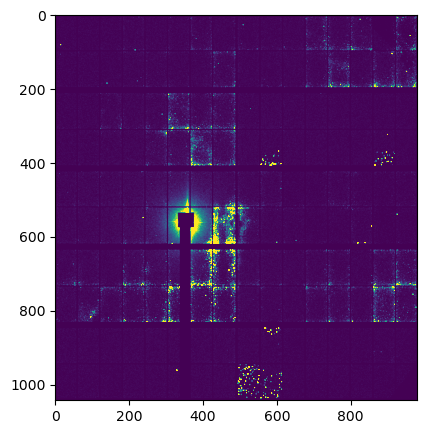

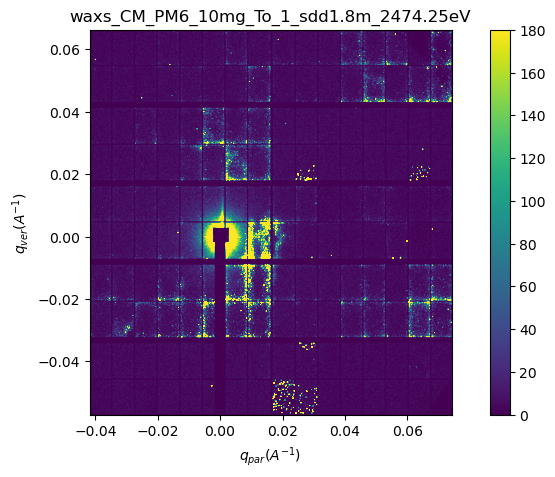

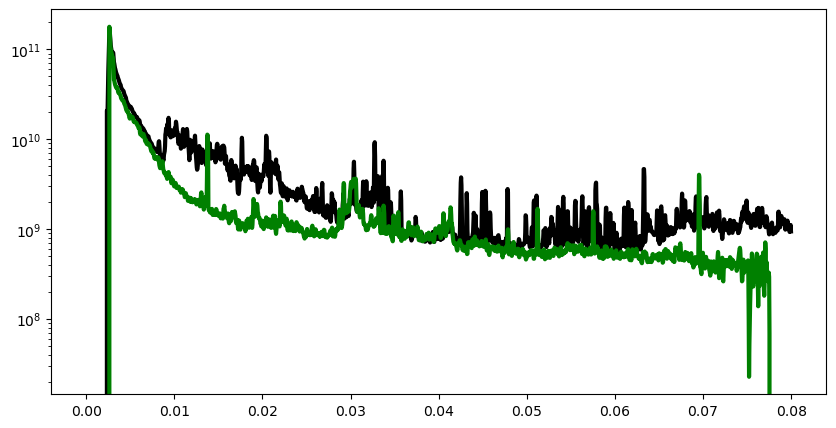

Done


In [11]:
plt.rcParams['figure.figsize'] = [10, 5]

#waxs
flag_save = True

for j, dat in enumerate([all_da[1]]):
        #This part is to stitch the data
        SMI_waxs = SMI_beamline.SMI_geometry(geometry = geometry,
                                             detector = detector_waxs,
                                             sdd = sdd_waxs,
                                             wav = wav,
                                             alphai = 0,
                                             center = center_waxs,
                                             bs_pos = bs_pos_waxs,
                                             det_angles = [0],
                                             bs_kind = bs_kind)
        
        
        print(dat)
        SMI_waxs.open_data(path, [dat[0]], optional_mask='tender')
        SMI_waxs.masks[0][560:, 337:350]=True
#         SMI_waxs.masks[0][954:, 337:350]=True

        plt.figure()
        for i, (img, mask) in enumerate(zip(SMI_waxs.imgs, SMI_waxs.masks)):
            SMI_waxs.imgs[i] *= 10
            plt.subplot(1, len(SMI_waxs.imgs), i+1)
            plt.imshow(img*np.logical_not(mask), vmin = 0, vmax = np.percentile(SMI_waxs.imgs[0], 99))
        plt.show()

        SMI_waxs.stitching_data(interp_factor=3)

        plt.figure()
        plt.imshow(SMI_waxs.img_st,
                   extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]], 
                   vmin=0,
                   vmax=np.percentile(SMI_waxs.img_st, 99))    
        plt.title('waxs_%s'%sam[j])
        plt.xlabel('$q_{par}(A^{-1})$')
        plt.ylabel('$q_{ver}(A^{-1})$')
        plt.colorbar()
        plt.show()

        SMI_waxs.caking()
        
        SMI_waxs.radial_averaging(radial_range = [0, 0.08], azimuth_range=[-179, 179], npt = 2000)
        q0, I0 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 0.08], azimuth_range=[-180, -90], npt = 2000)
        q1, I1 = SMI_waxs.q_rad, SMI_waxs.I_rad

#         SMI_waxs.radial_averaging(radial_range = [0, 0.08], azimuth_range=[-100, -80], npt = 2000)
#         q2, I2 = SMI_waxs.q_rad, SMI_waxs.I_rad
        
#         SMI_waxs.radial_averaging(radial_range = [0, 0.08], azimuth_range=[80, 100], npt = 2000)
#         q3, I3 = SMI_waxs.q_rad, SMI_waxs.I_rad

        plt.figure()
        plt.plot(q0, I0, linewidth = 3, color = 'k')
        plt.plot(q1, I1, linewidth = 3, color = 'g')
#         plt.plot(q2, I2, linewidth = 3, color = 'r')
#         plt.plot(q3, I3, linewidth = 3, color = 'b')
#         plt.plot(q4, I4, linewidth = 3, color = 'c')

        plt.yscale('log')
#         plt.xscale('log')
        plt.show()

plt.close('all')
print('Done')

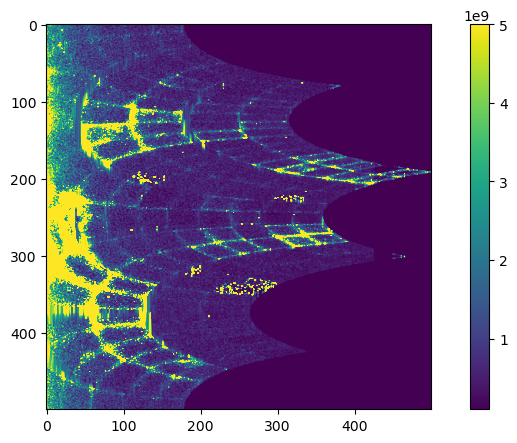

In [9]:
plt.imshow(SMI_waxs.cake, norm=plt.Normalize(1e8,5e9))
plt.colorbar()
plt.show()

In [16]:
0.1*2*np.pi/0.025

25.132741228718345

<IPython.core.display.Javascript object>


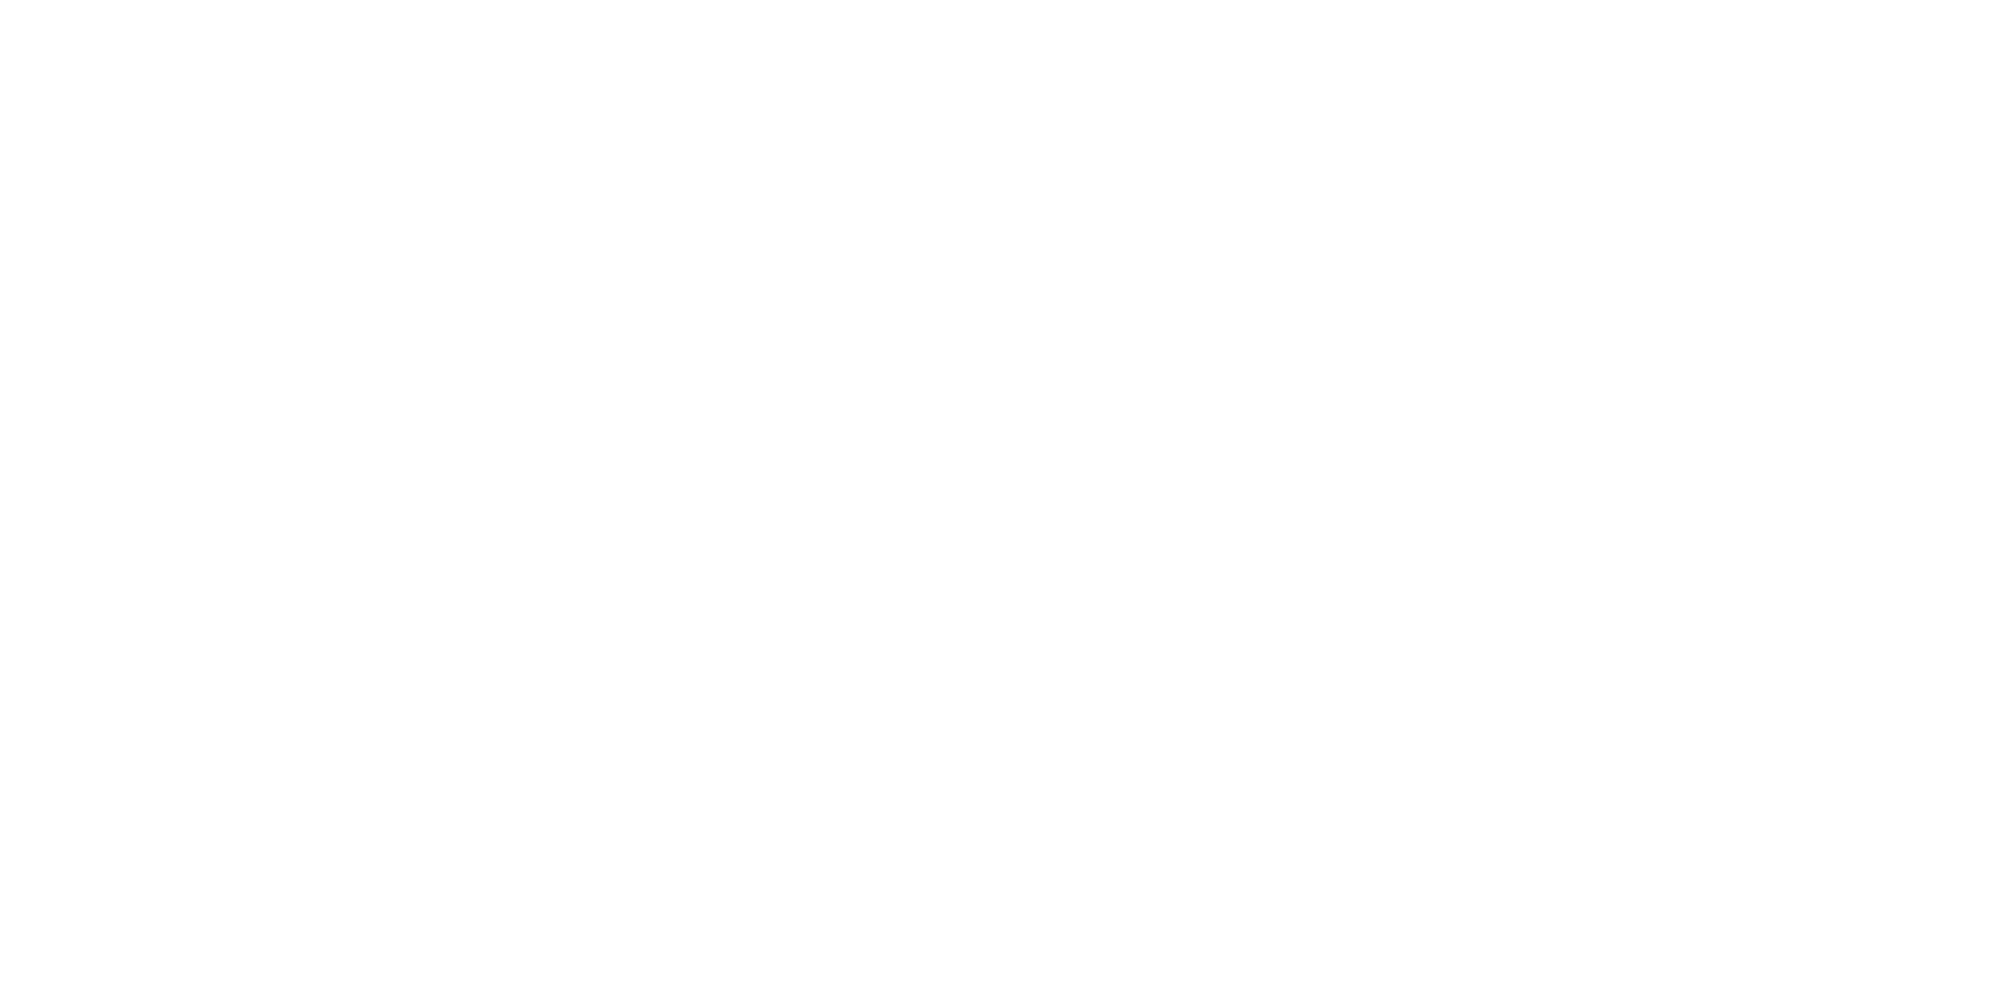

<IPython.core.display.Javascript object>


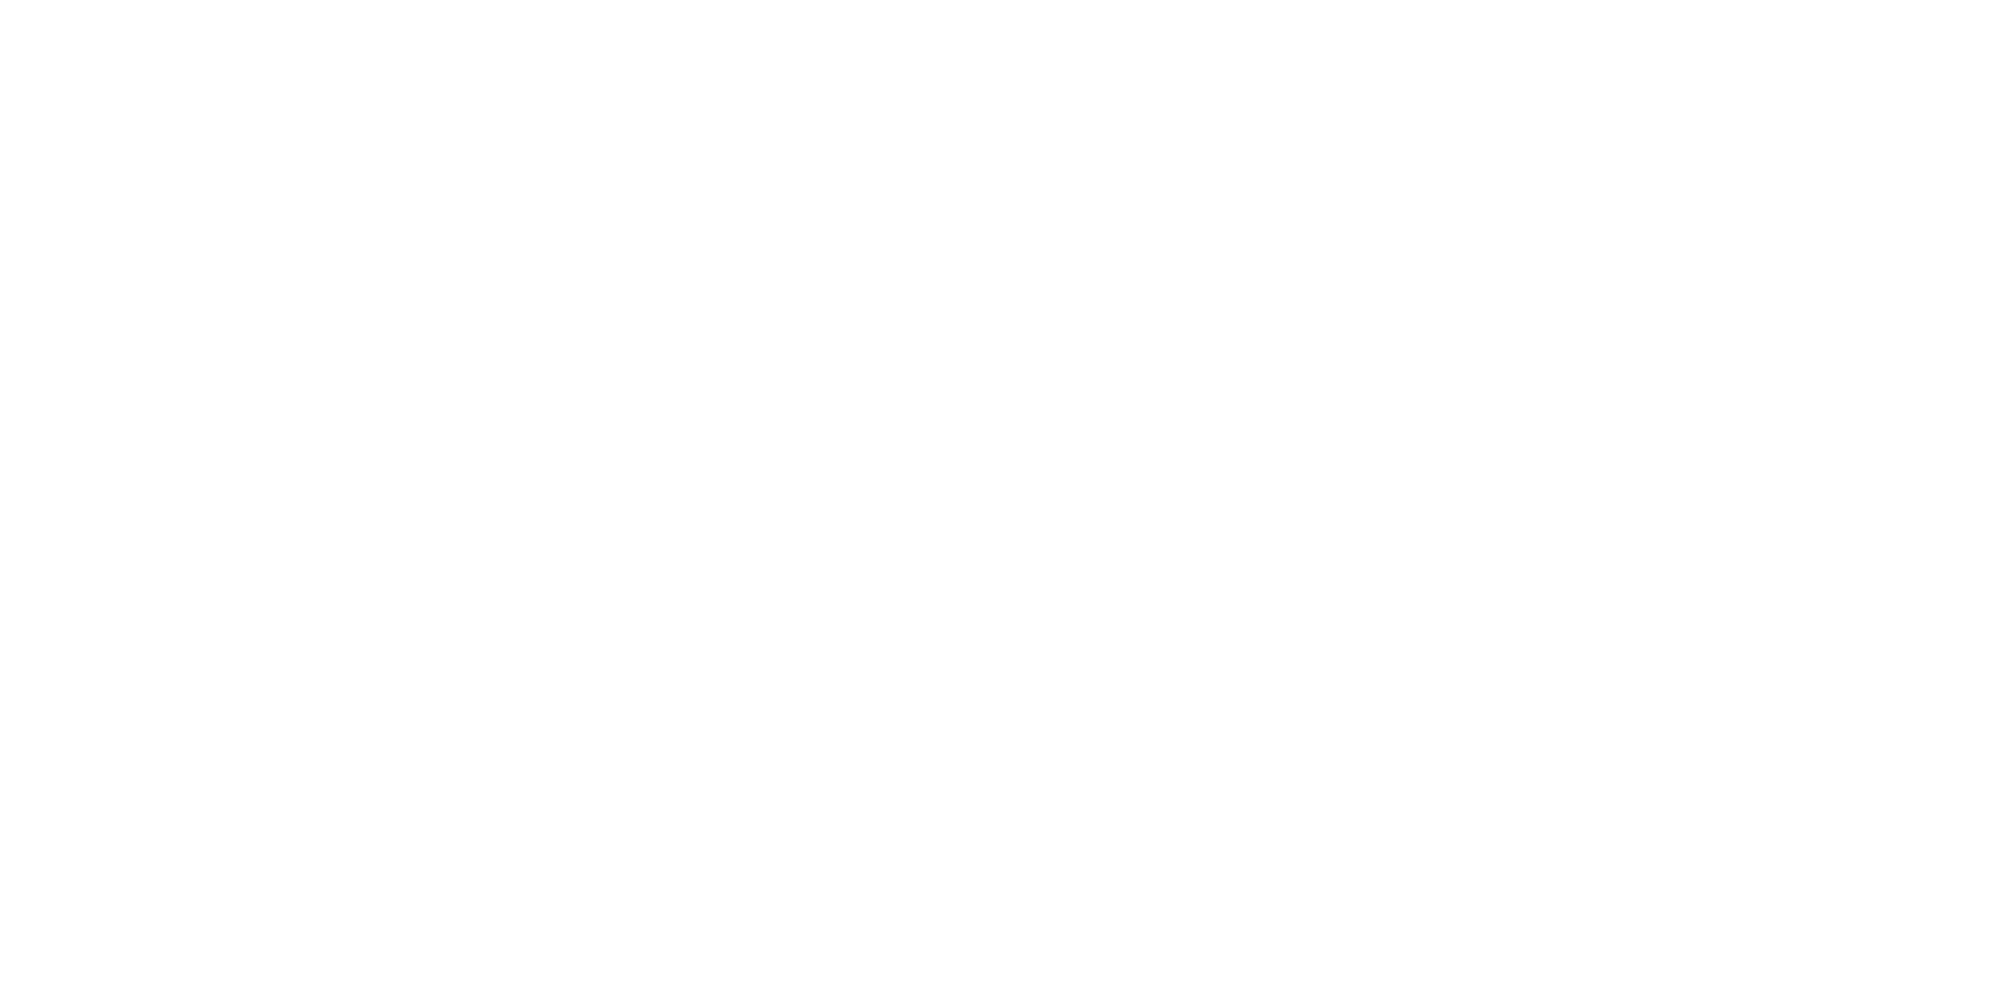

<IPython.core.display.Javascript object>


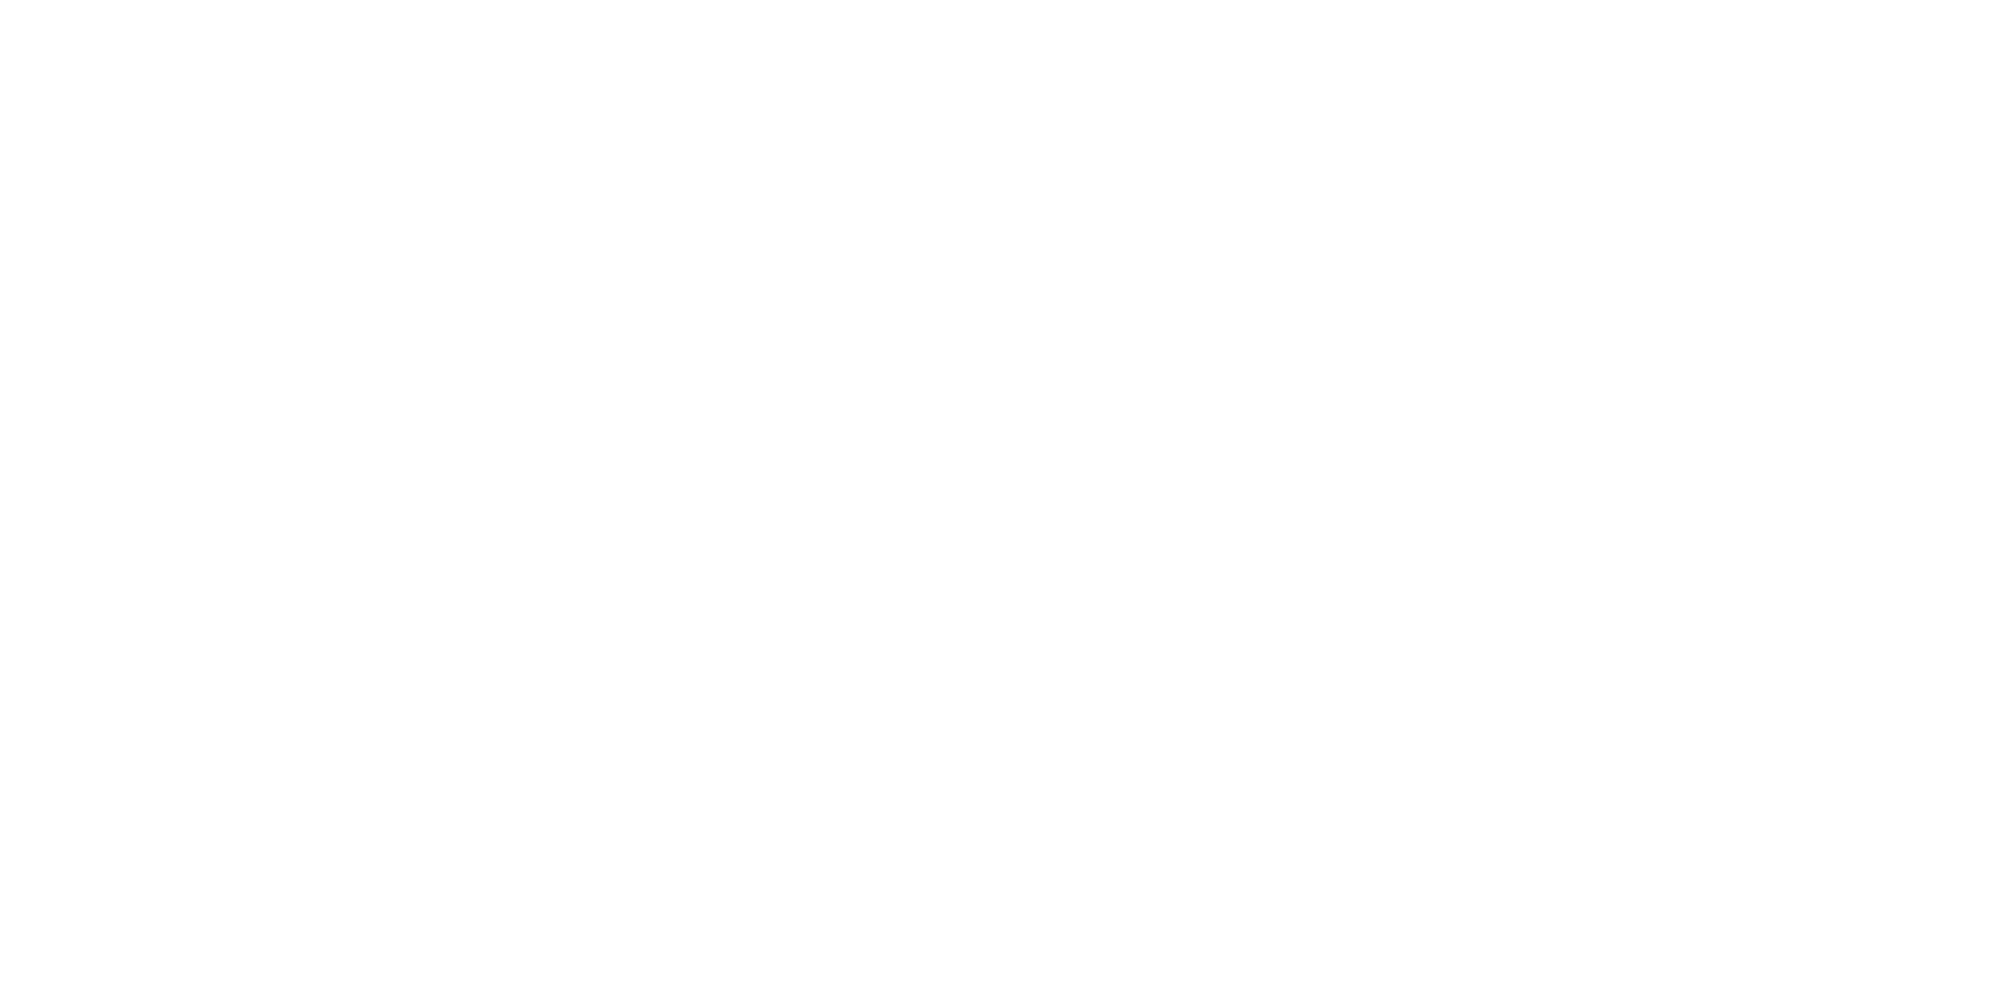

<IPython.core.display.Javascript object>


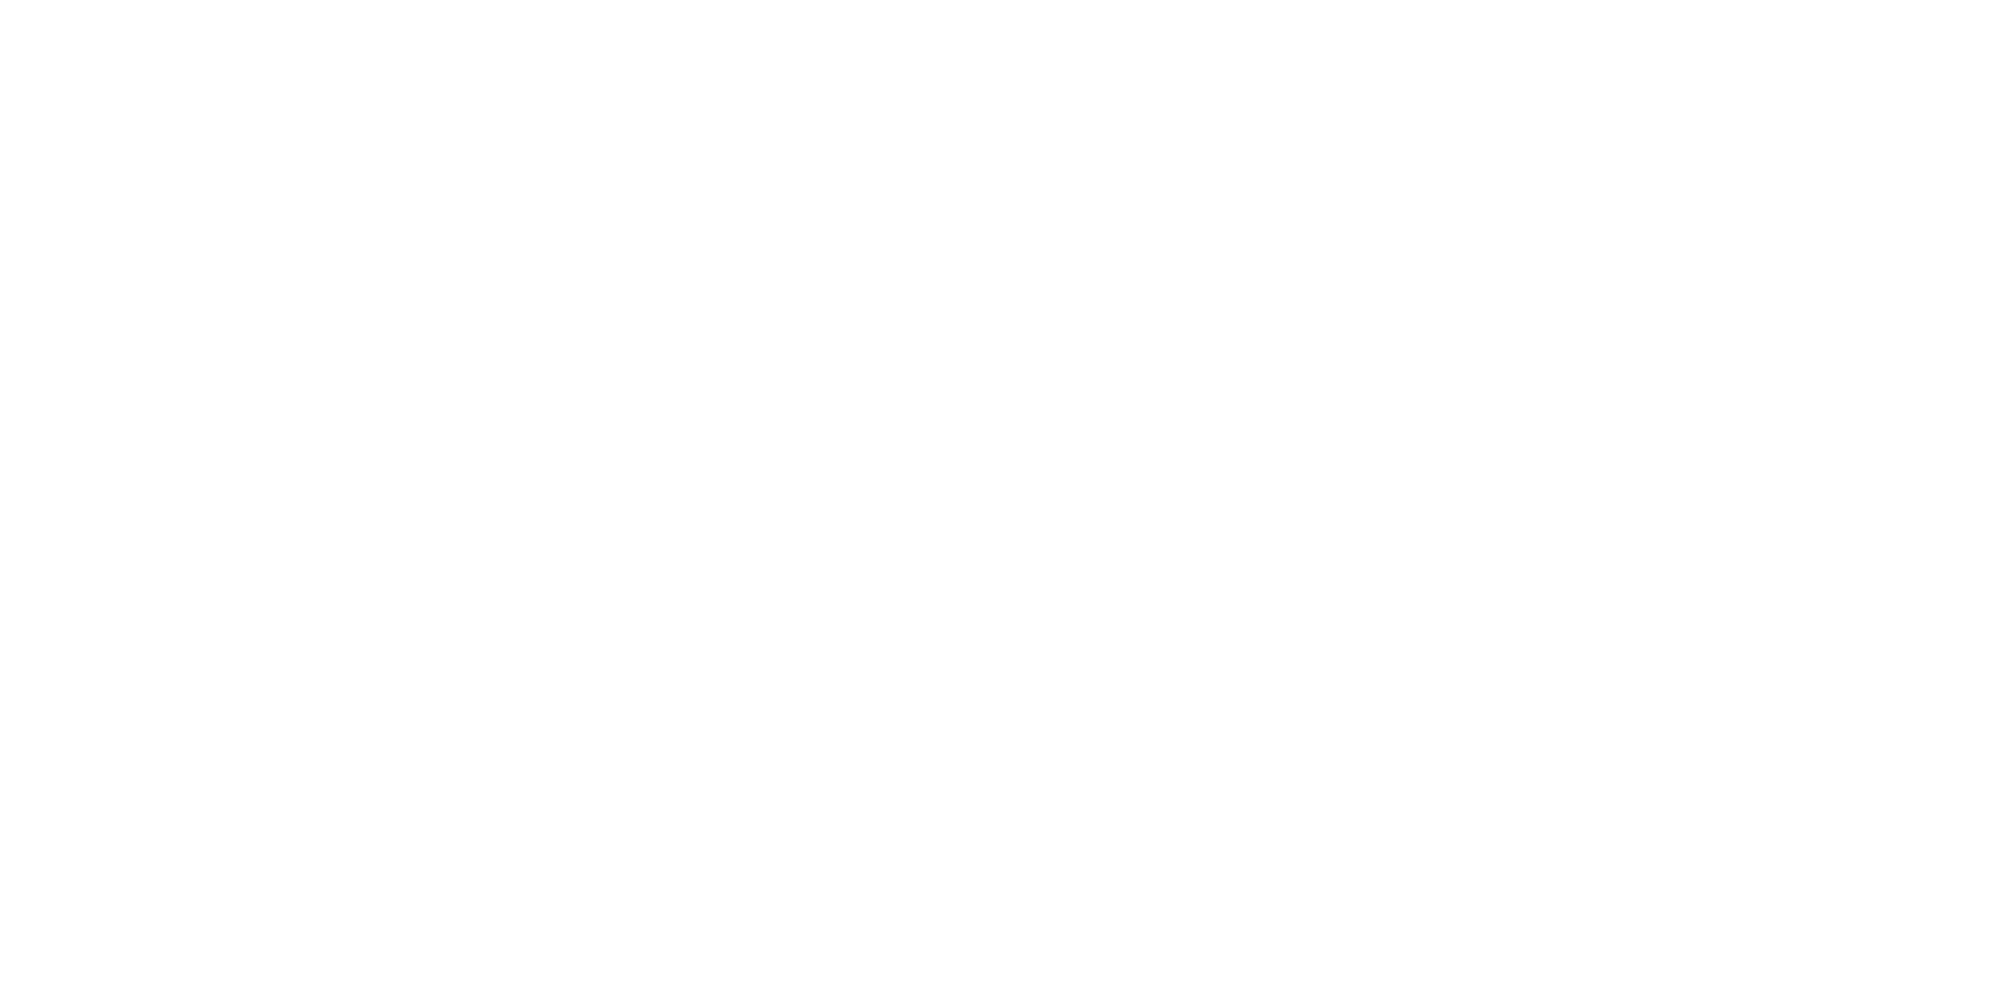

<IPython.core.display.Javascript object>


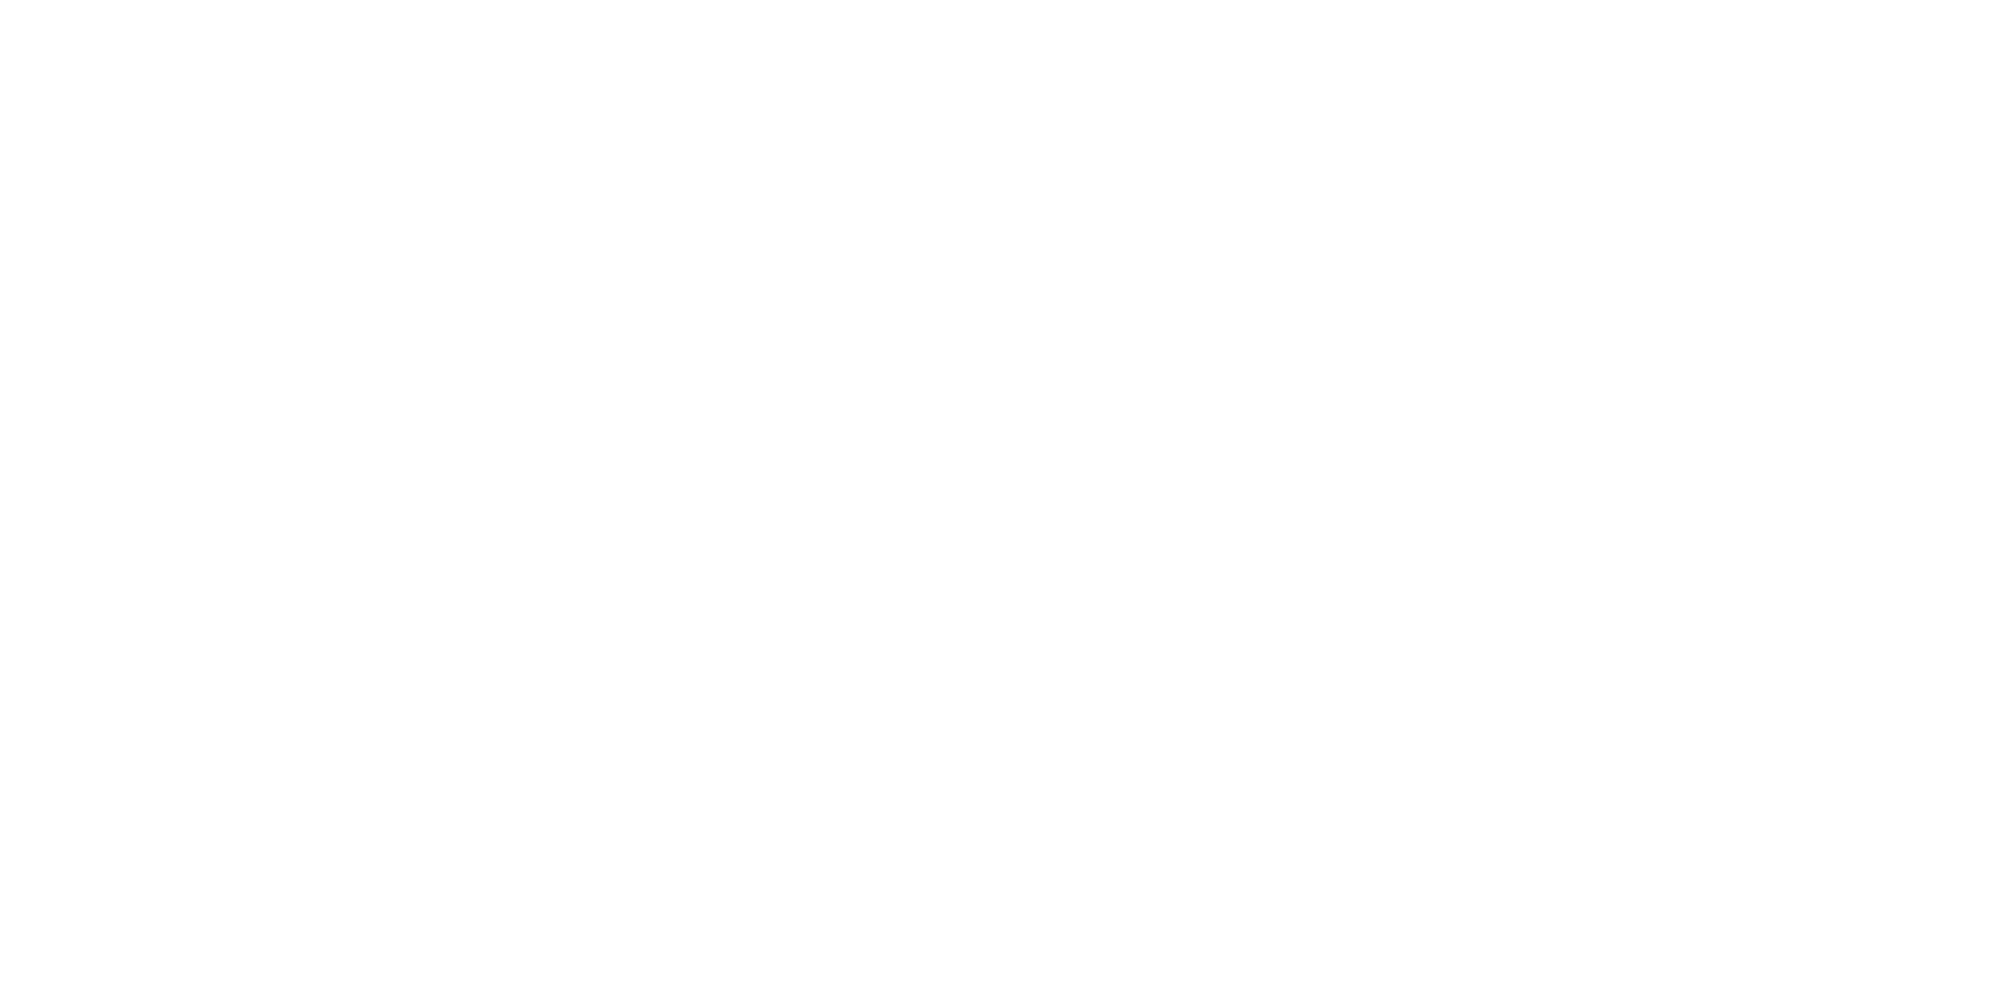

<IPython.core.display.Javascript object>


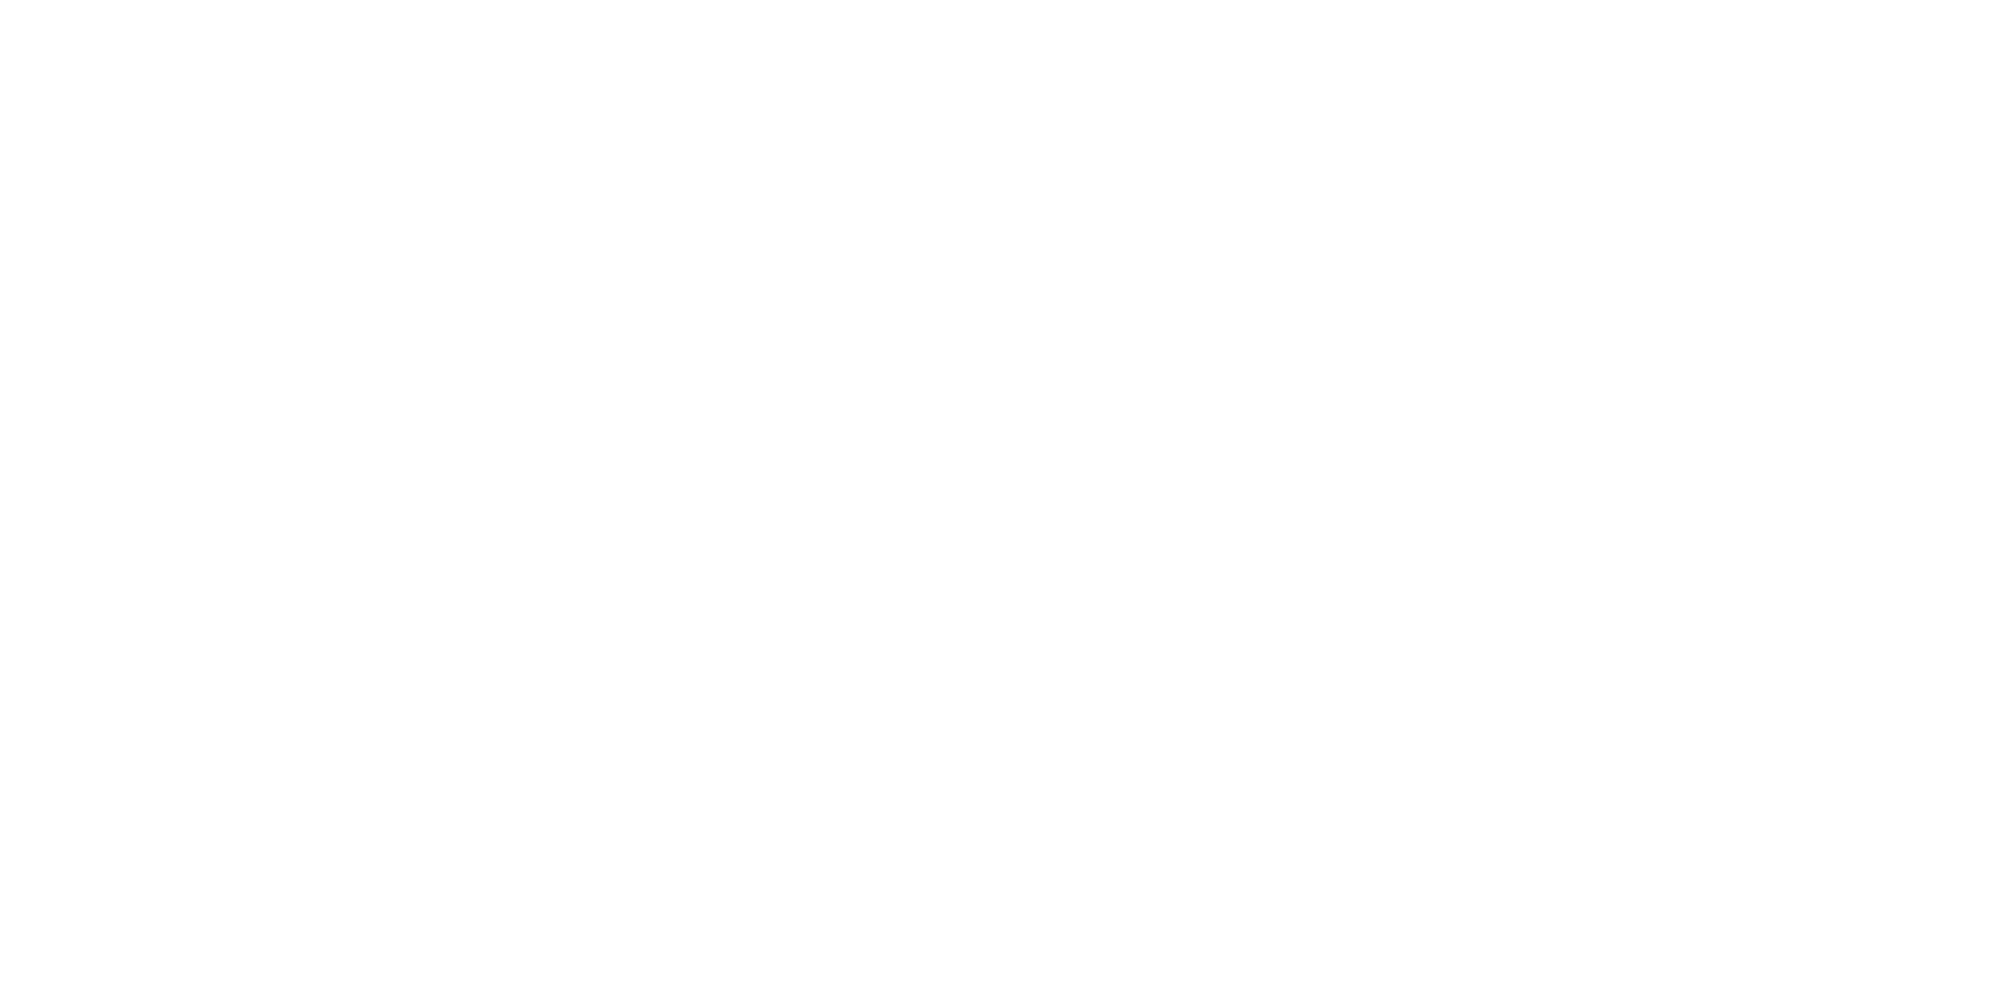

<IPython.core.display.Javascript object>


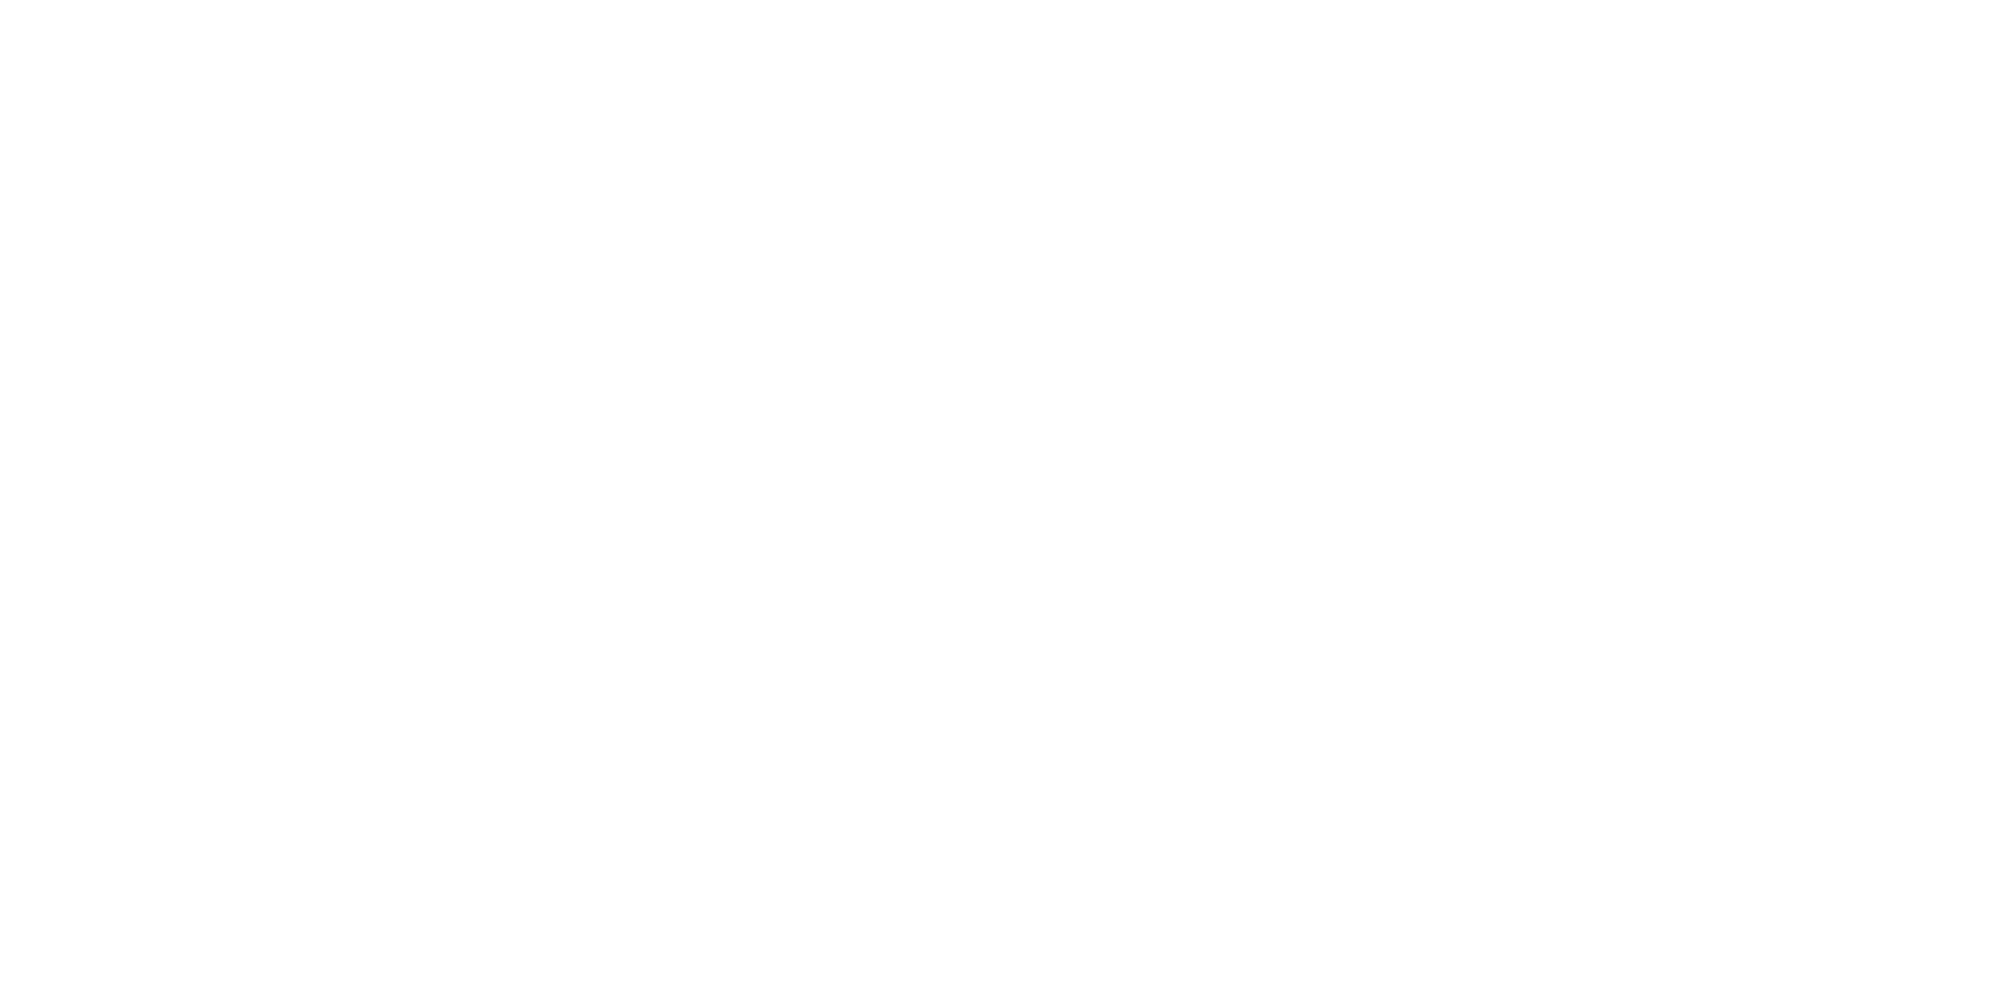

<IPython.core.display.Javascript object>


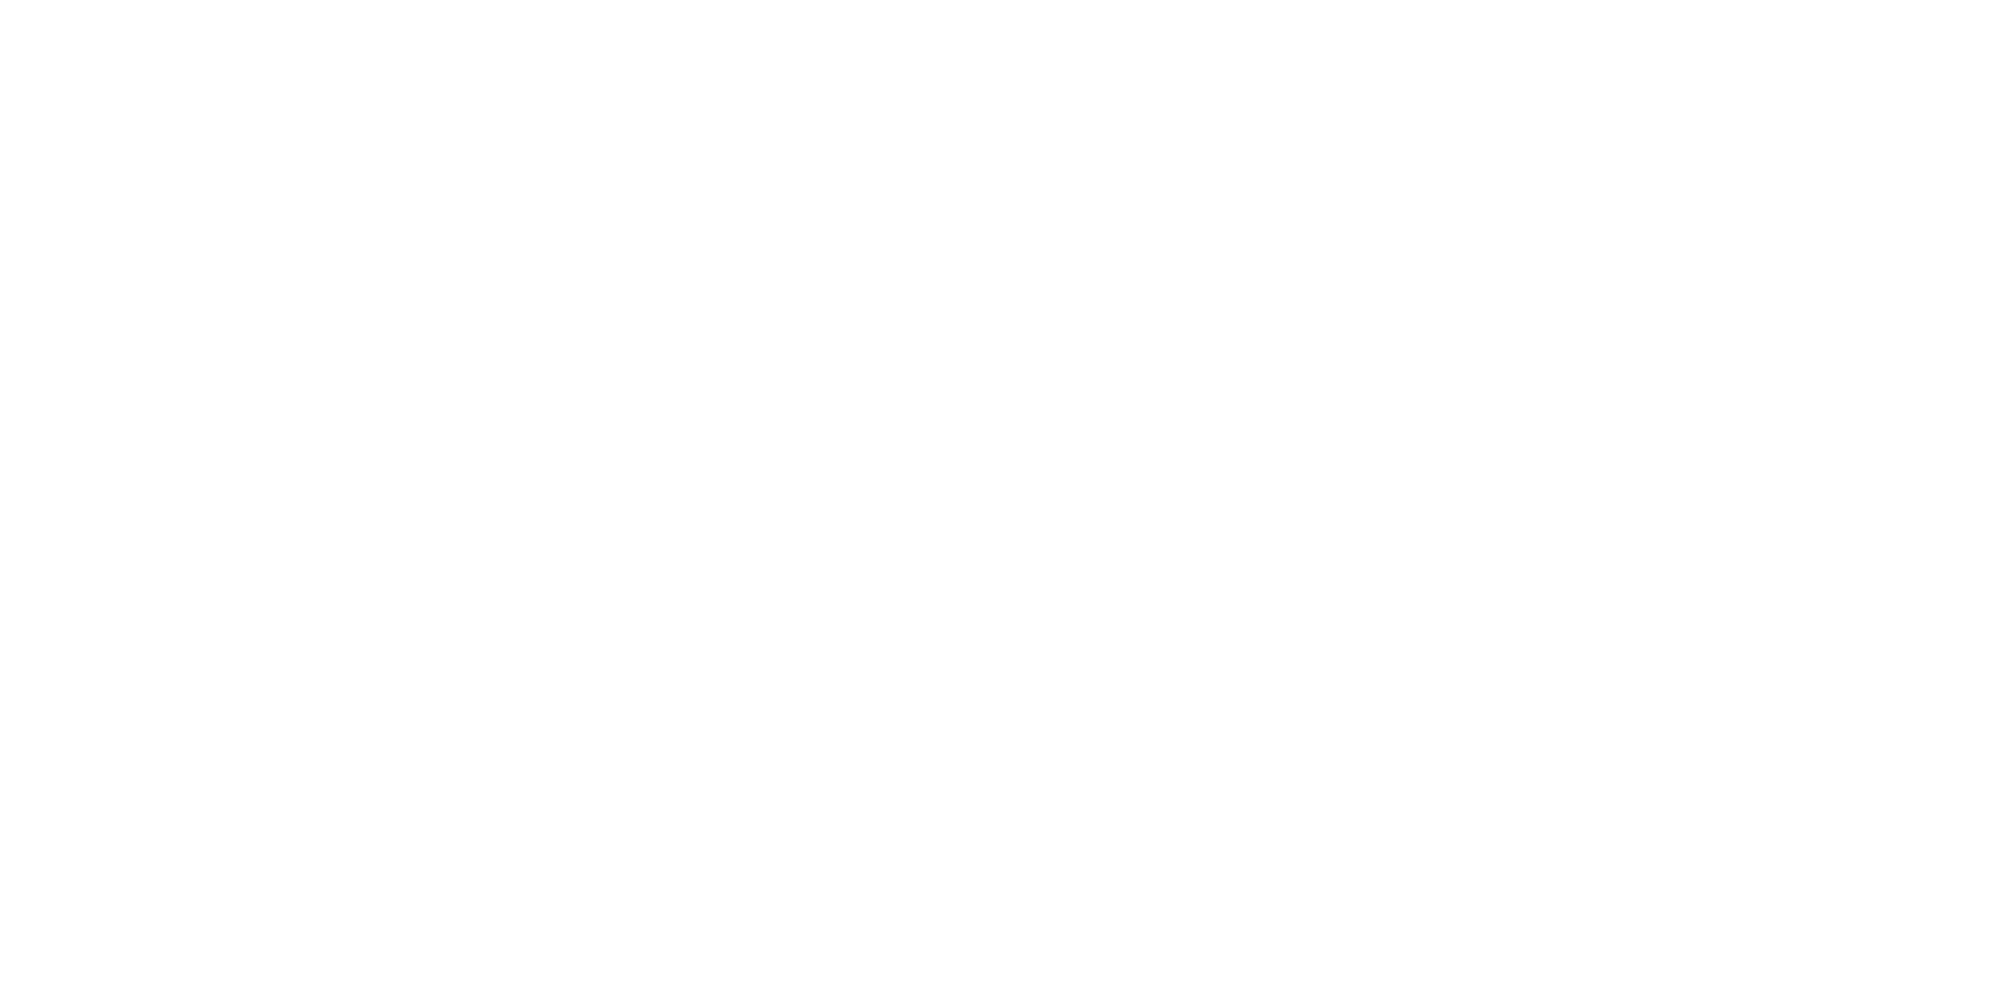

<IPython.core.display.Javascript object>


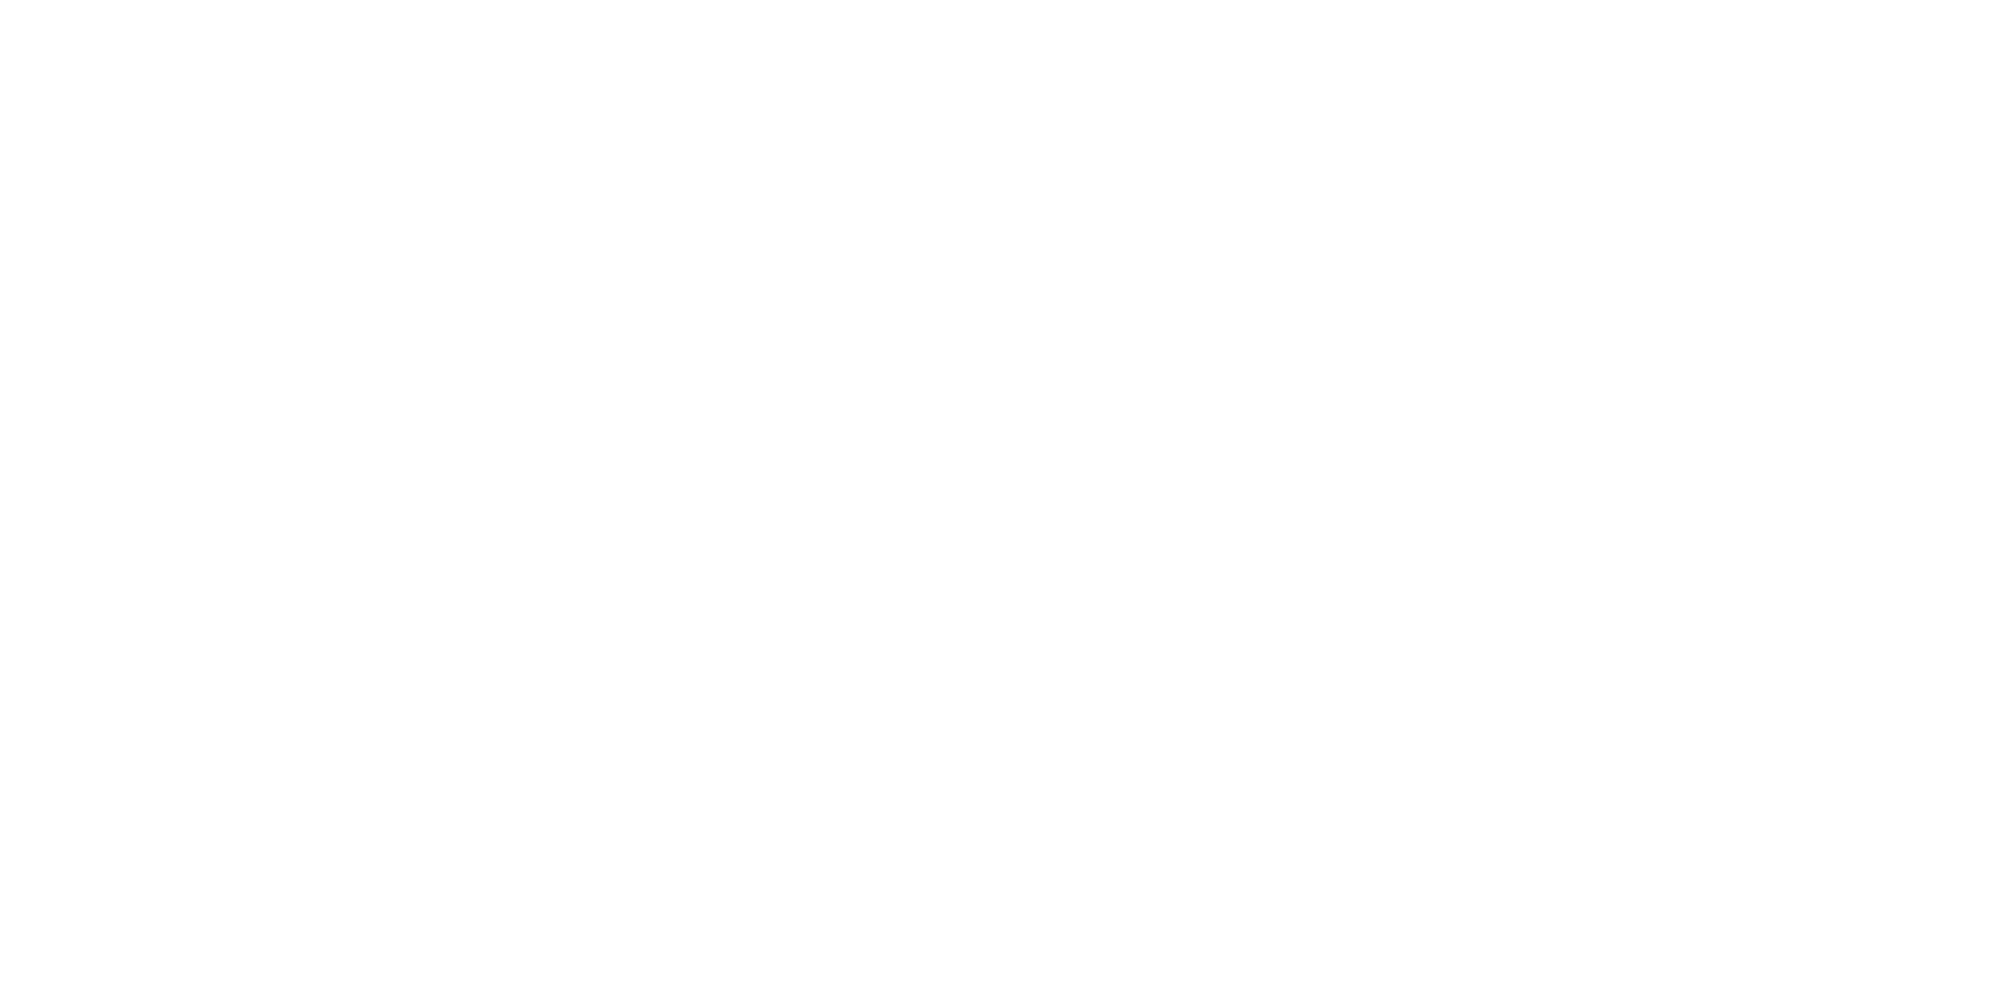

<IPython.core.display.Javascript object>


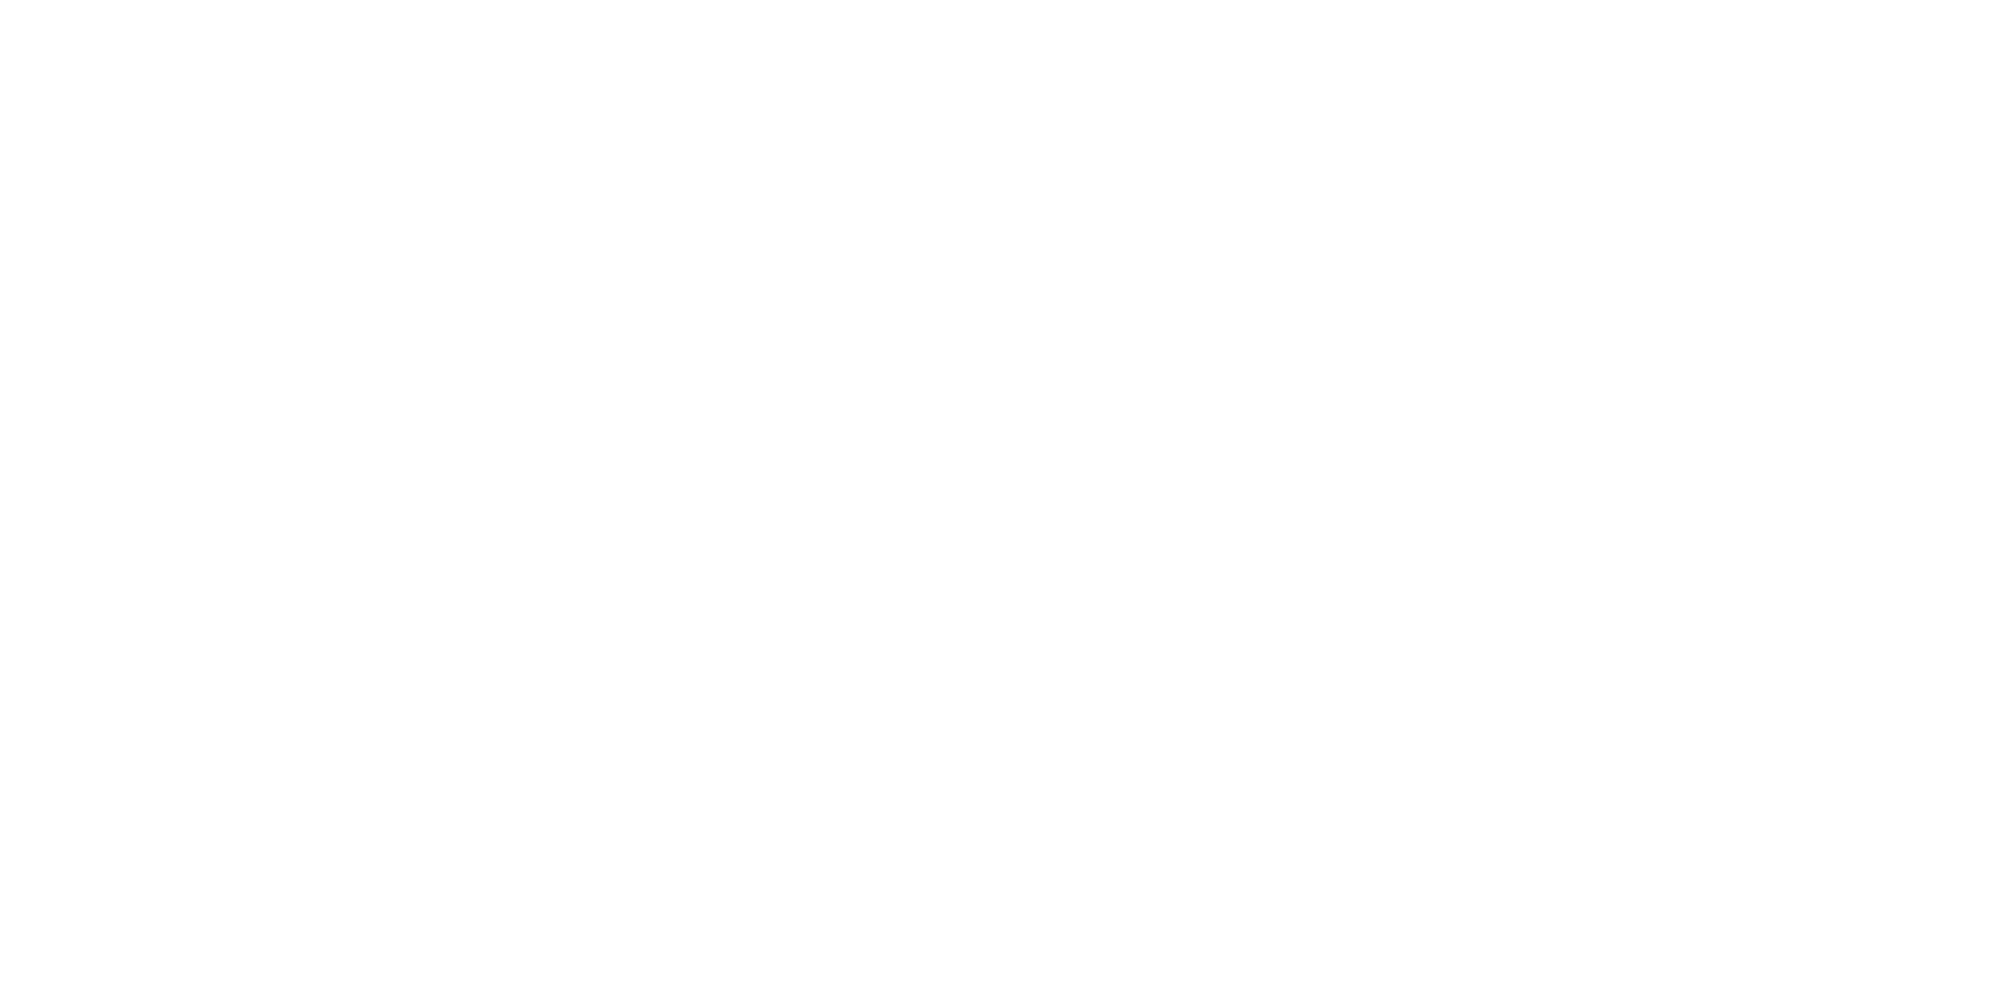

<IPython.core.display.Javascript object>


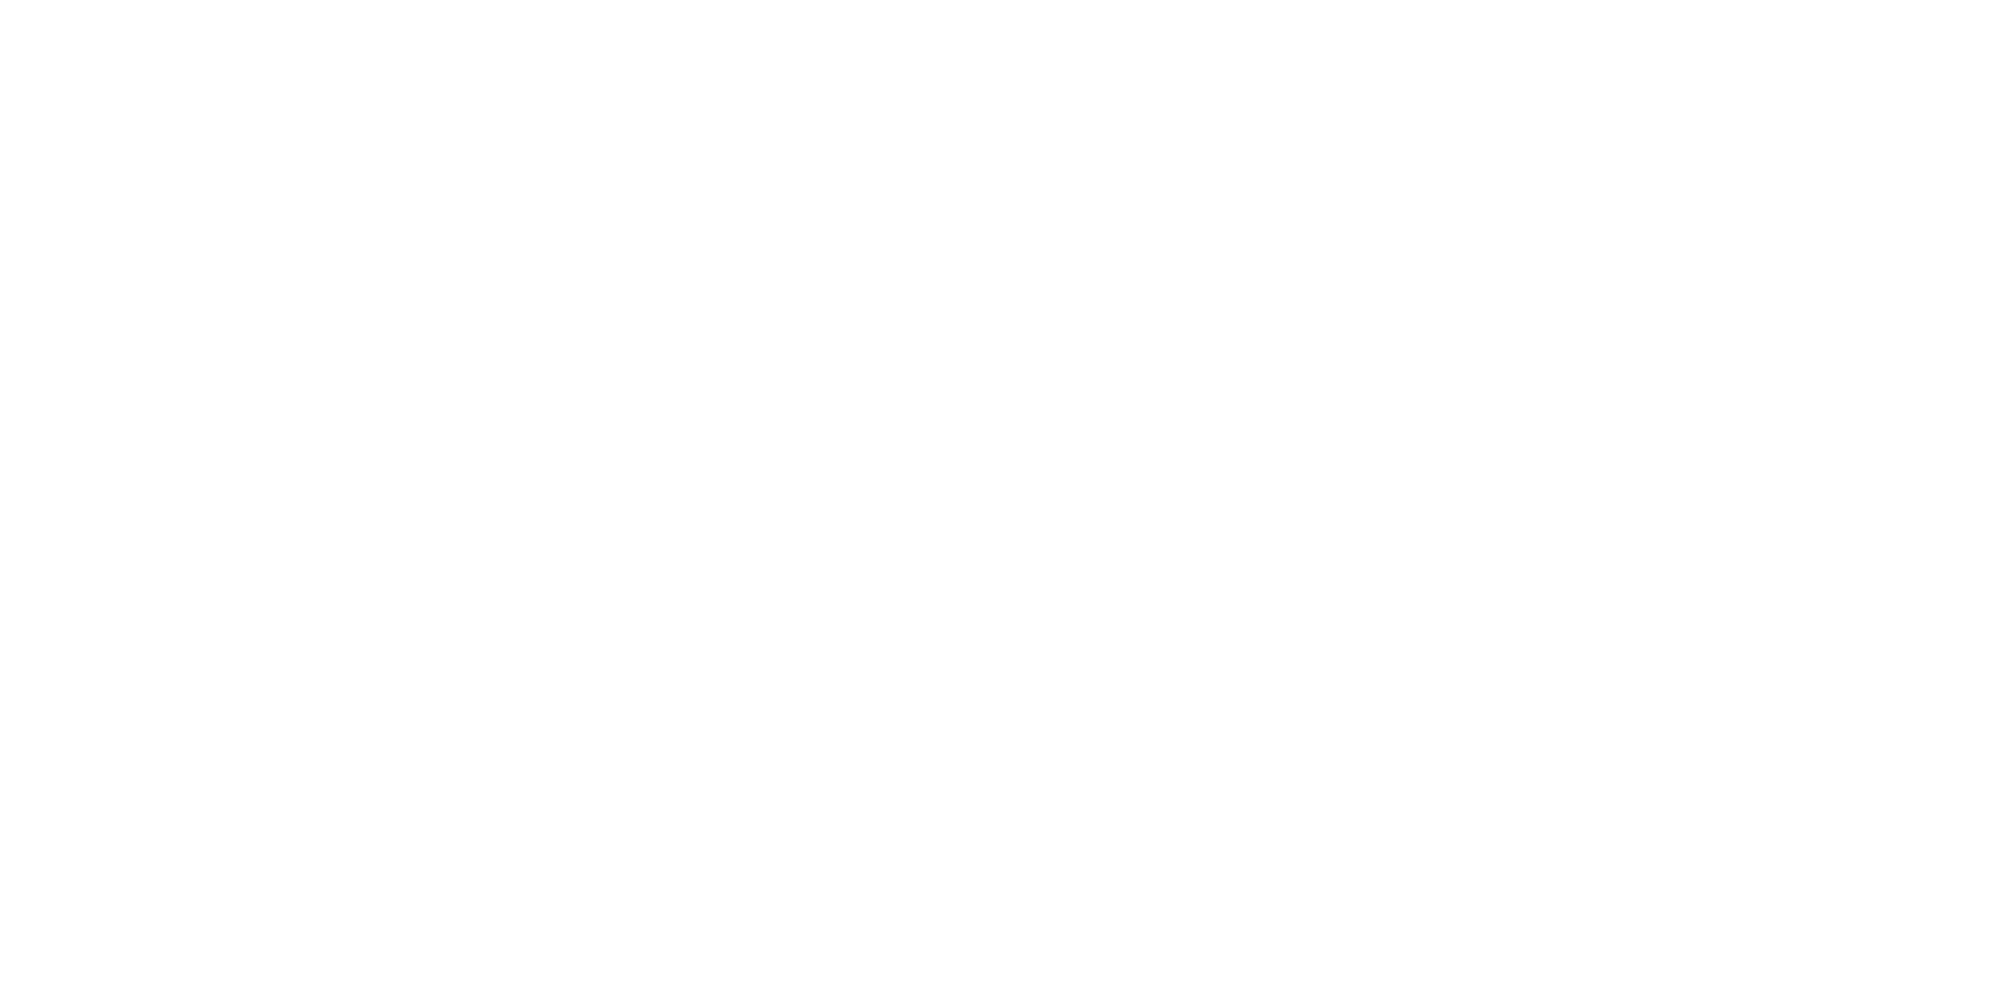

<IPython.core.display.Javascript object>


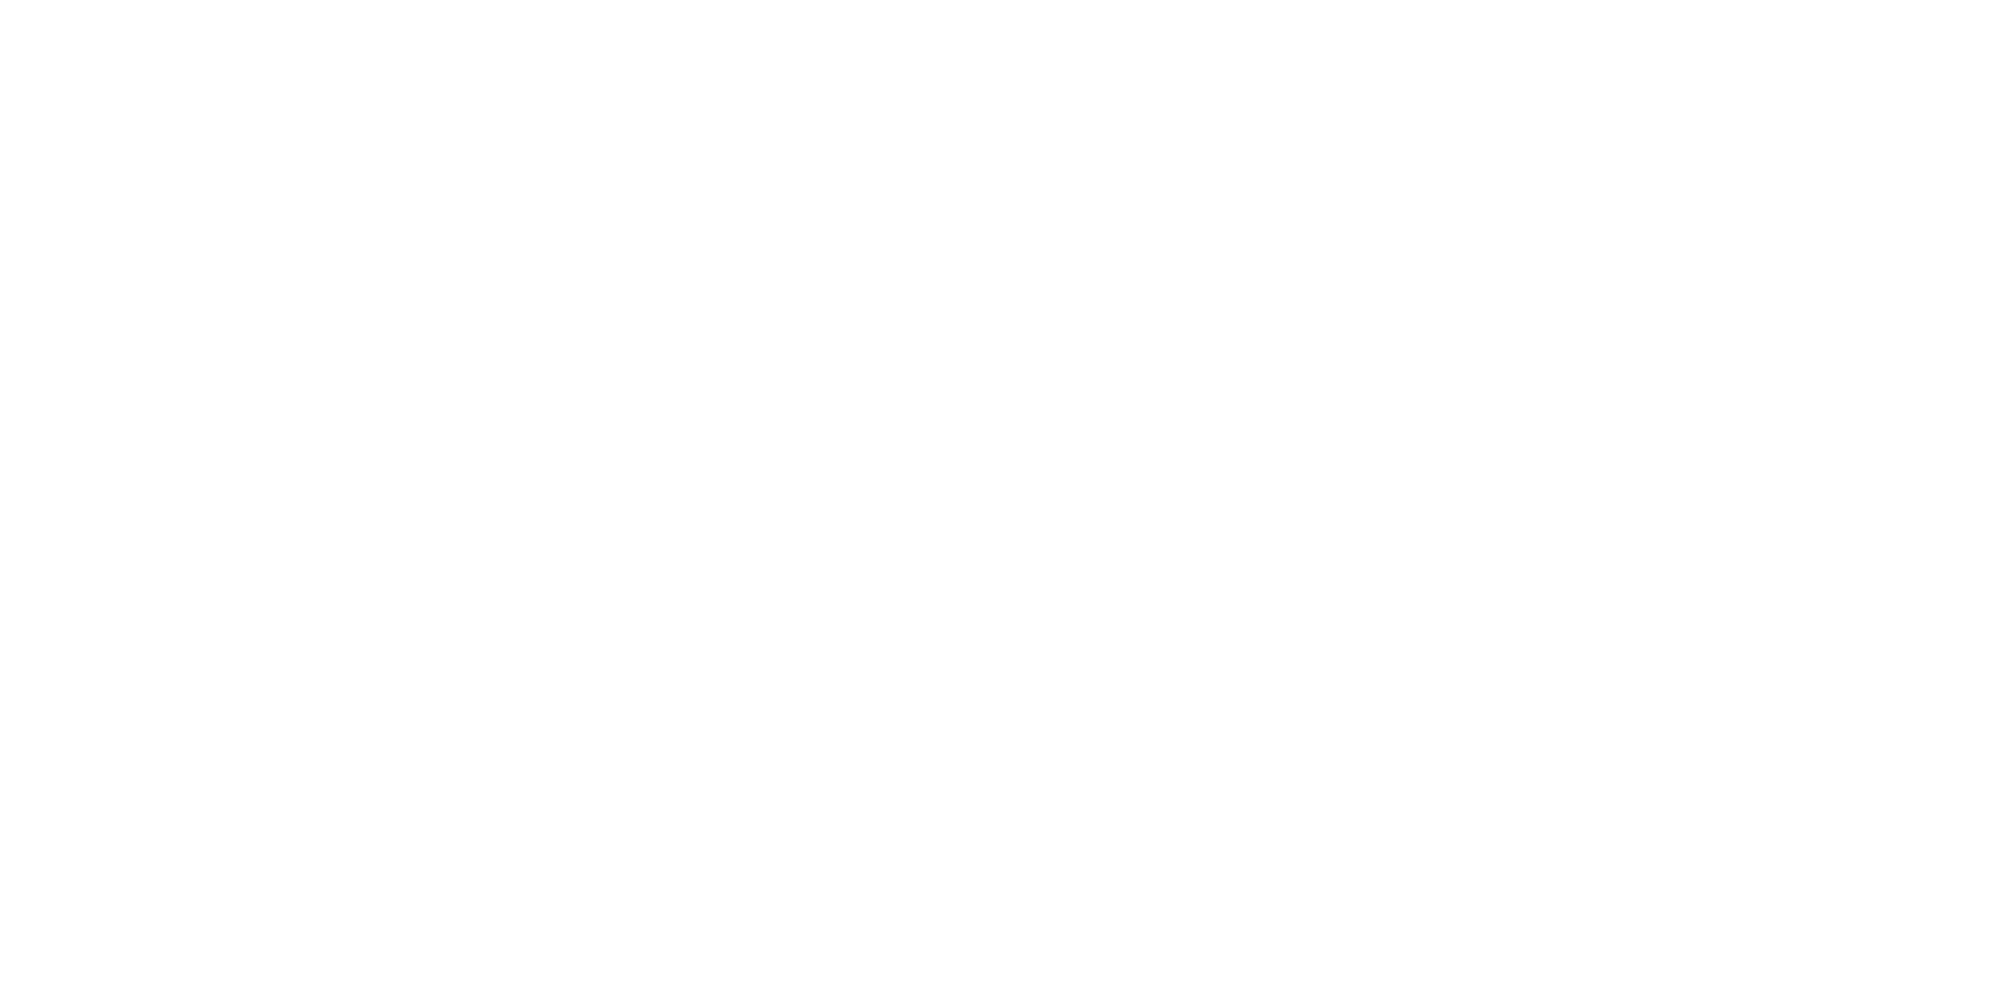

<IPython.core.display.Javascript object>


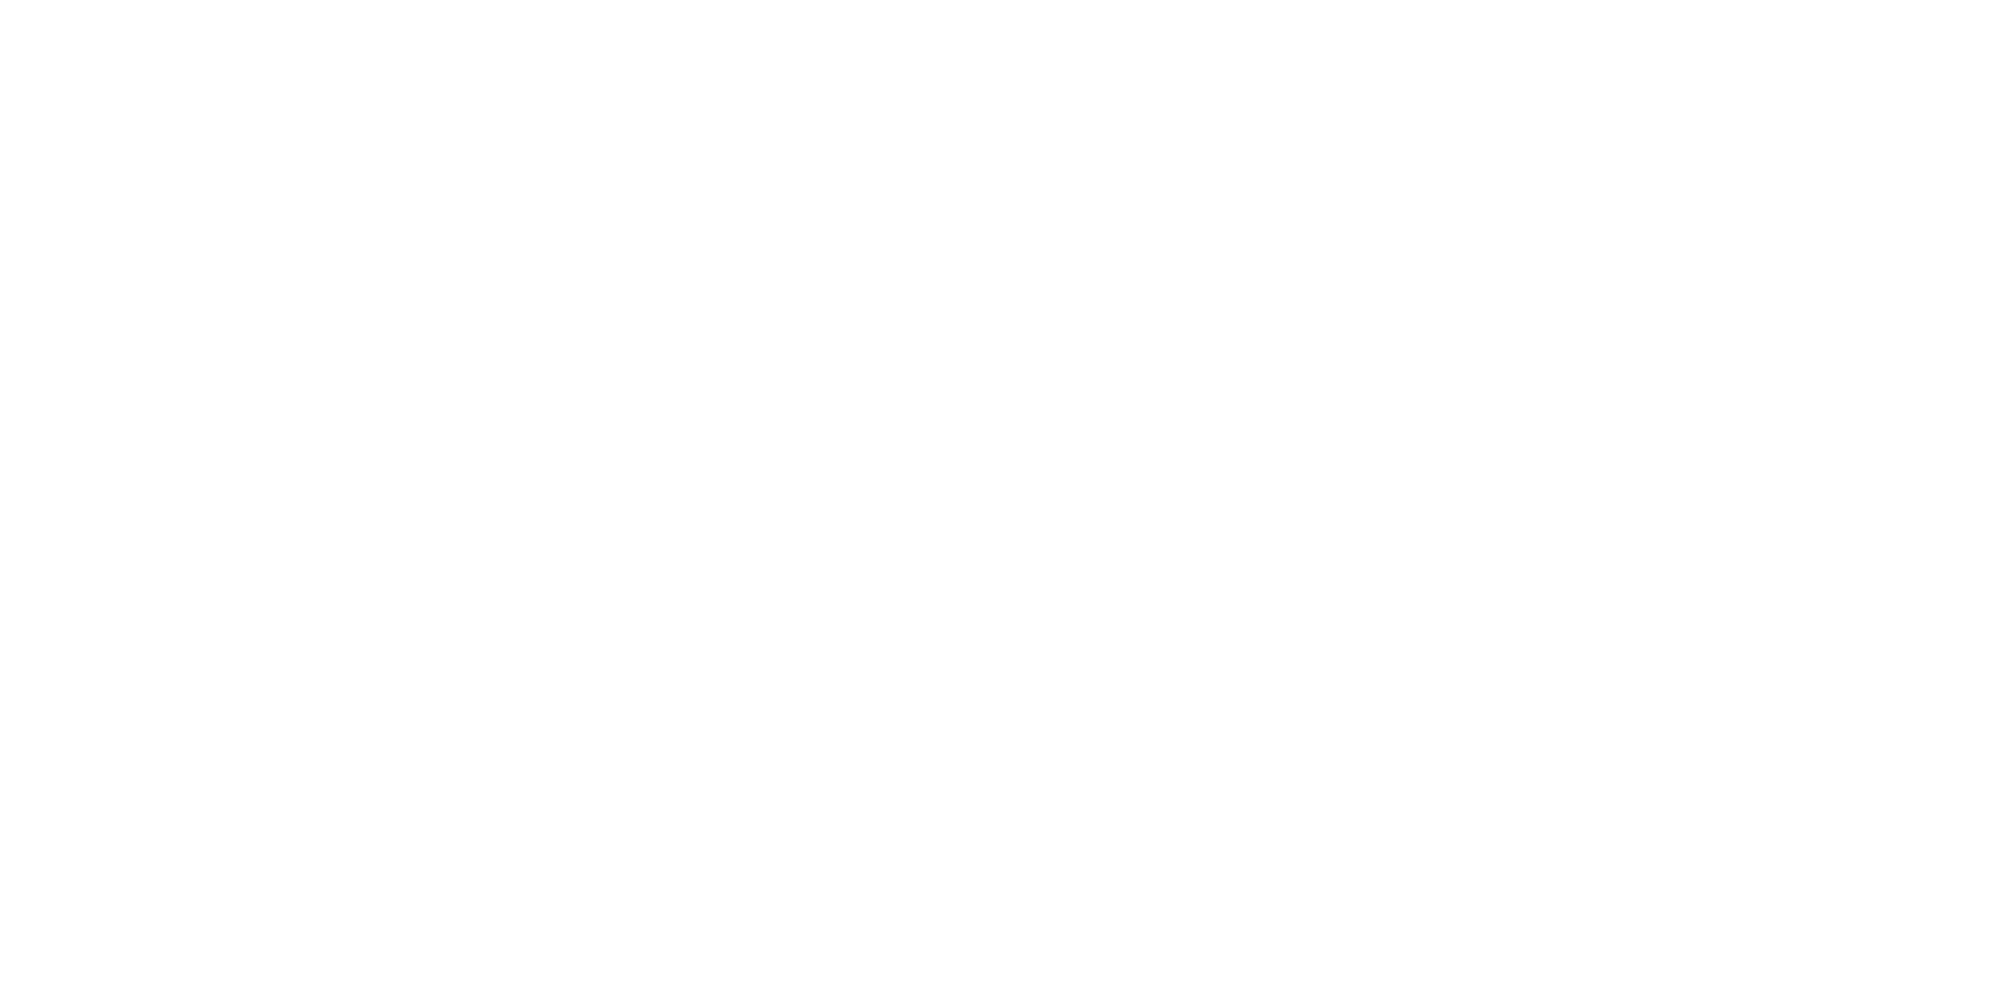

<IPython.core.display.Javascript object>


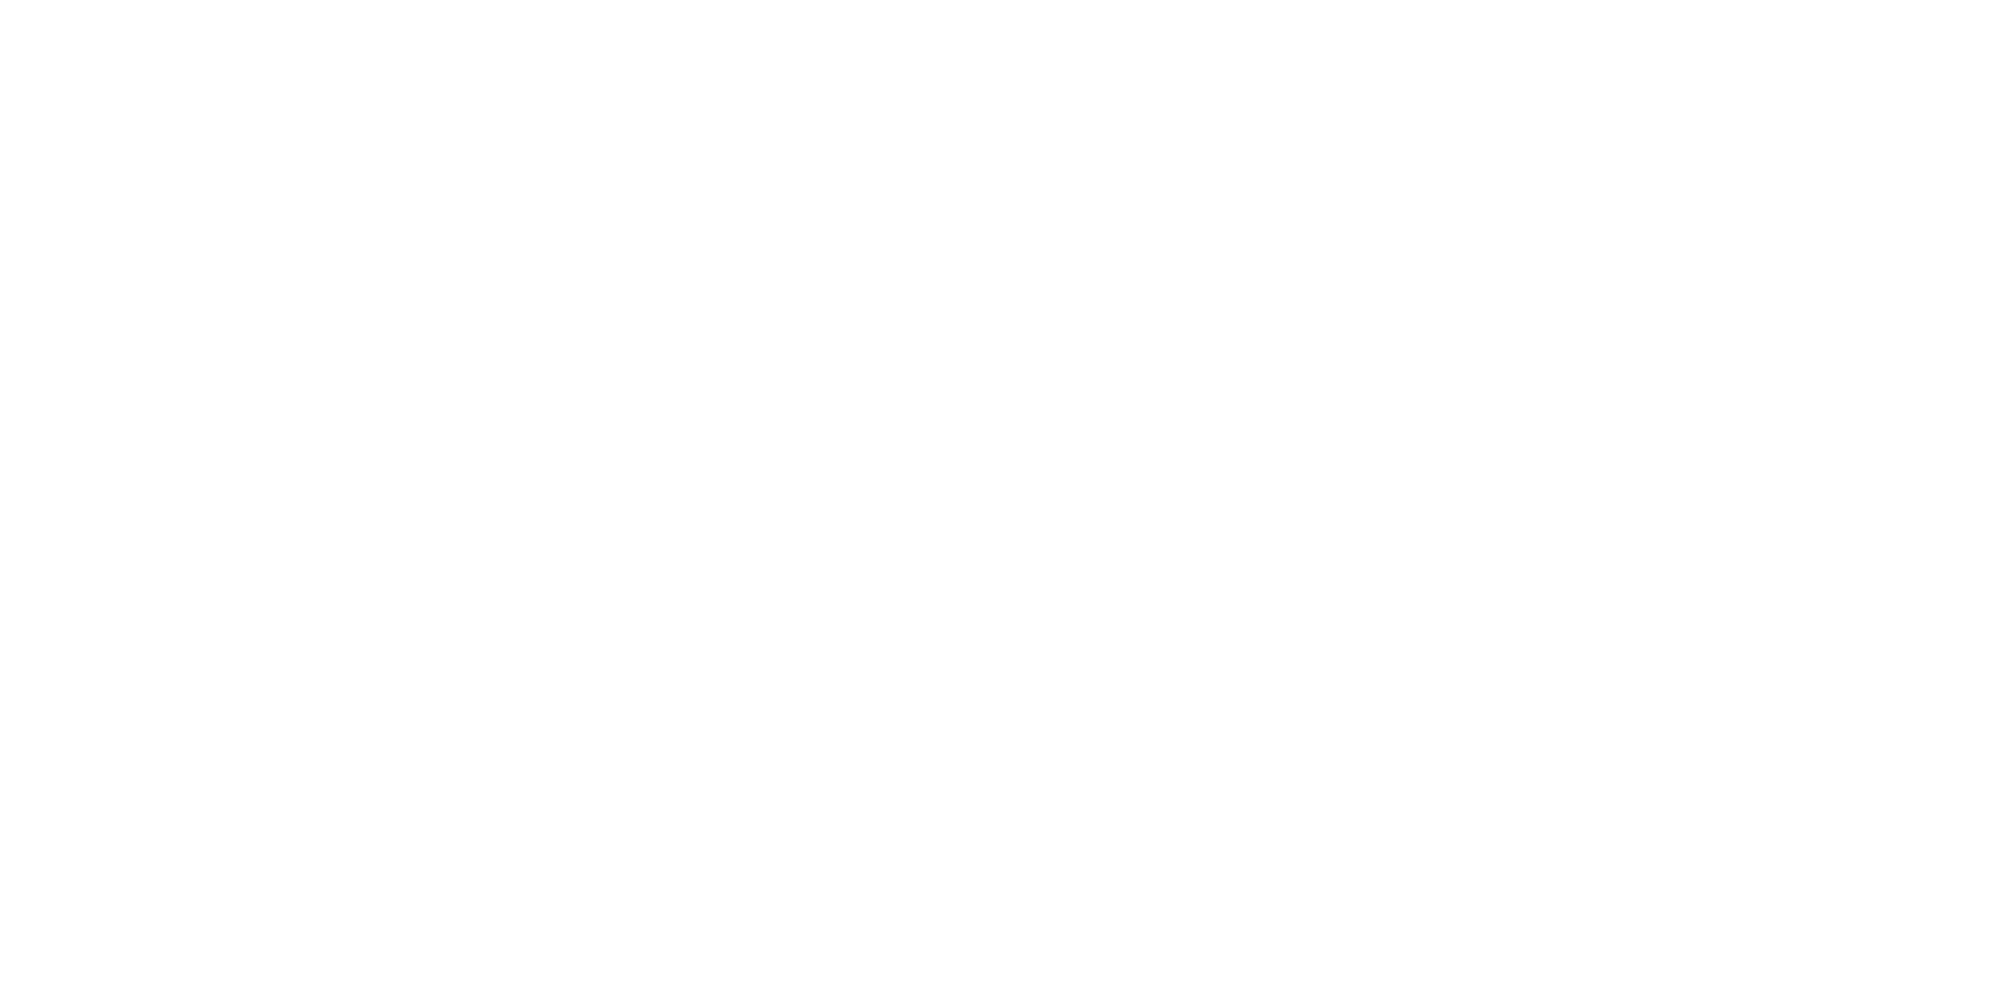

<IPython.core.display.Javascript object>


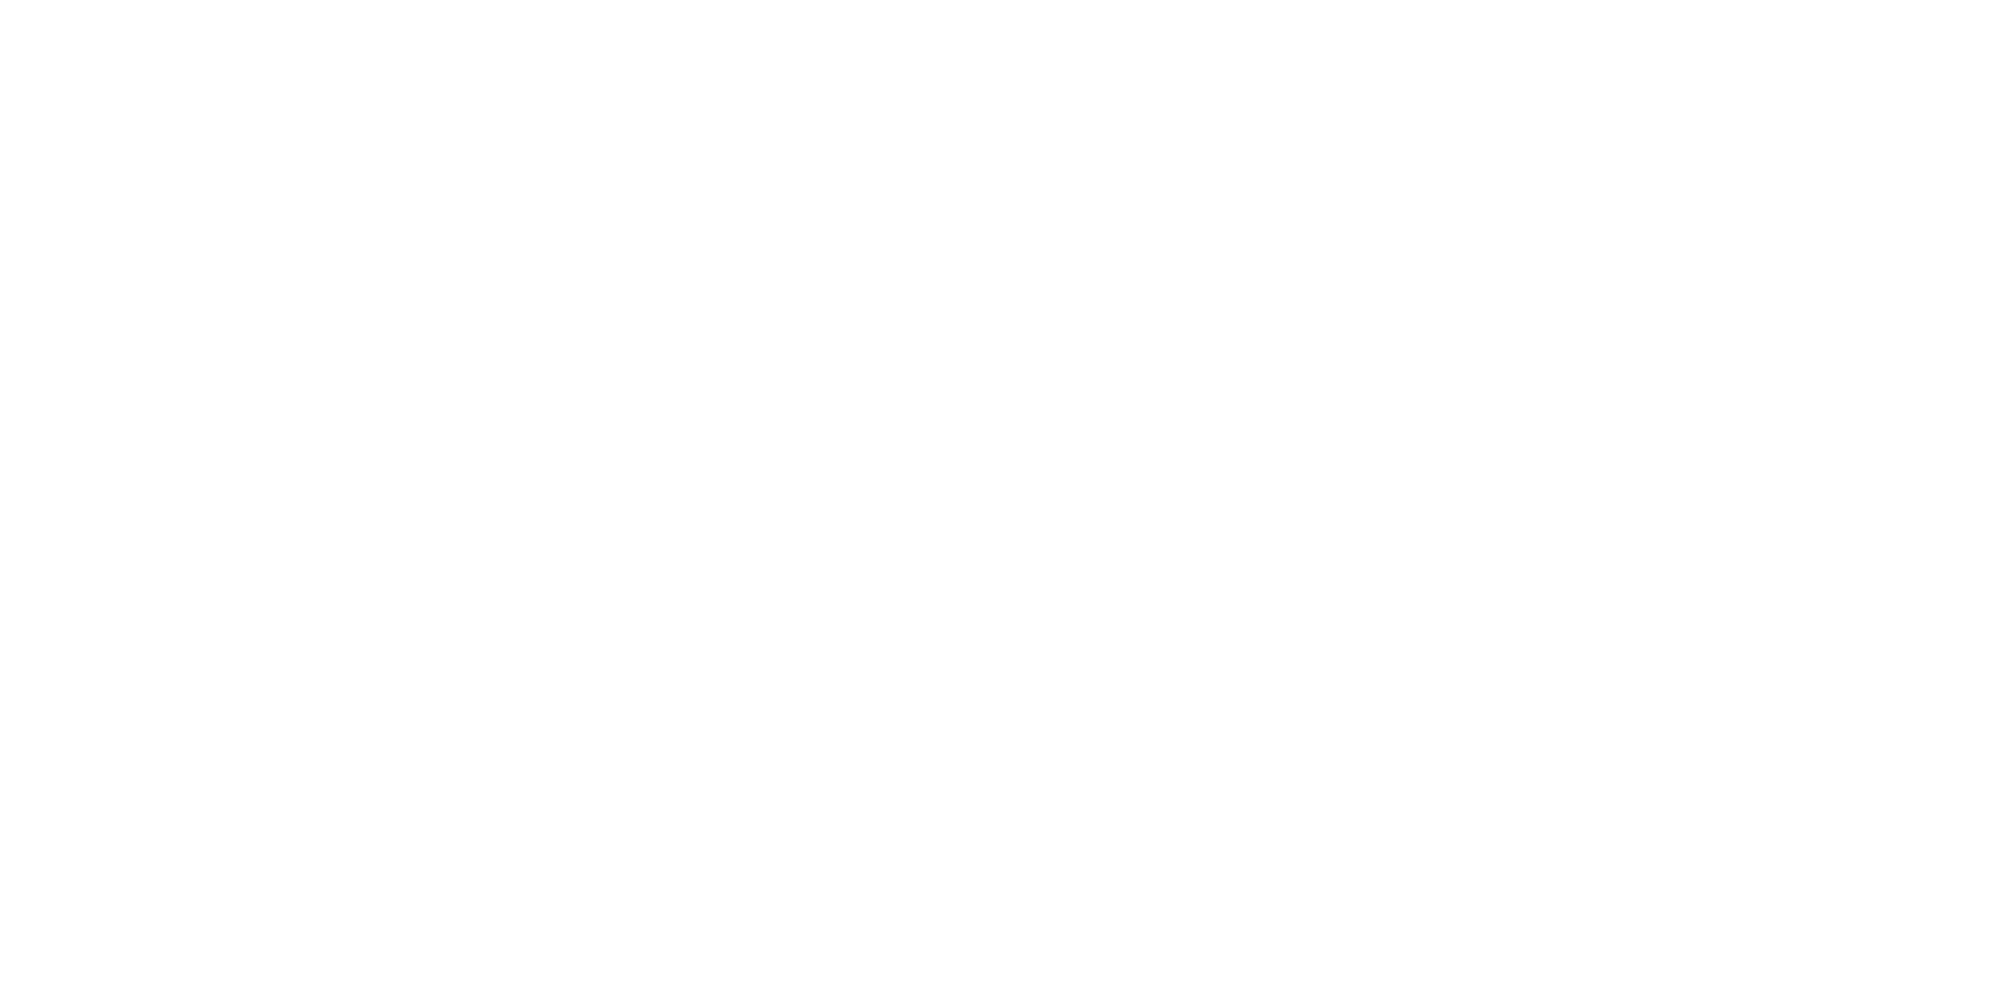

<IPython.core.display.Javascript object>


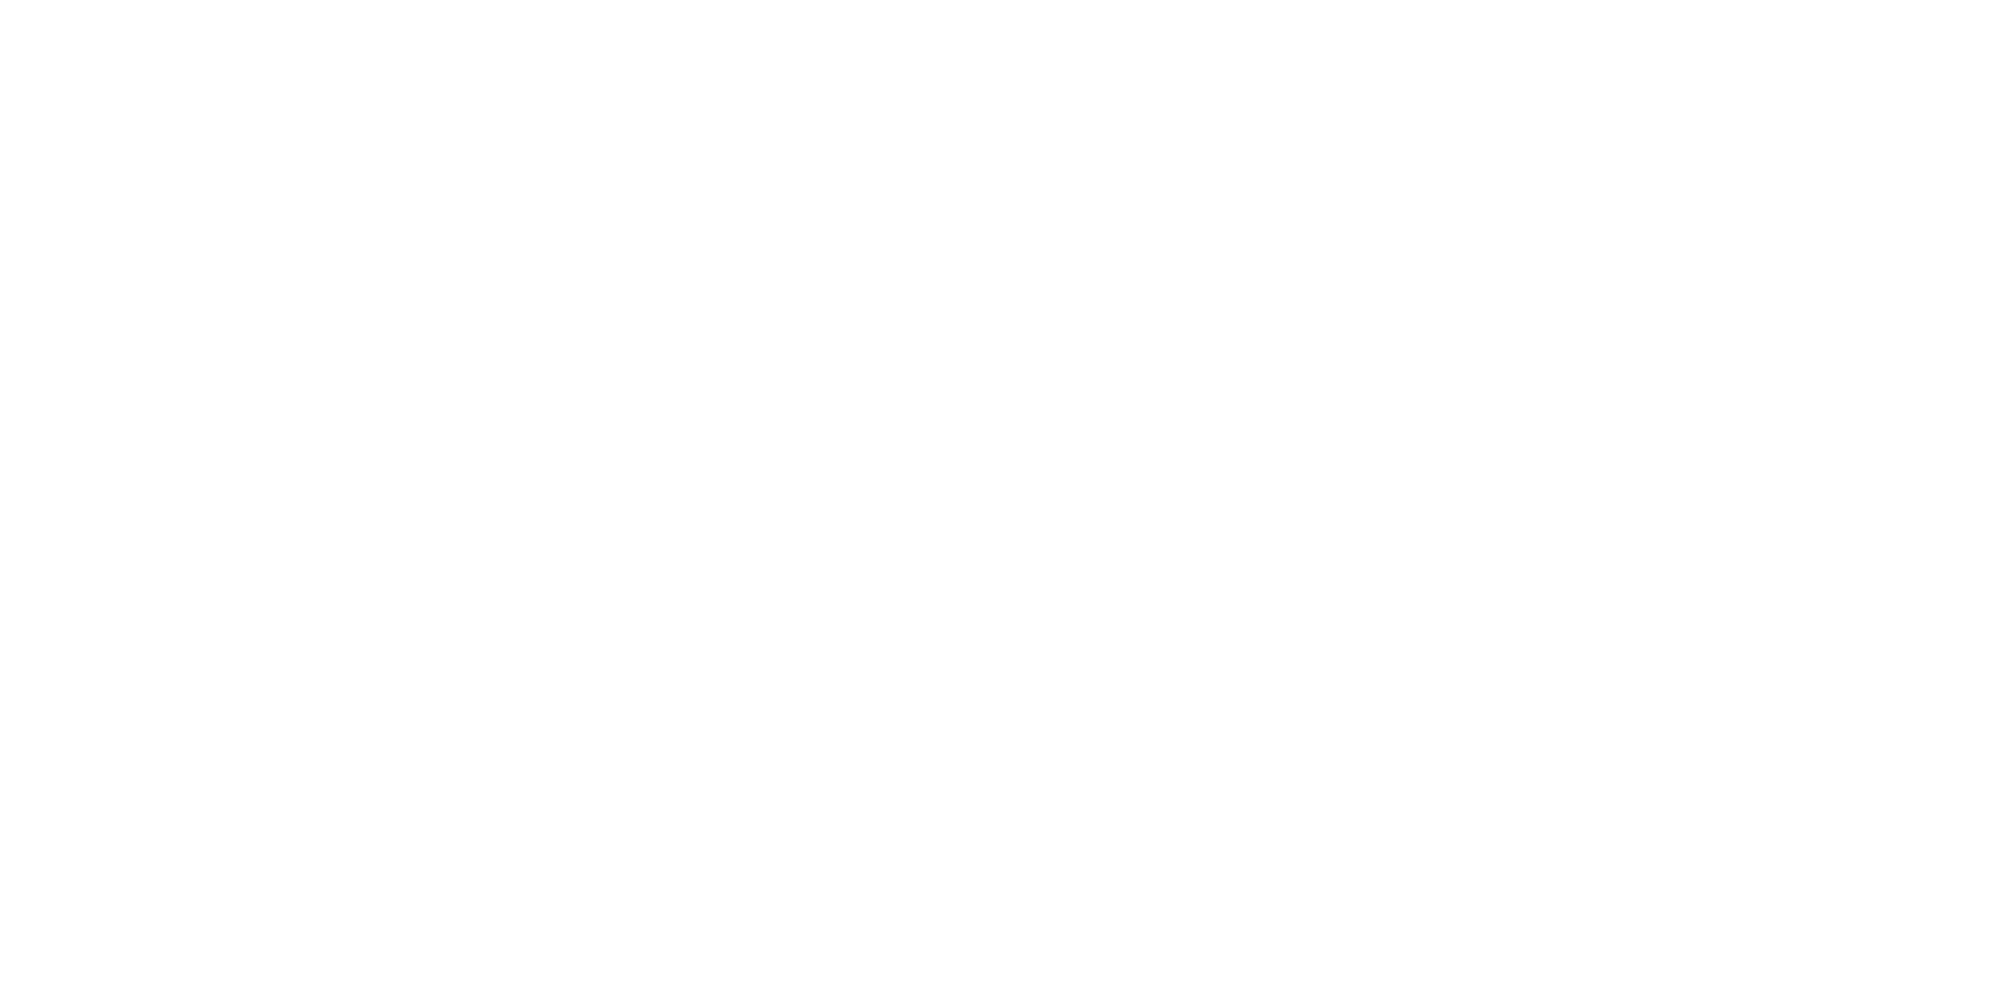

<IPython.core.display.Javascript object>


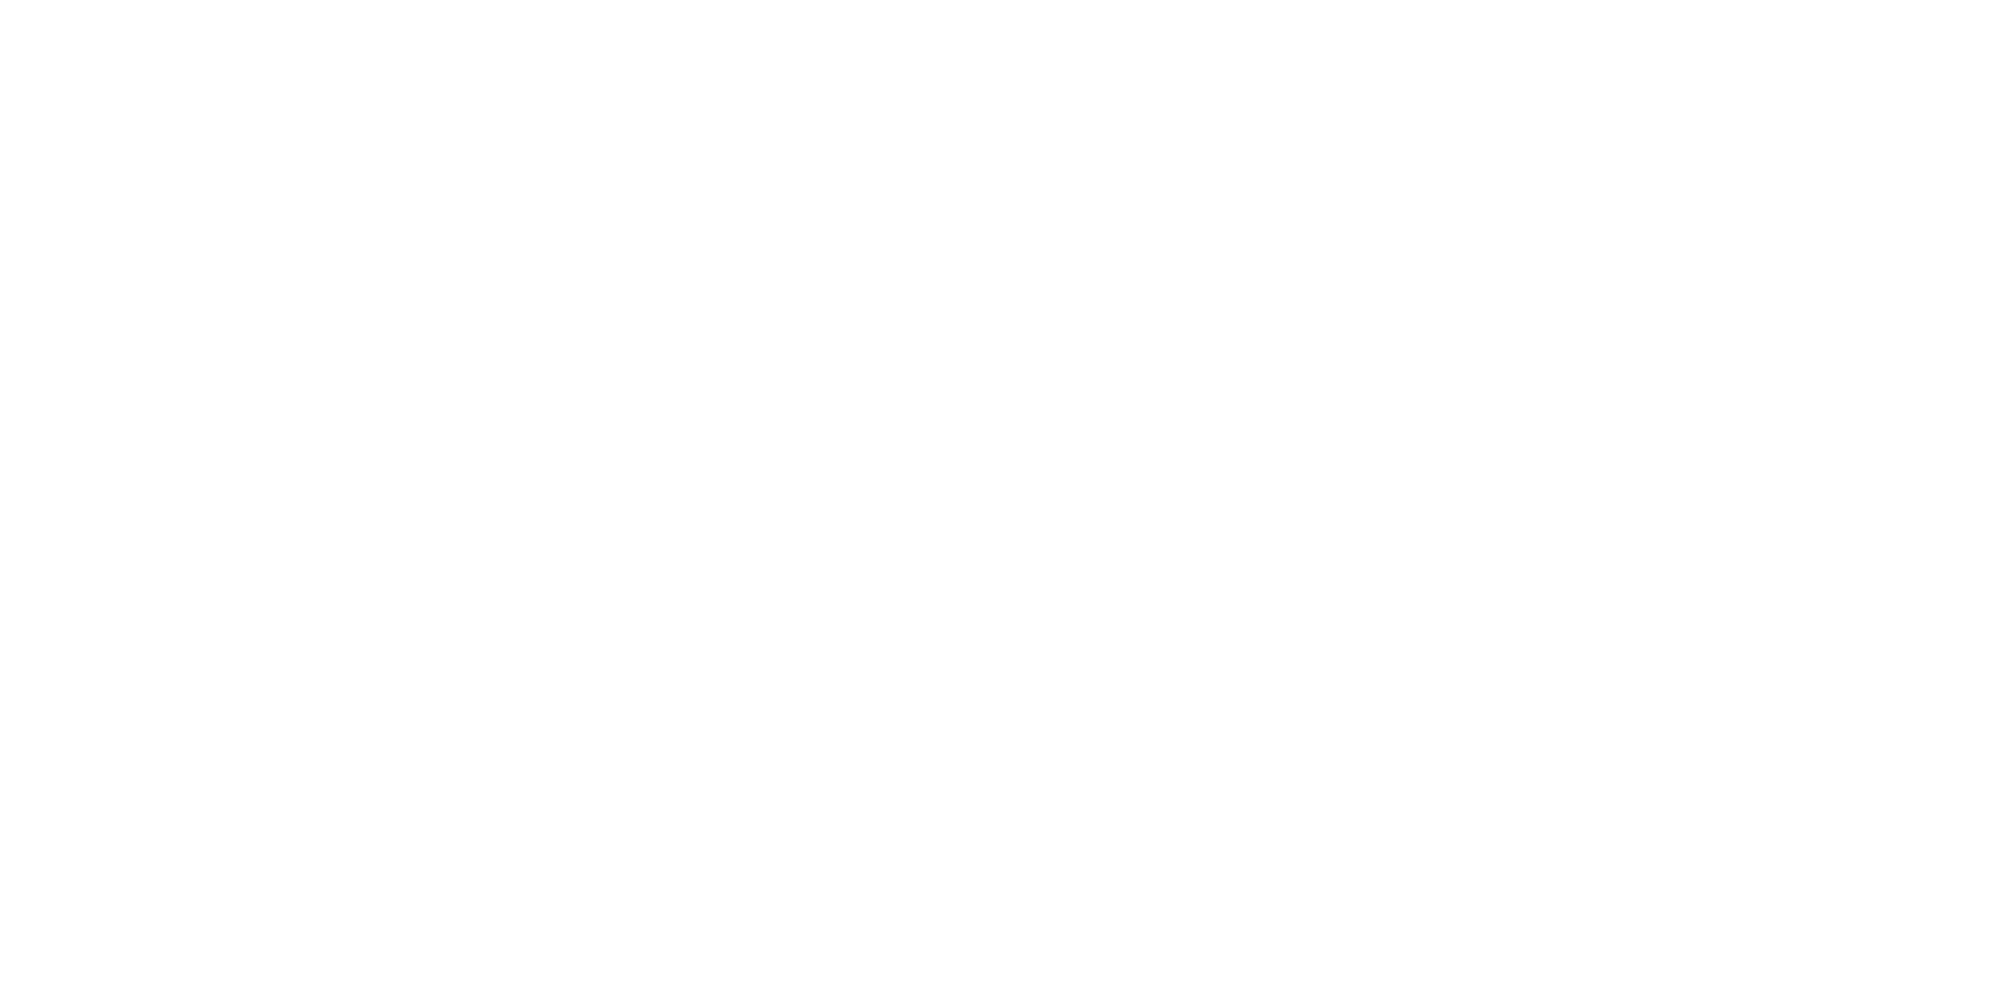

<IPython.core.display.Javascript object>


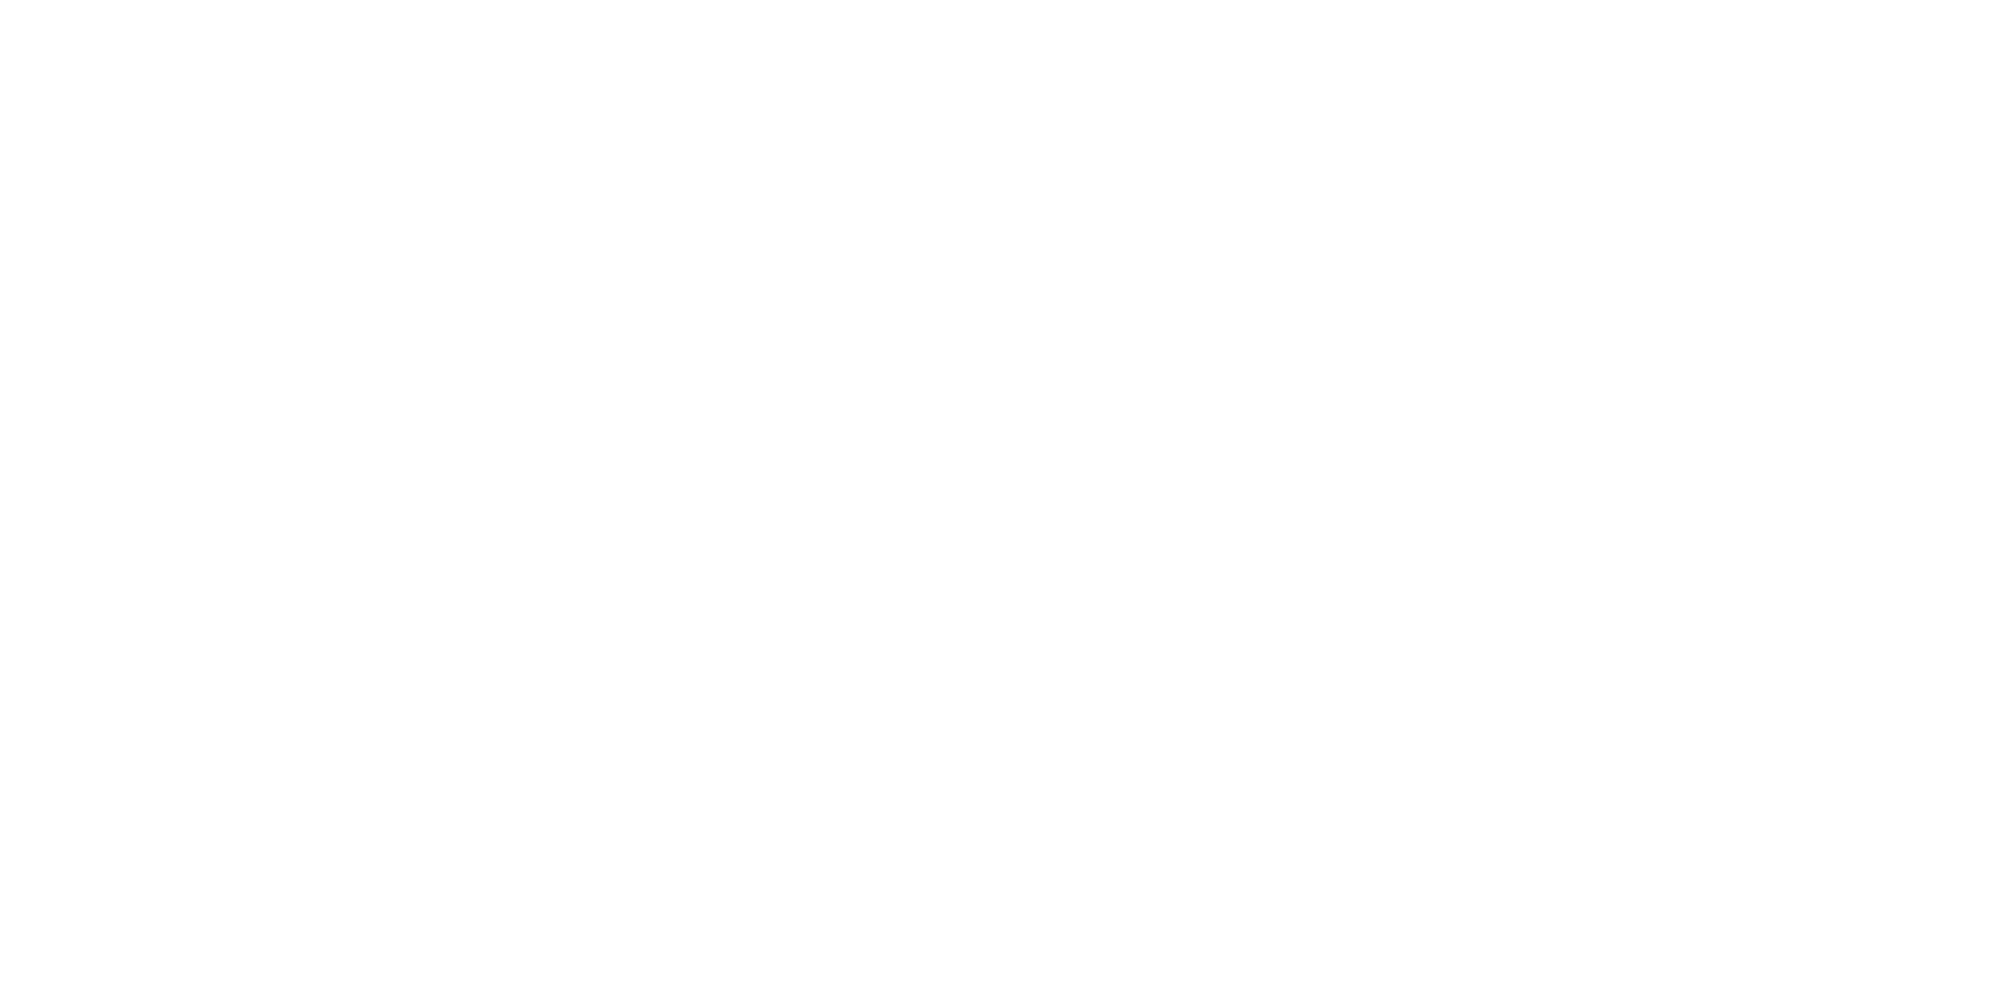

<IPython.core.display.Javascript object>


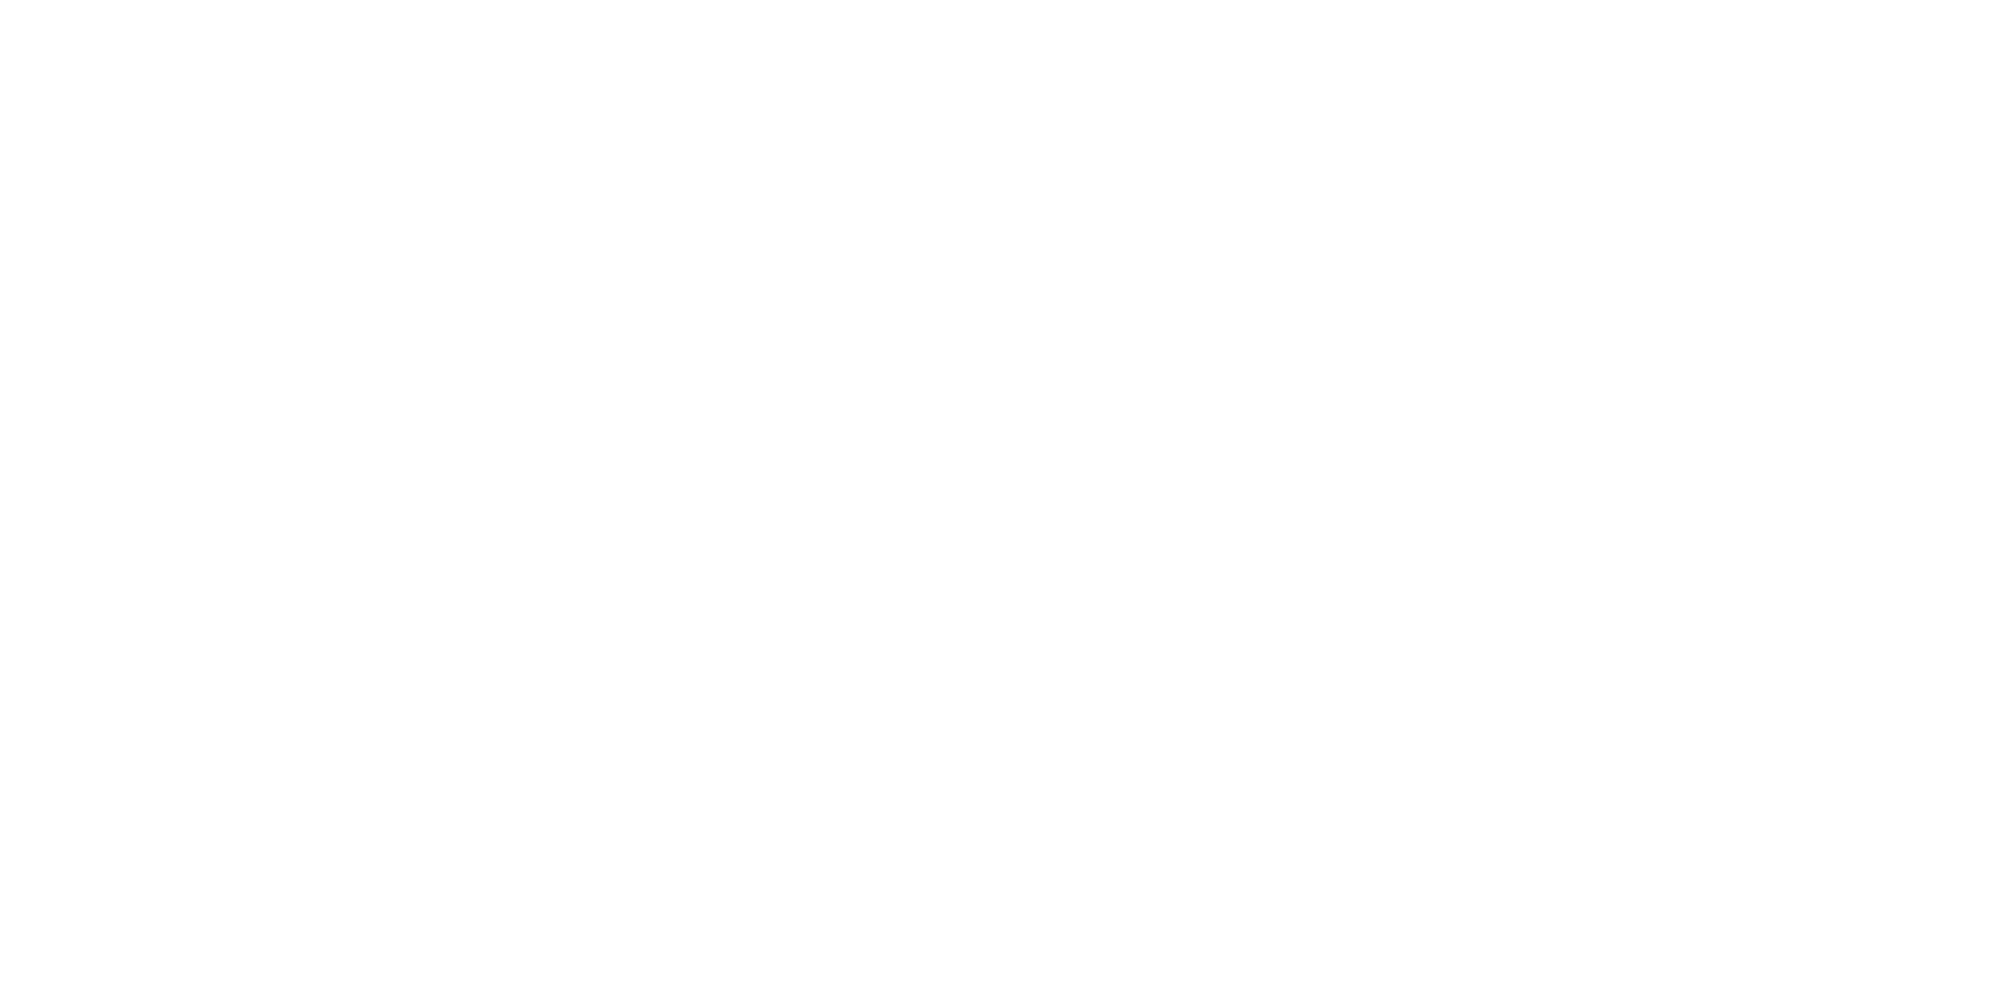

<IPython.core.display.Javascript object>


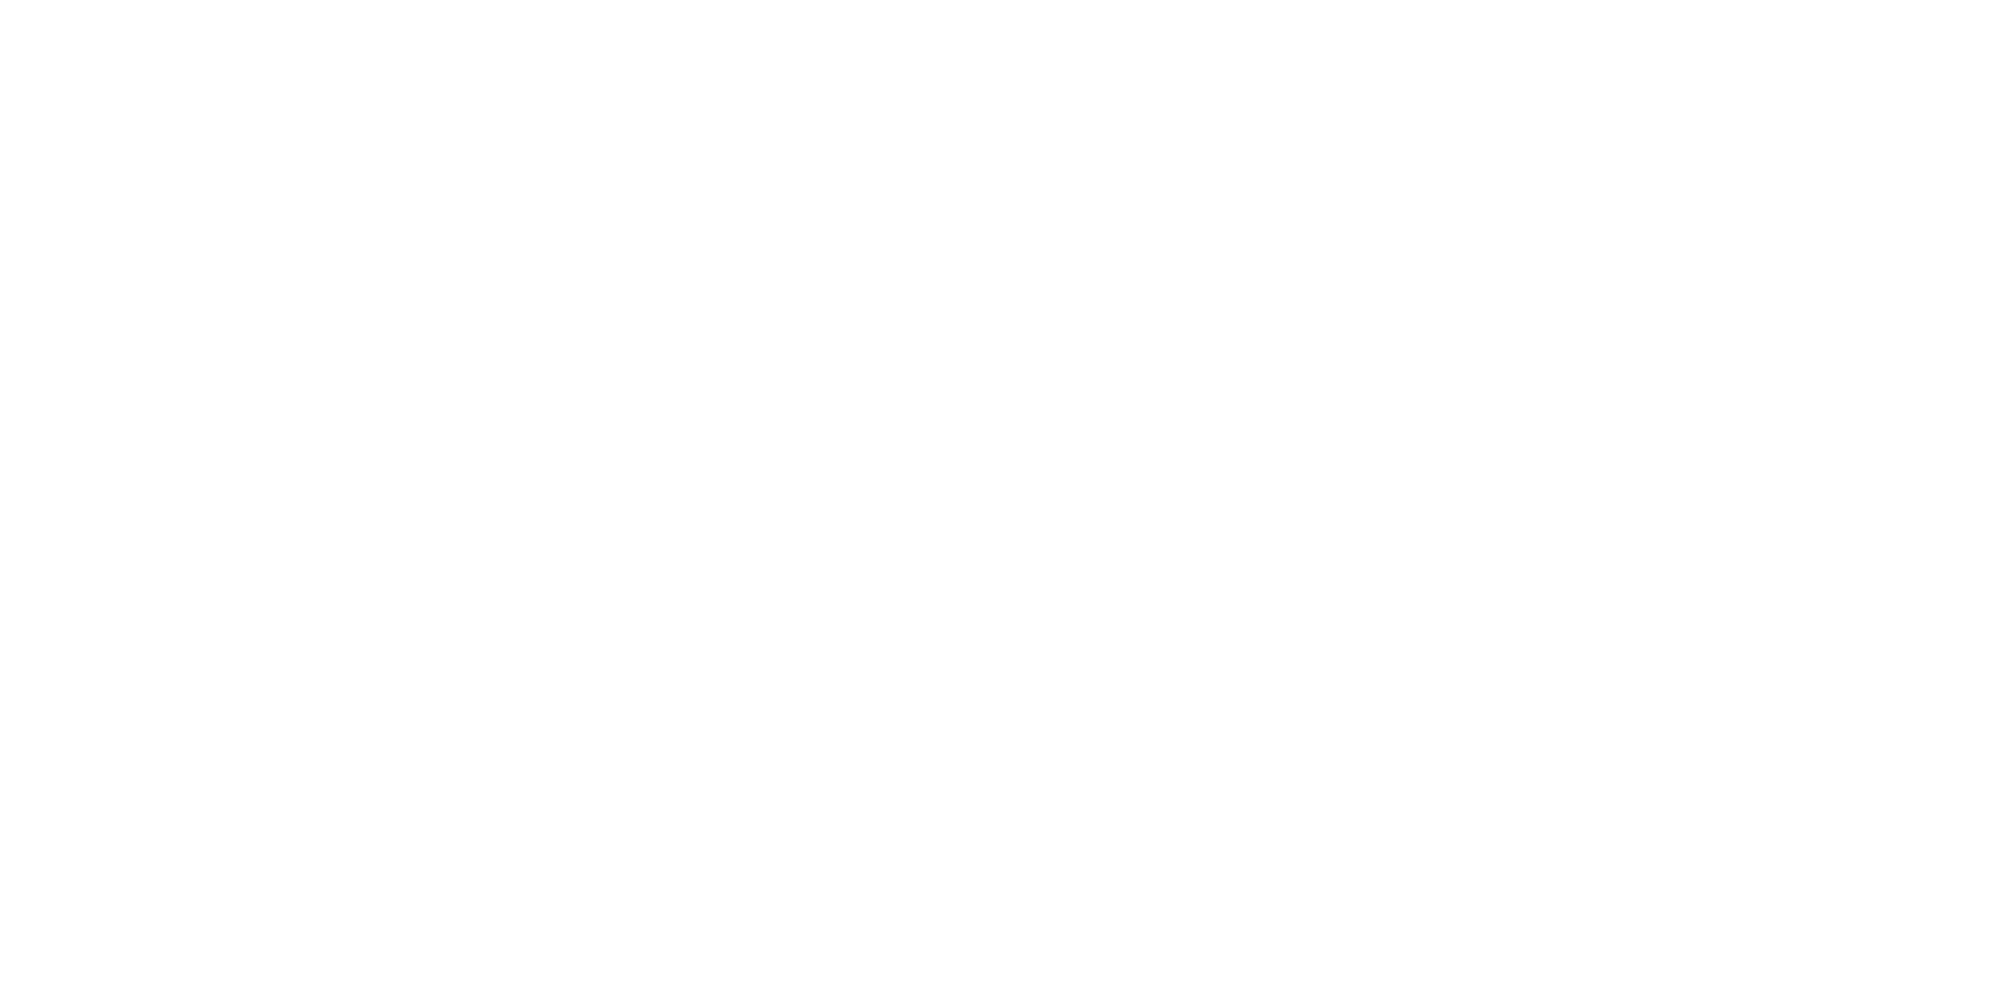

<IPython.core.display.Javascript object>


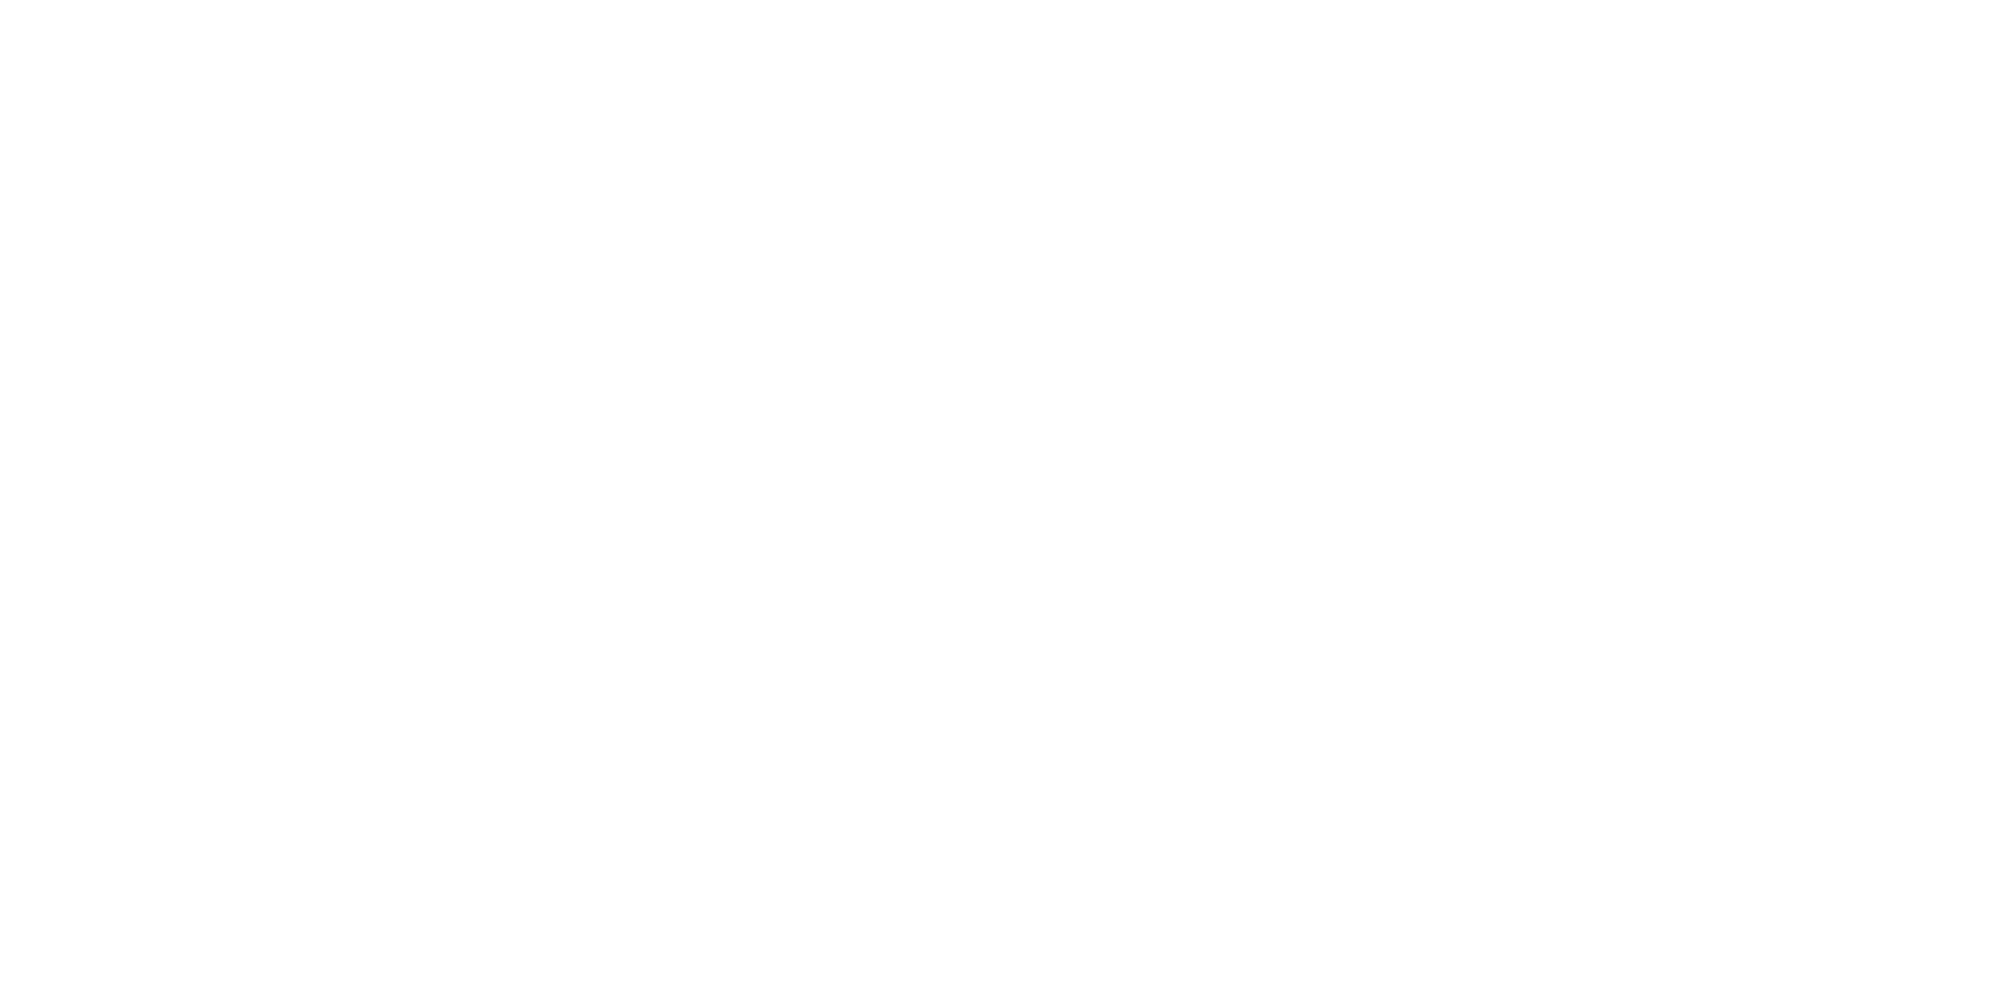

<IPython.core.display.Javascript object>


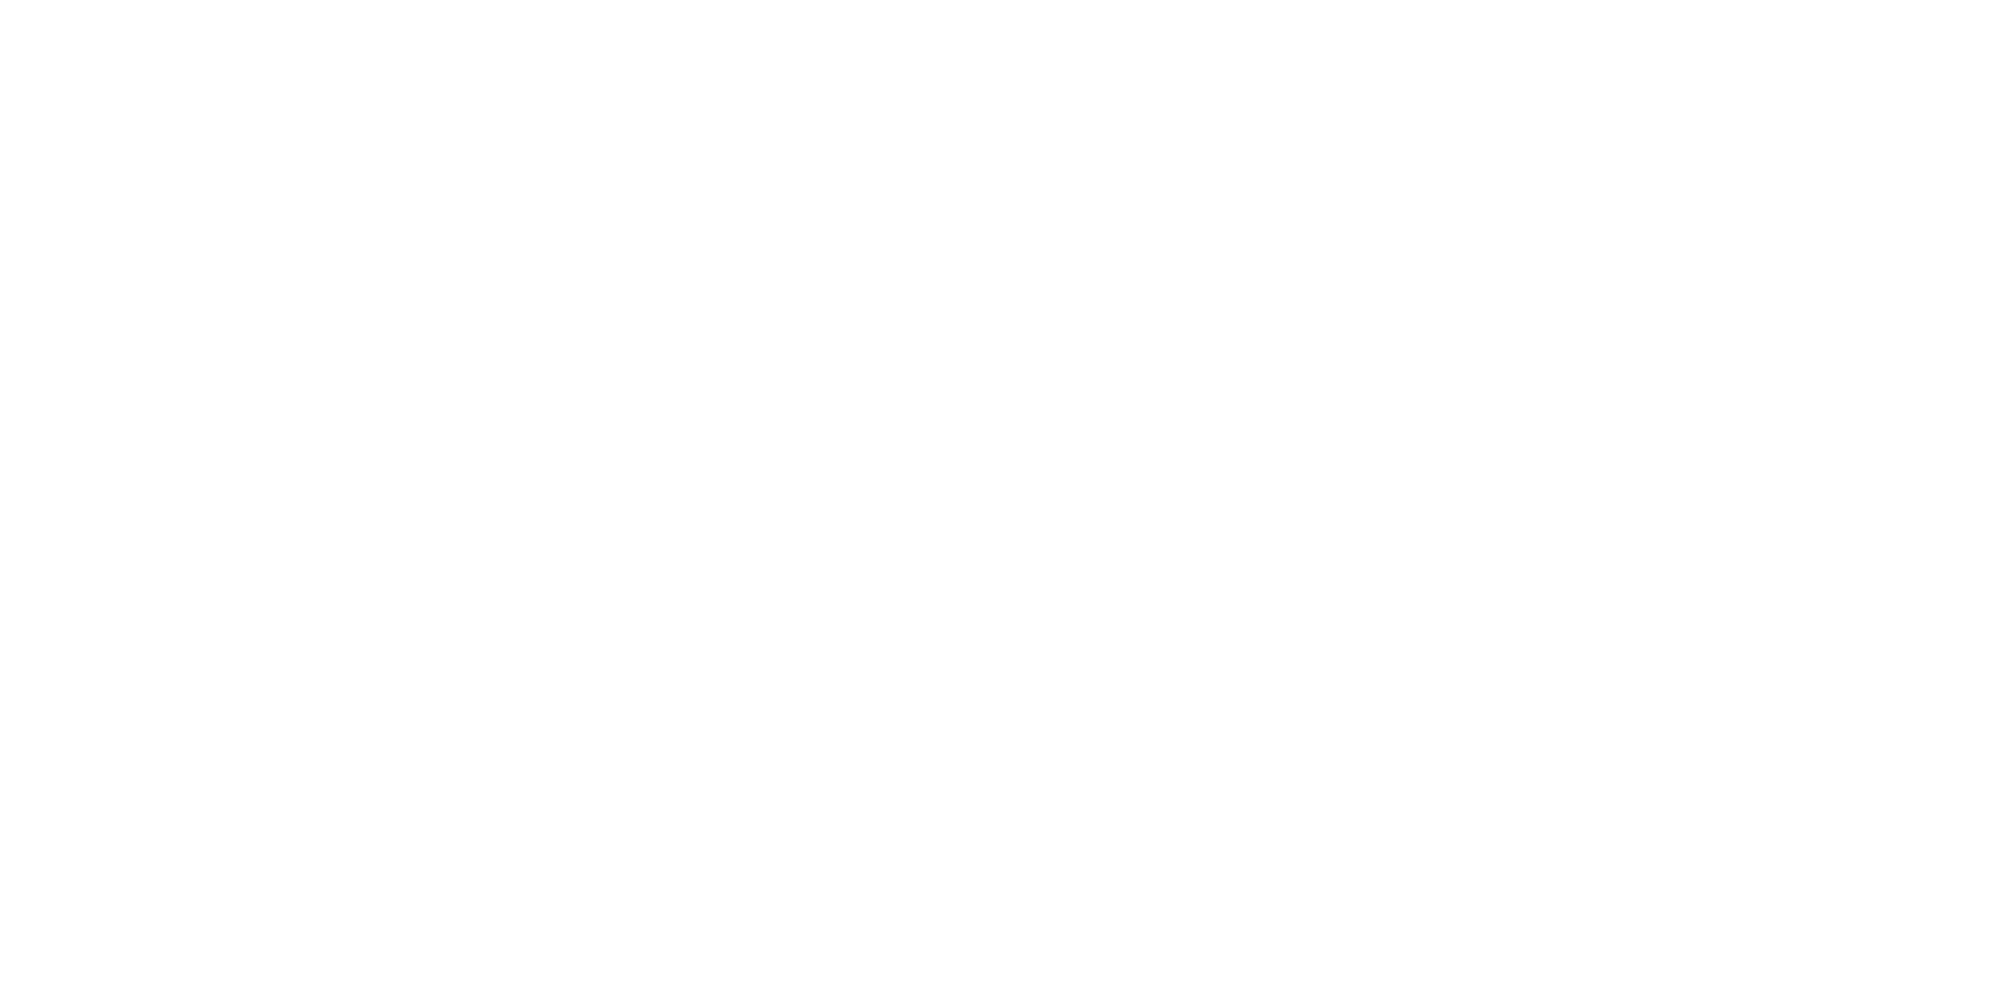

<IPython.core.display.Javascript object>


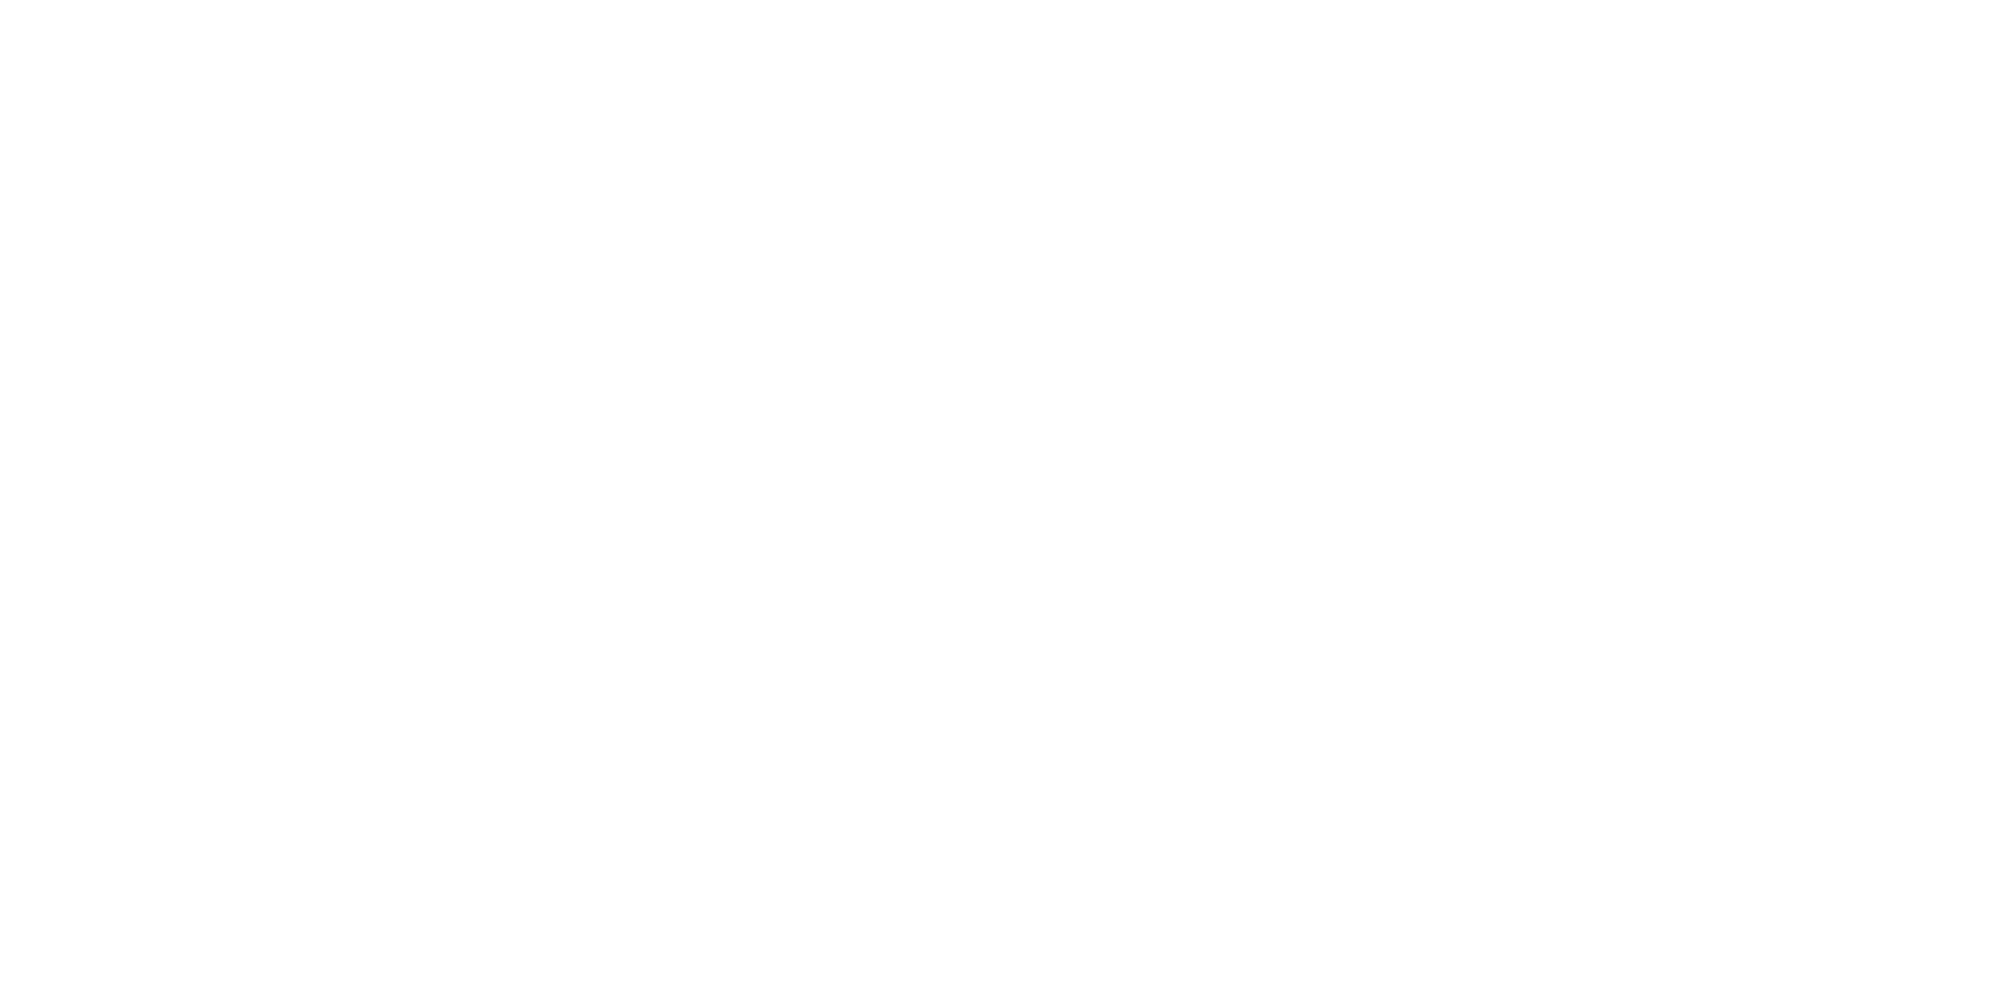

<IPython.core.display.Javascript object>


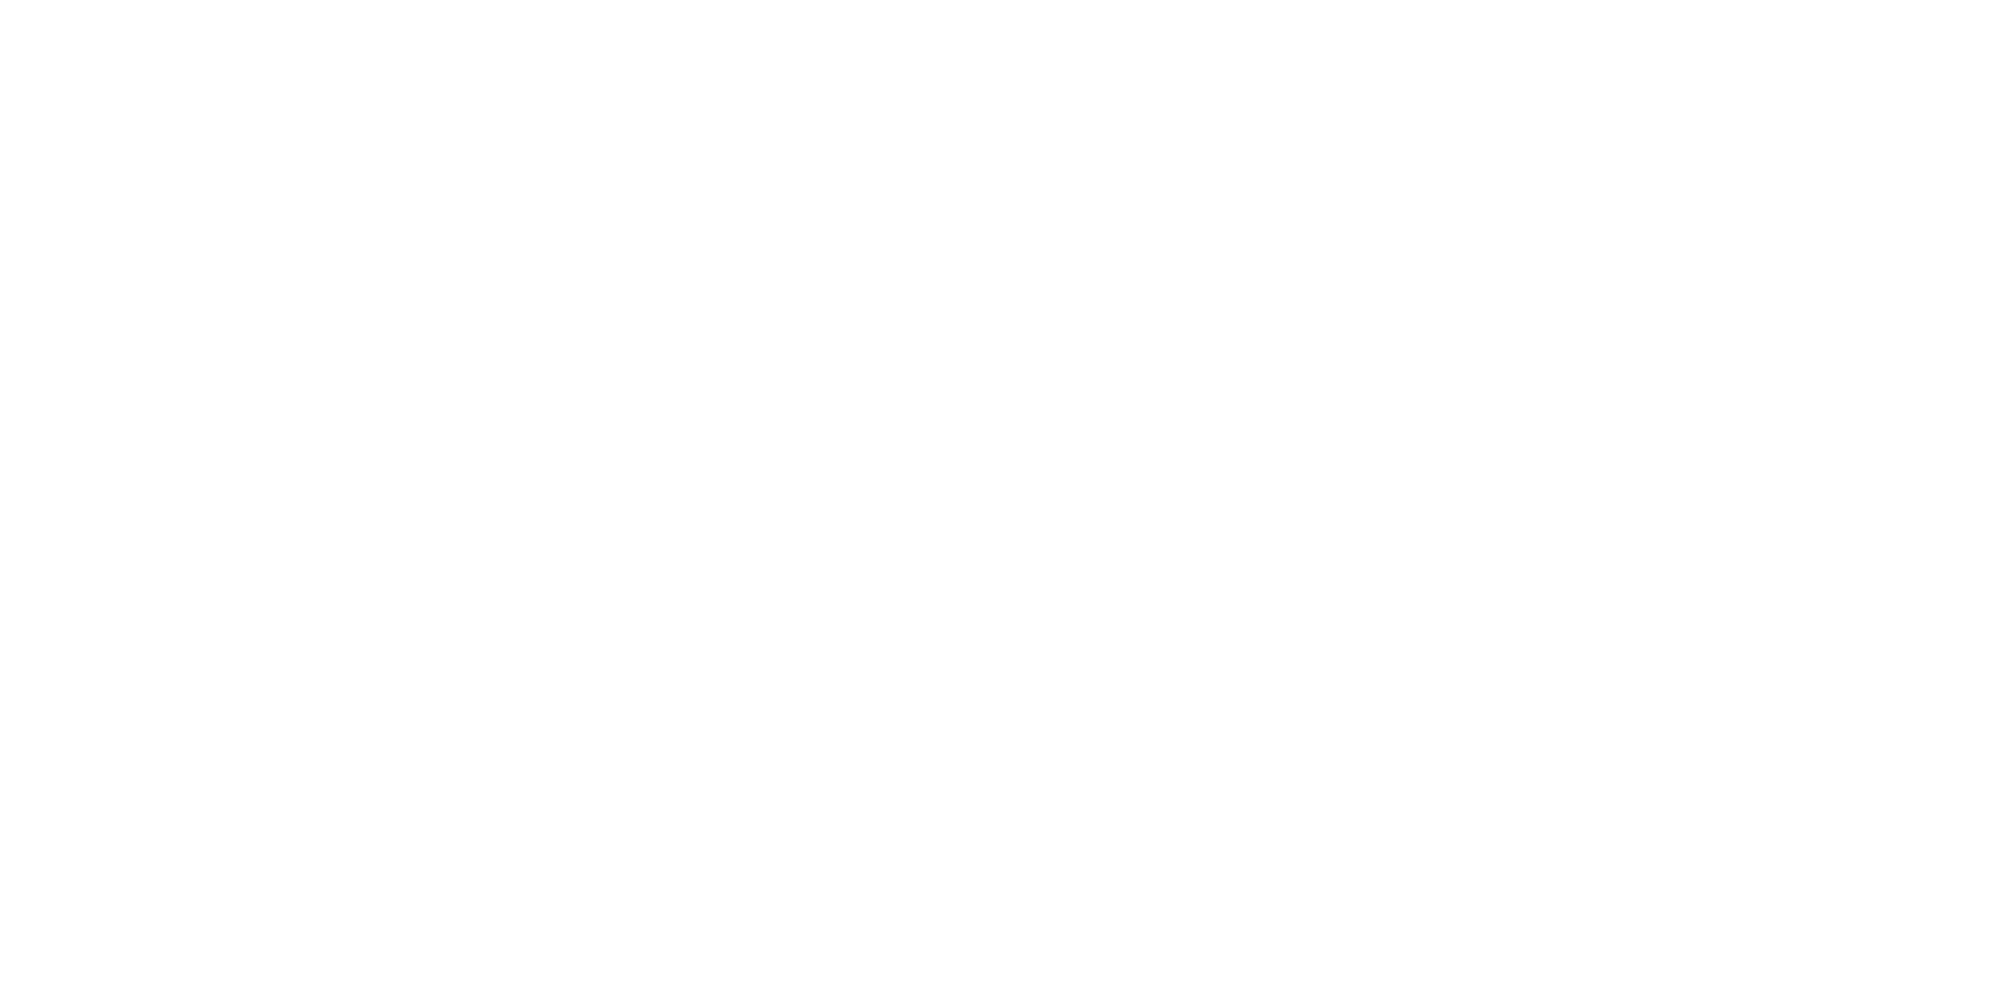

<IPython.core.display.Javascript object>


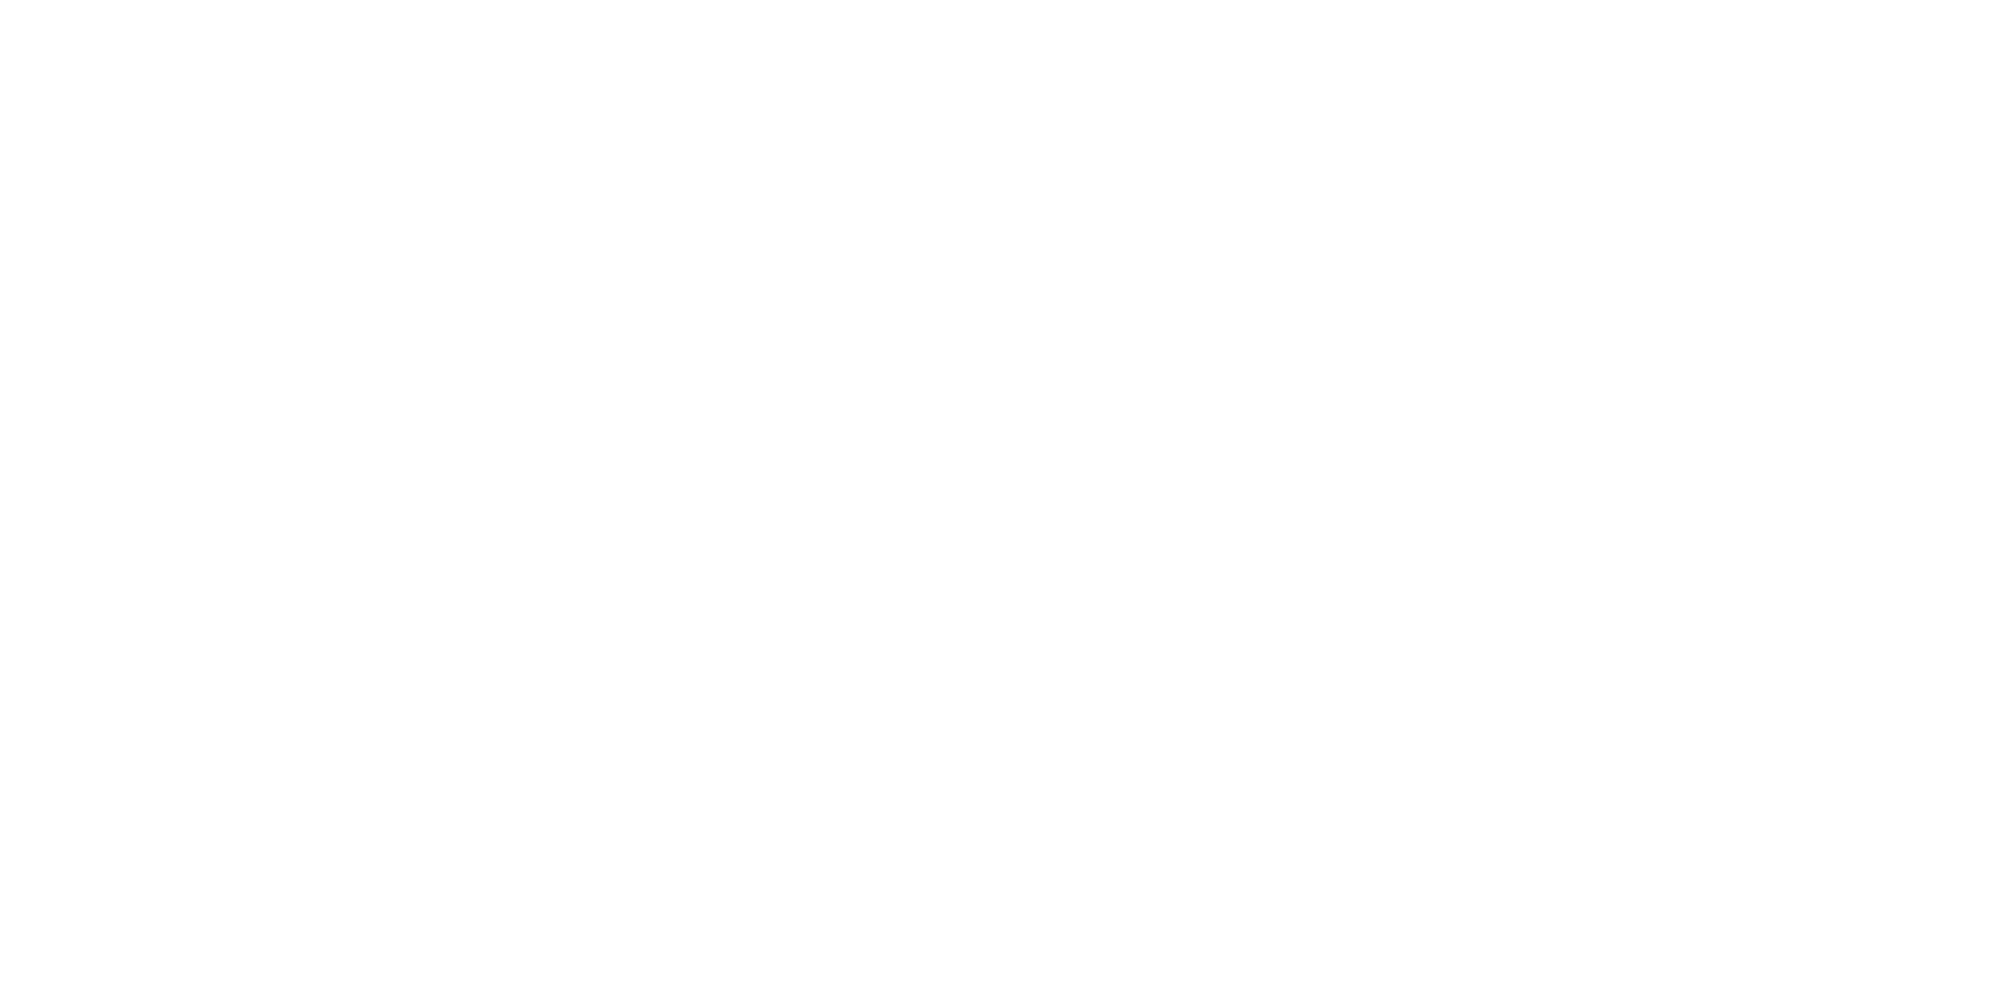

<IPython.core.display.Javascript object>


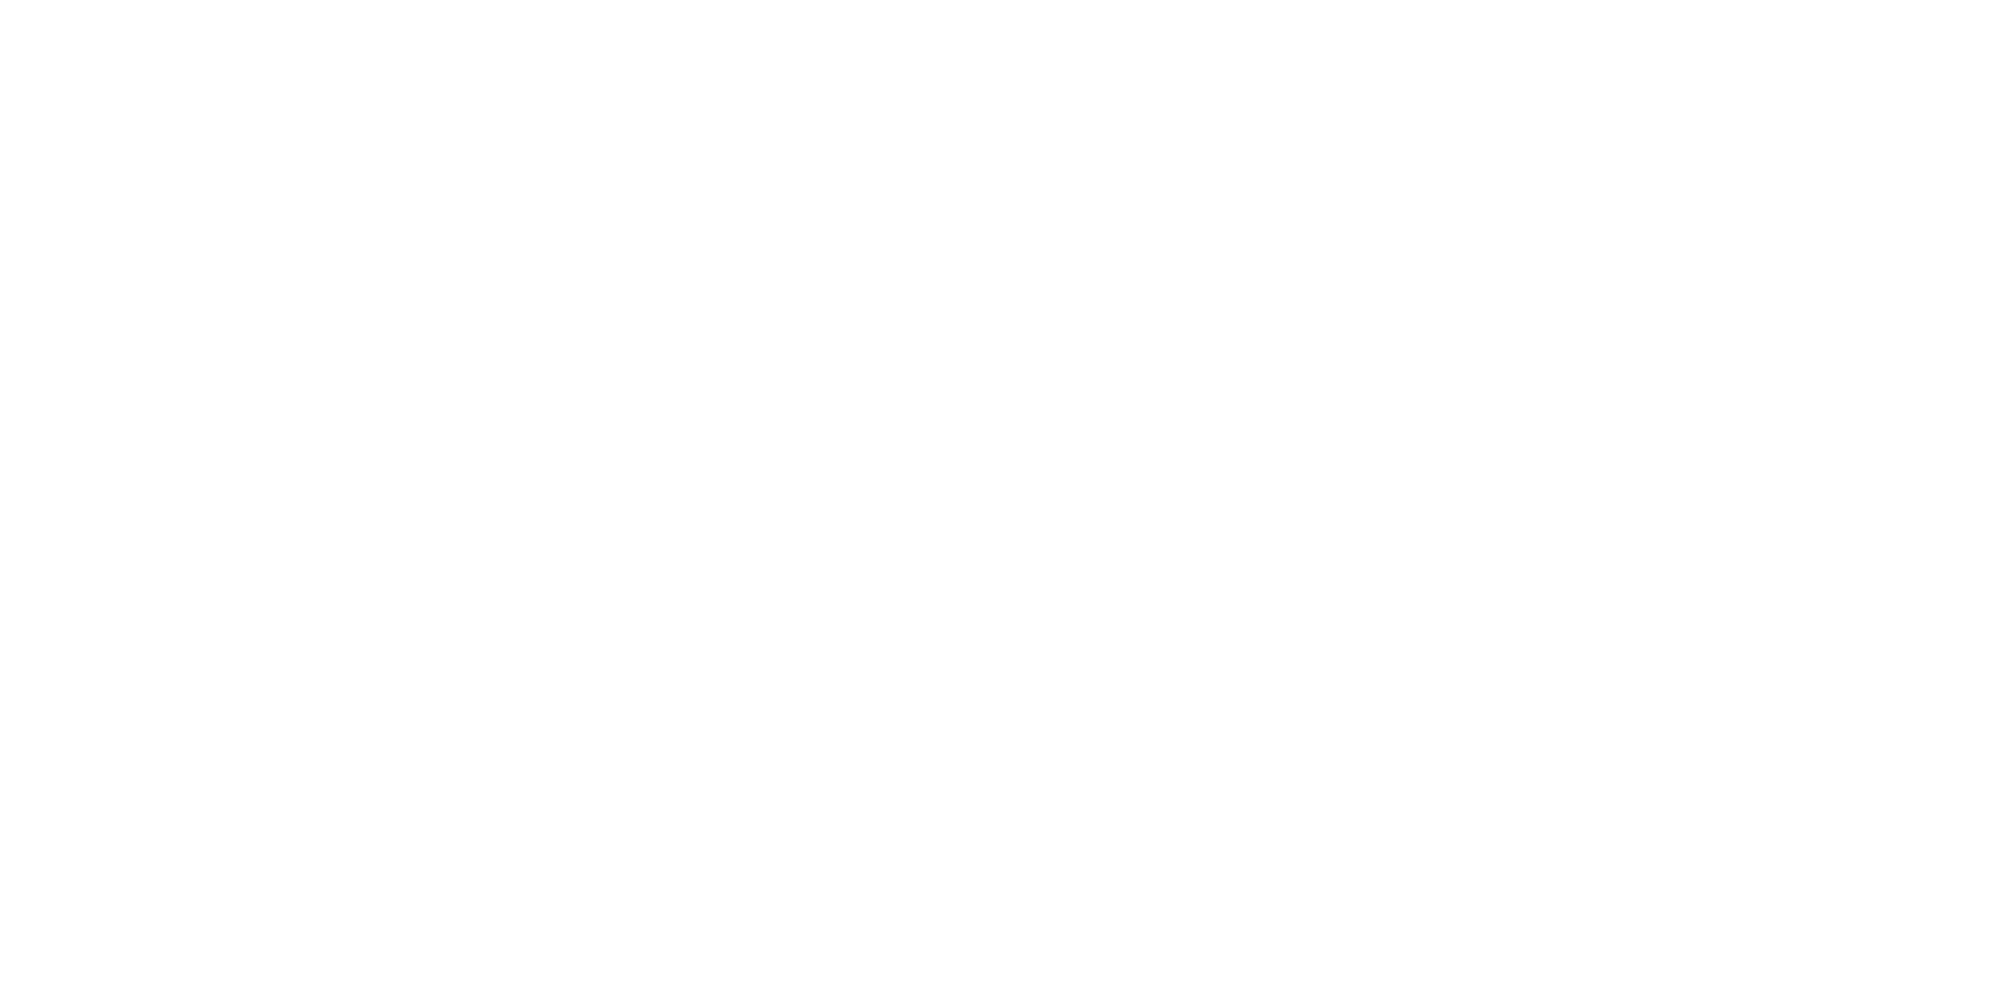

<IPython.core.display.Javascript object>


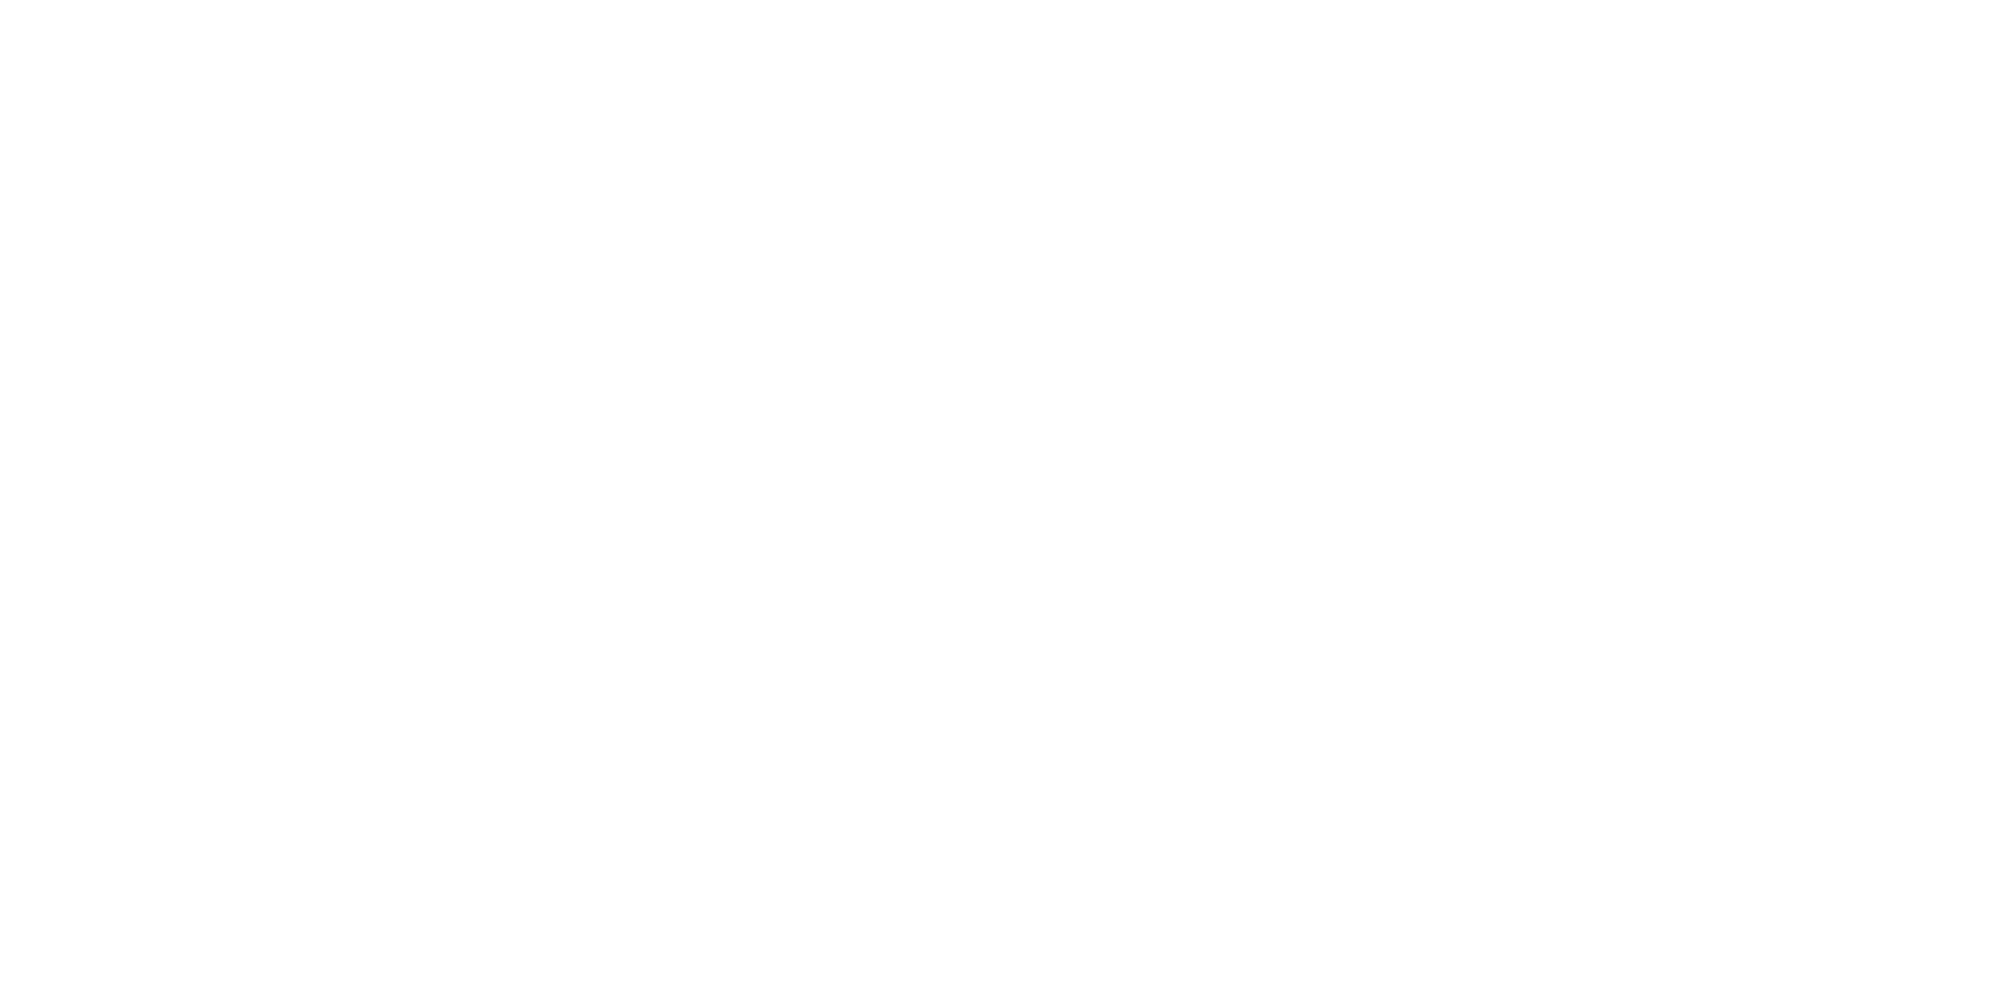

<IPython.core.display.Javascript object>


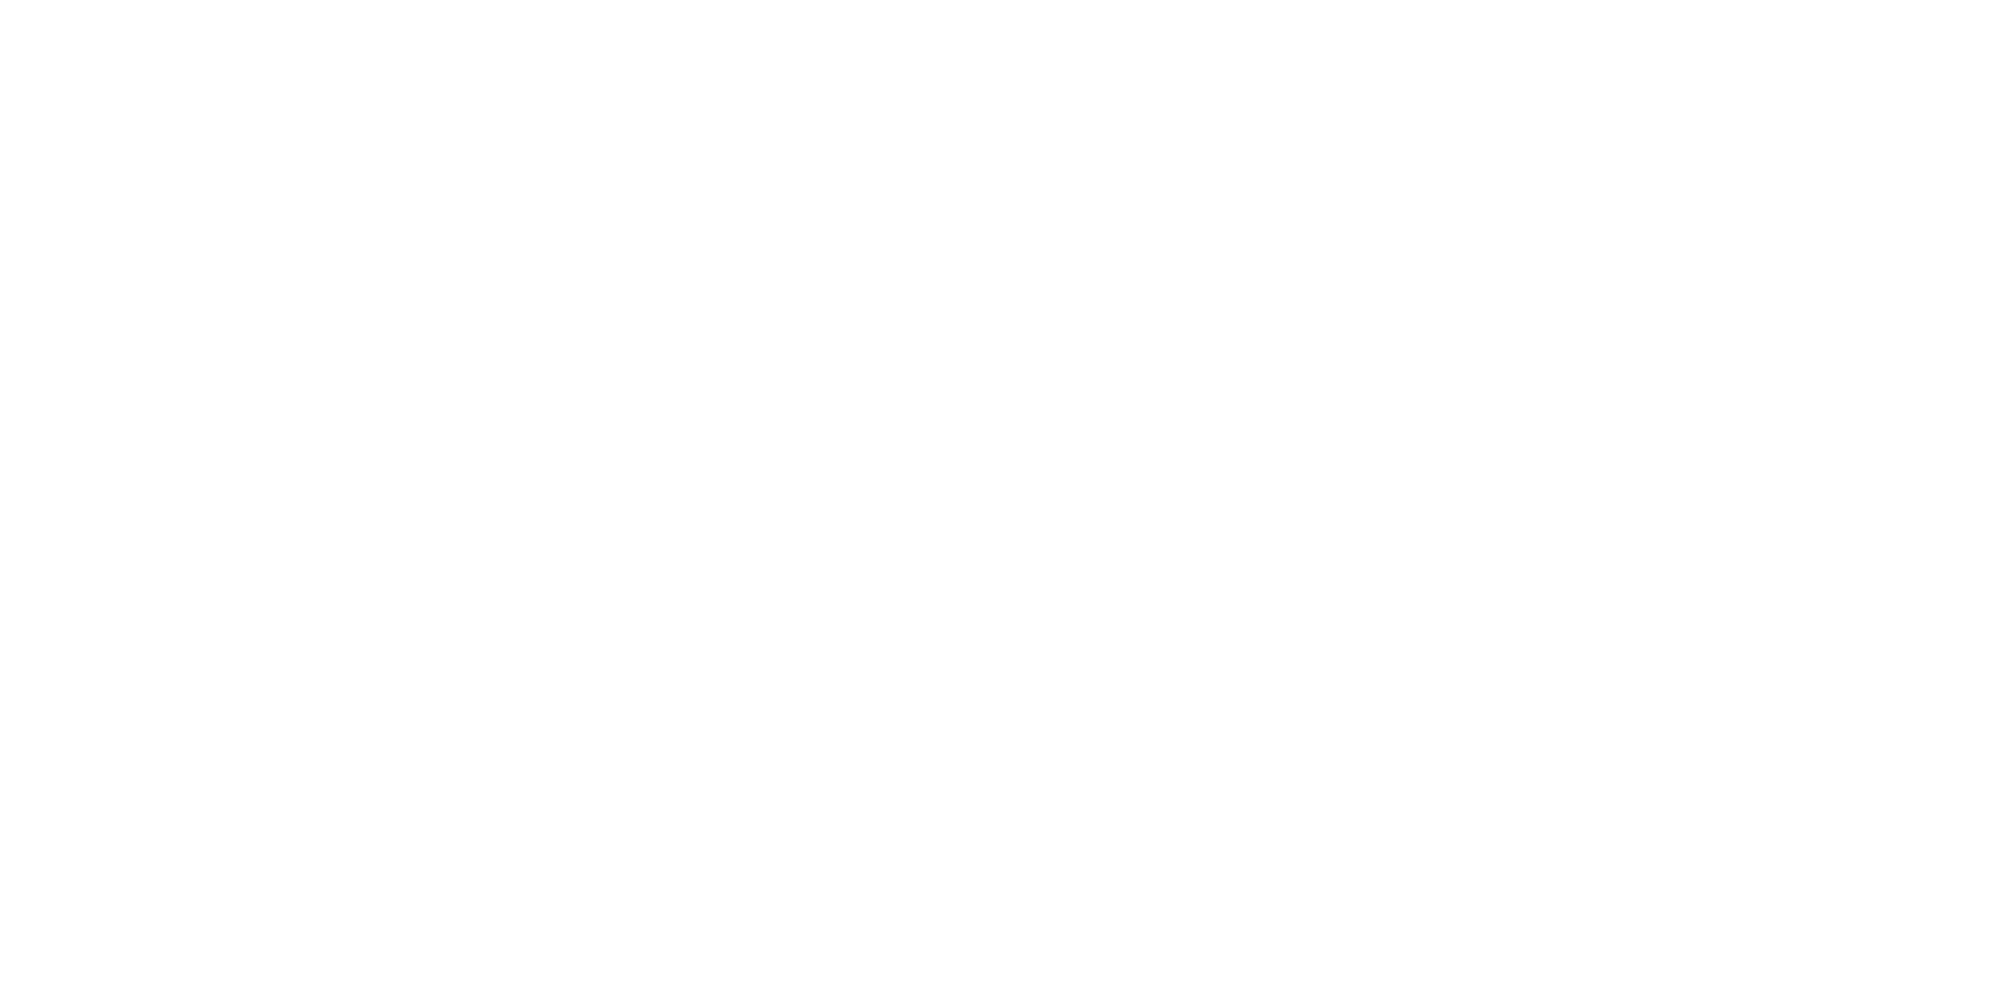

<IPython.core.display.Javascript object>


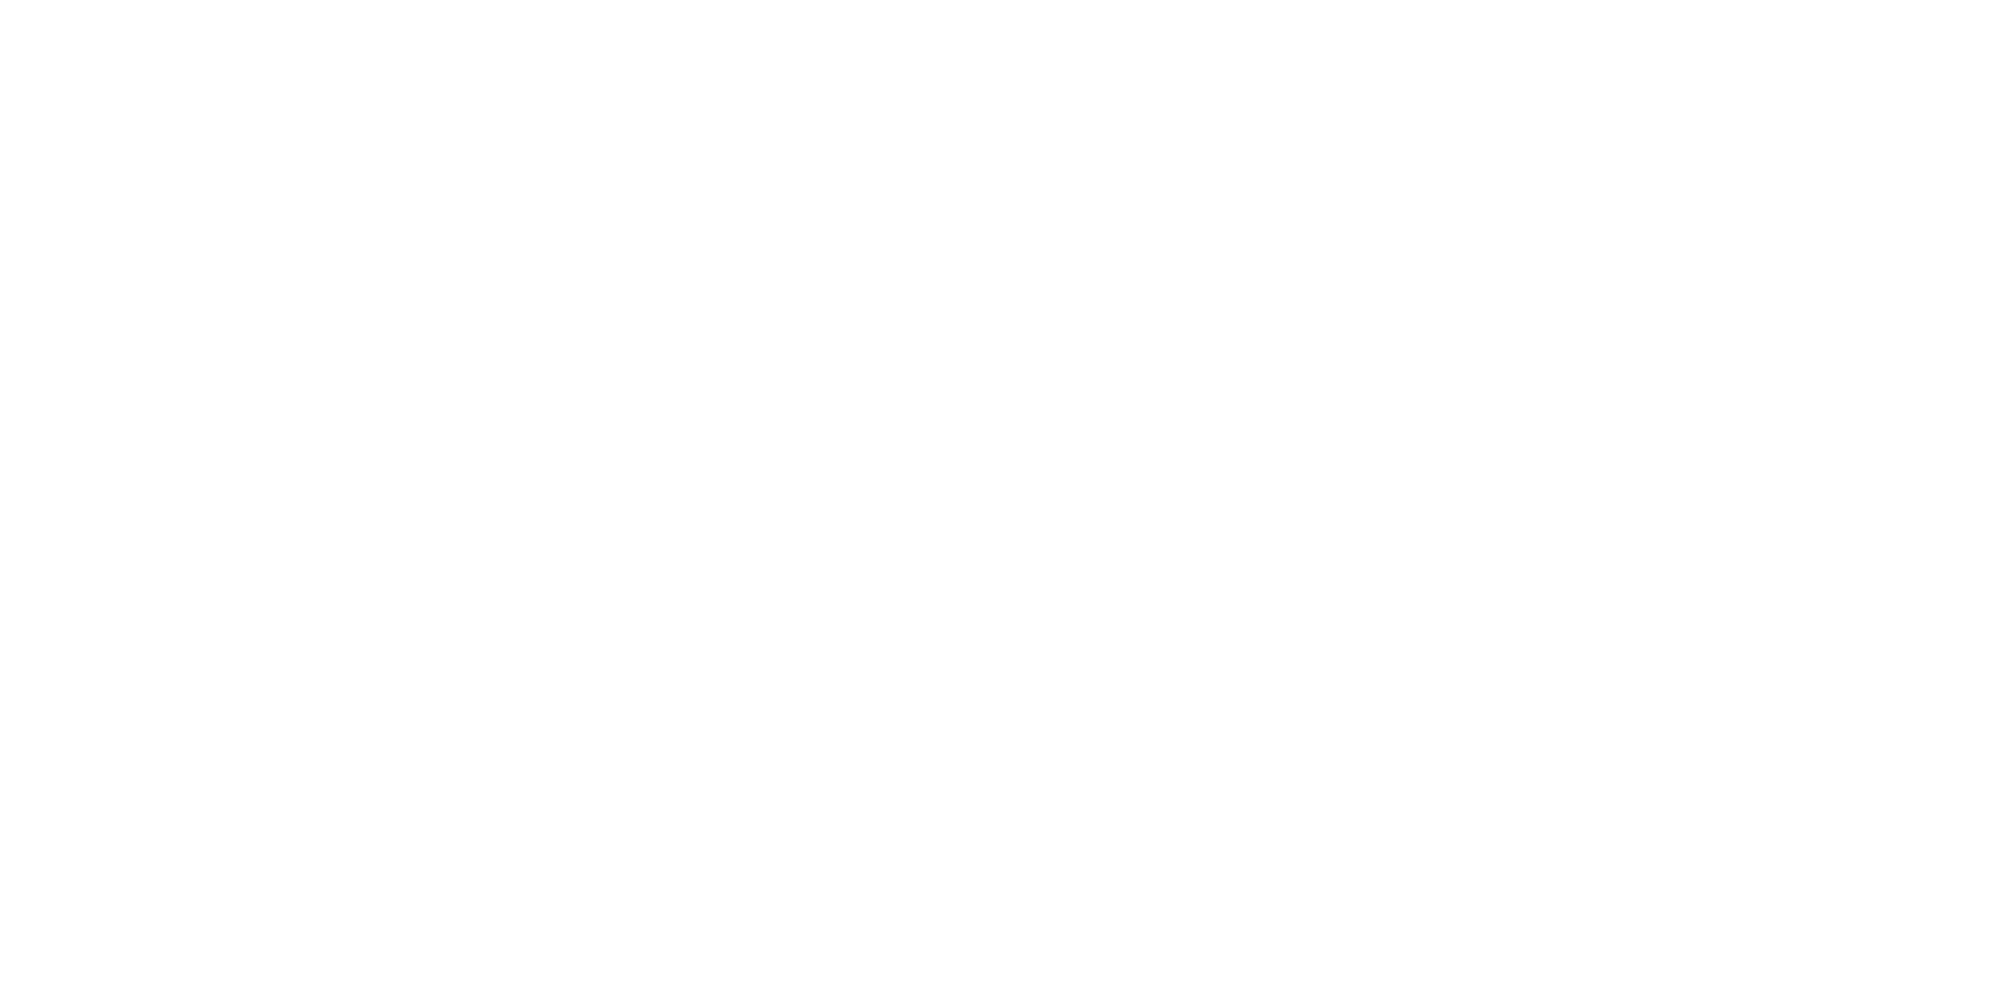

<IPython.core.display.Javascript object>


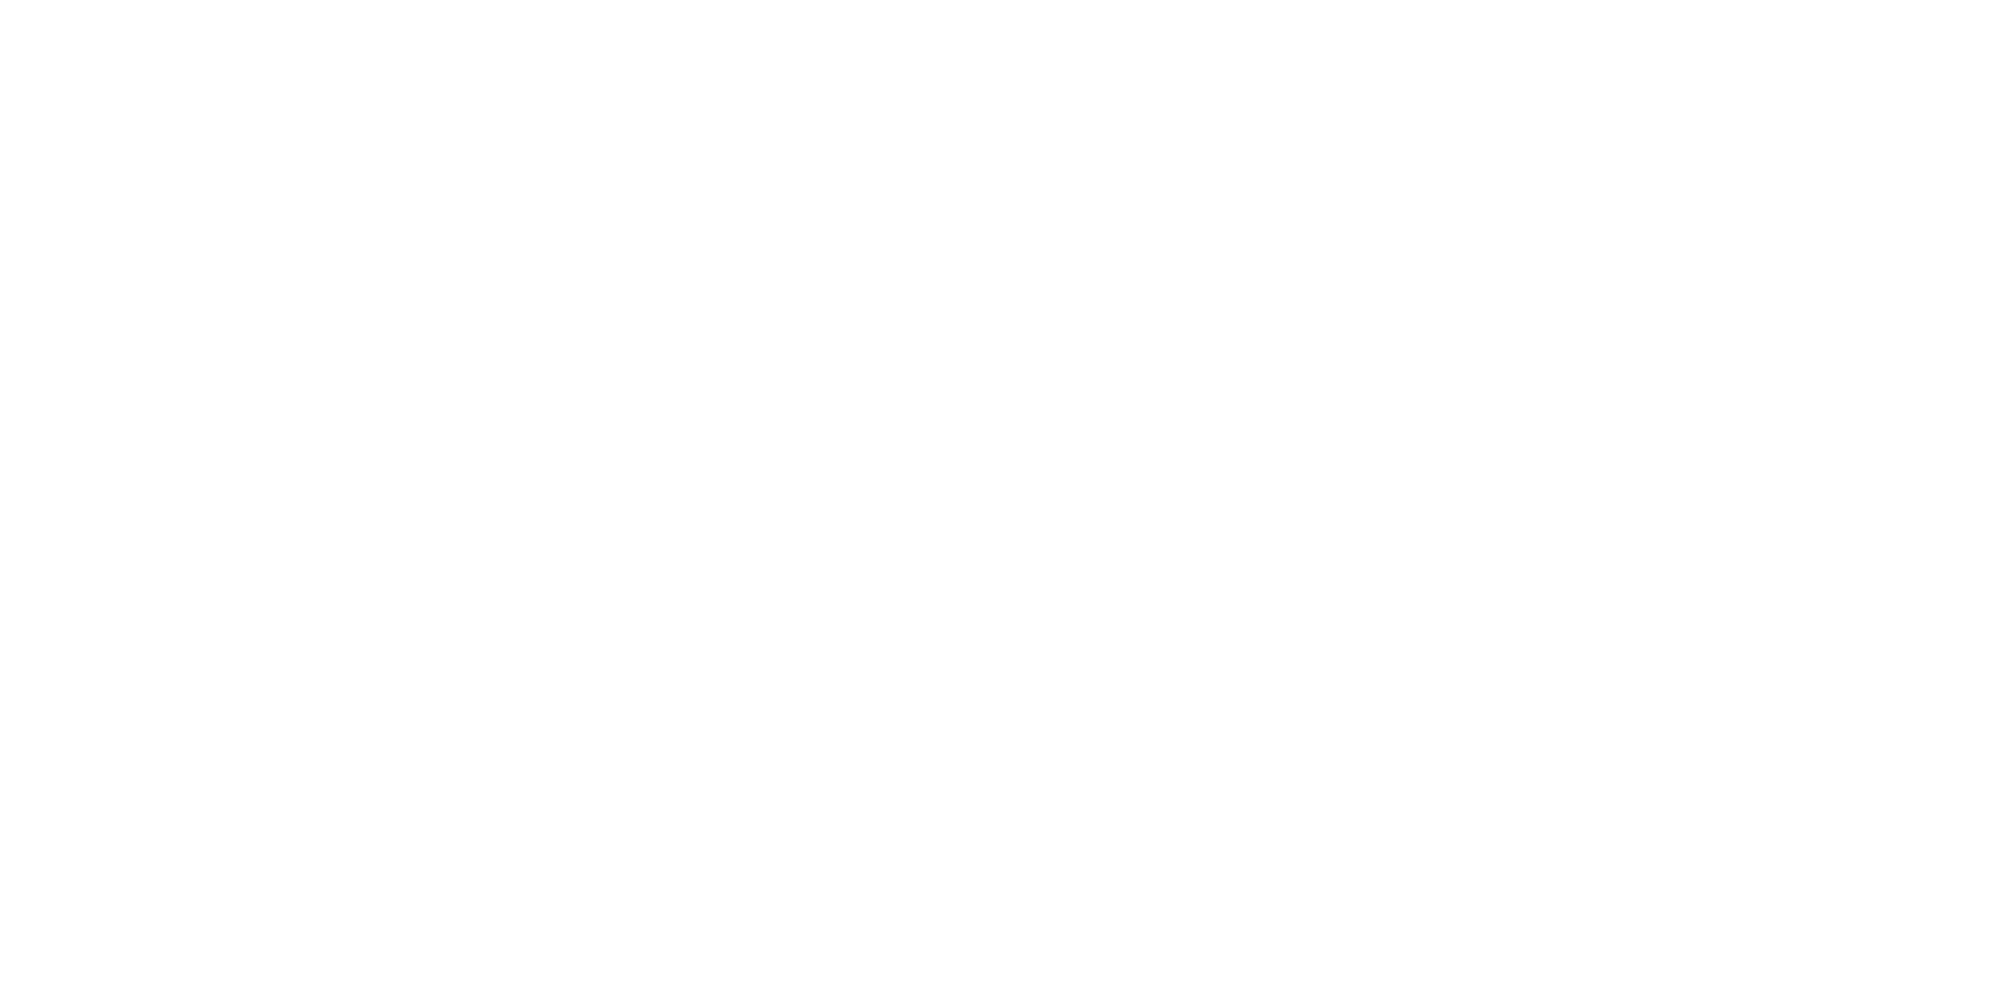

<IPython.core.display.Javascript object>


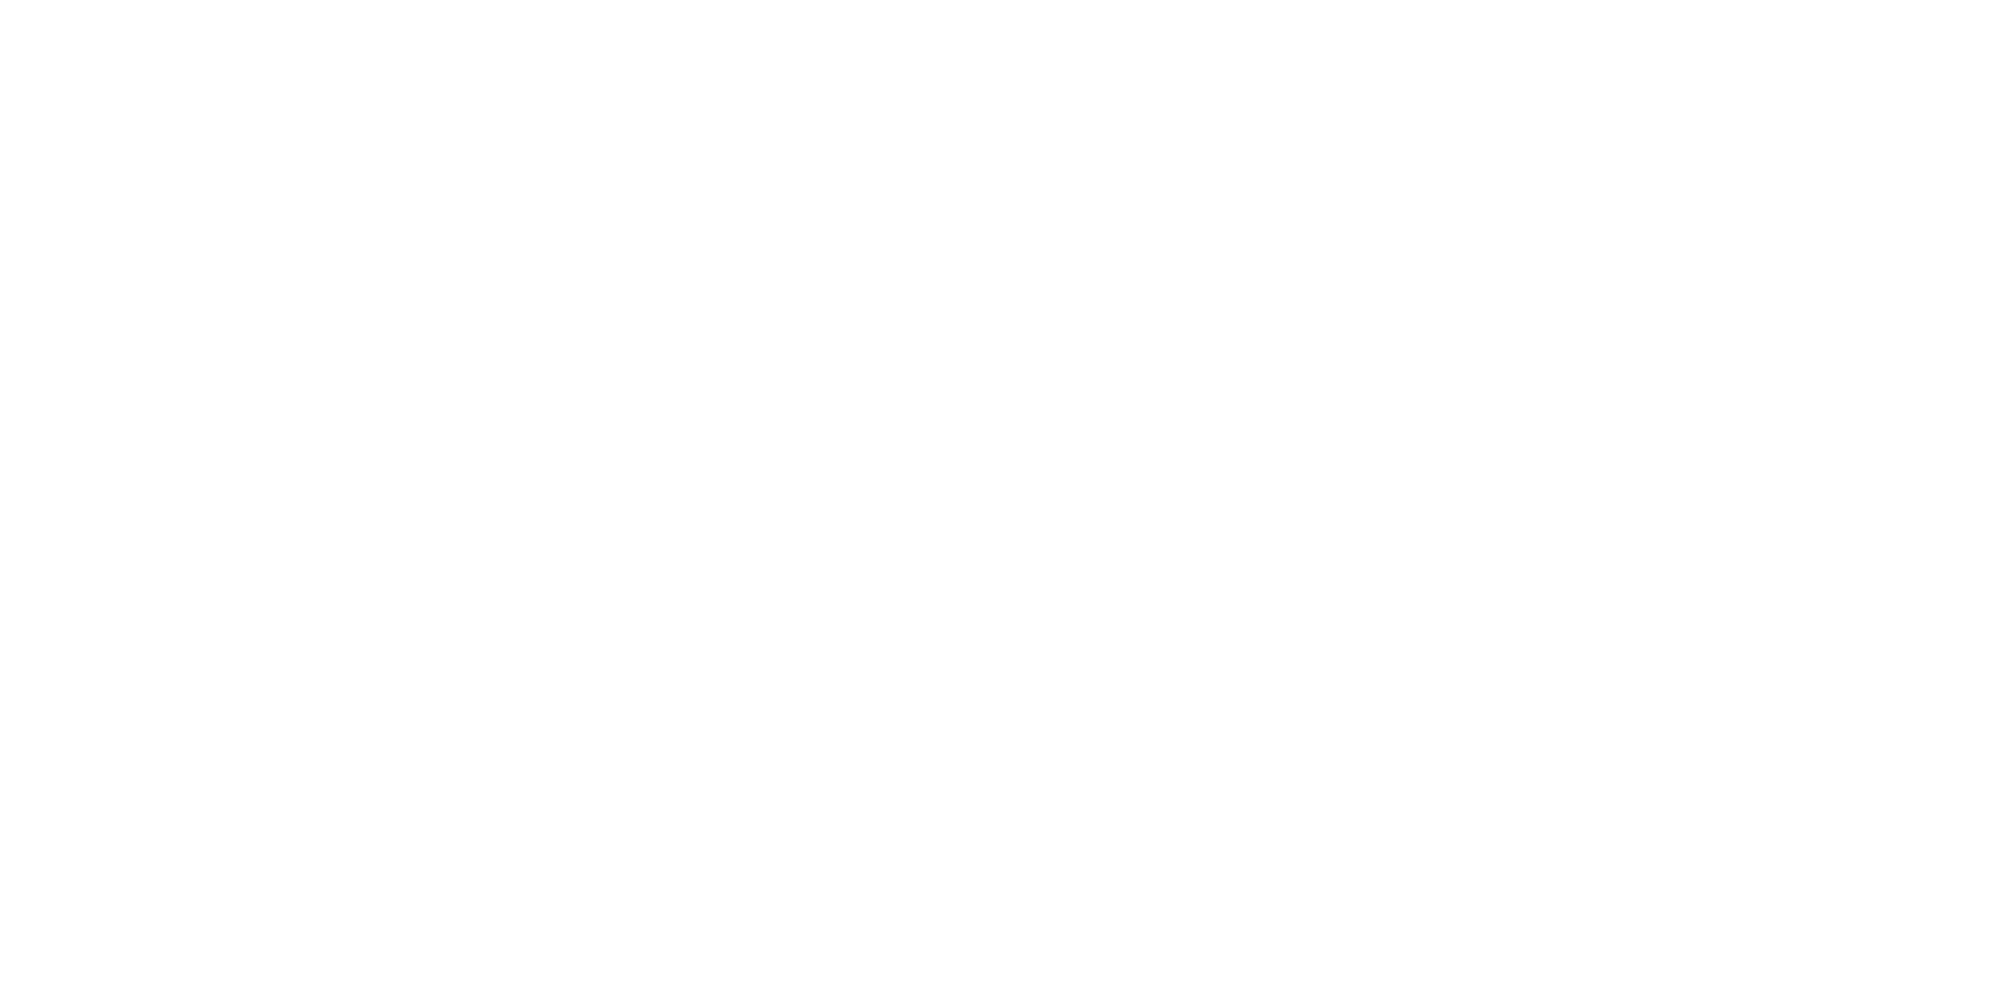

<IPython.core.display.Javascript object>


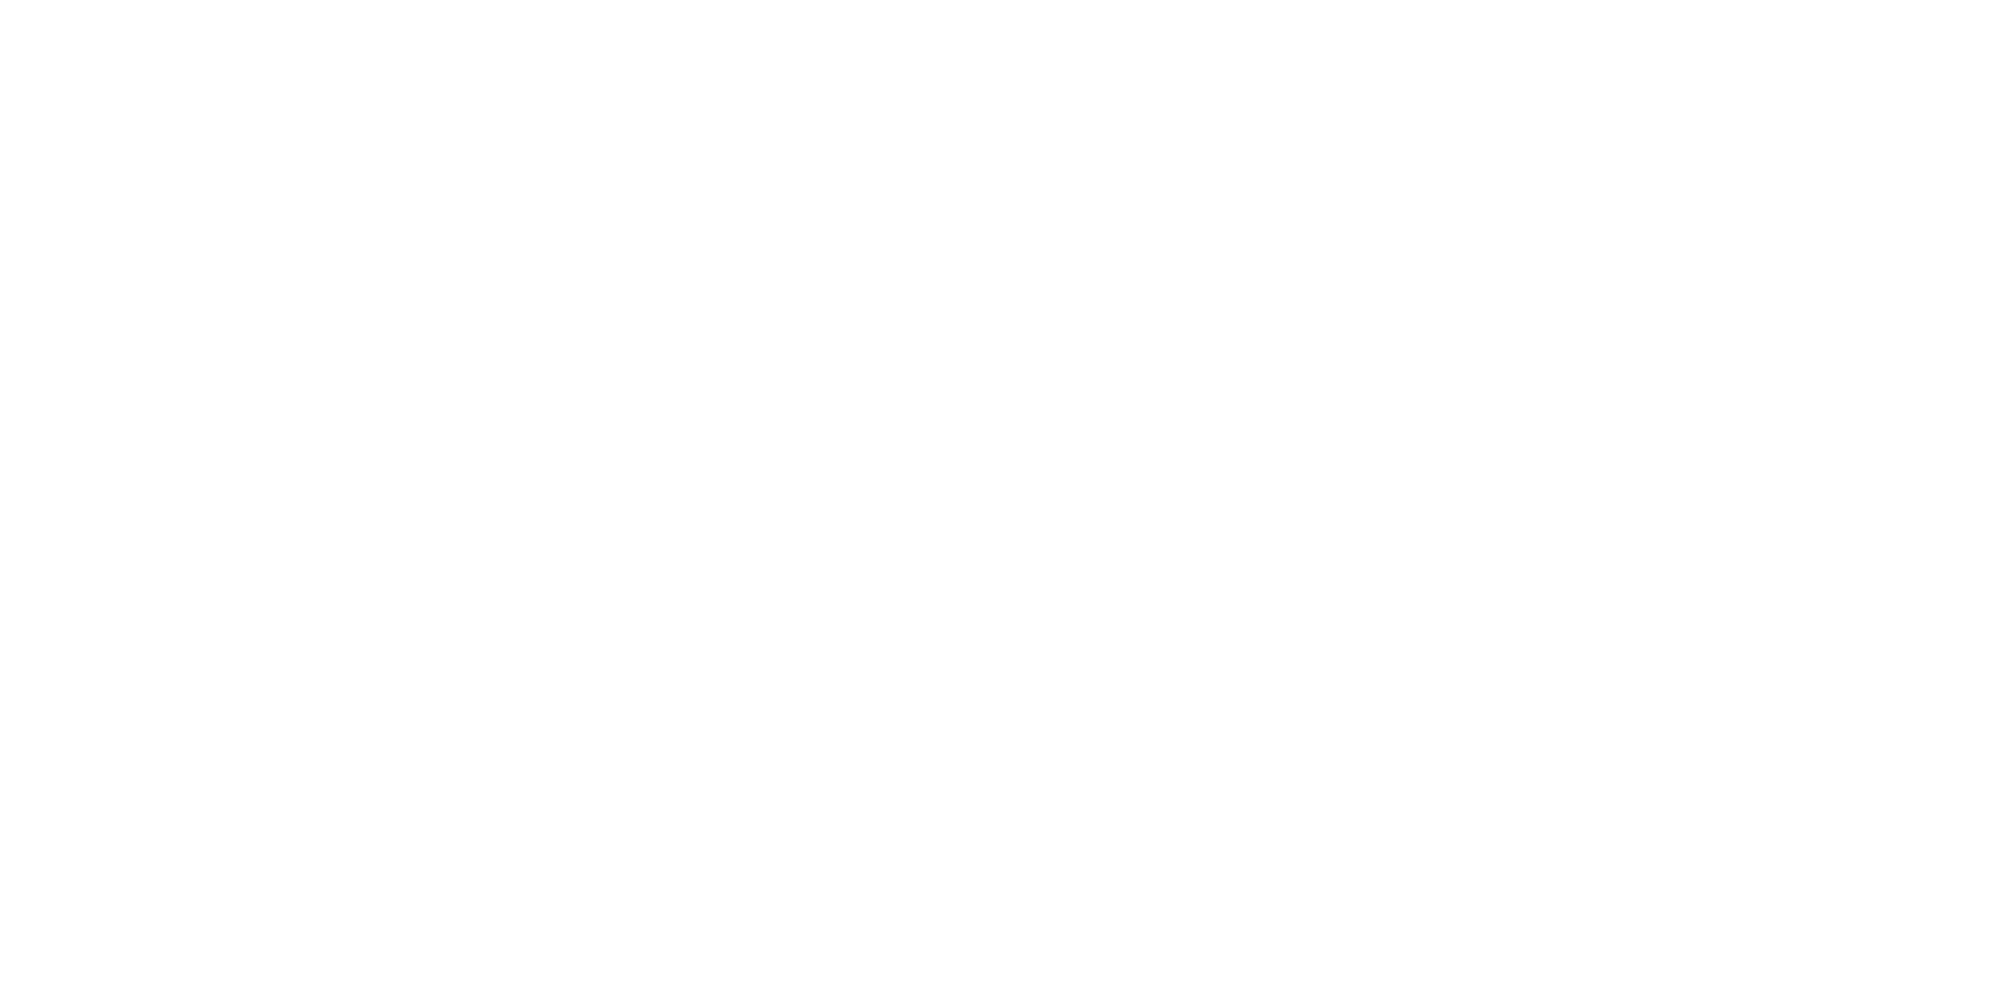

<IPython.core.display.Javascript object>


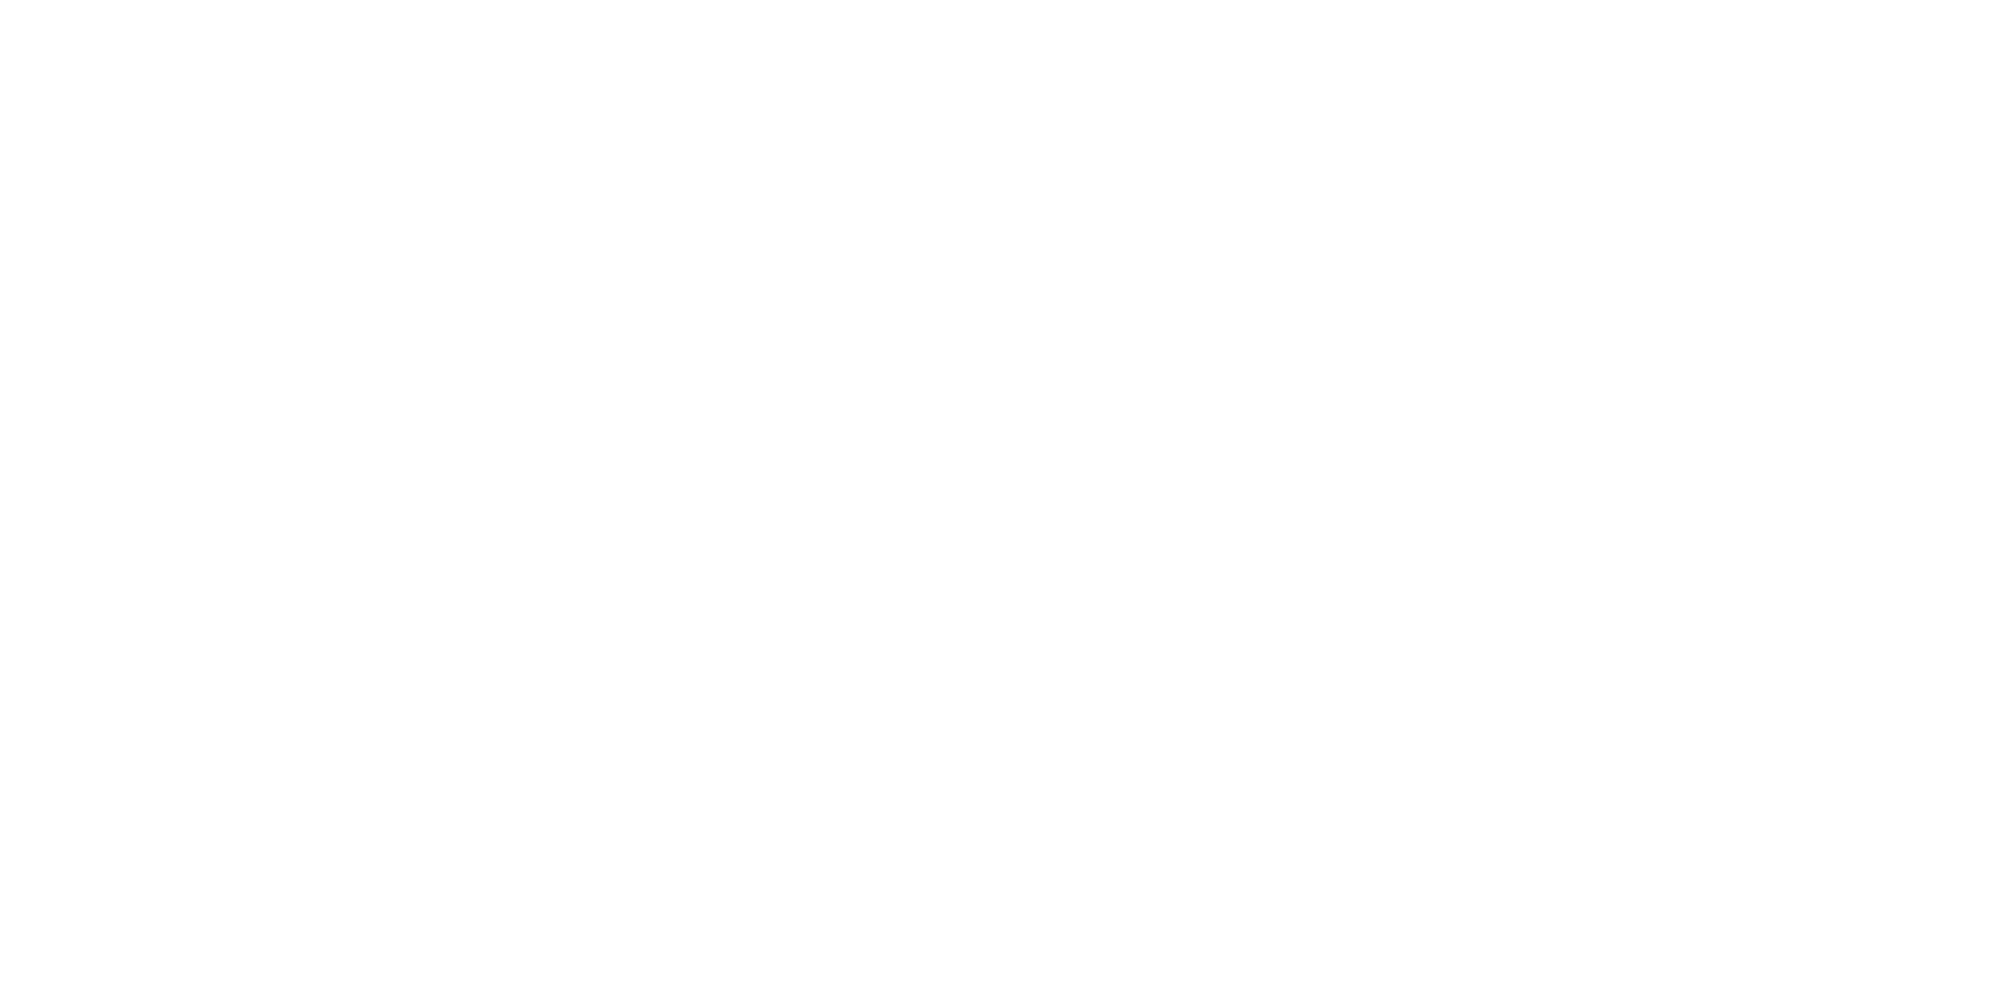

<IPython.core.display.Javascript object>


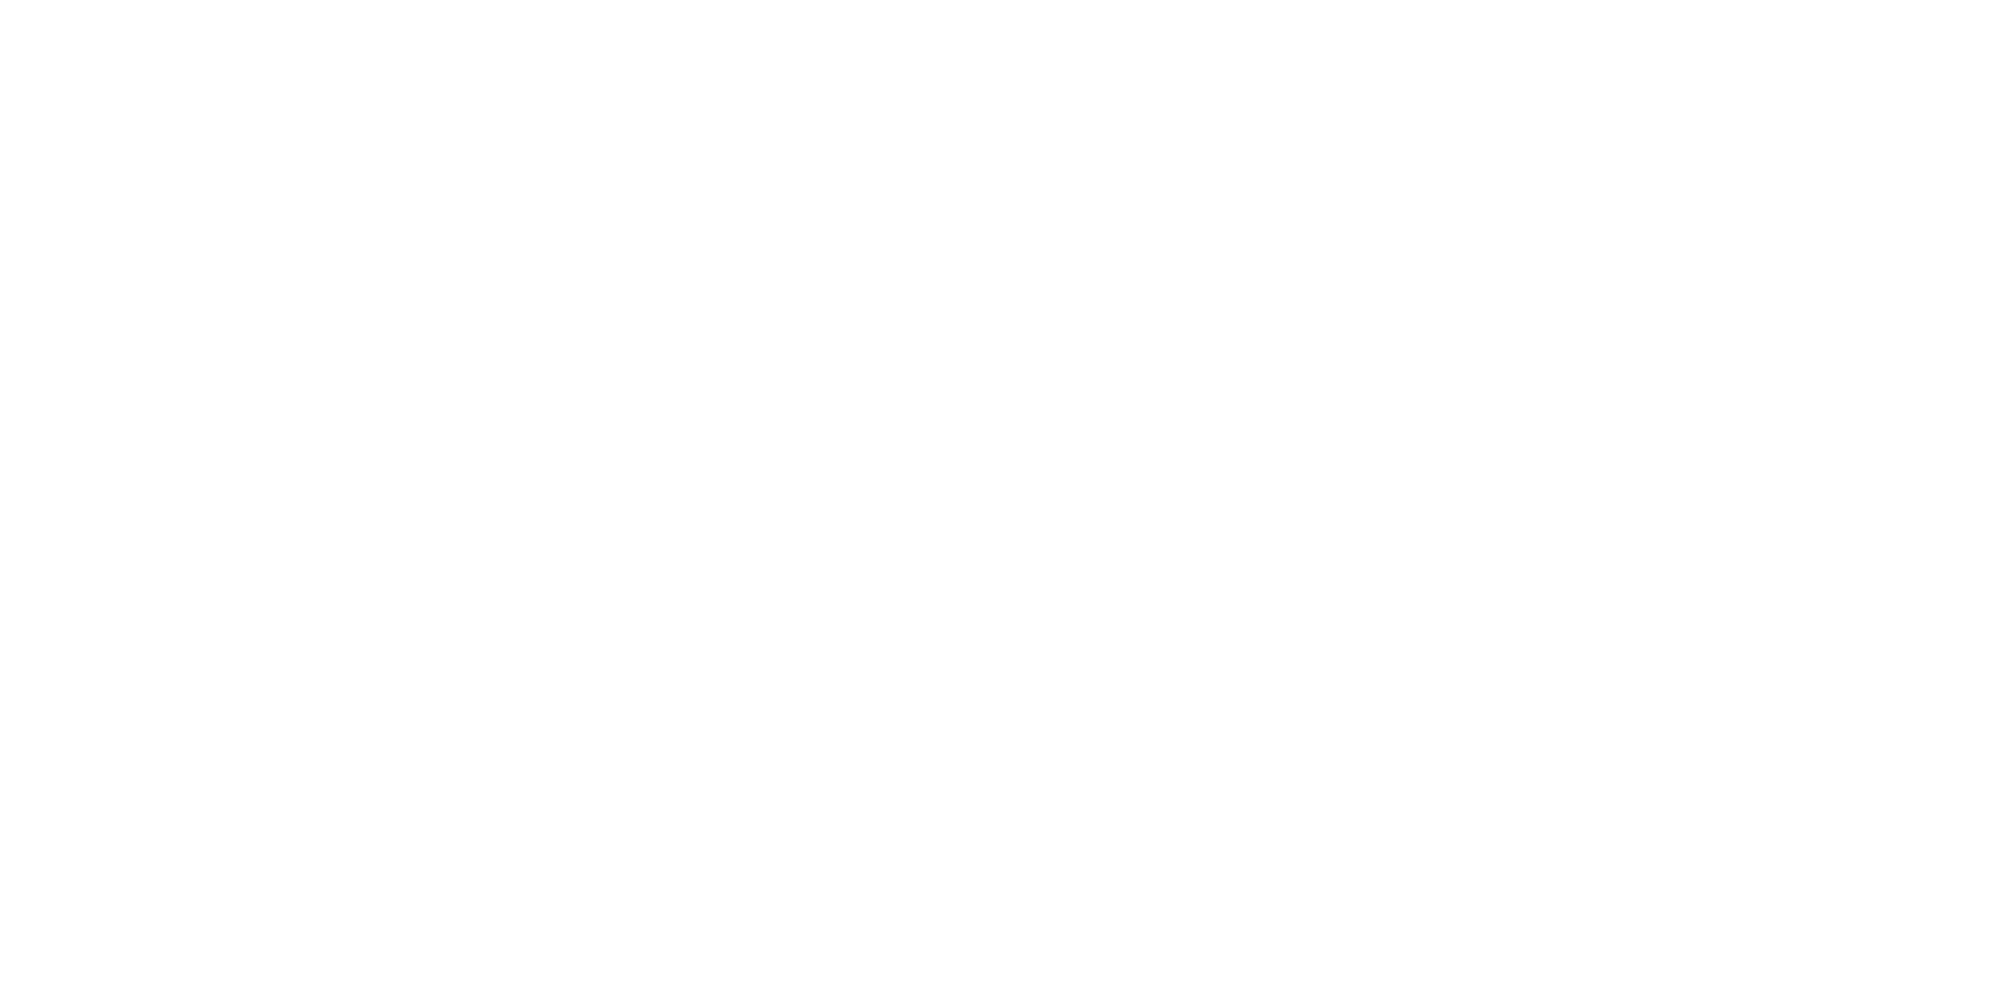

<IPython.core.display.Javascript object>


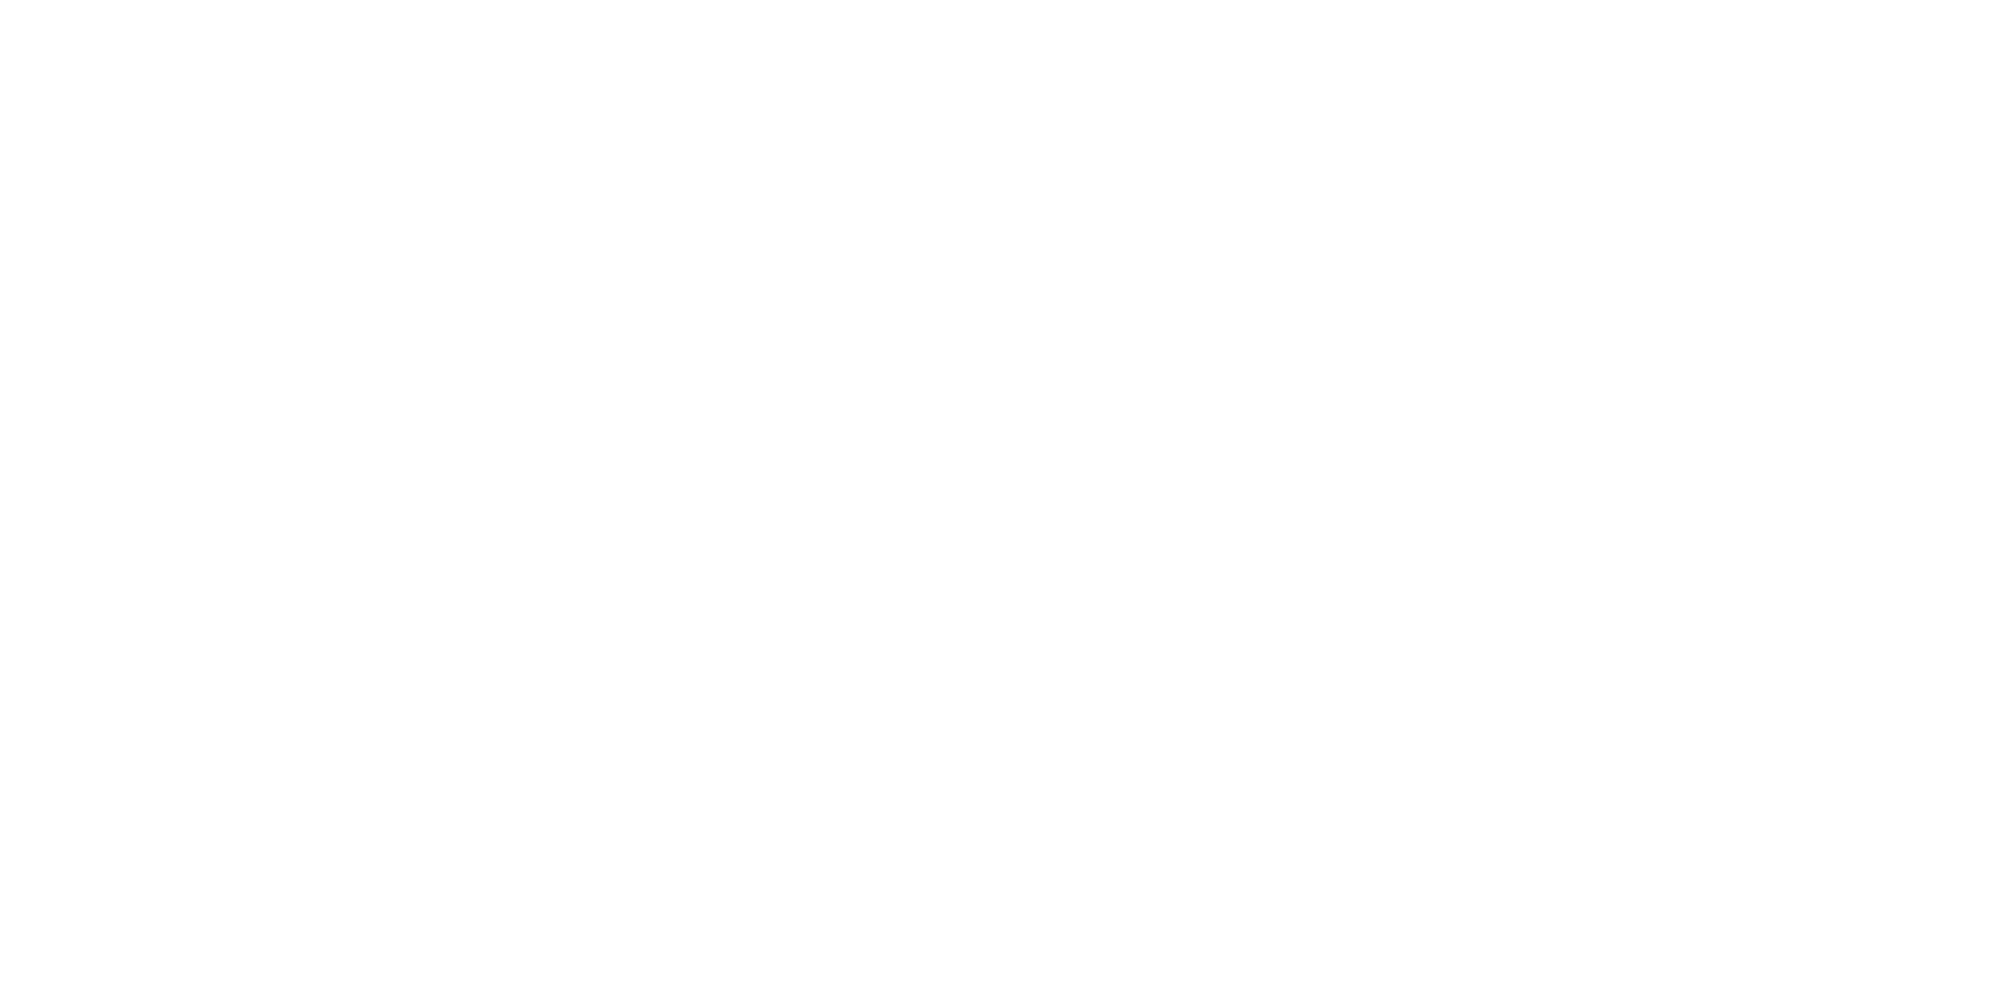

<IPython.core.display.Javascript object>


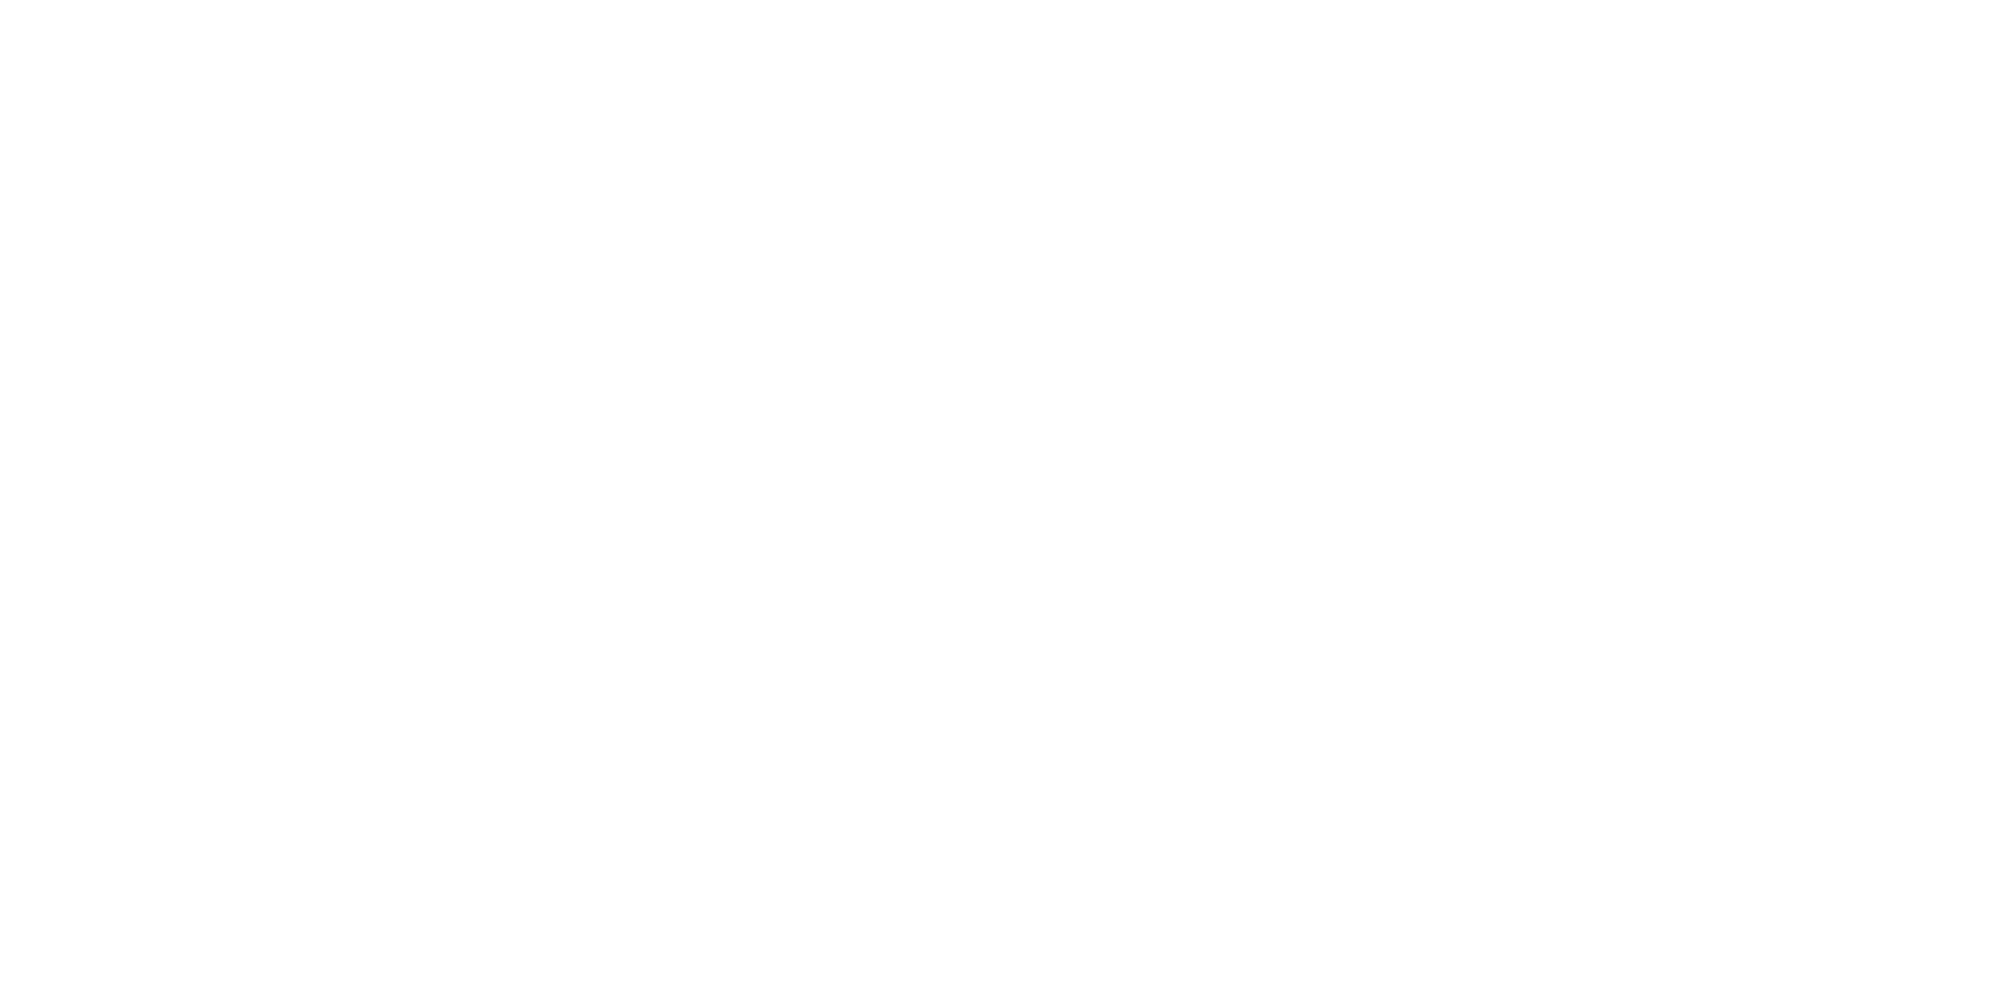

<IPython.core.display.Javascript object>


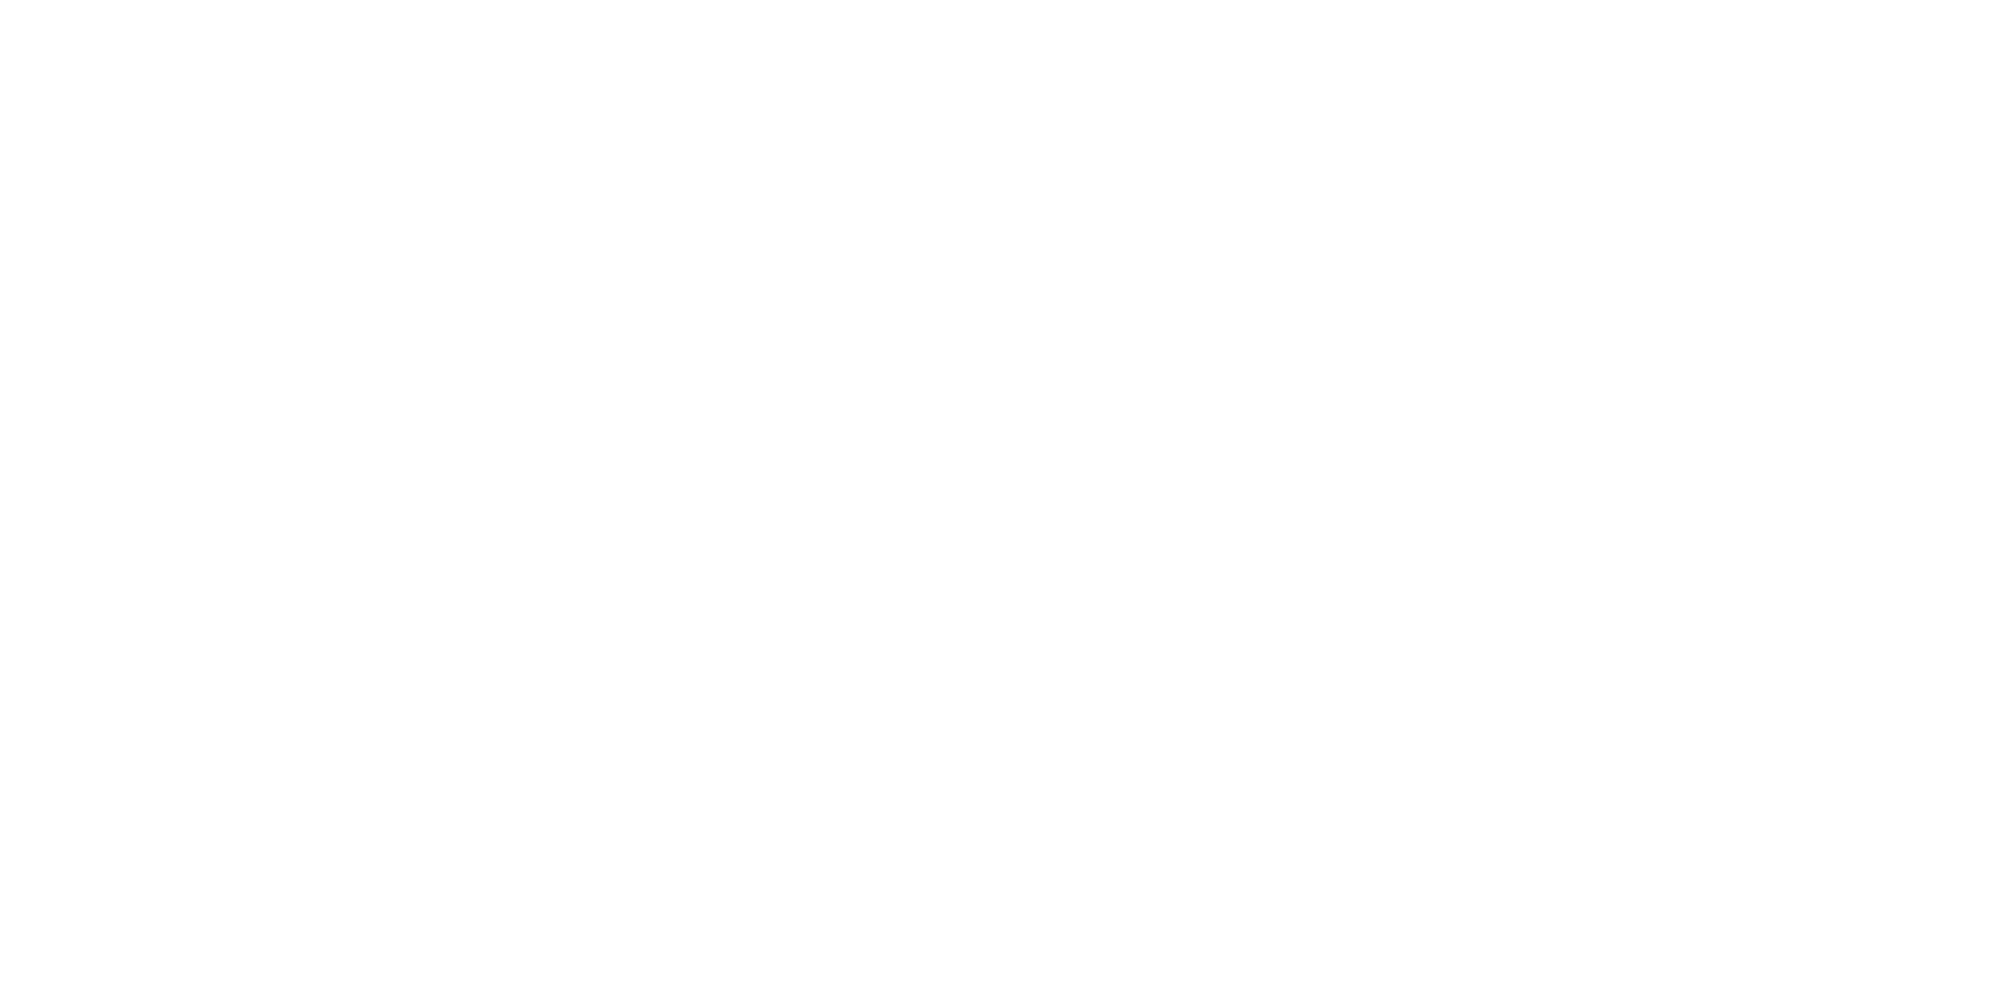

<IPython.core.display.Javascript object>


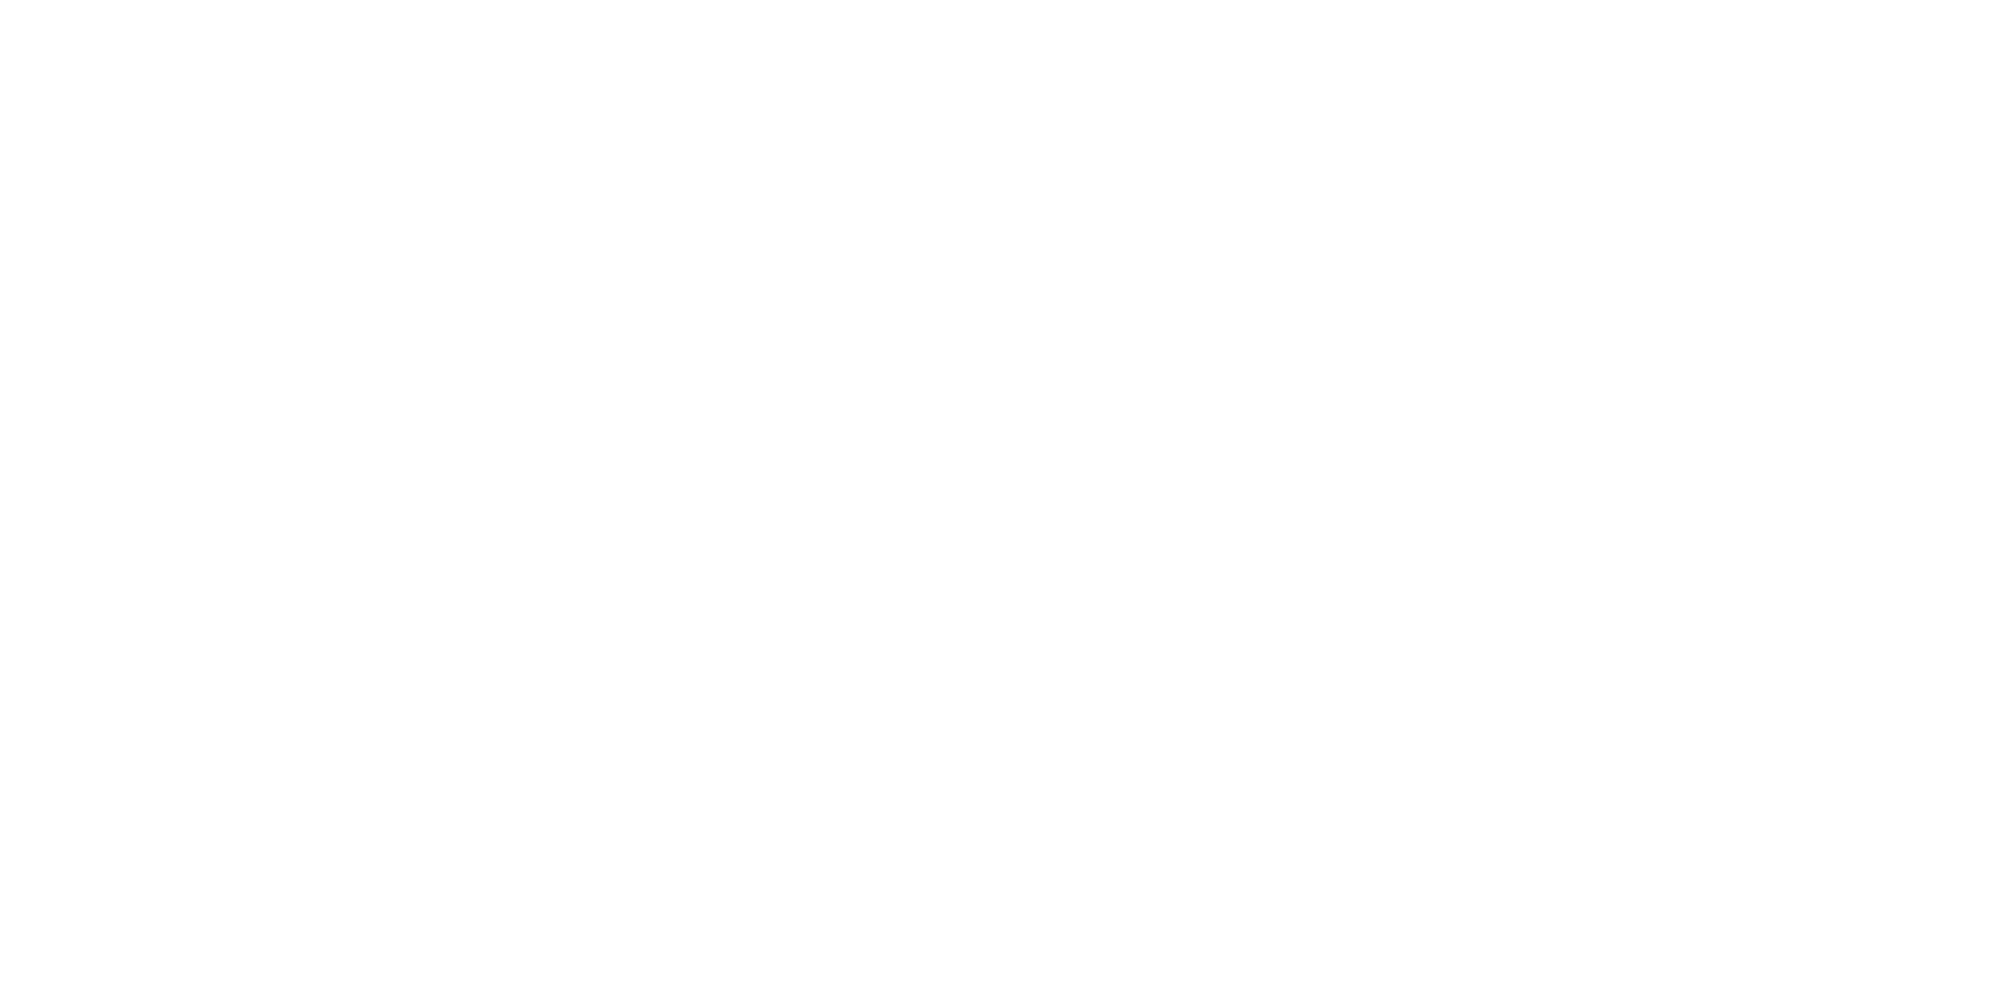

<IPython.core.display.Javascript object>


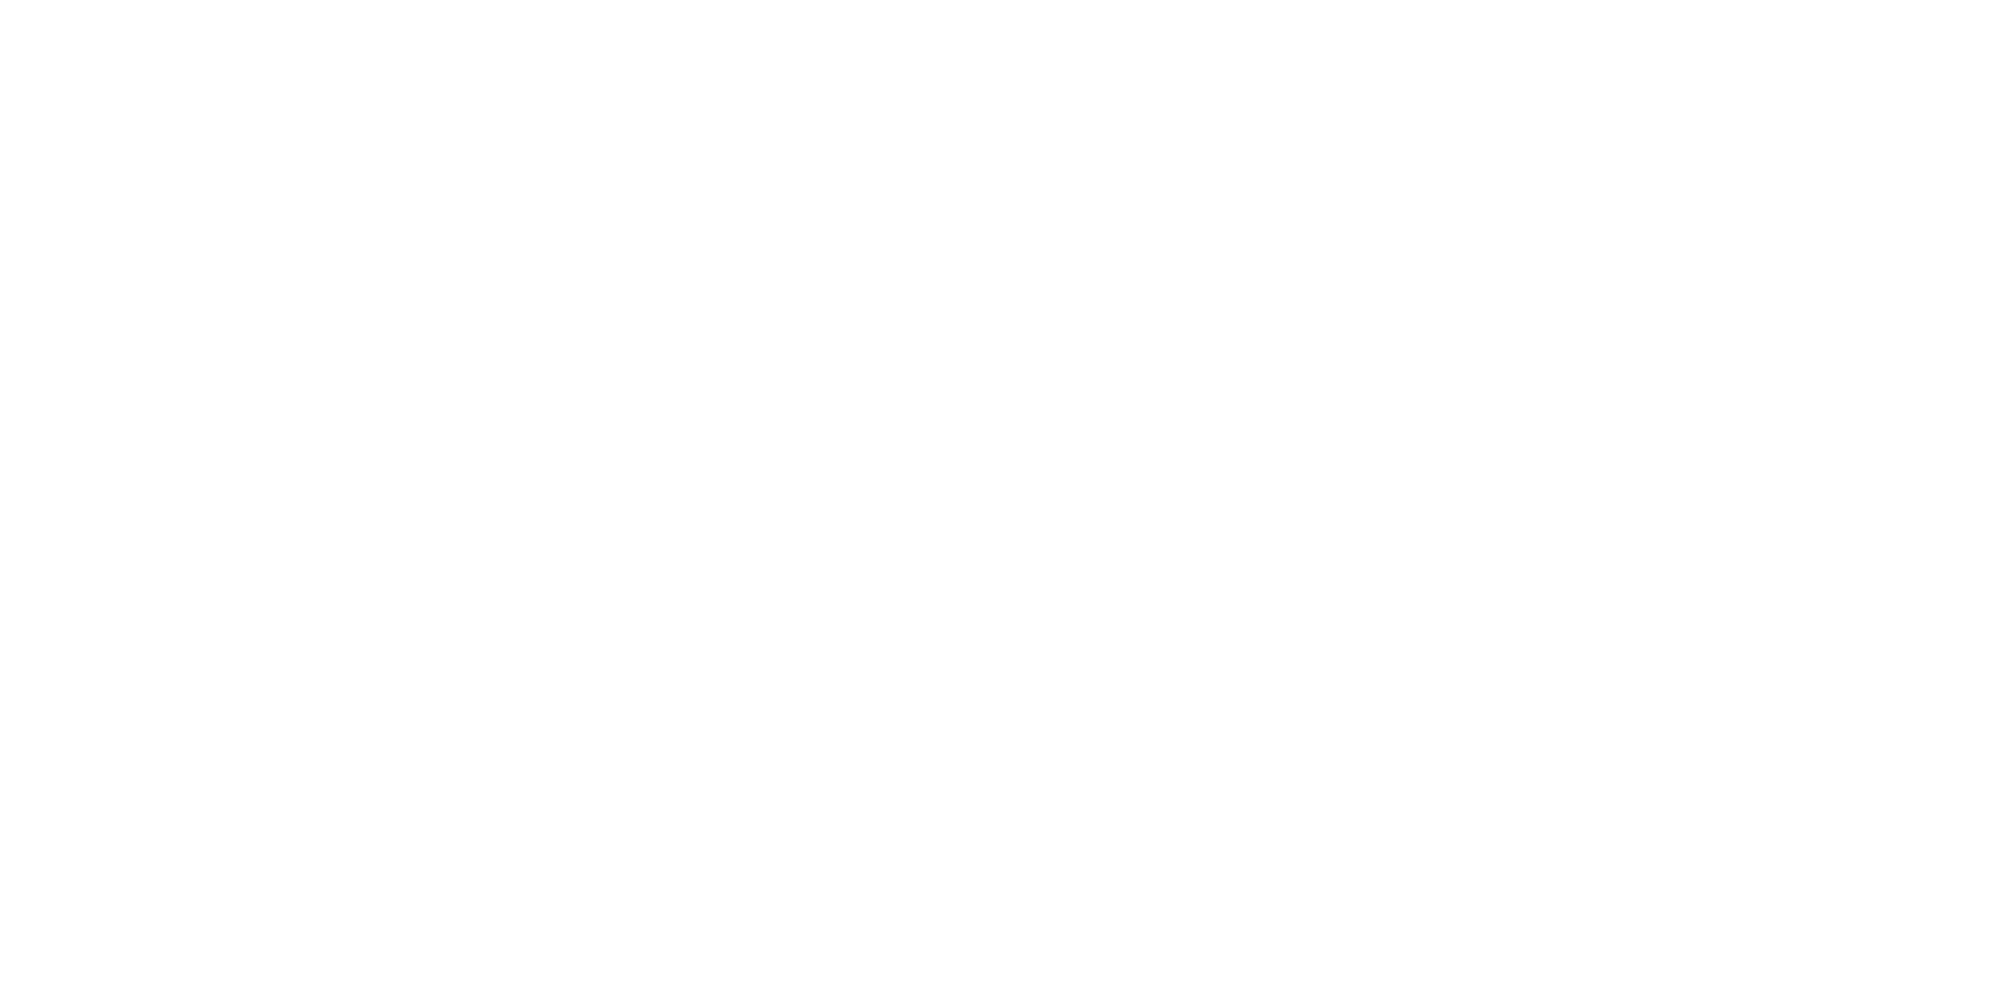

<IPython.core.display.Javascript object>


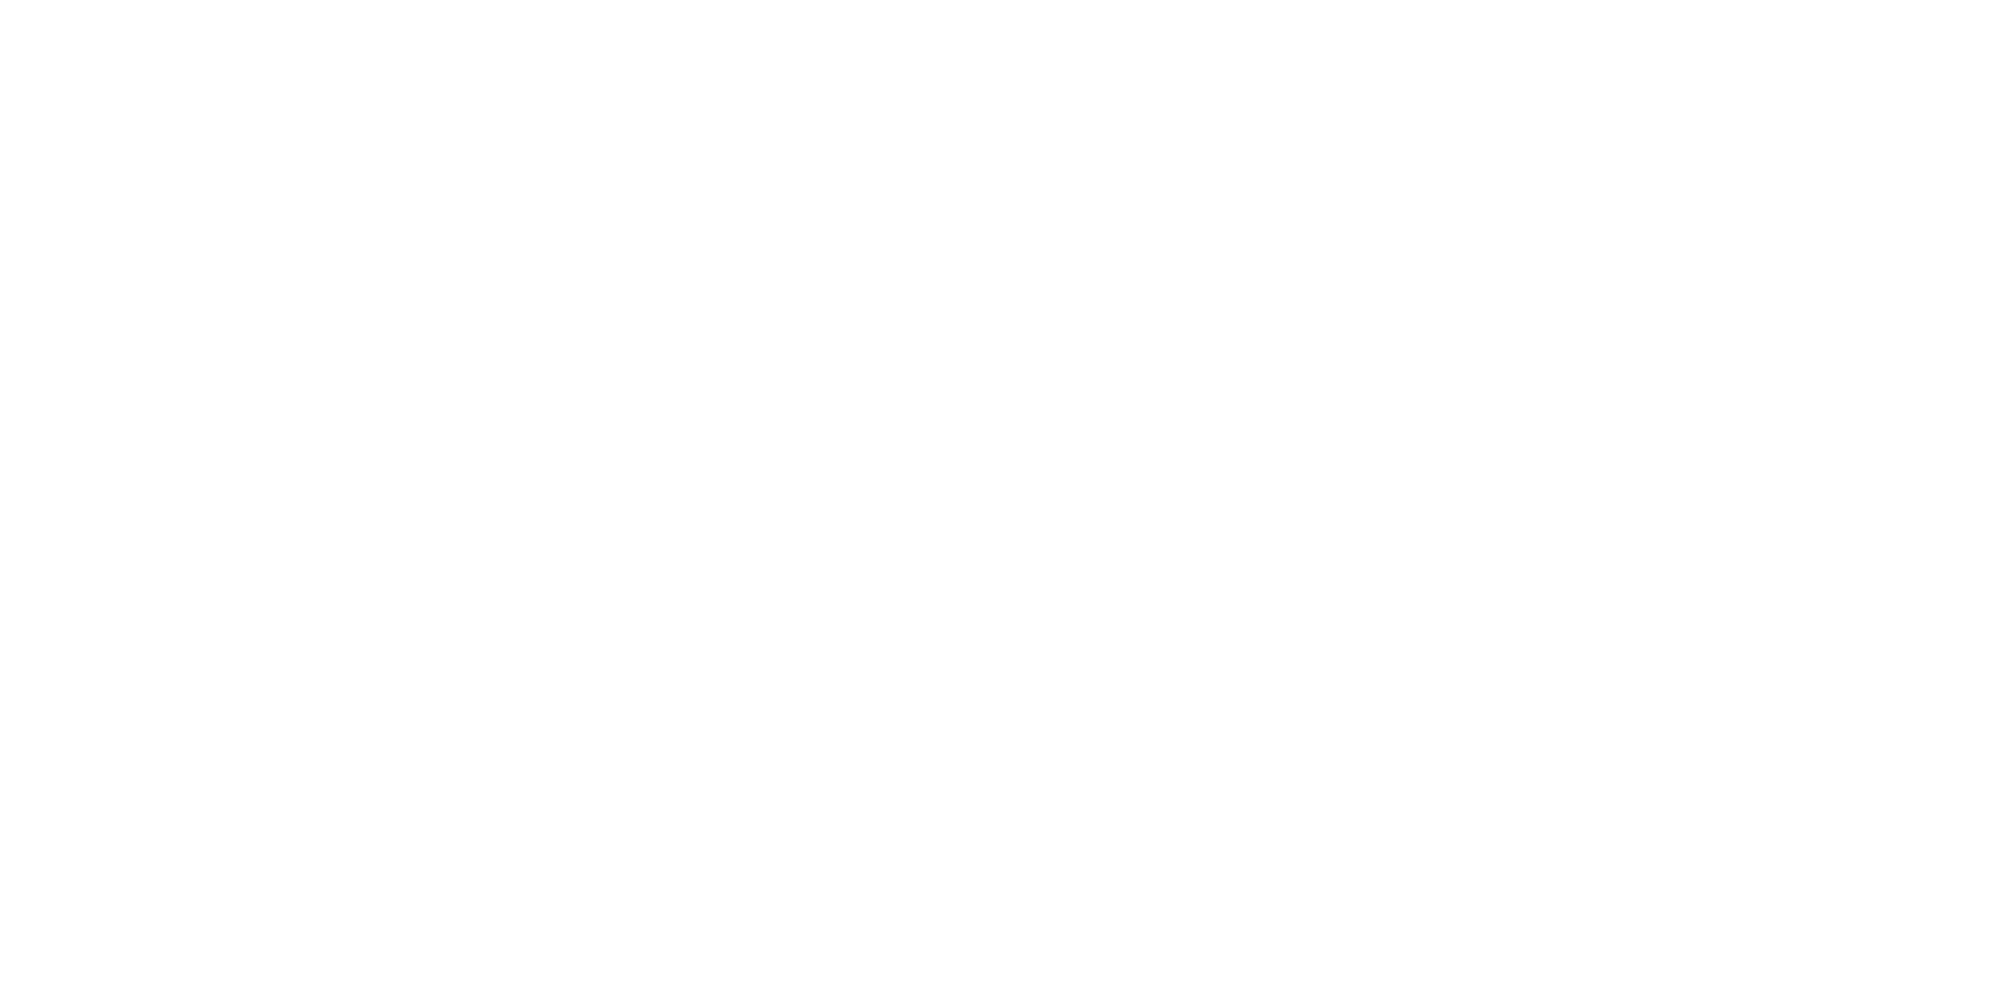

<IPython.core.display.Javascript object>


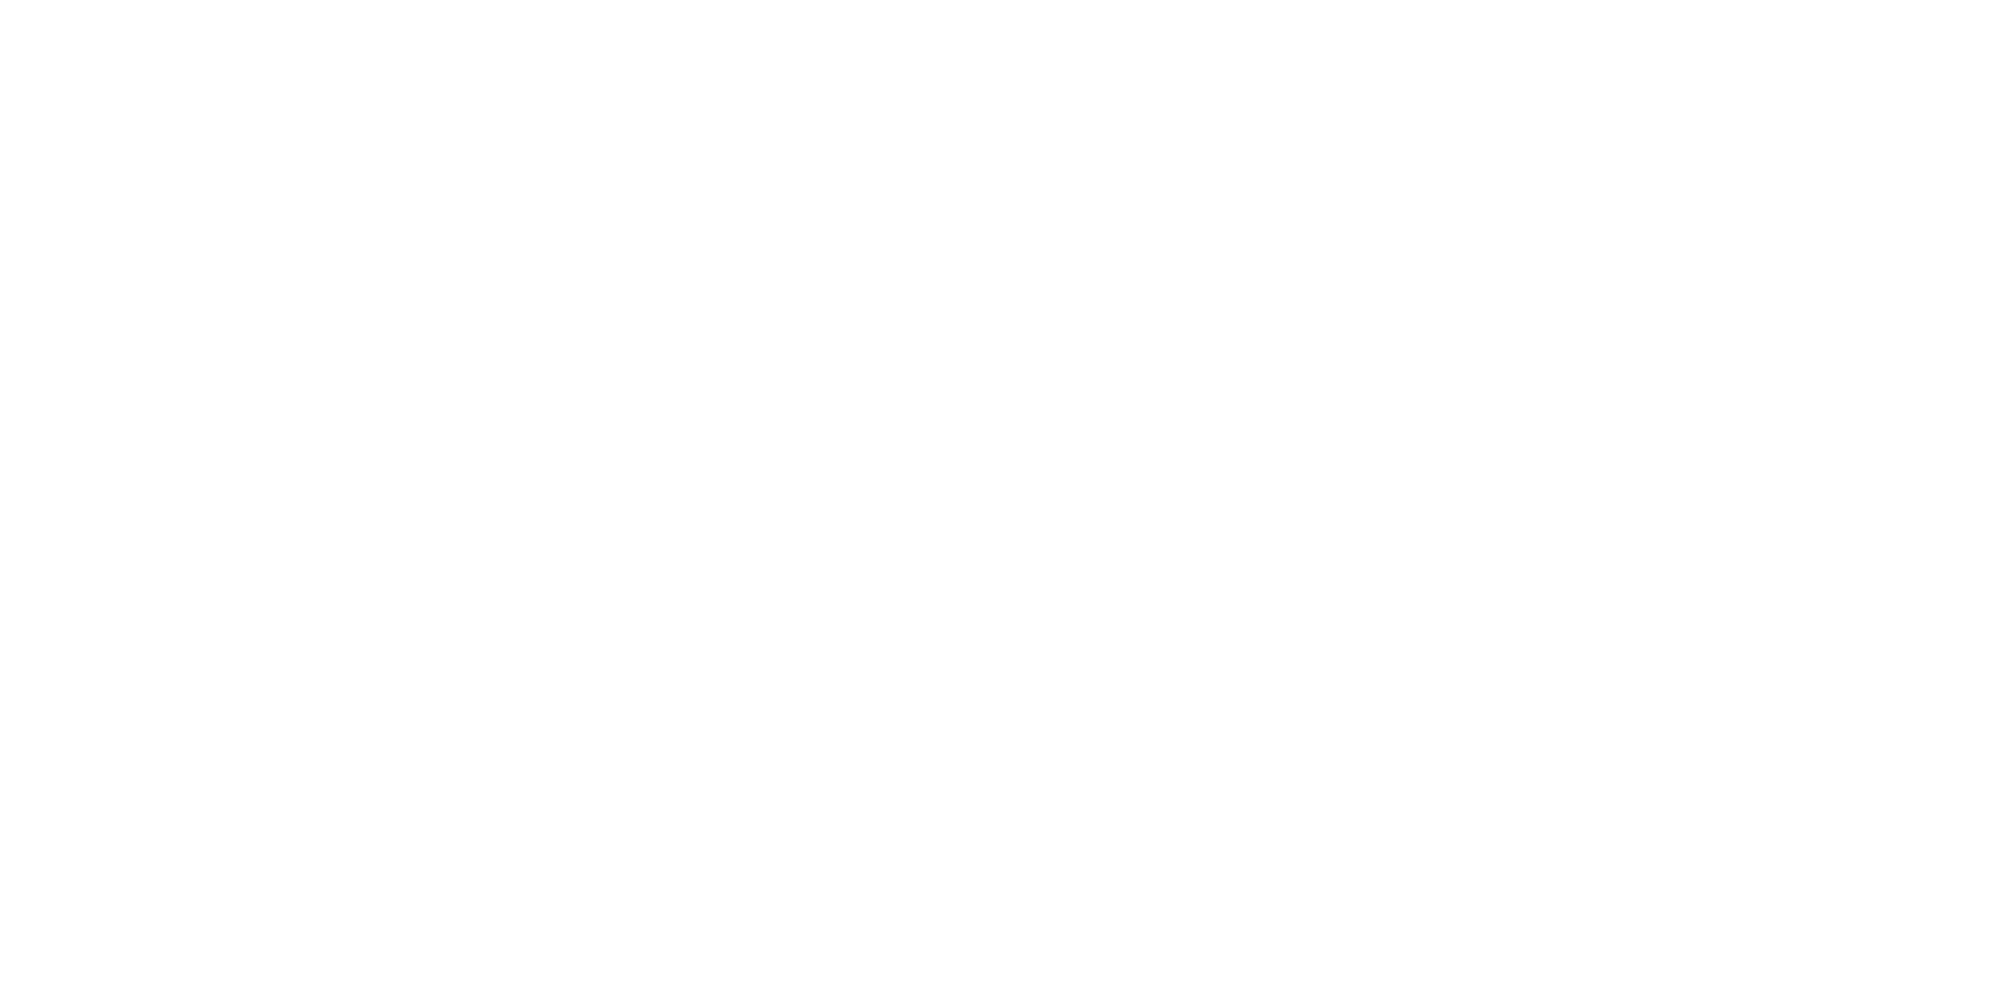

<IPython.core.display.Javascript object>


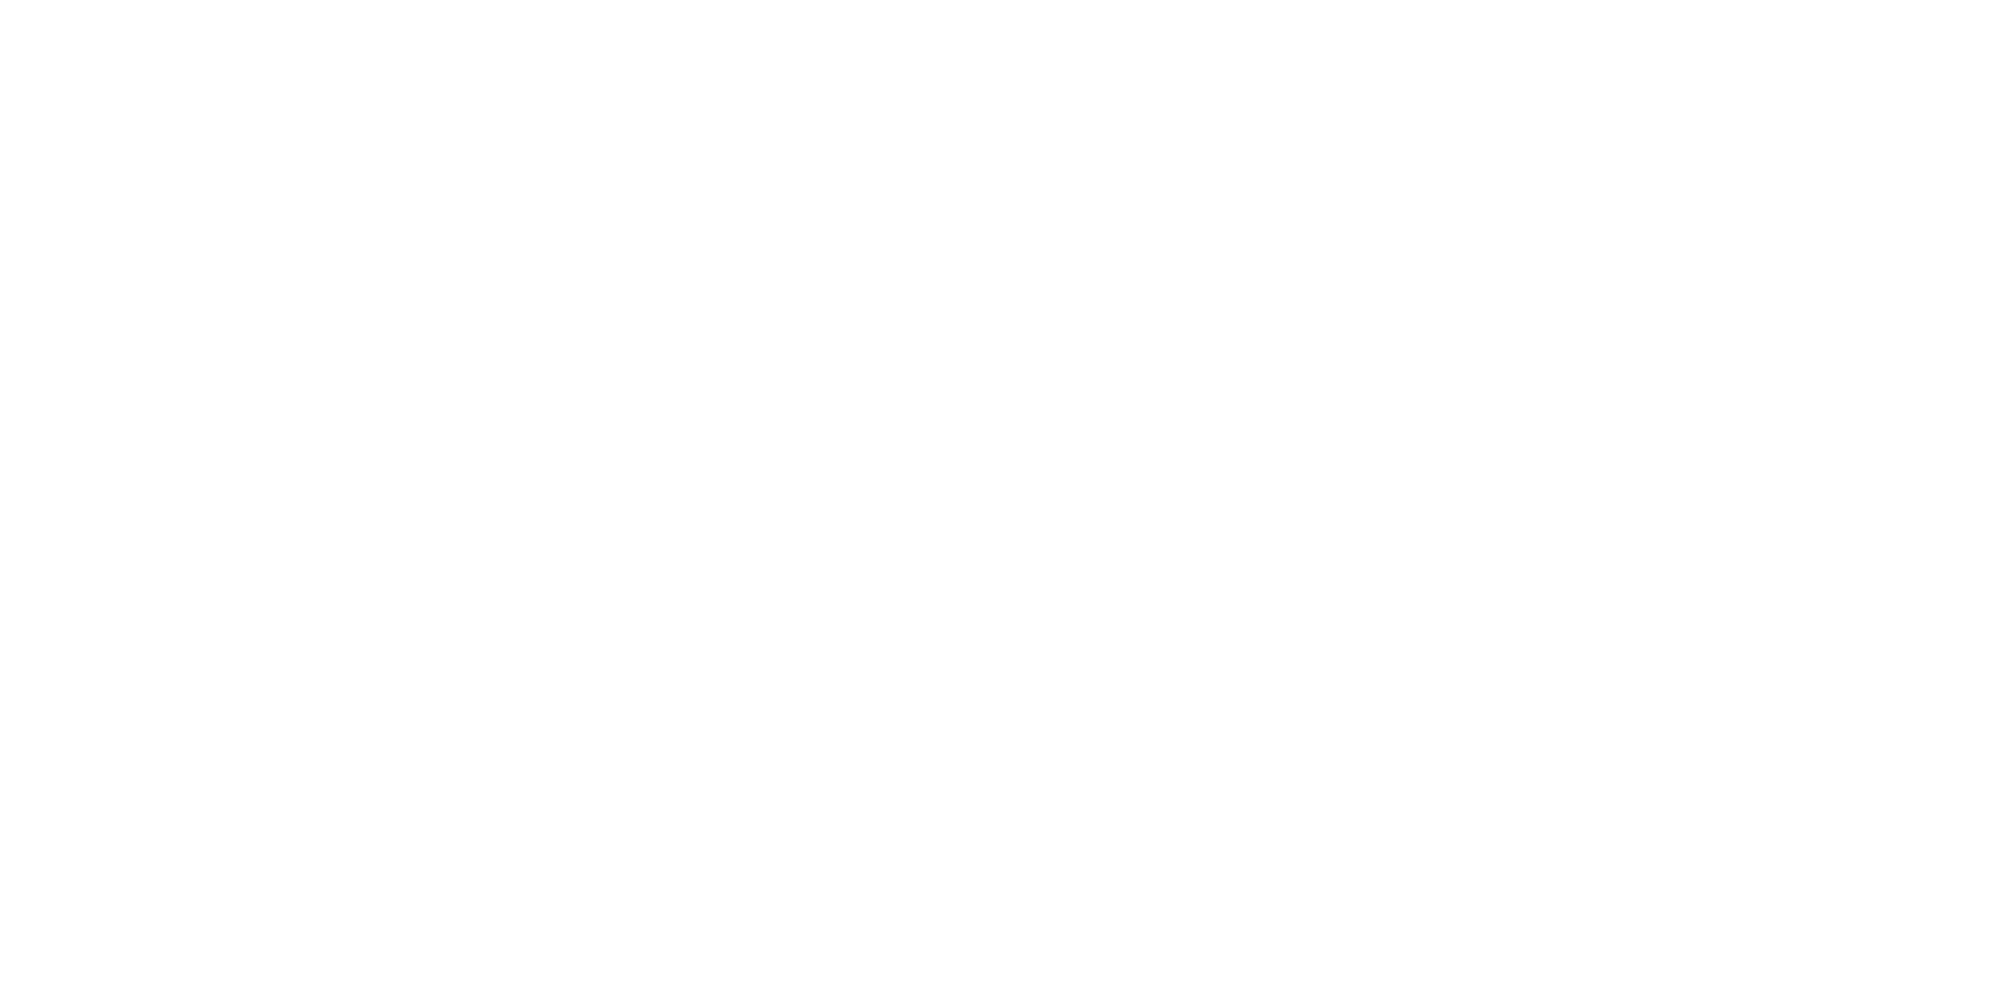

<IPython.core.display.Javascript object>


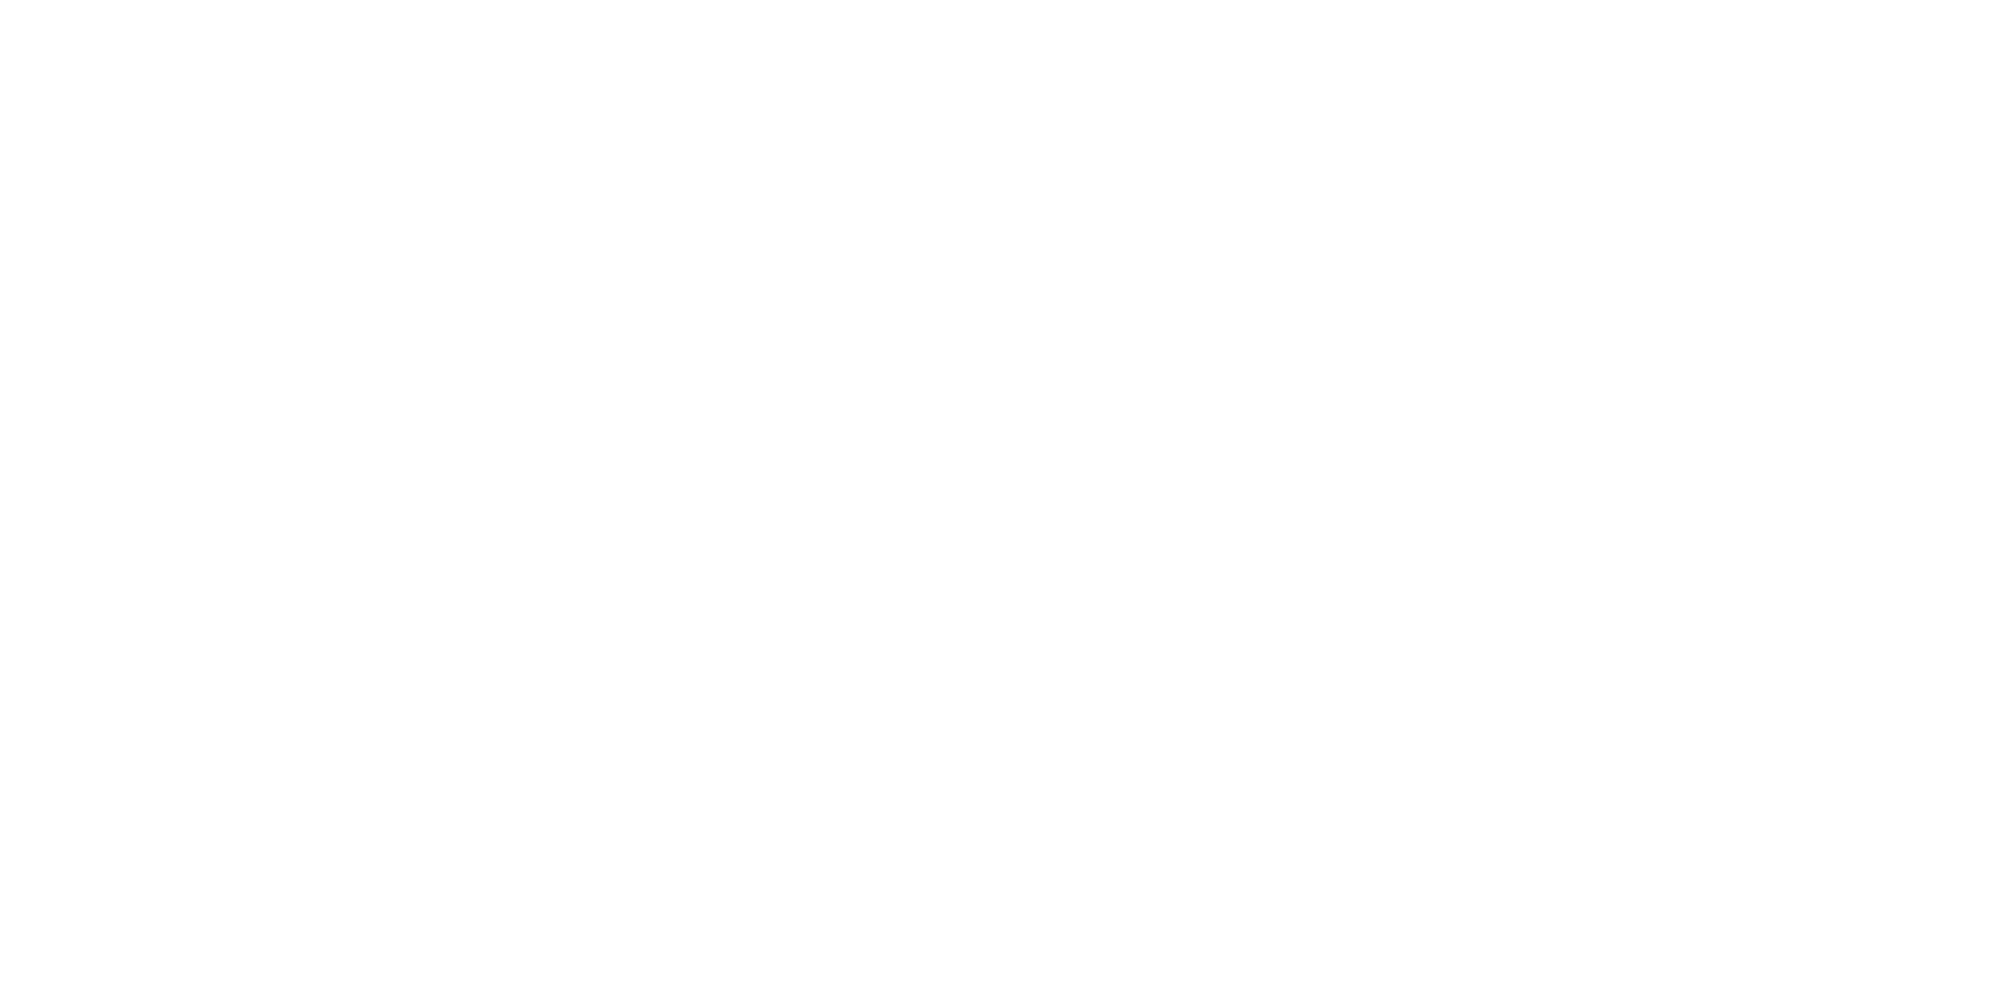

<IPython.core.display.Javascript object>


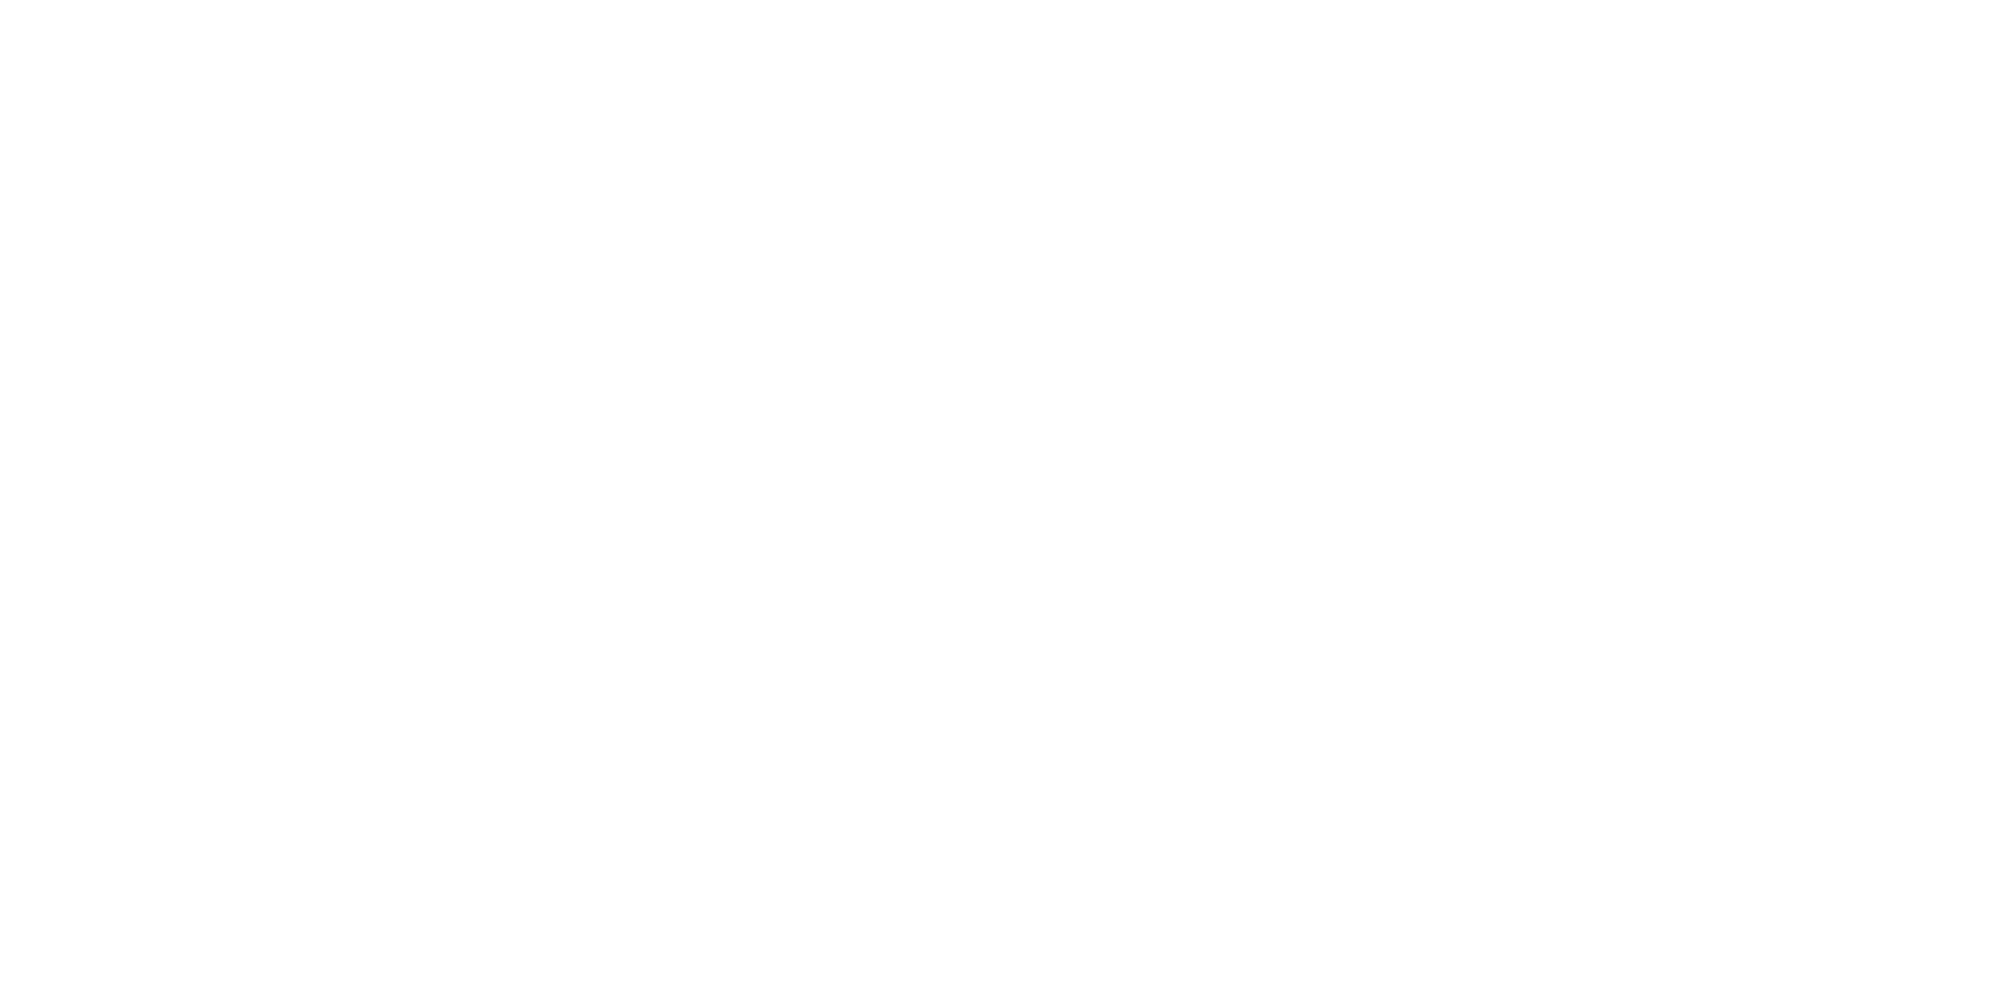

<IPython.core.display.Javascript object>


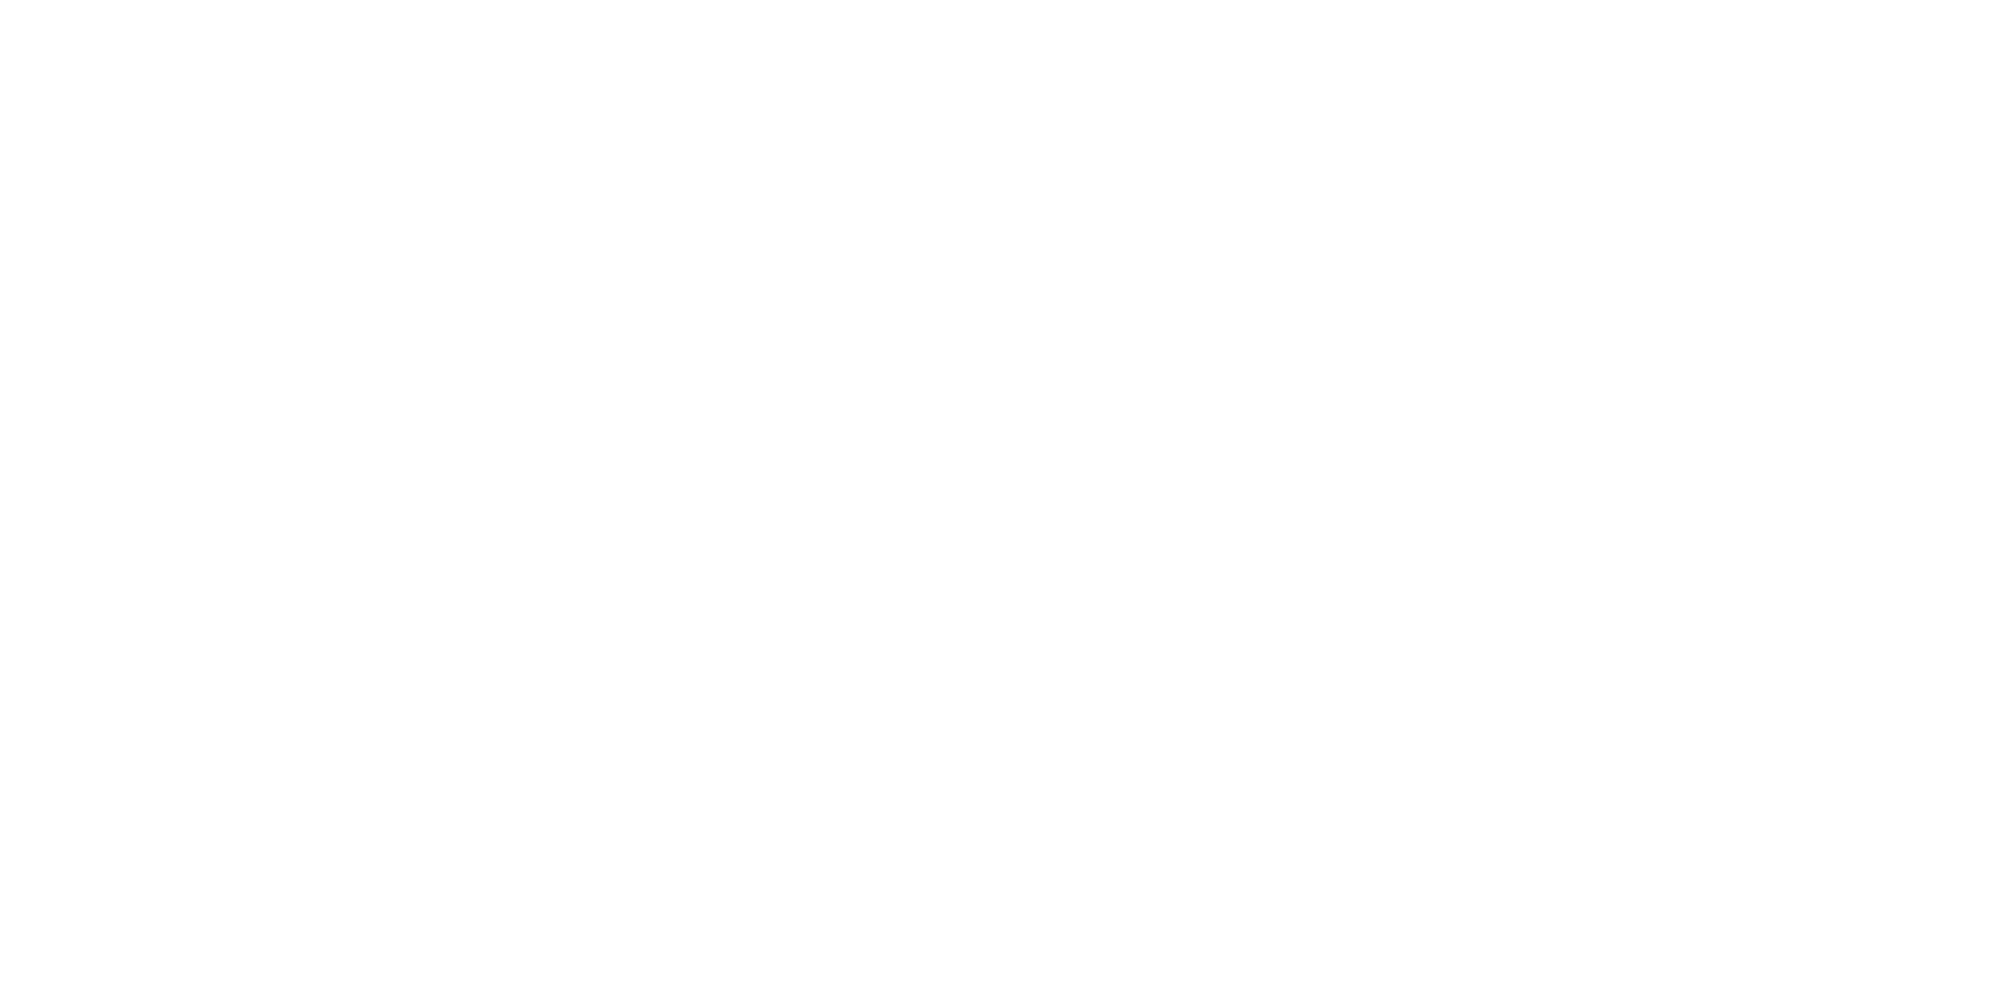

<IPython.core.display.Javascript object>


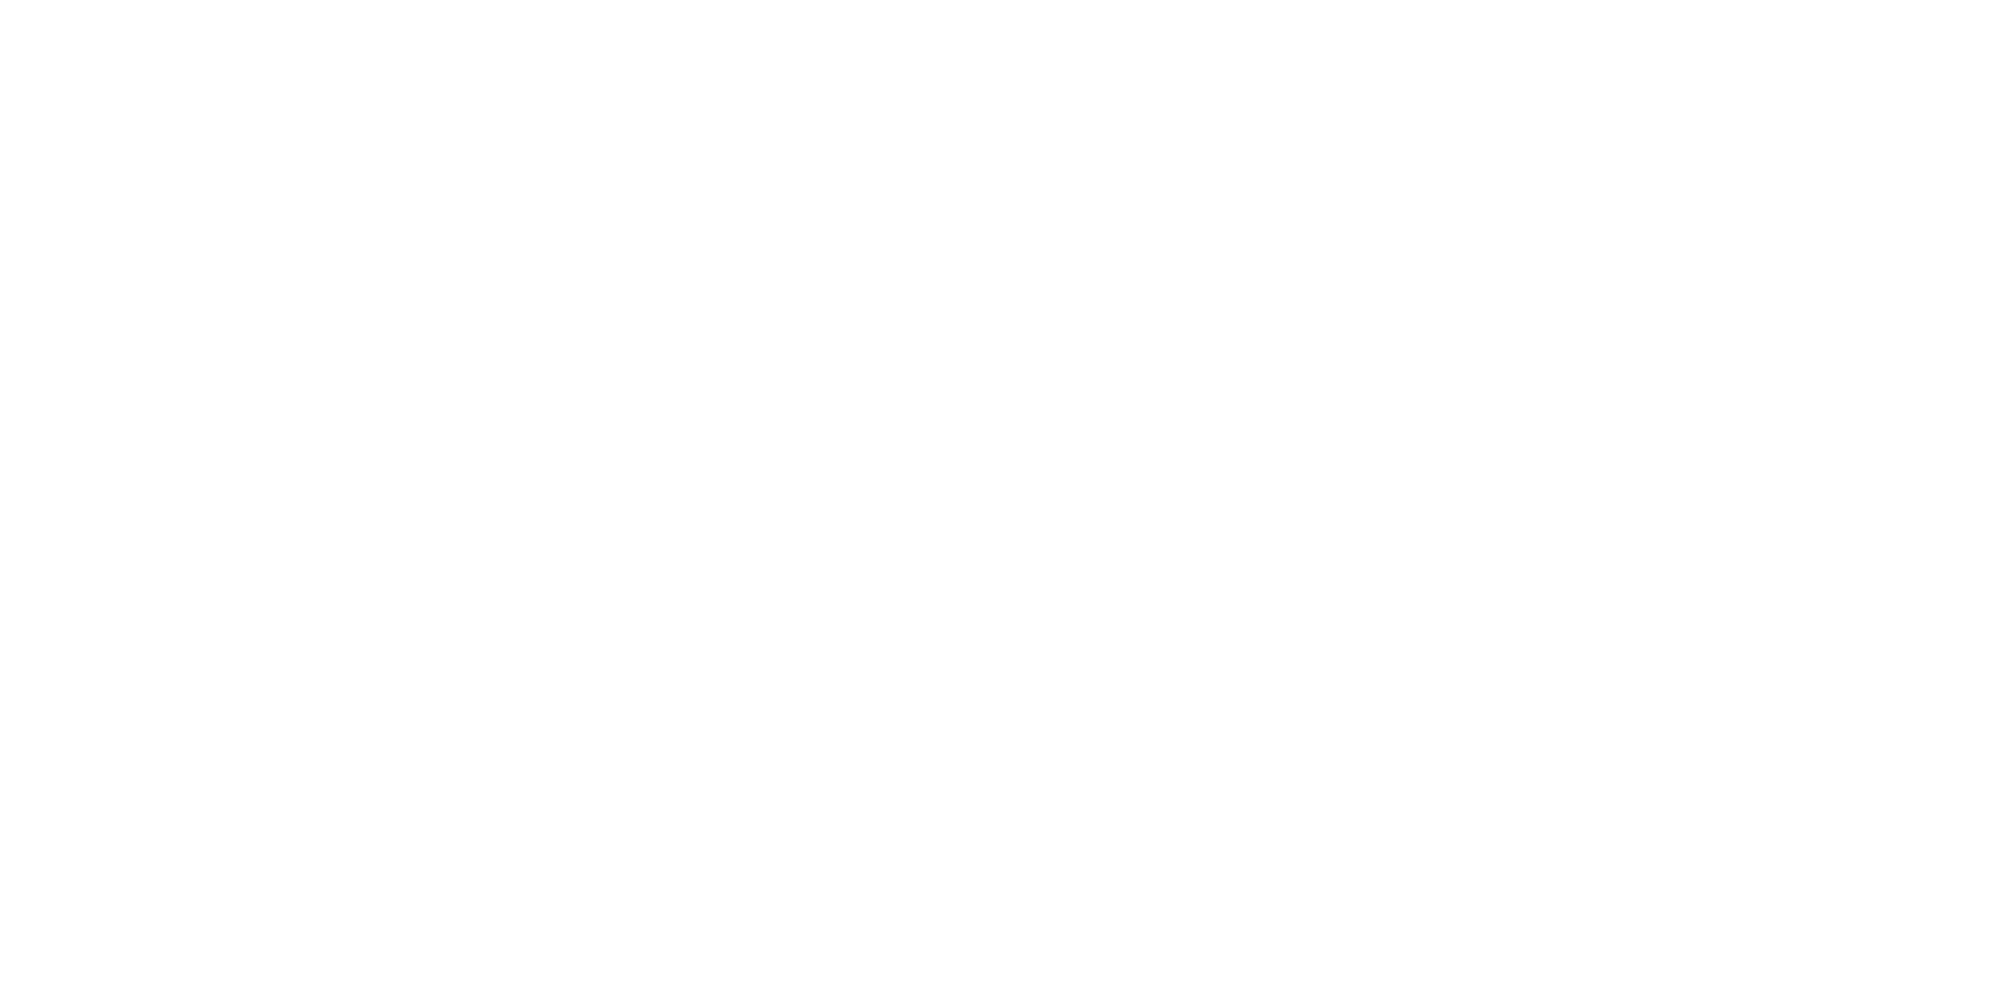

<IPython.core.display.Javascript object>


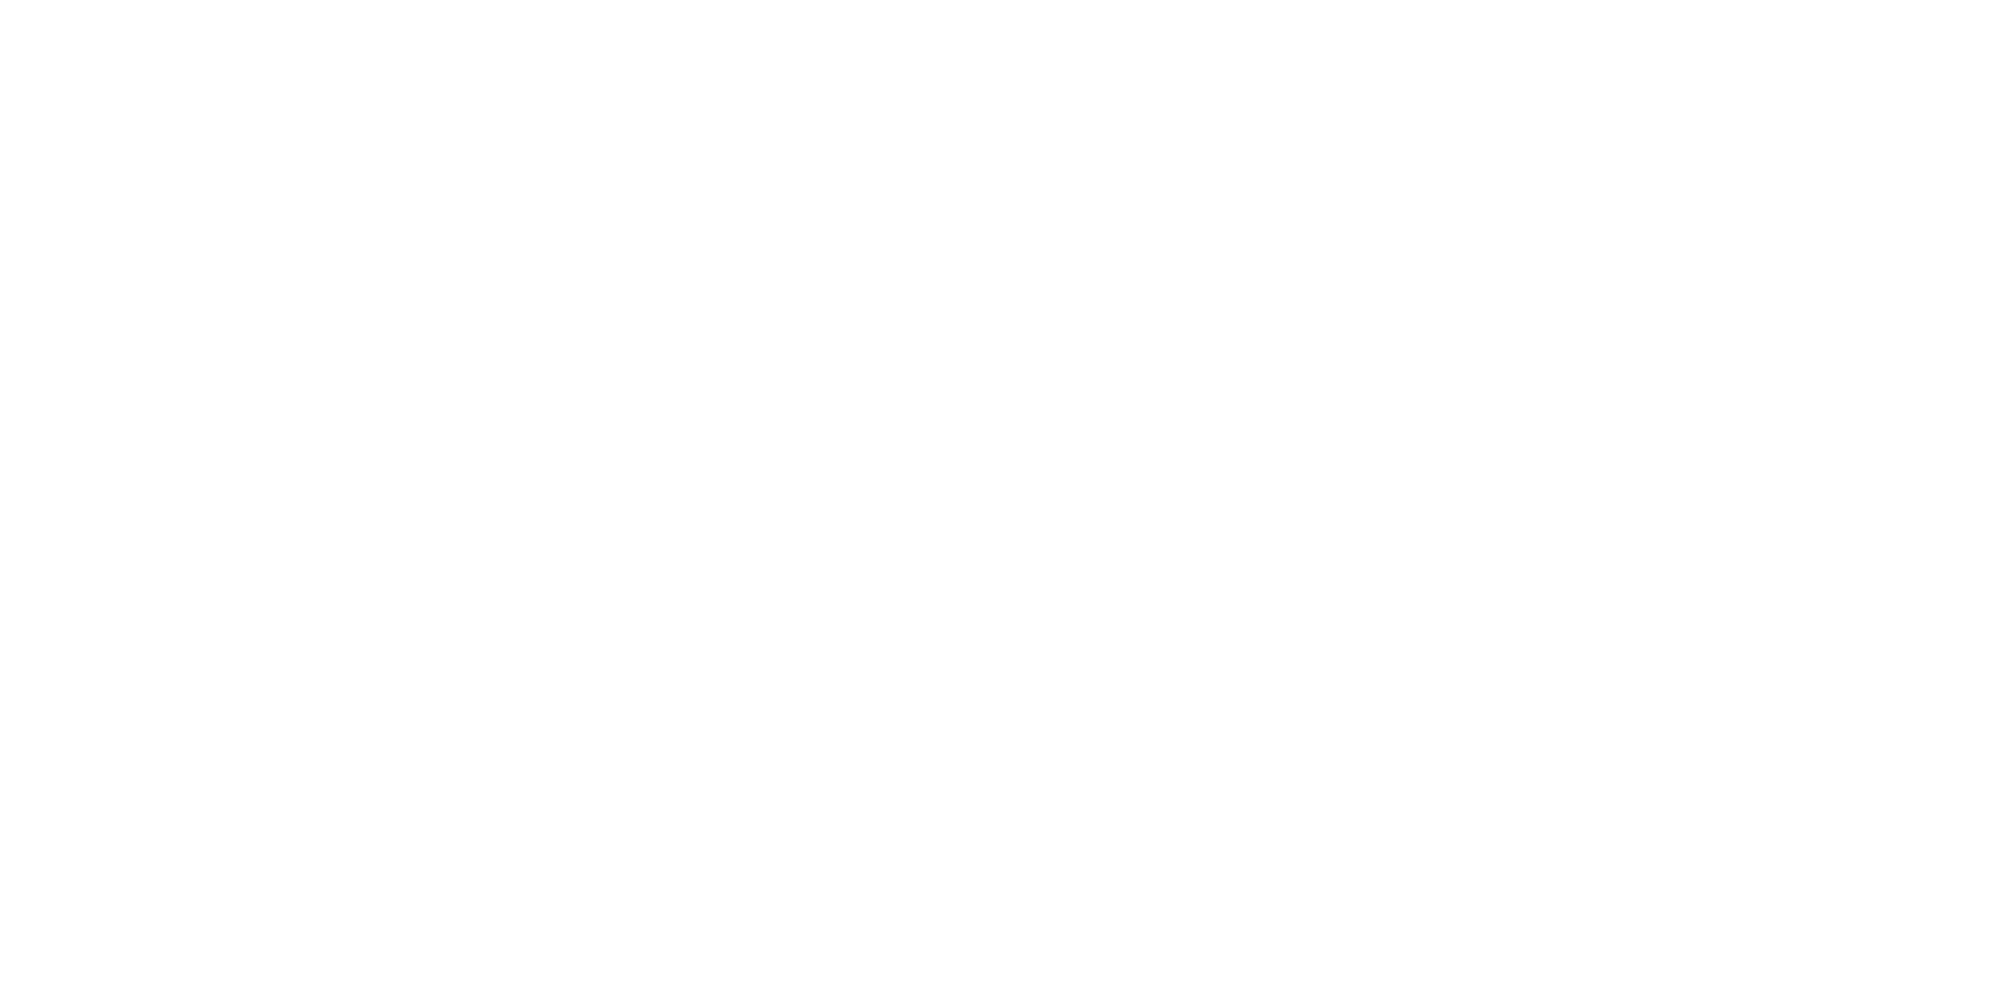

<IPython.core.display.Javascript object>


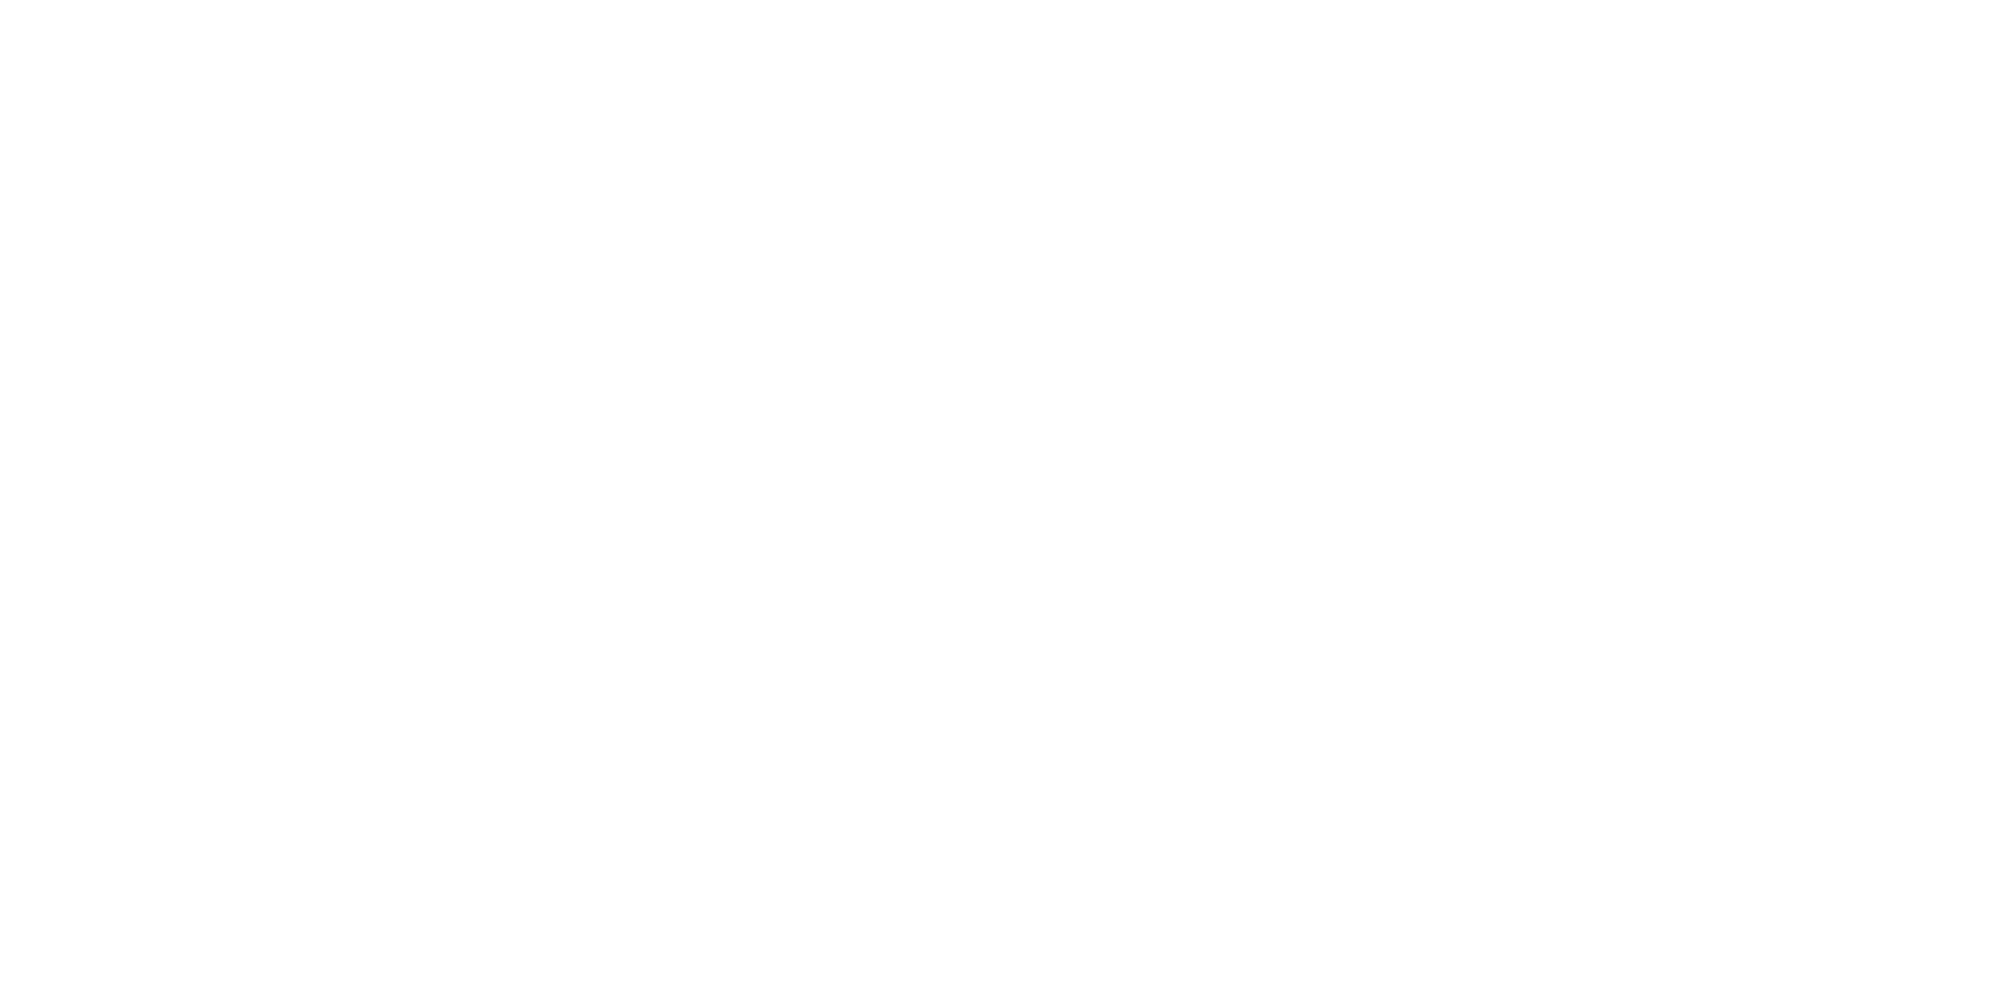

<IPython.core.display.Javascript object>


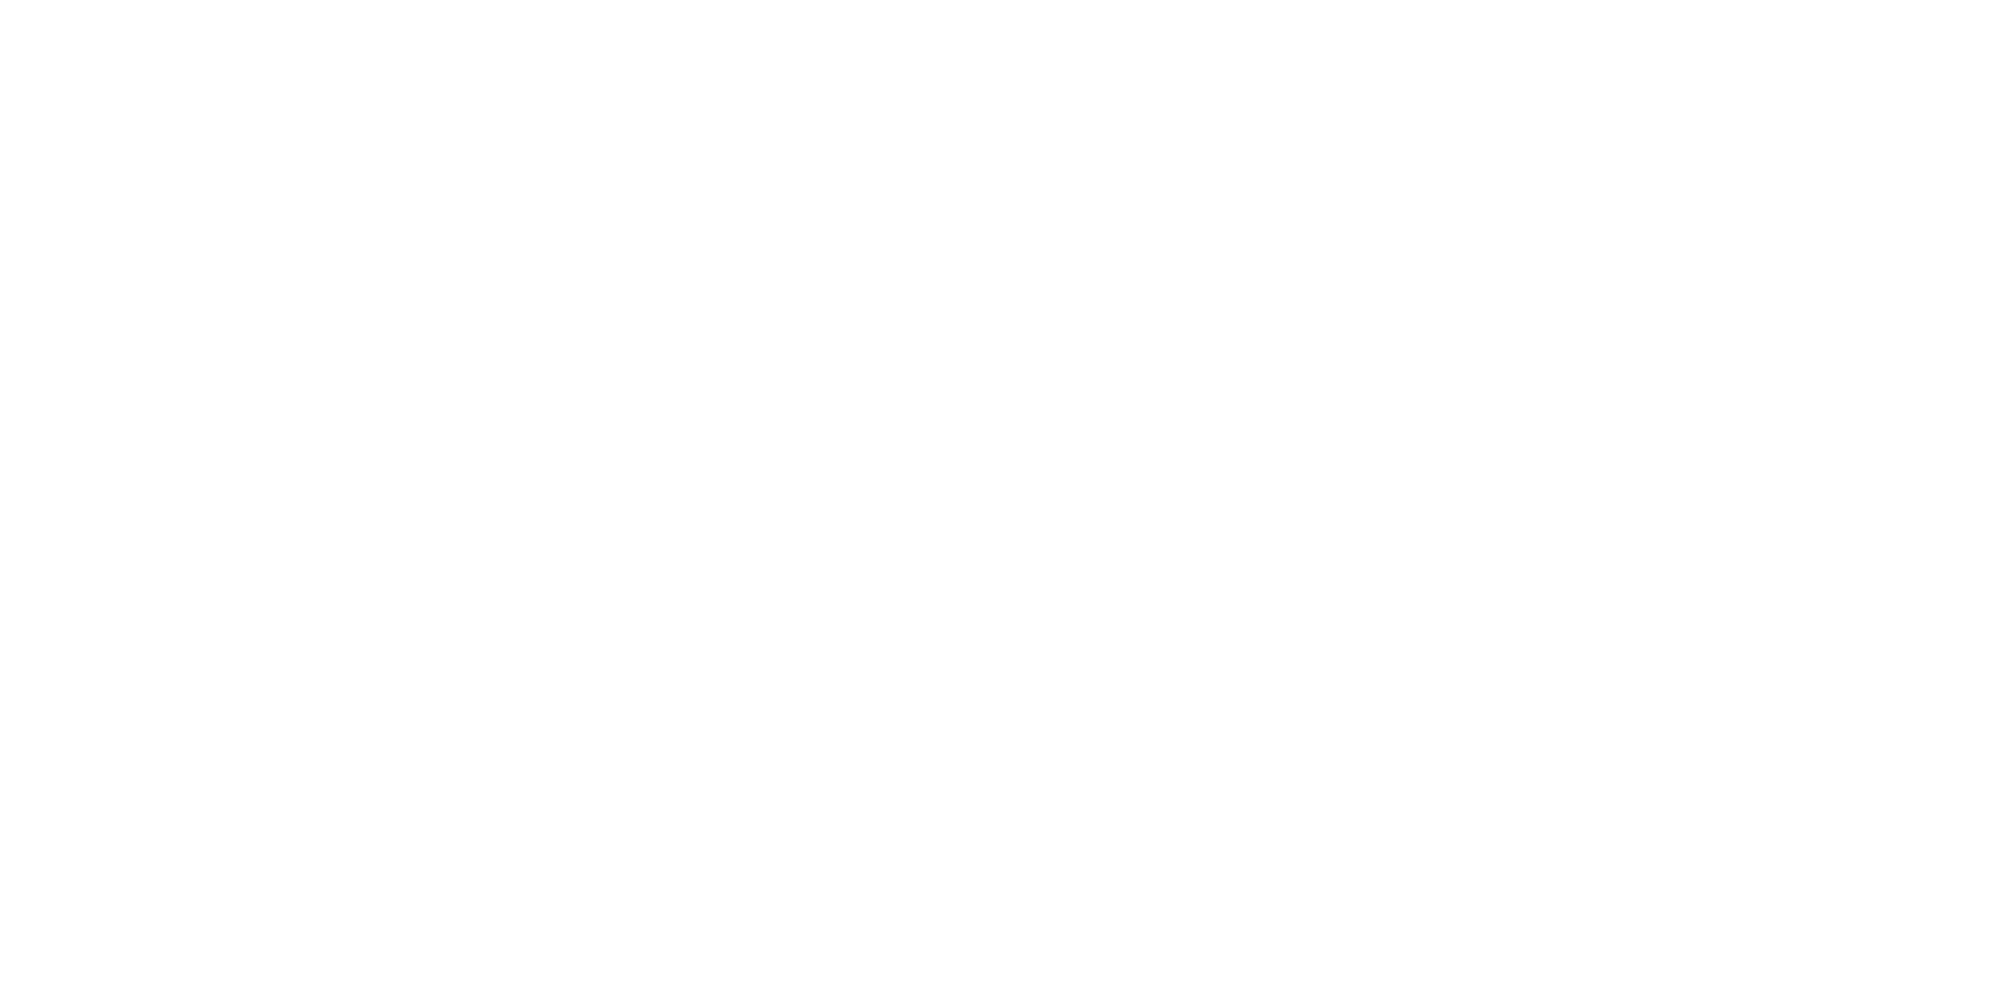

<IPython.core.display.Javascript object>


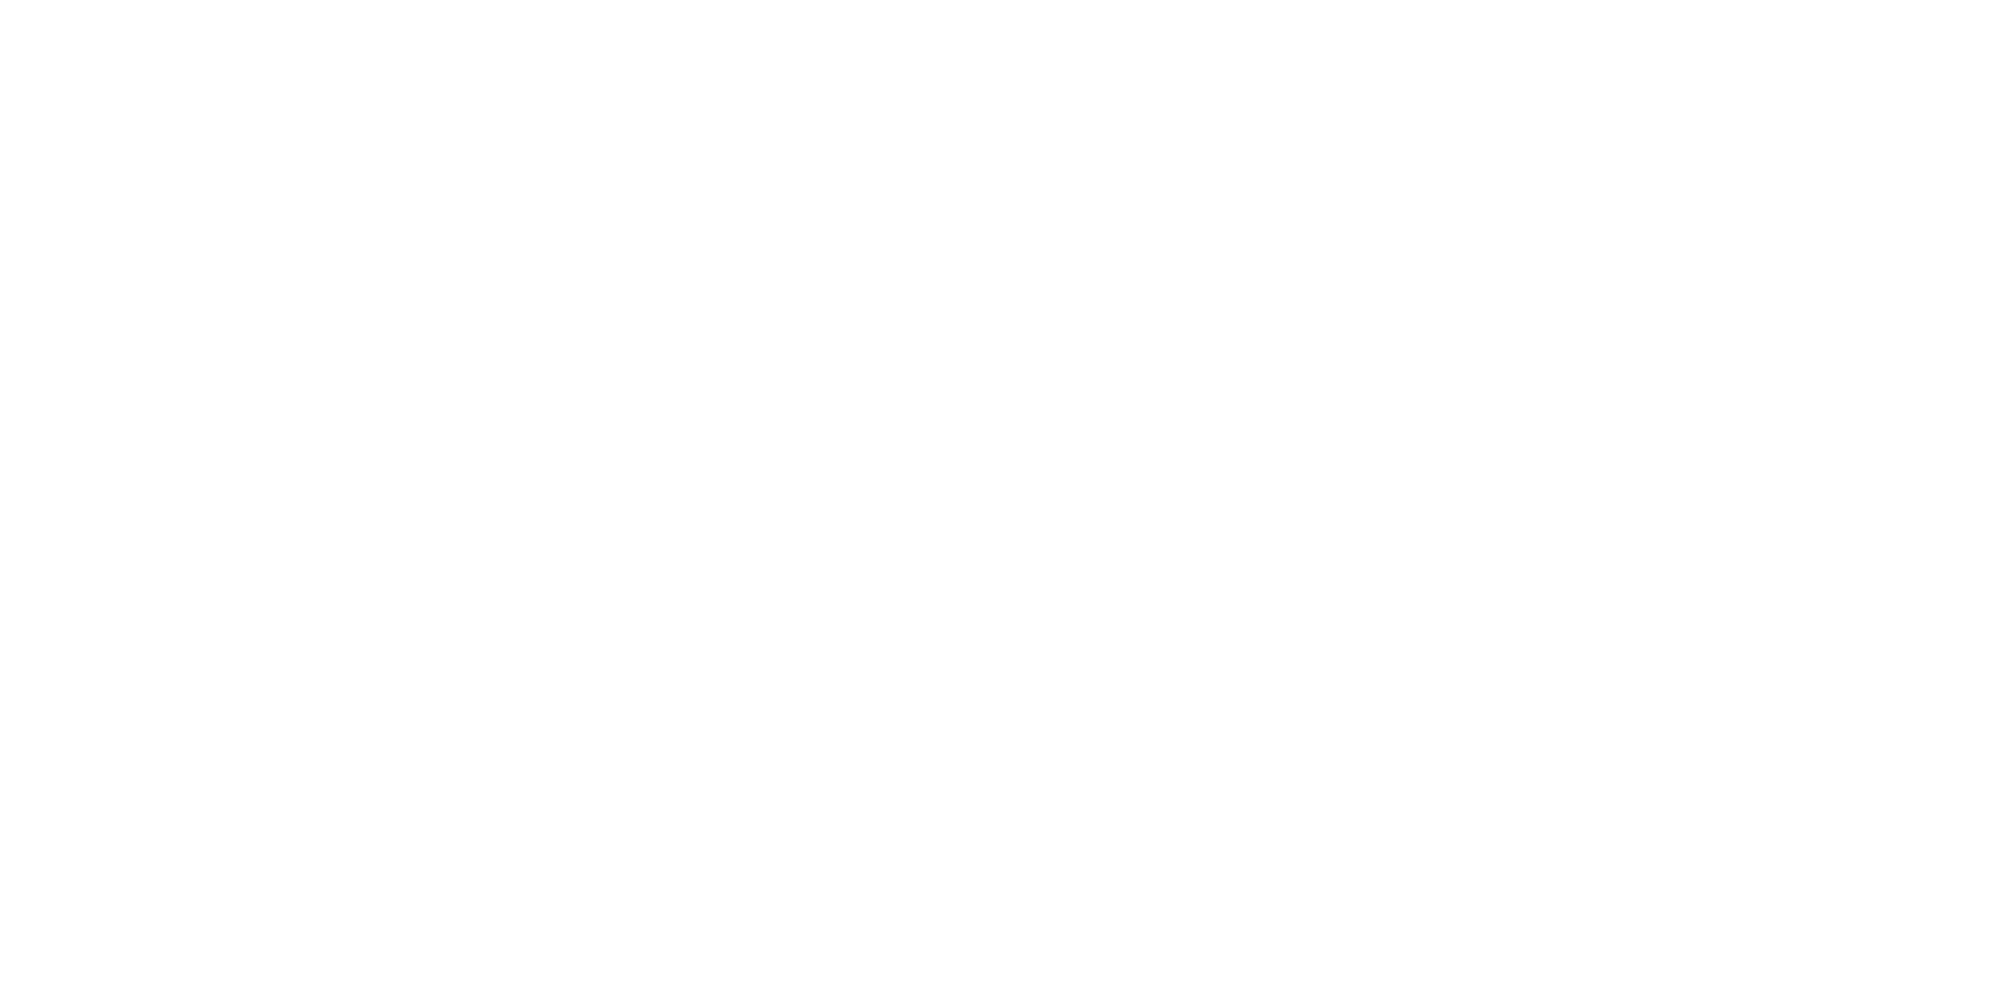

<IPython.core.display.Javascript object>


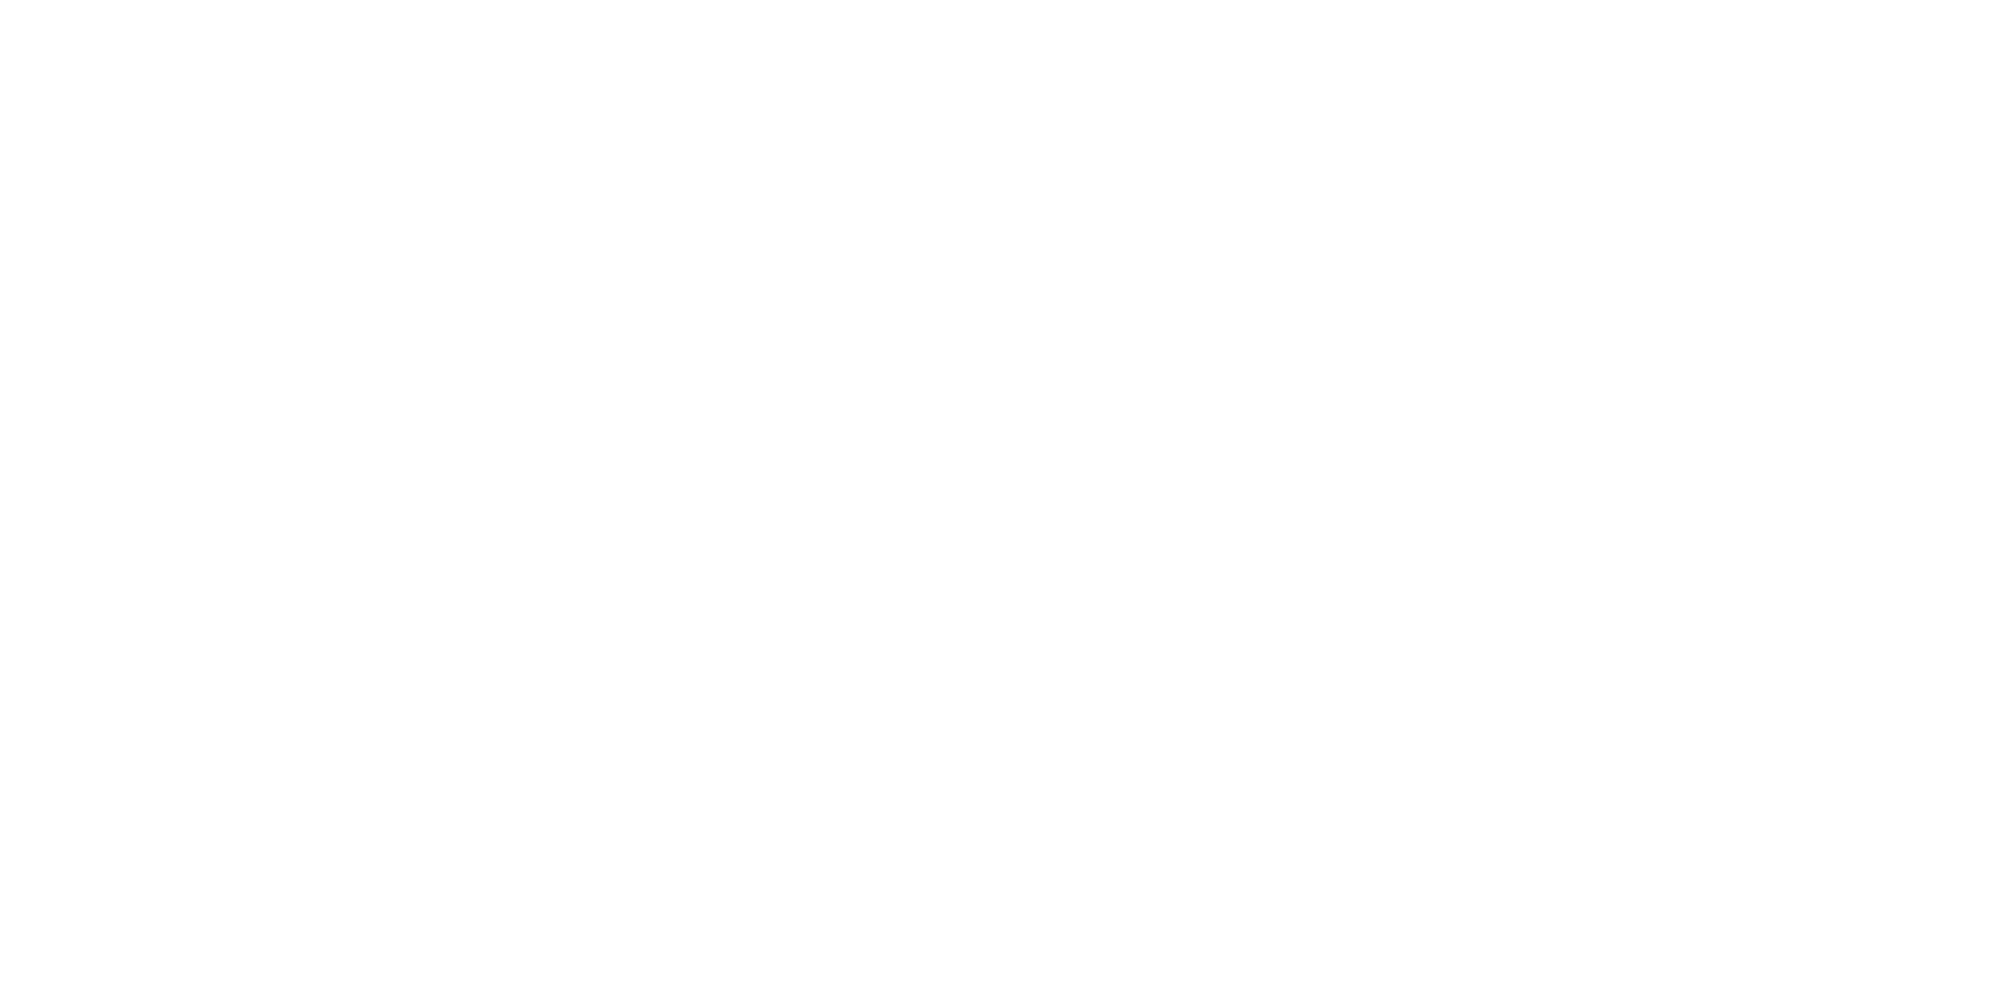

<IPython.core.display.Javascript object>


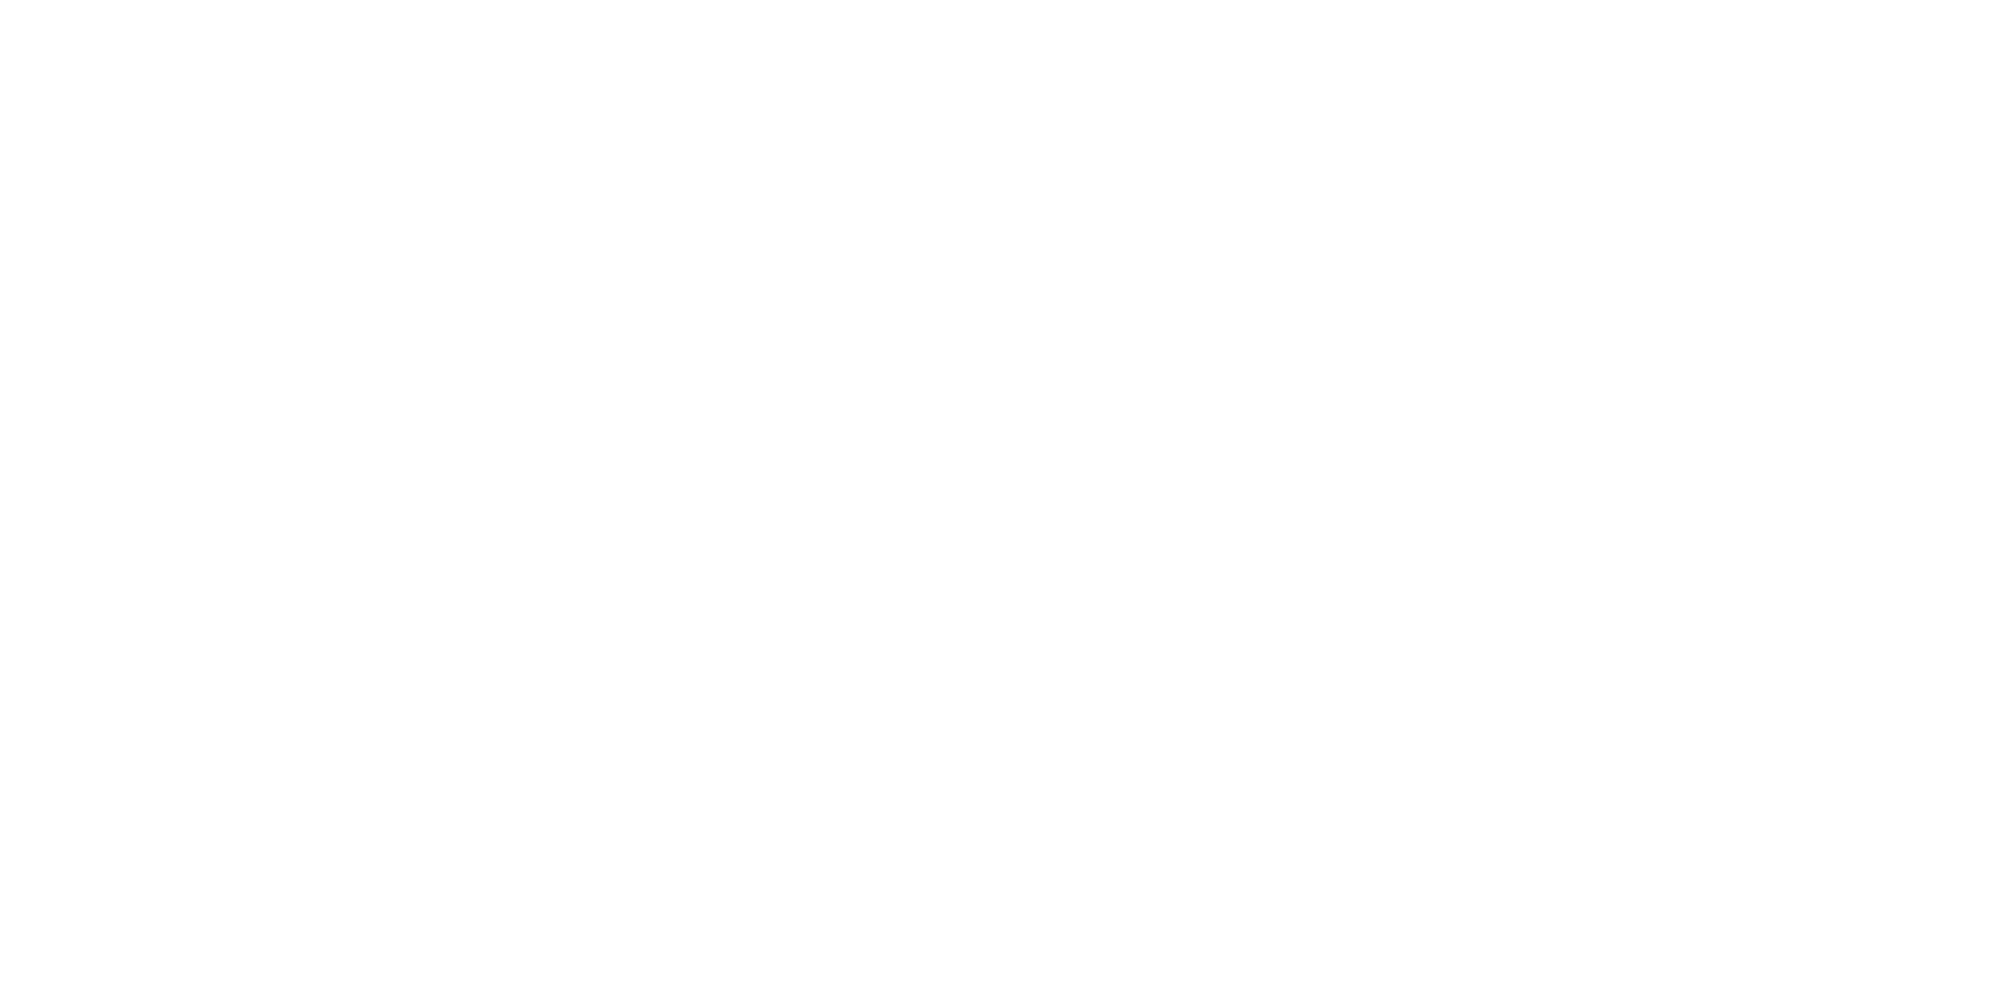

<IPython.core.display.Javascript object>


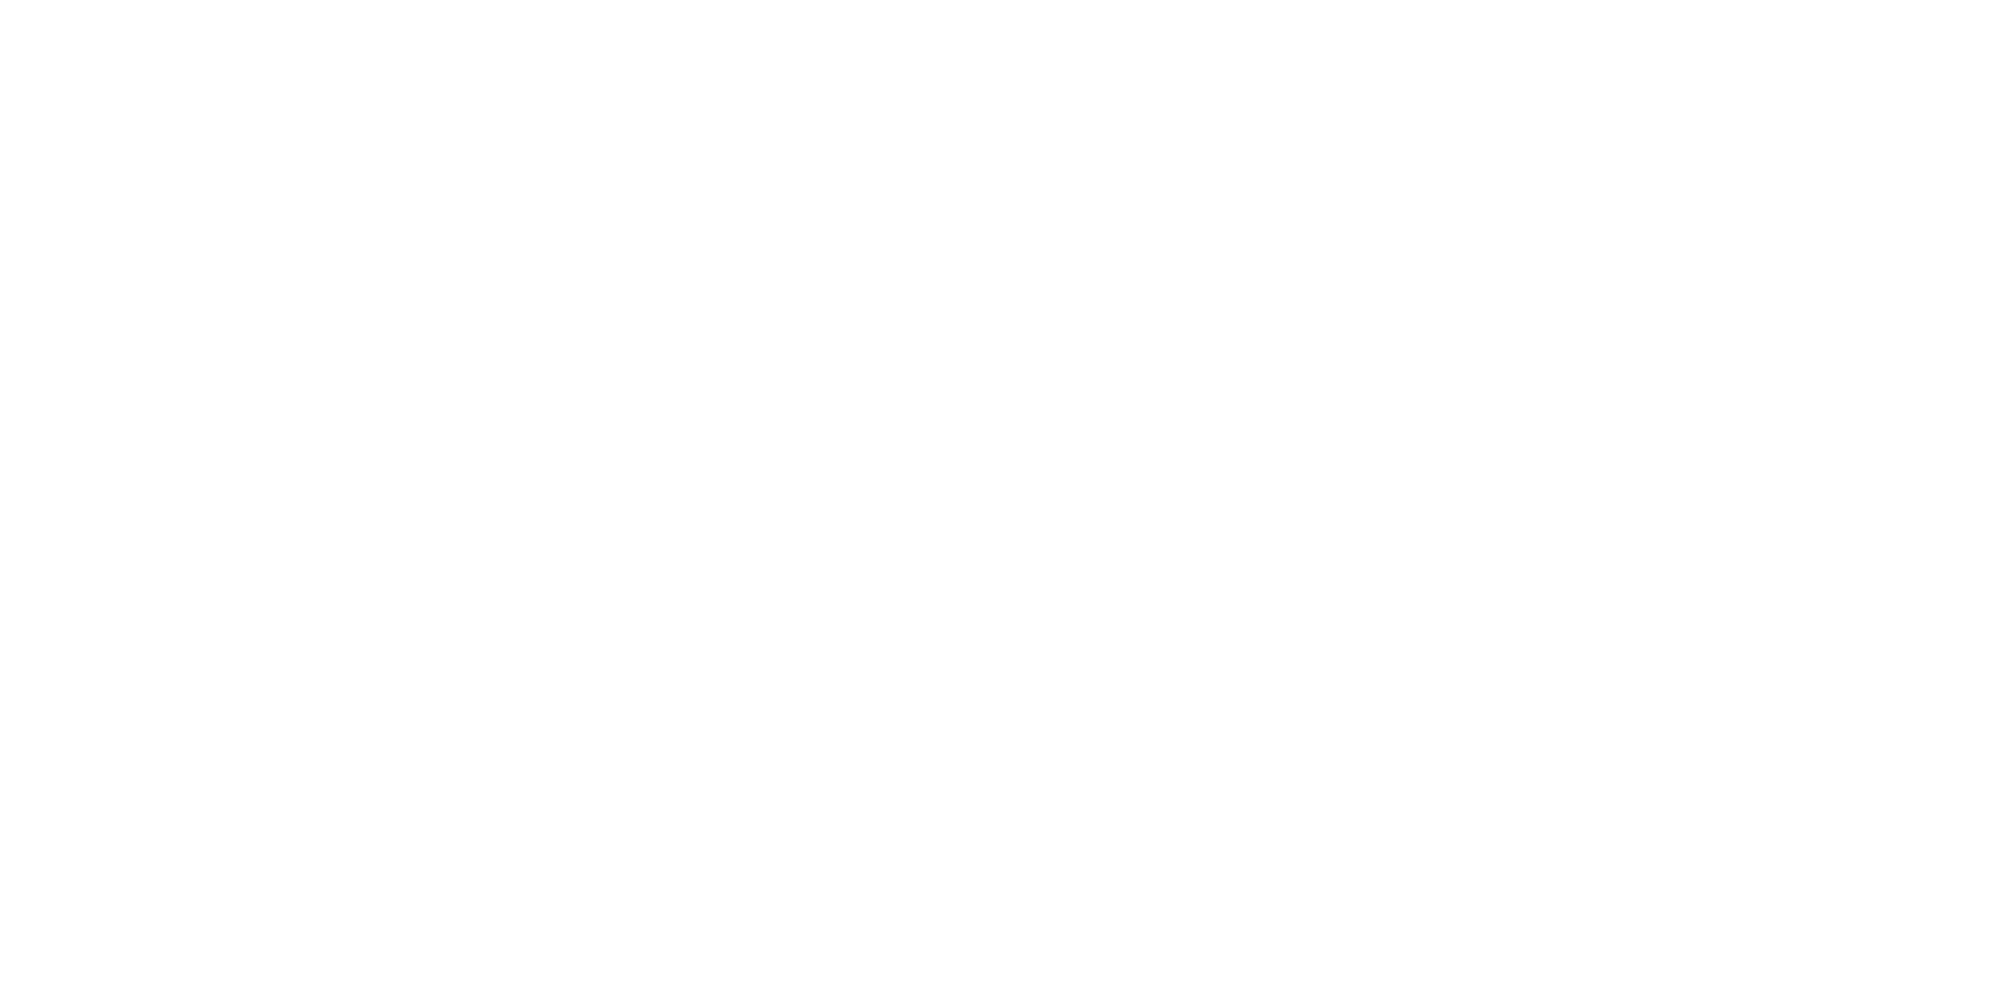

<IPython.core.display.Javascript object>


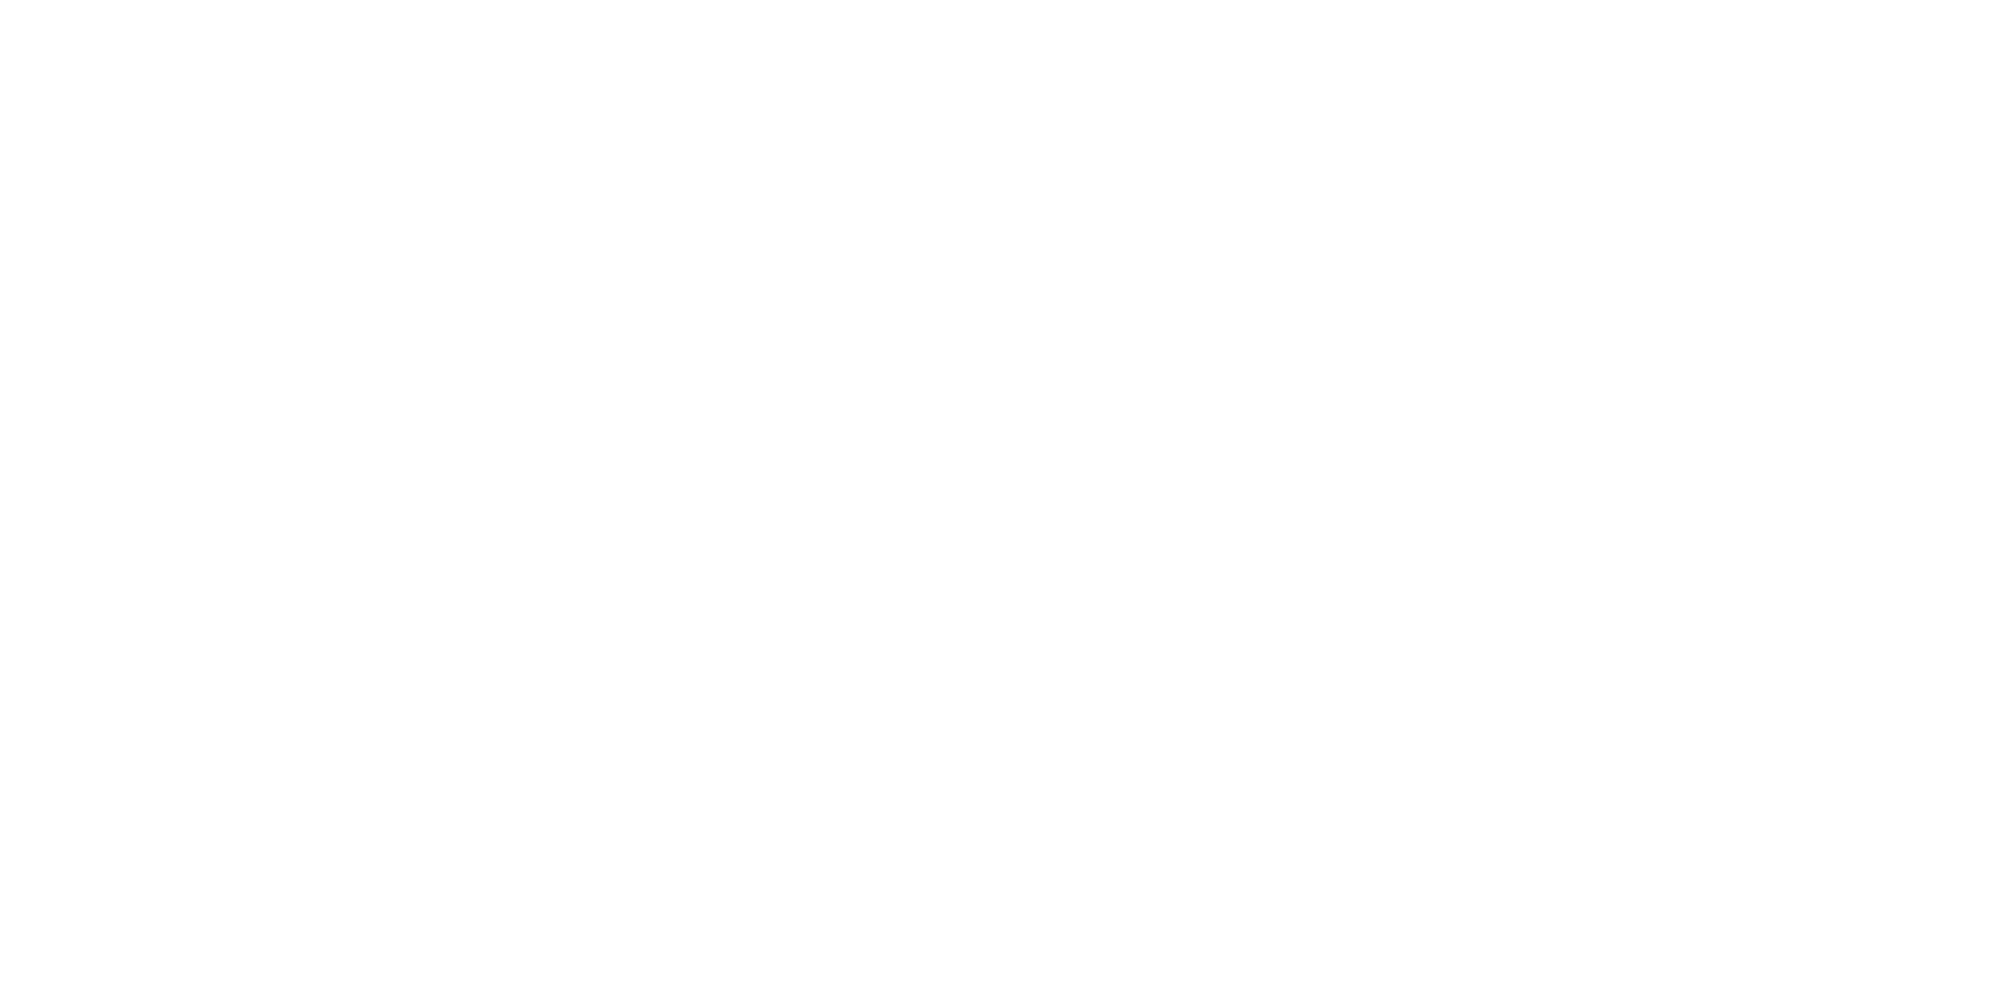

<IPython.core.display.Javascript object>


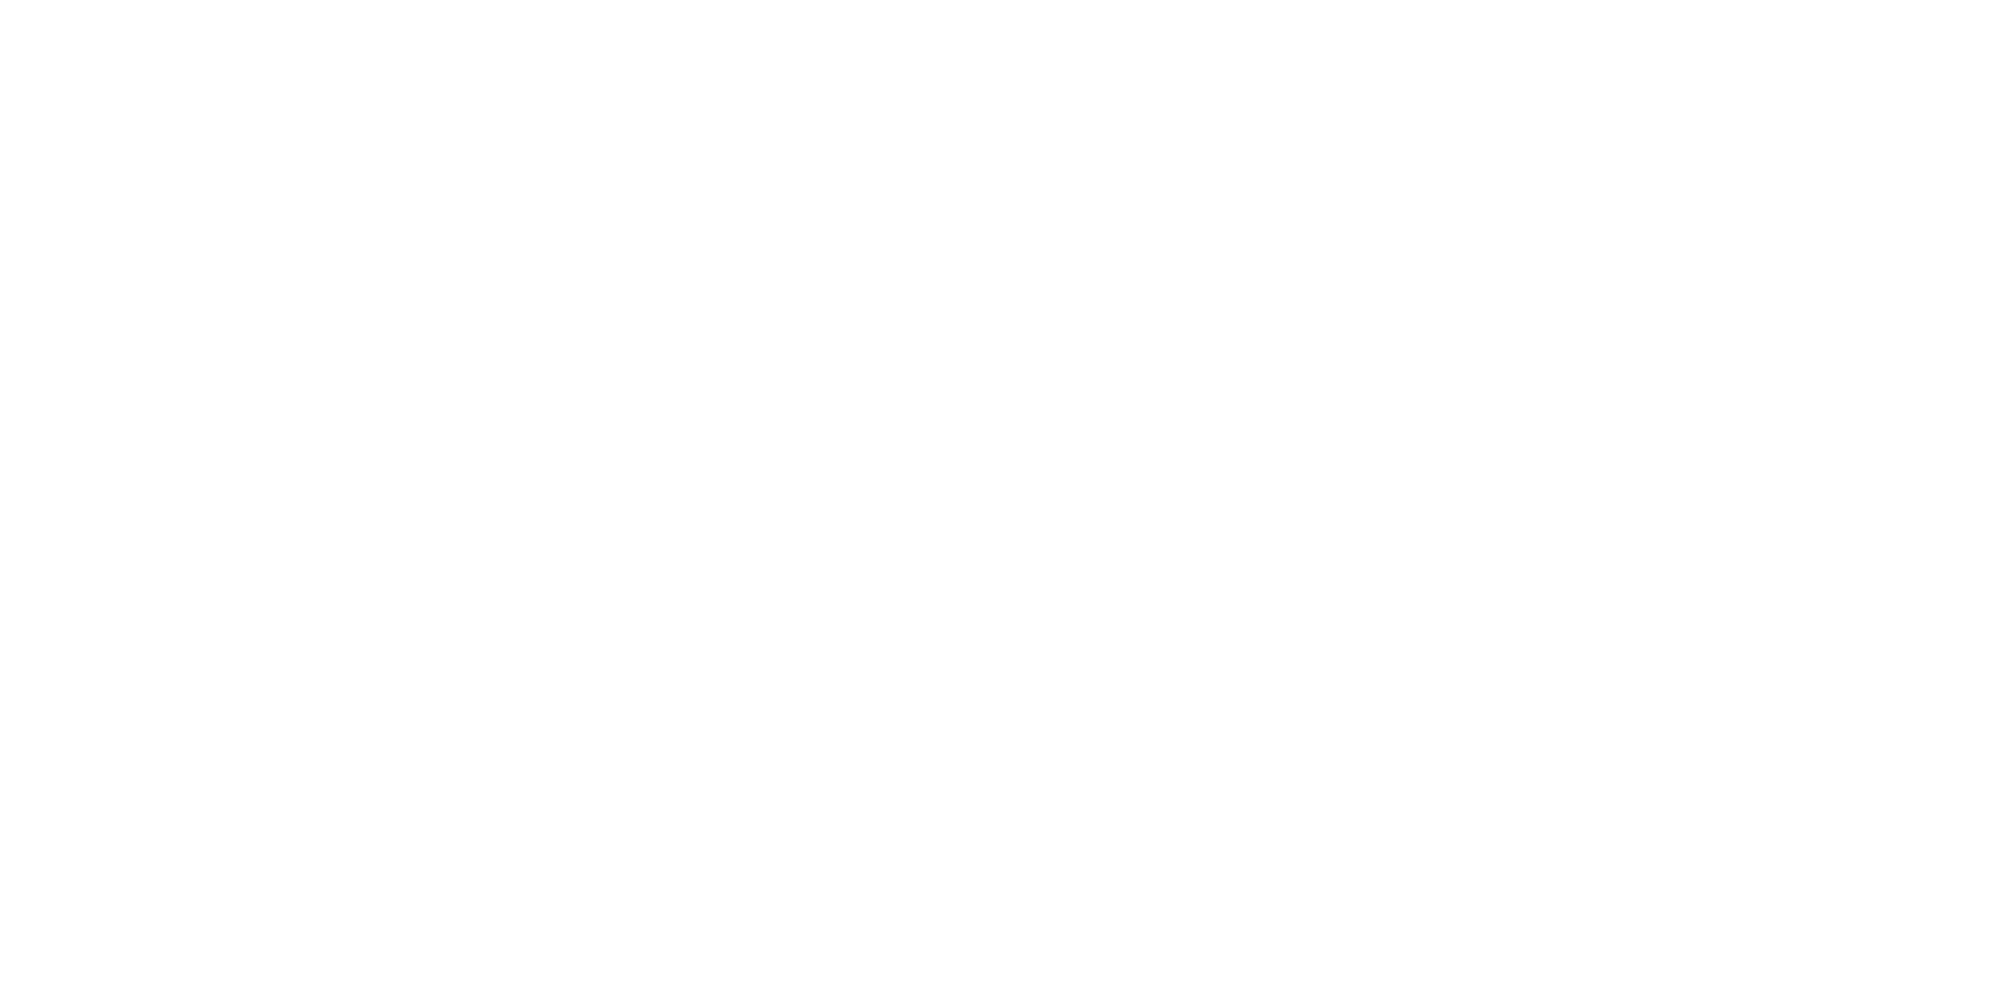

<IPython.core.display.Javascript object>


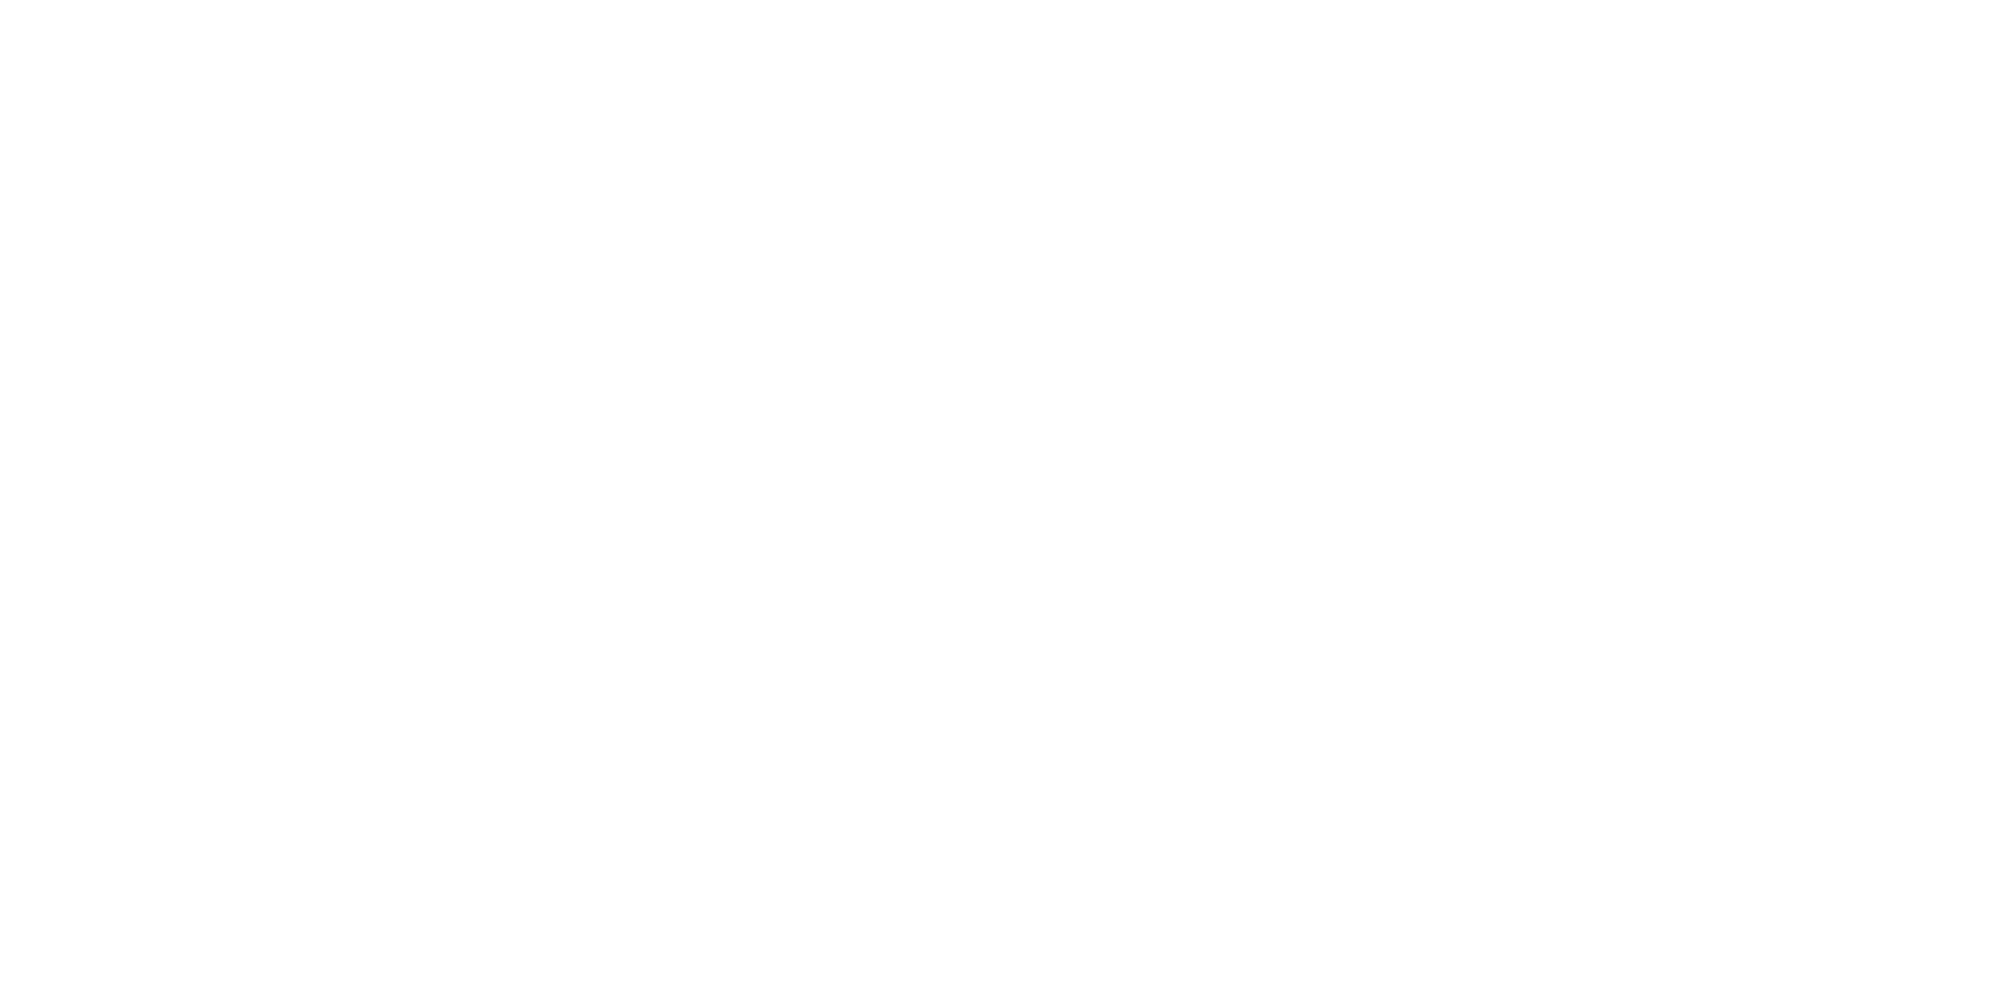

<IPython.core.display.Javascript object>


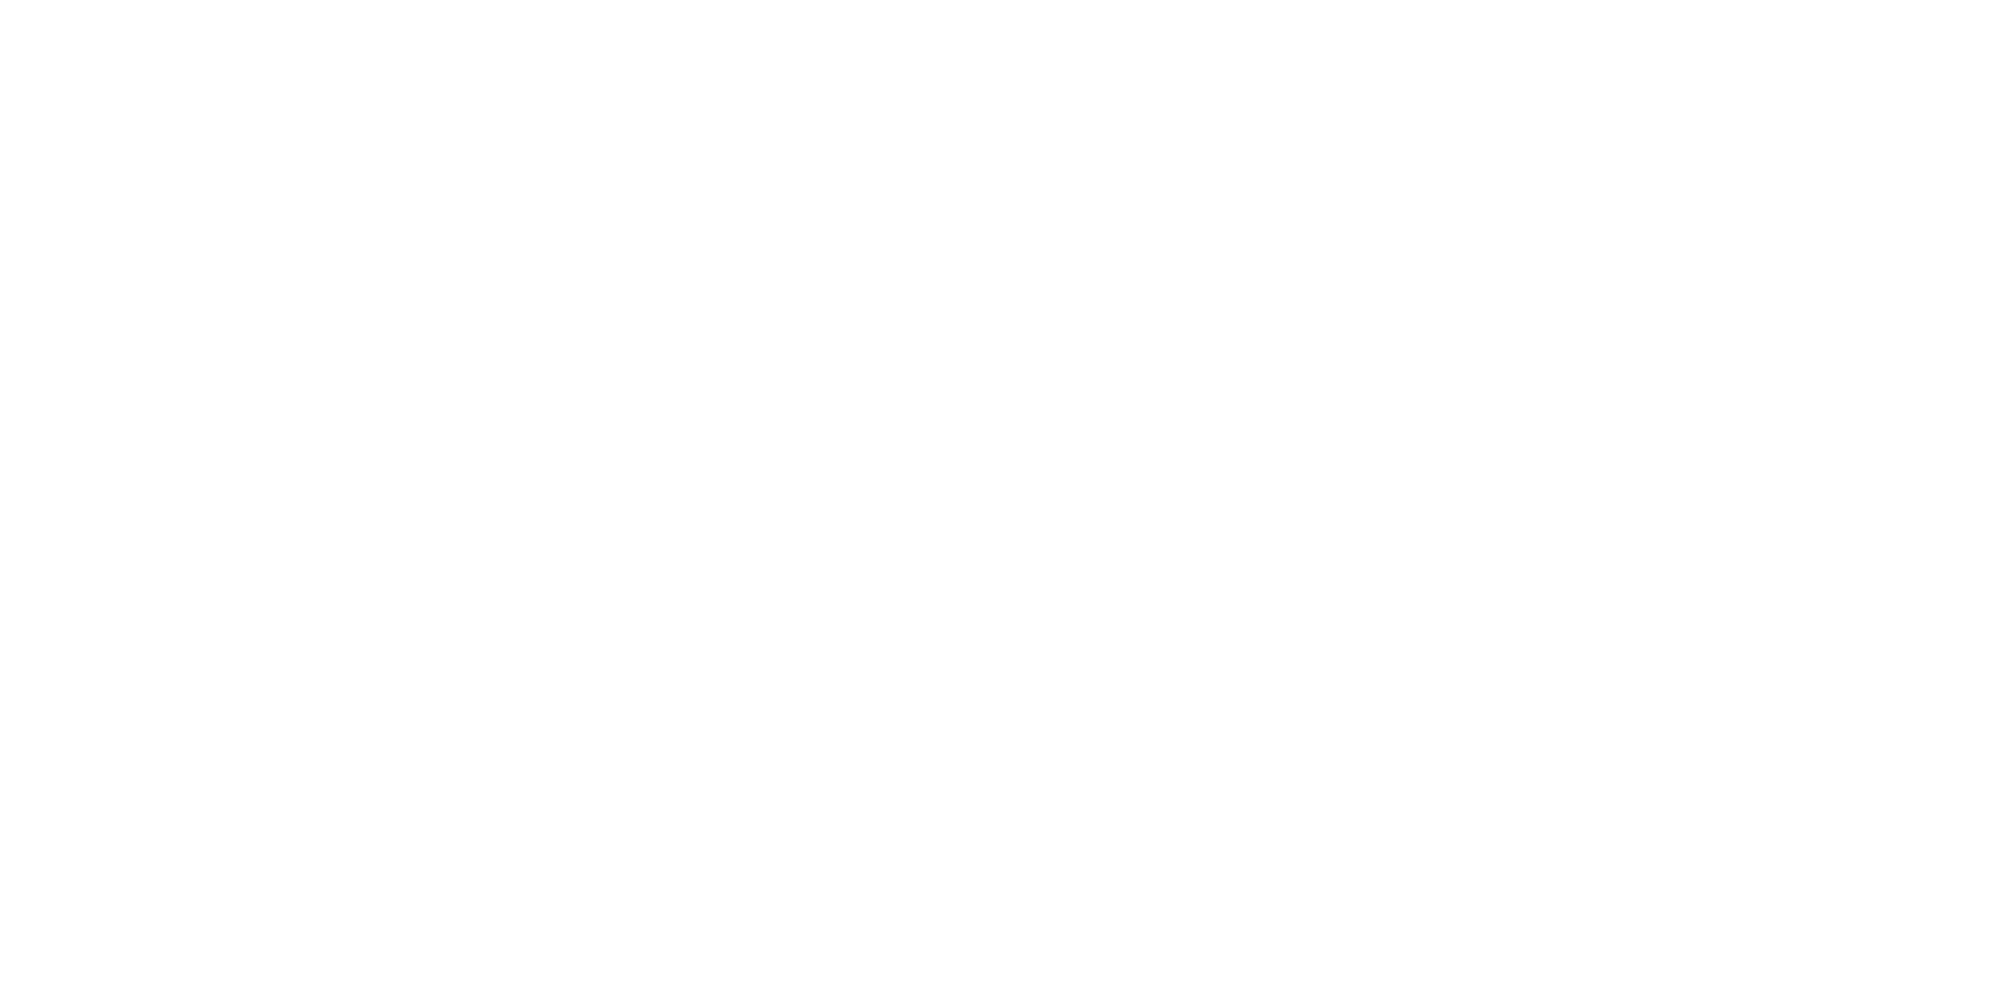

<IPython.core.display.Javascript object>


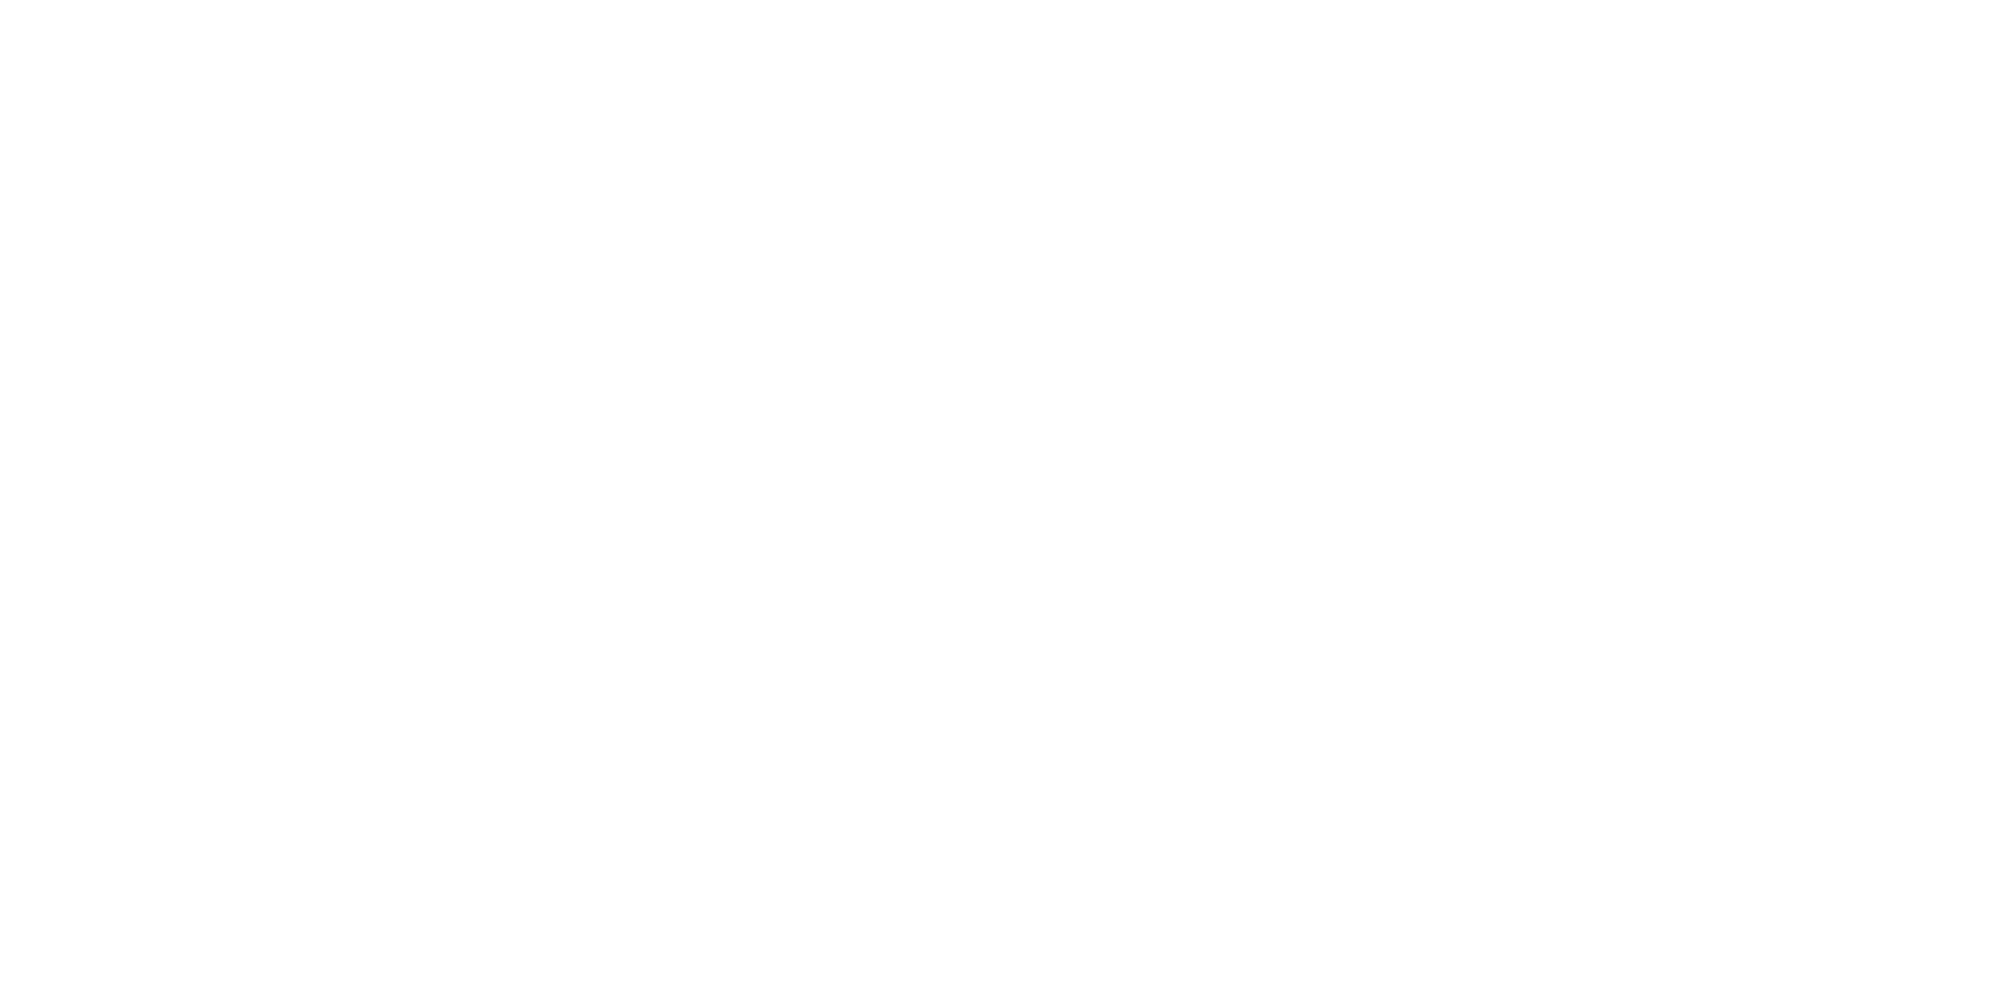

<IPython.core.display.Javascript object>


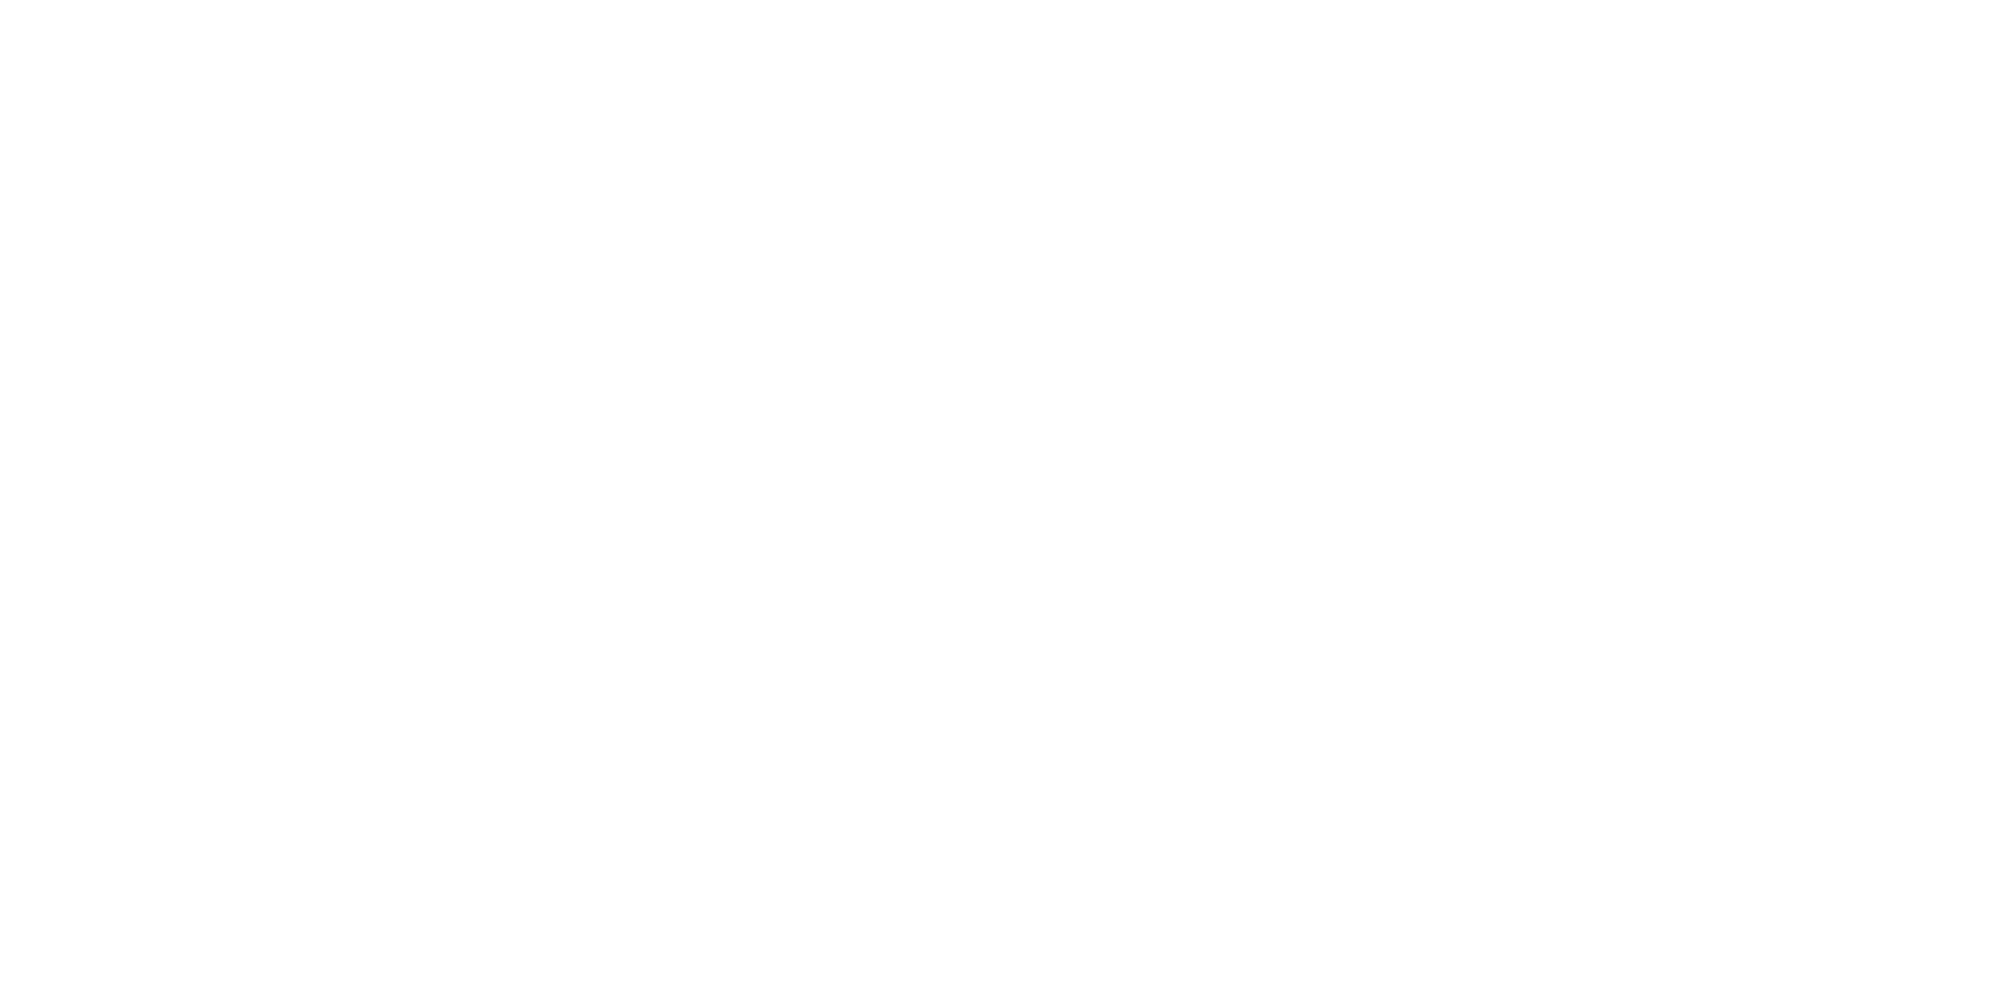

<IPython.core.display.Javascript object>


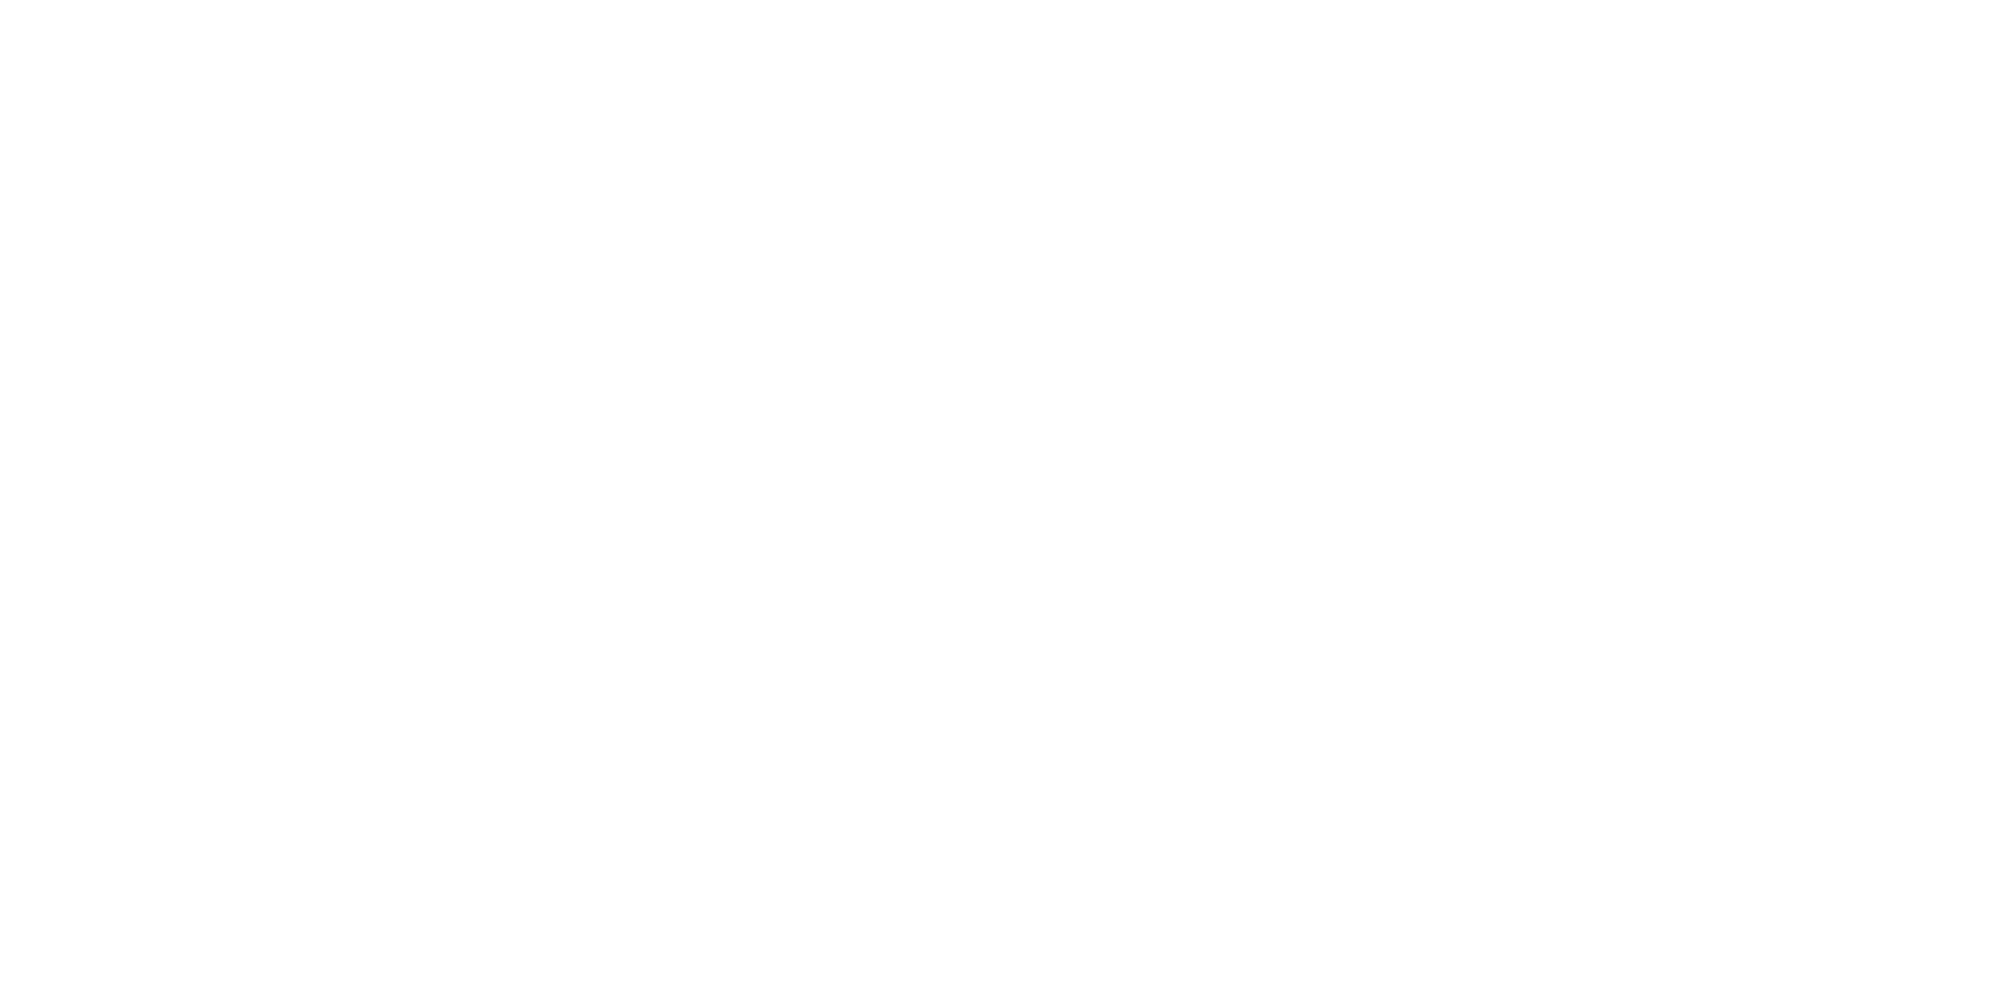

<IPython.core.display.Javascript object>


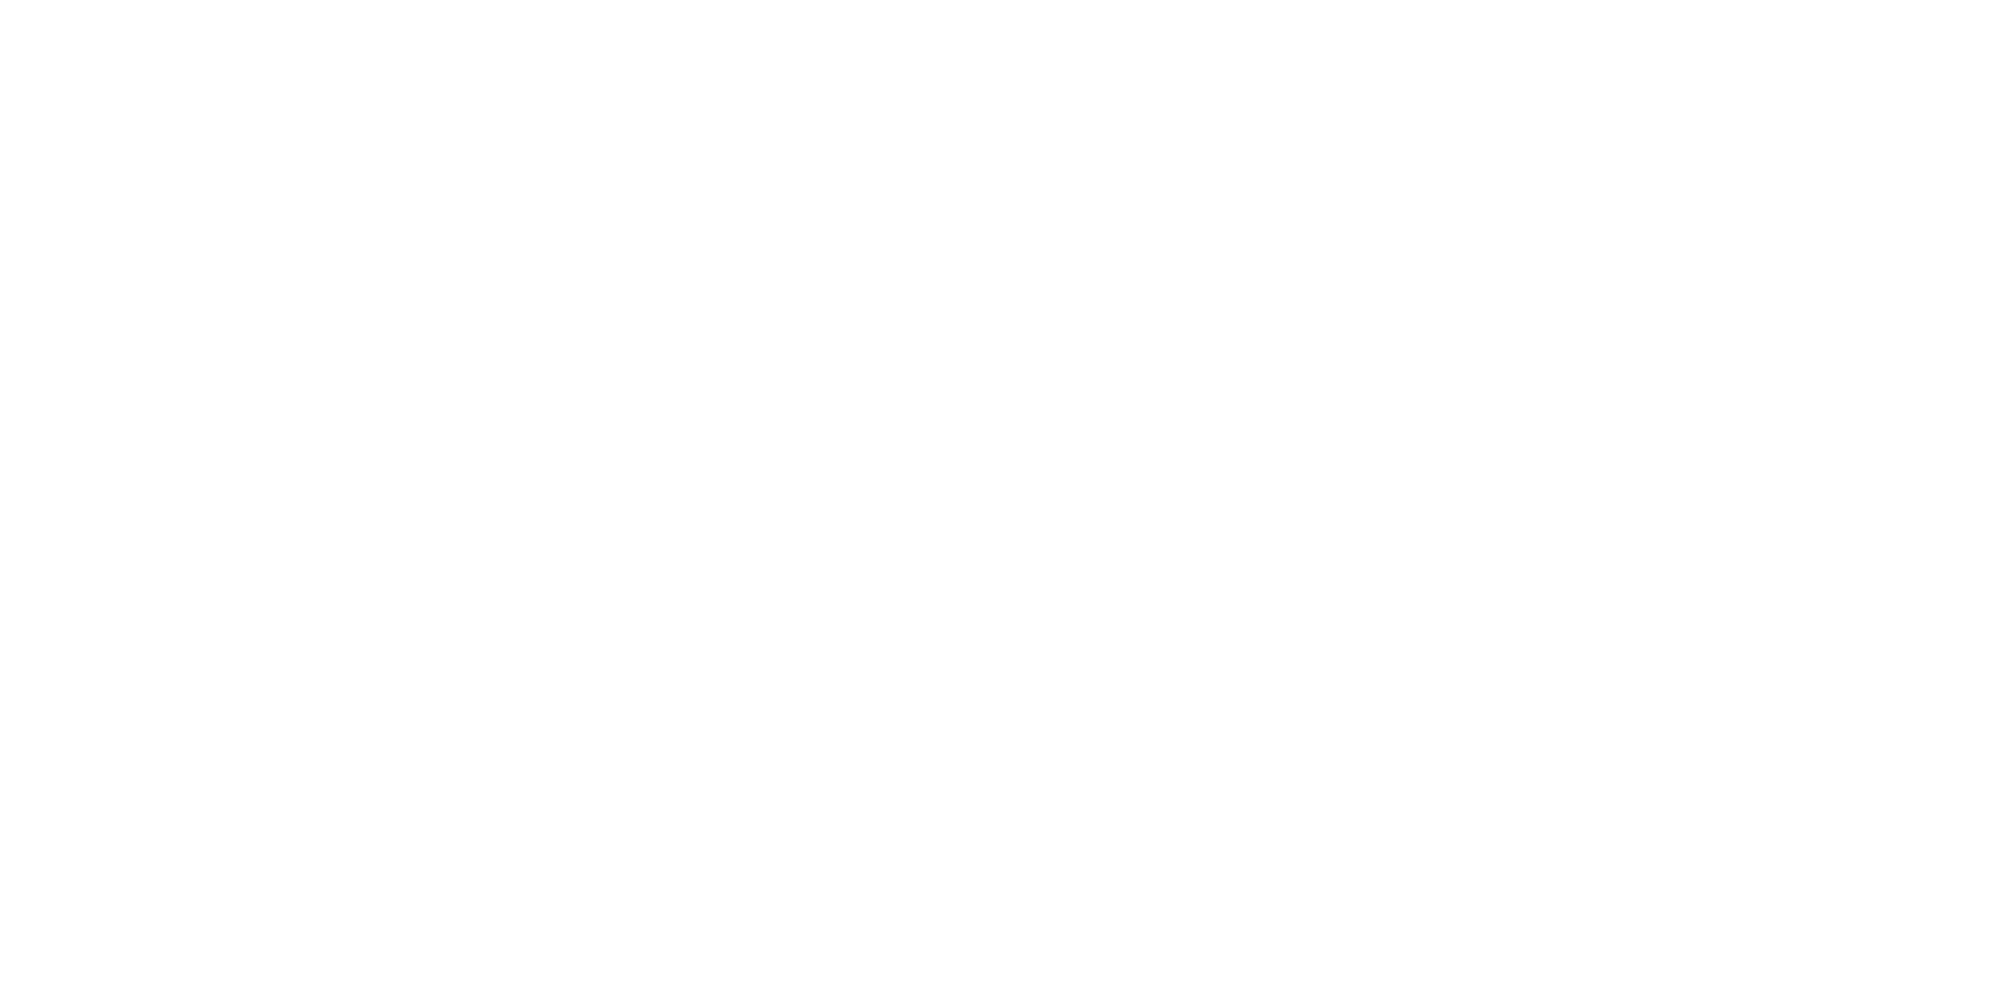

<IPython.core.display.Javascript object>


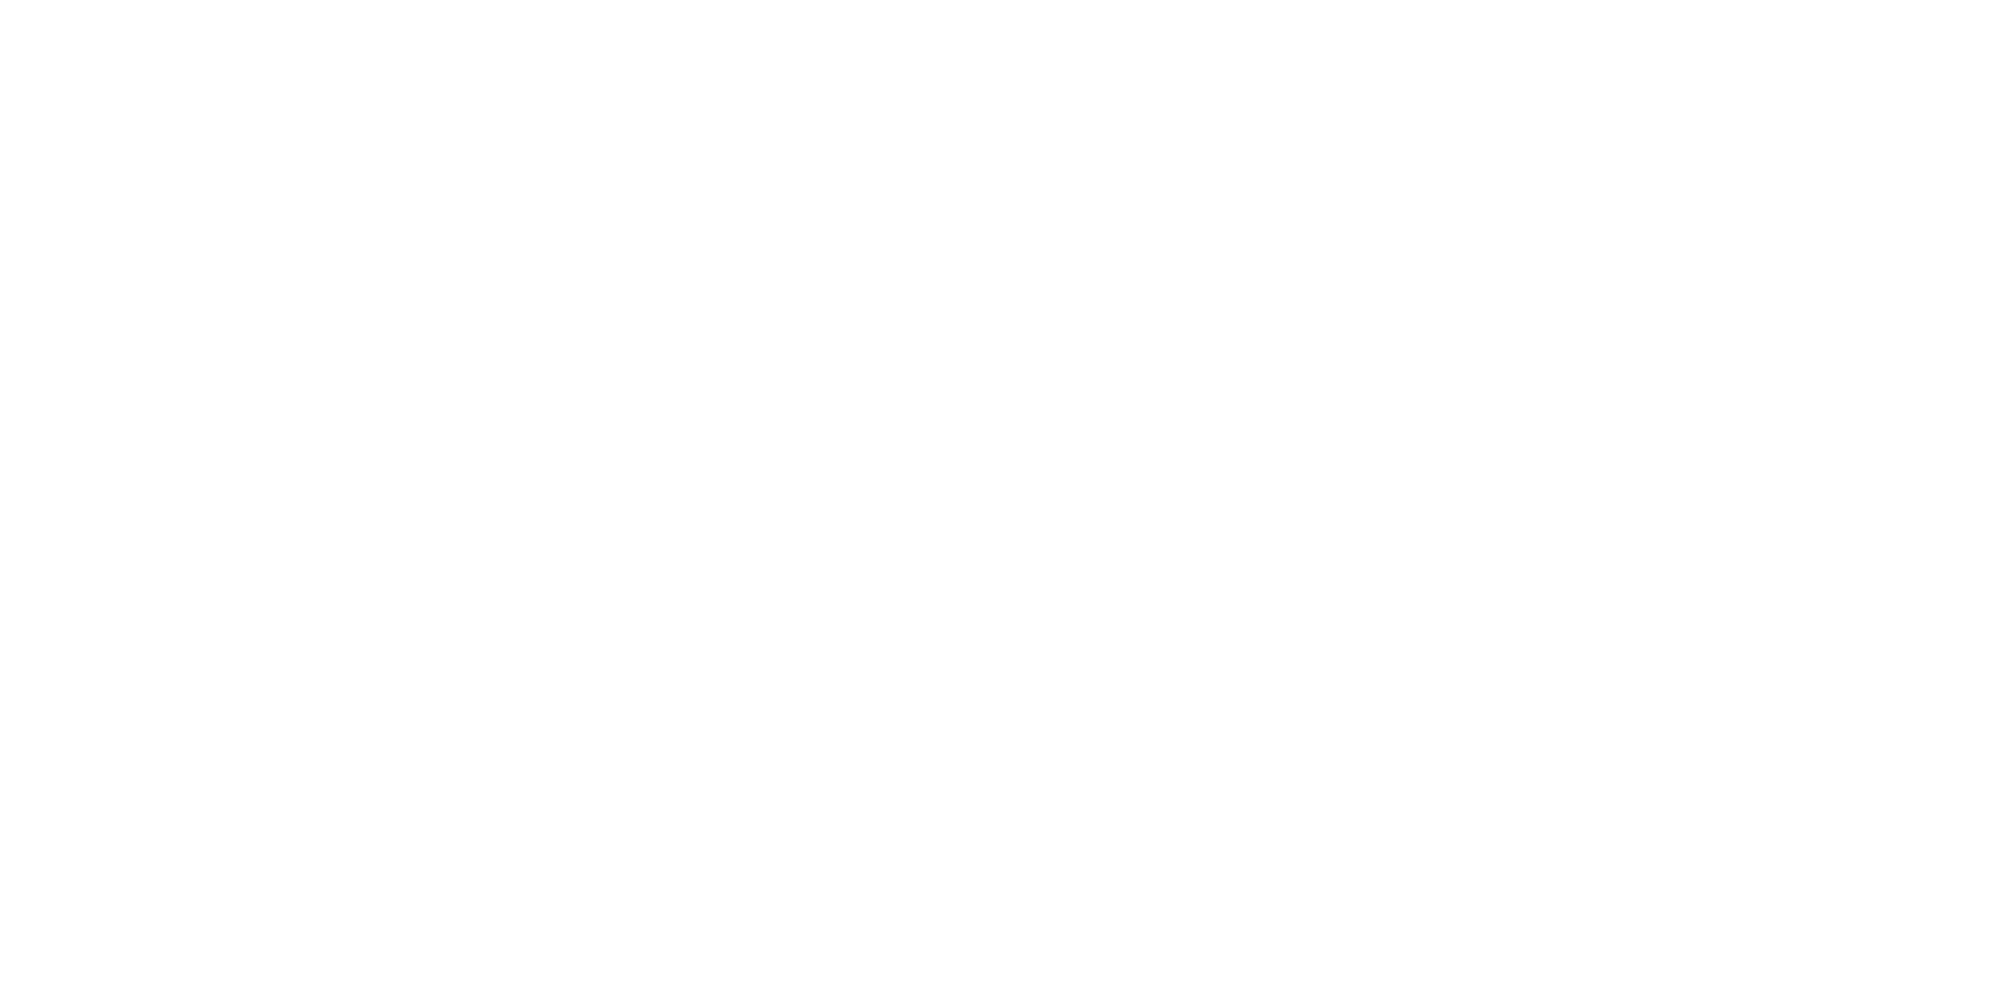

<IPython.core.display.Javascript object>


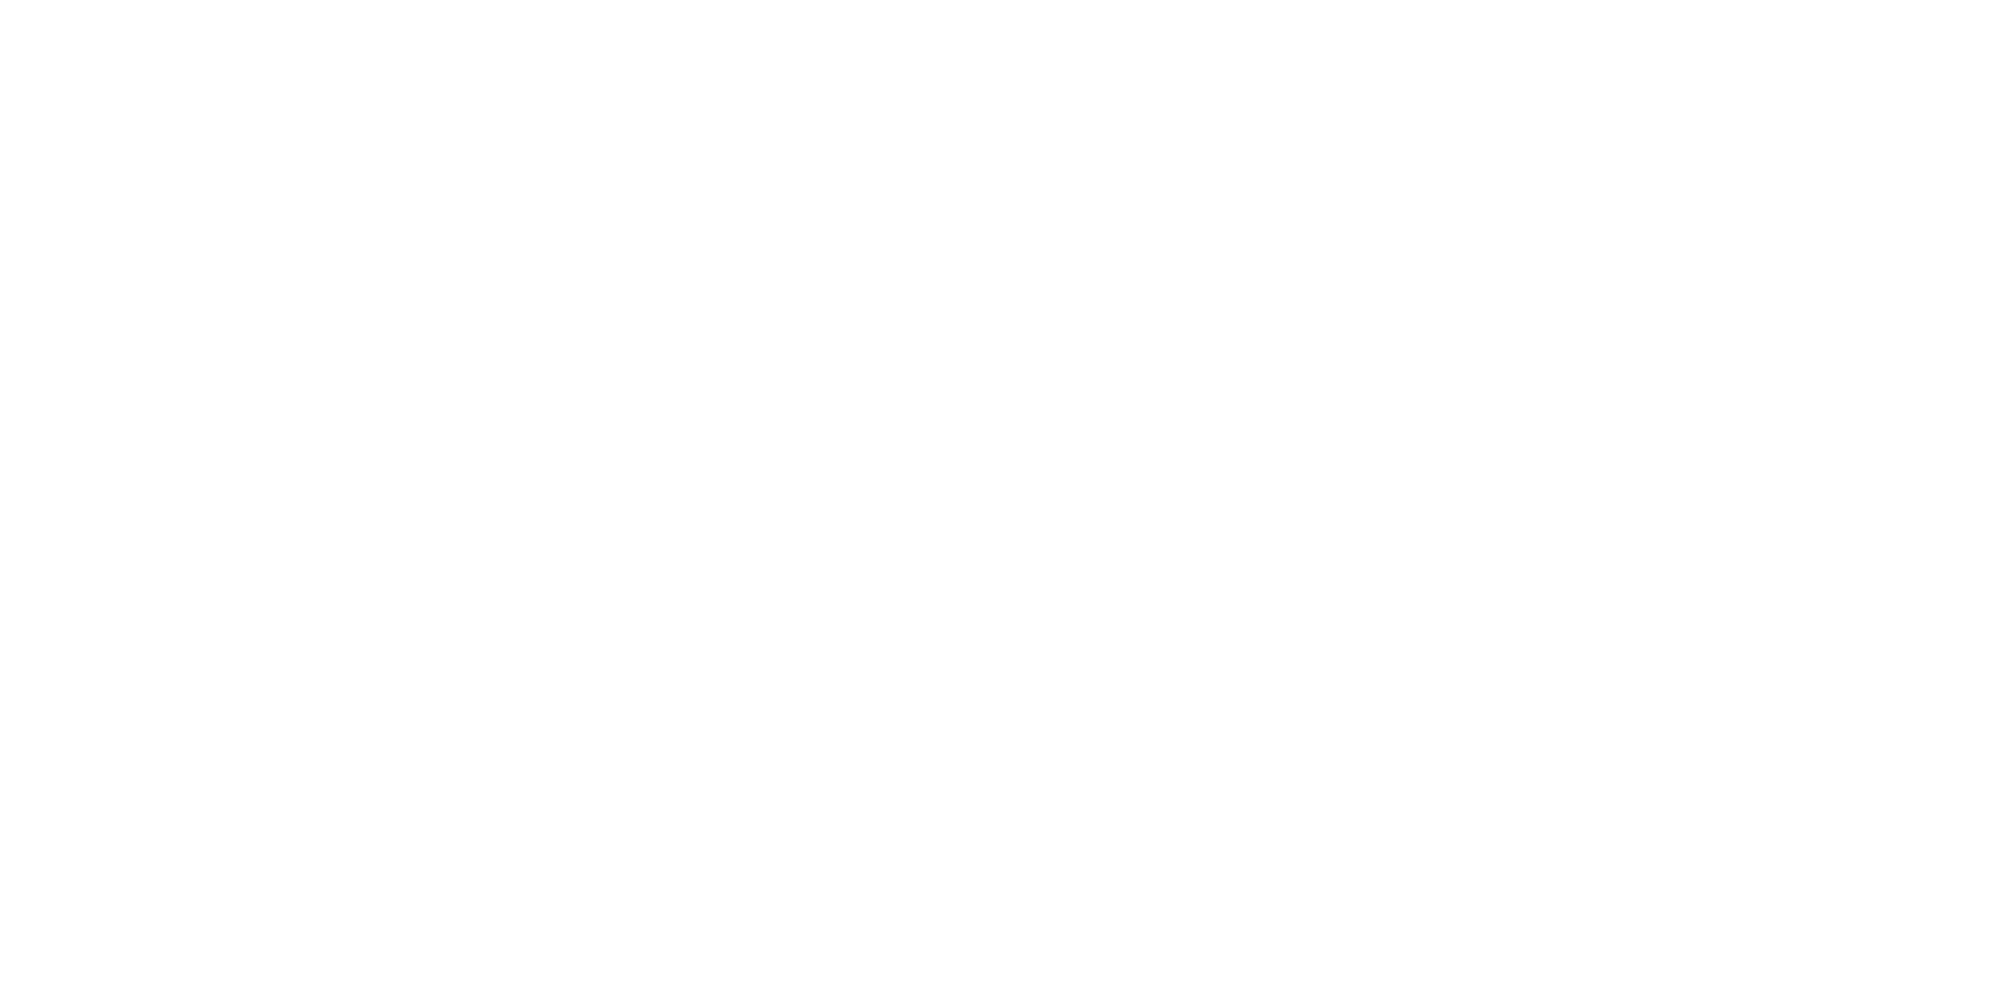

<IPython.core.display.Javascript object>


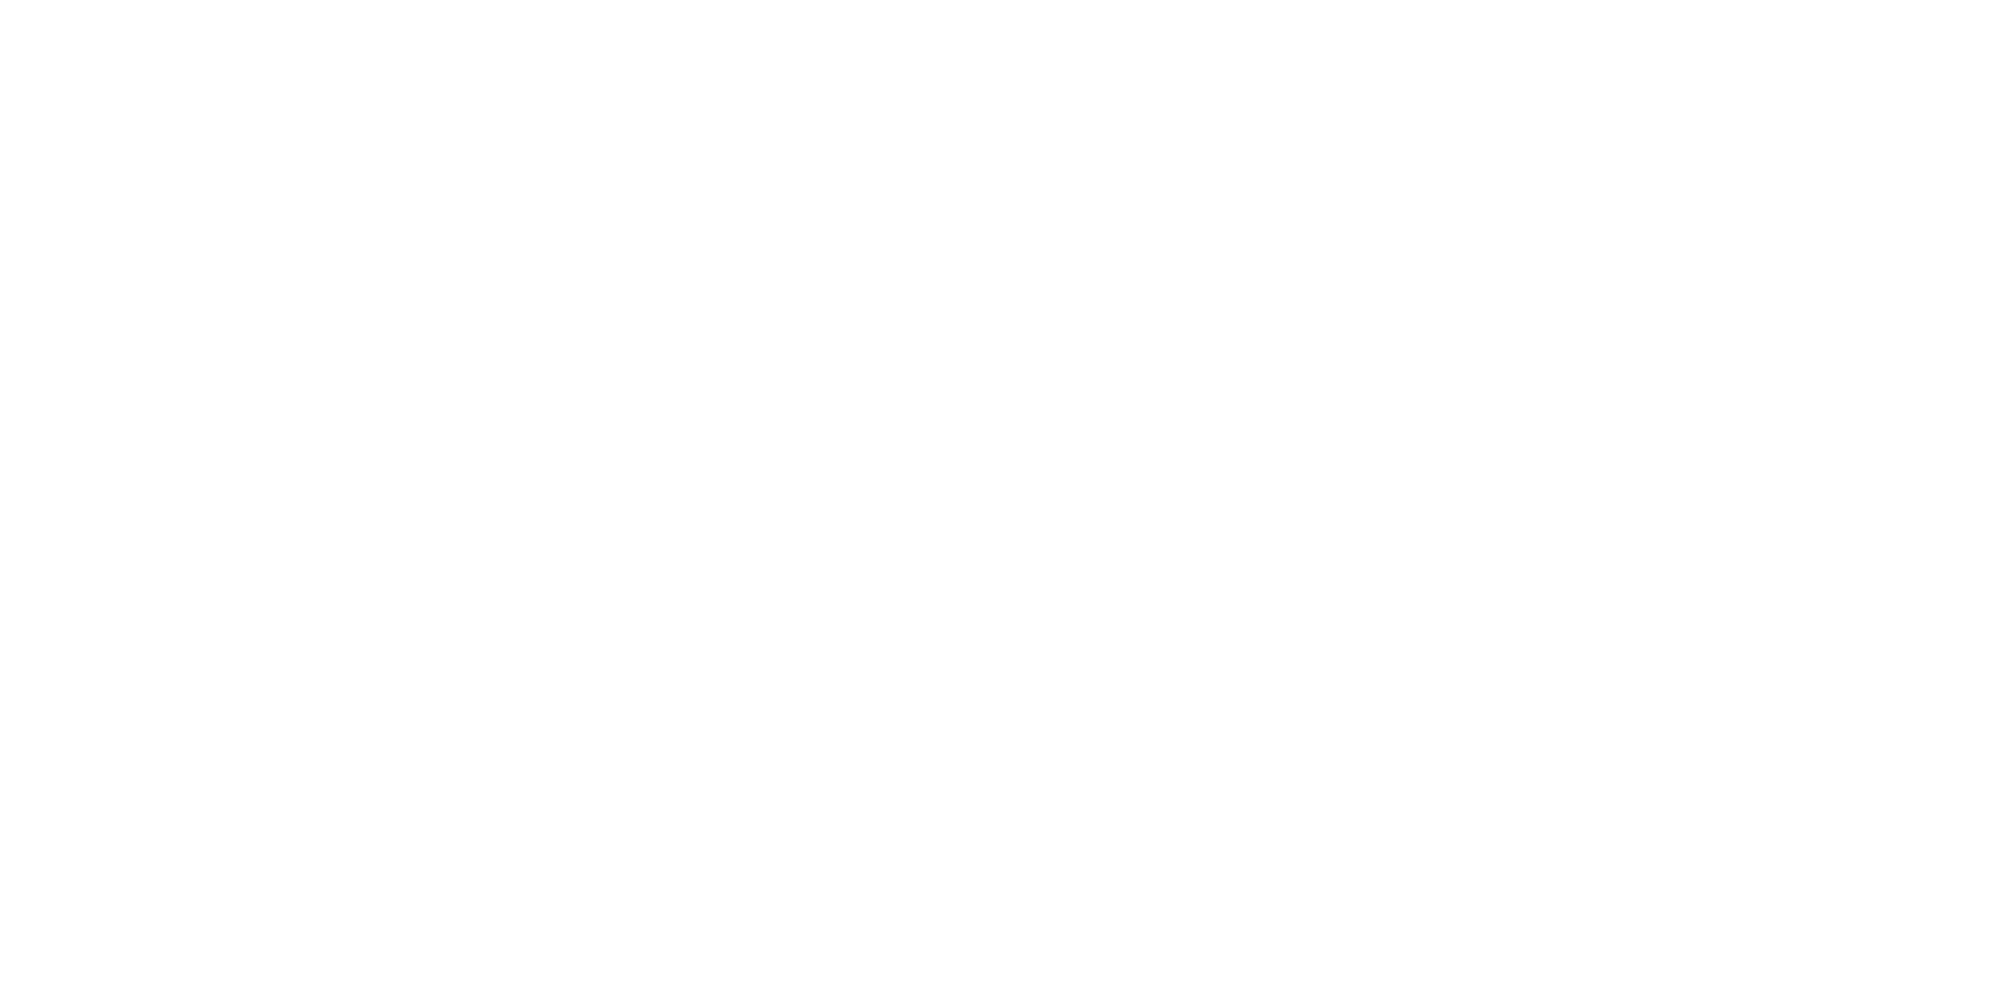

<IPython.core.display.Javascript object>


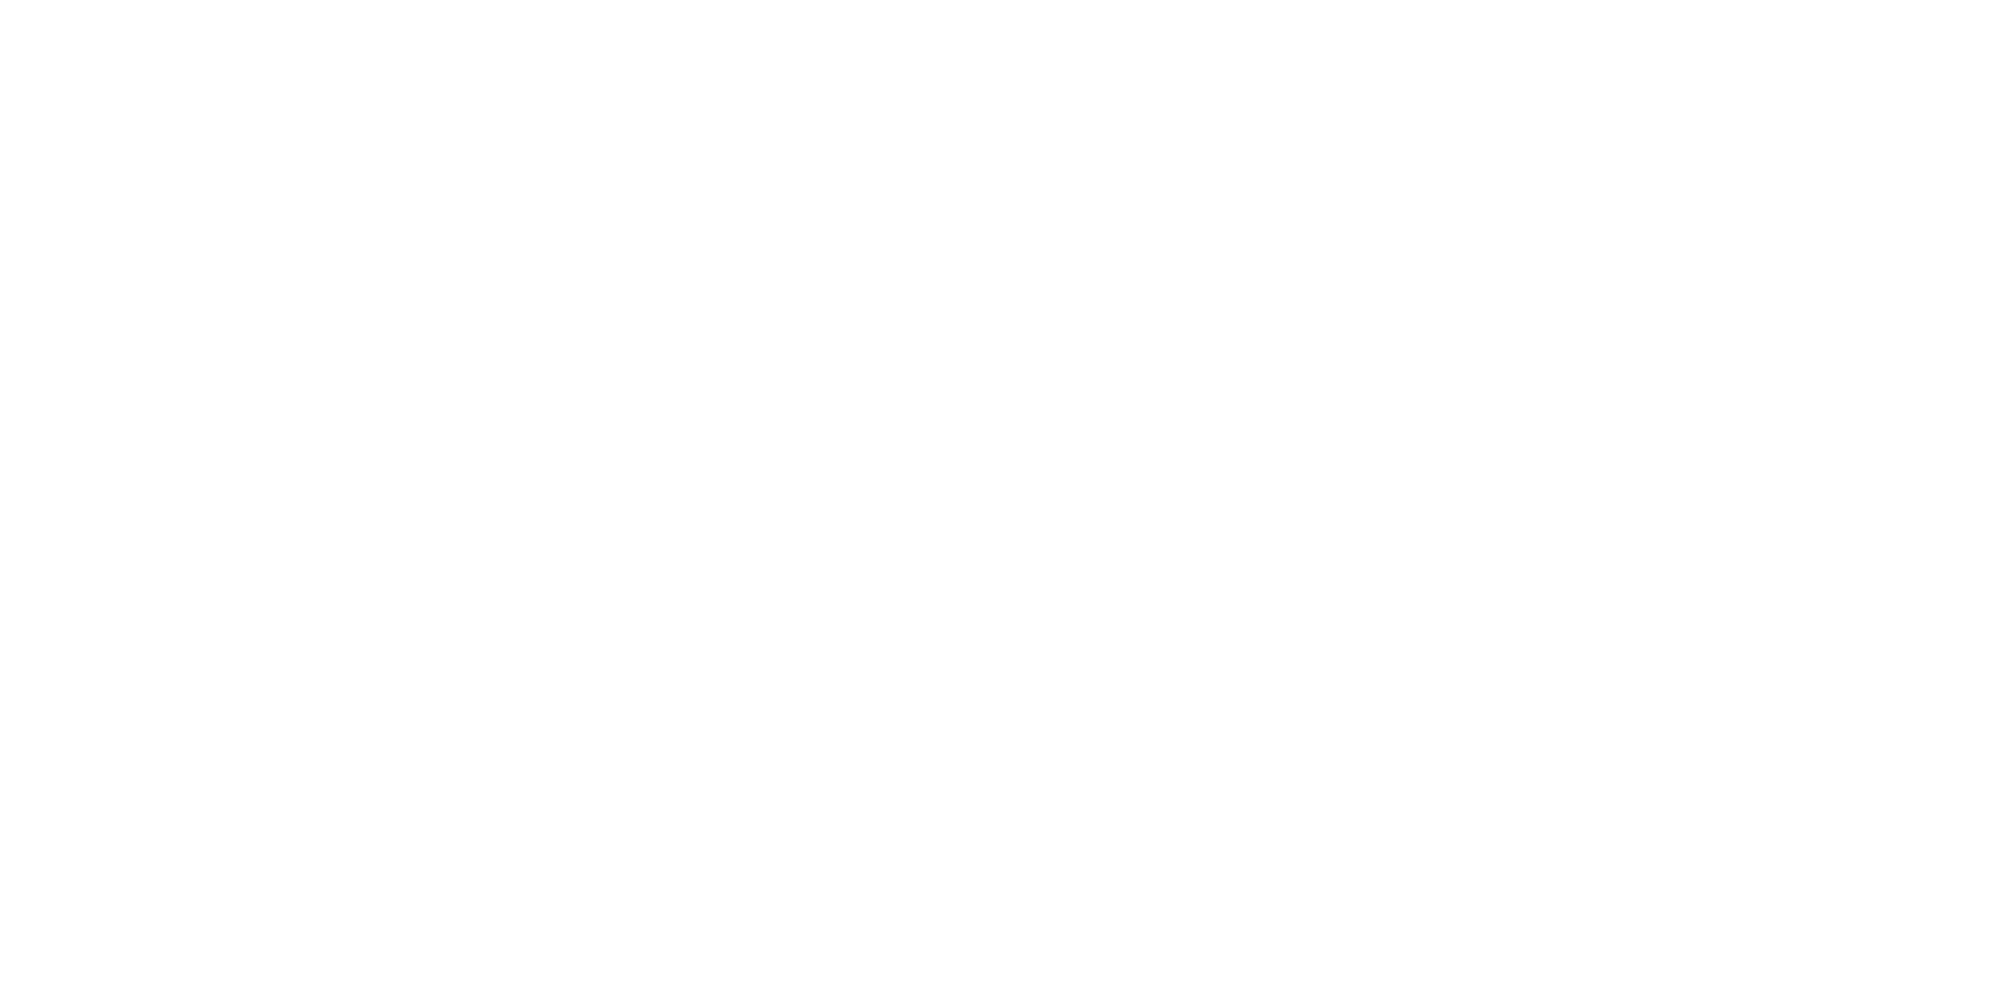

<IPython.core.display.Javascript object>


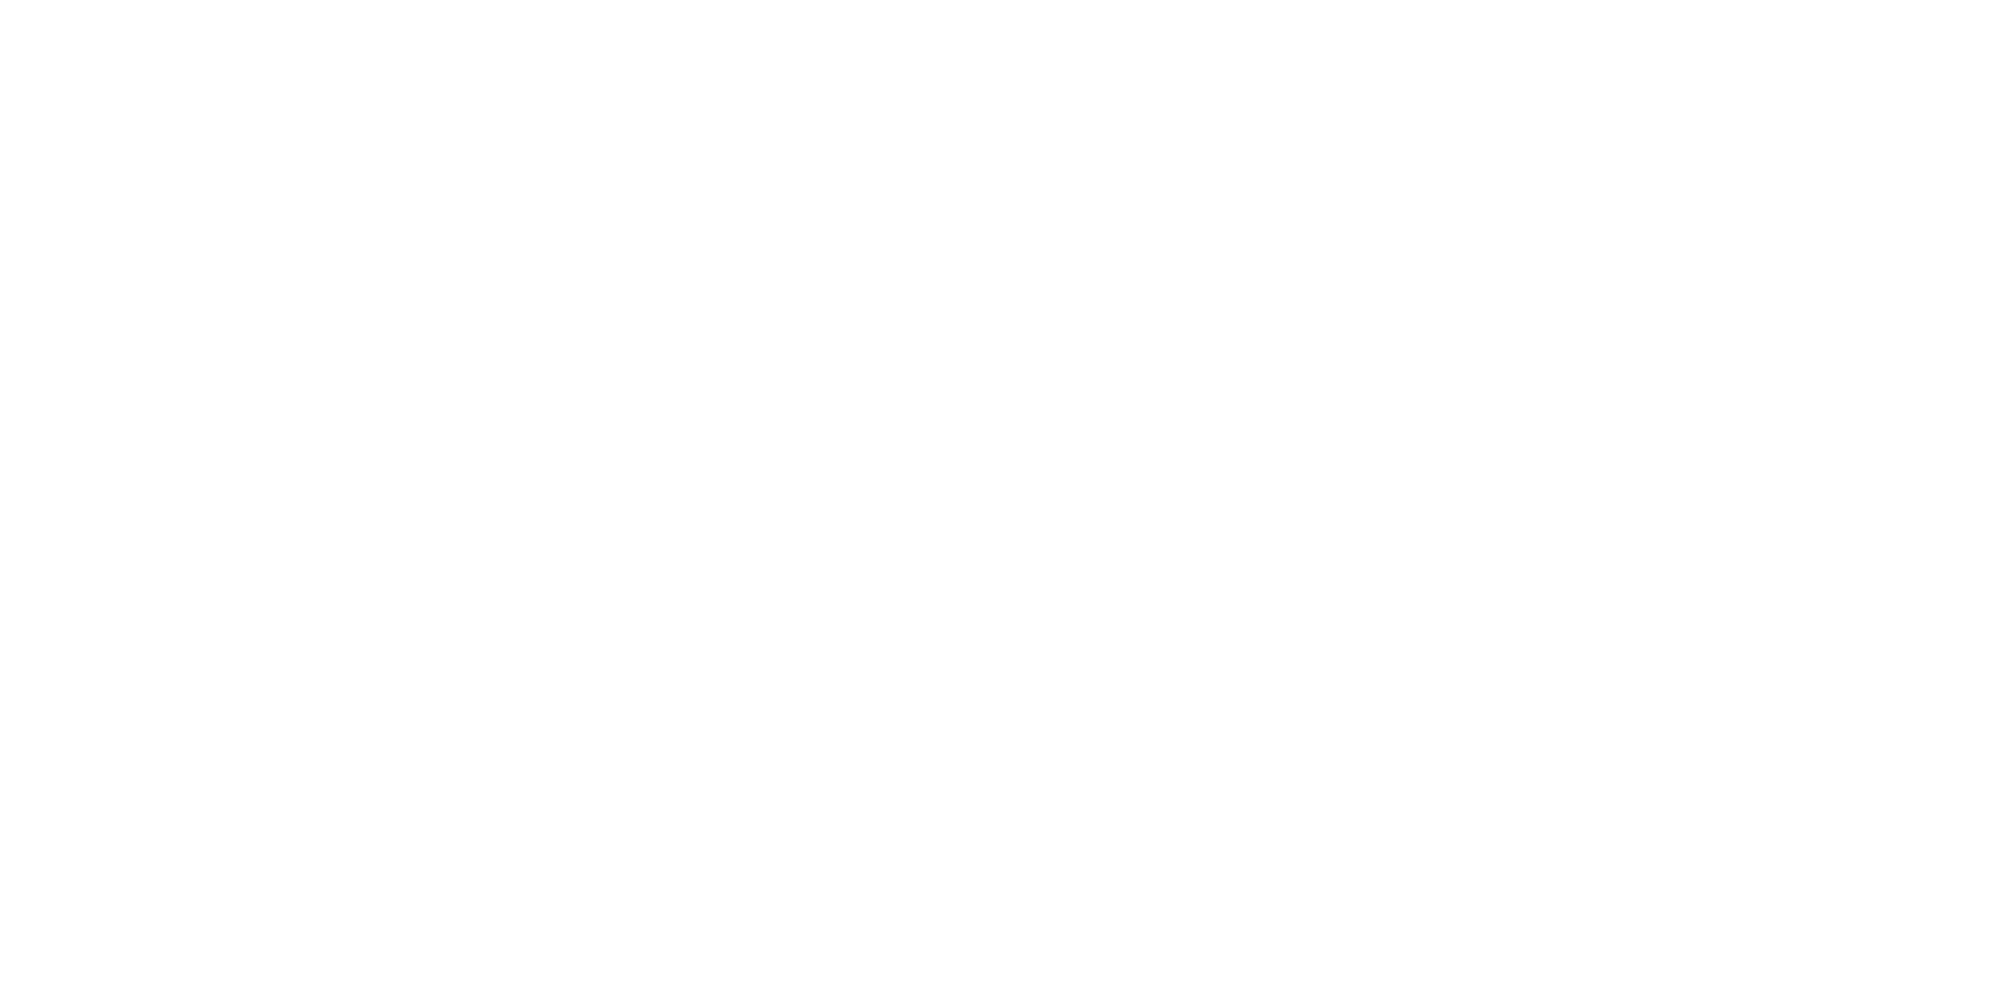

<IPython.core.display.Javascript object>


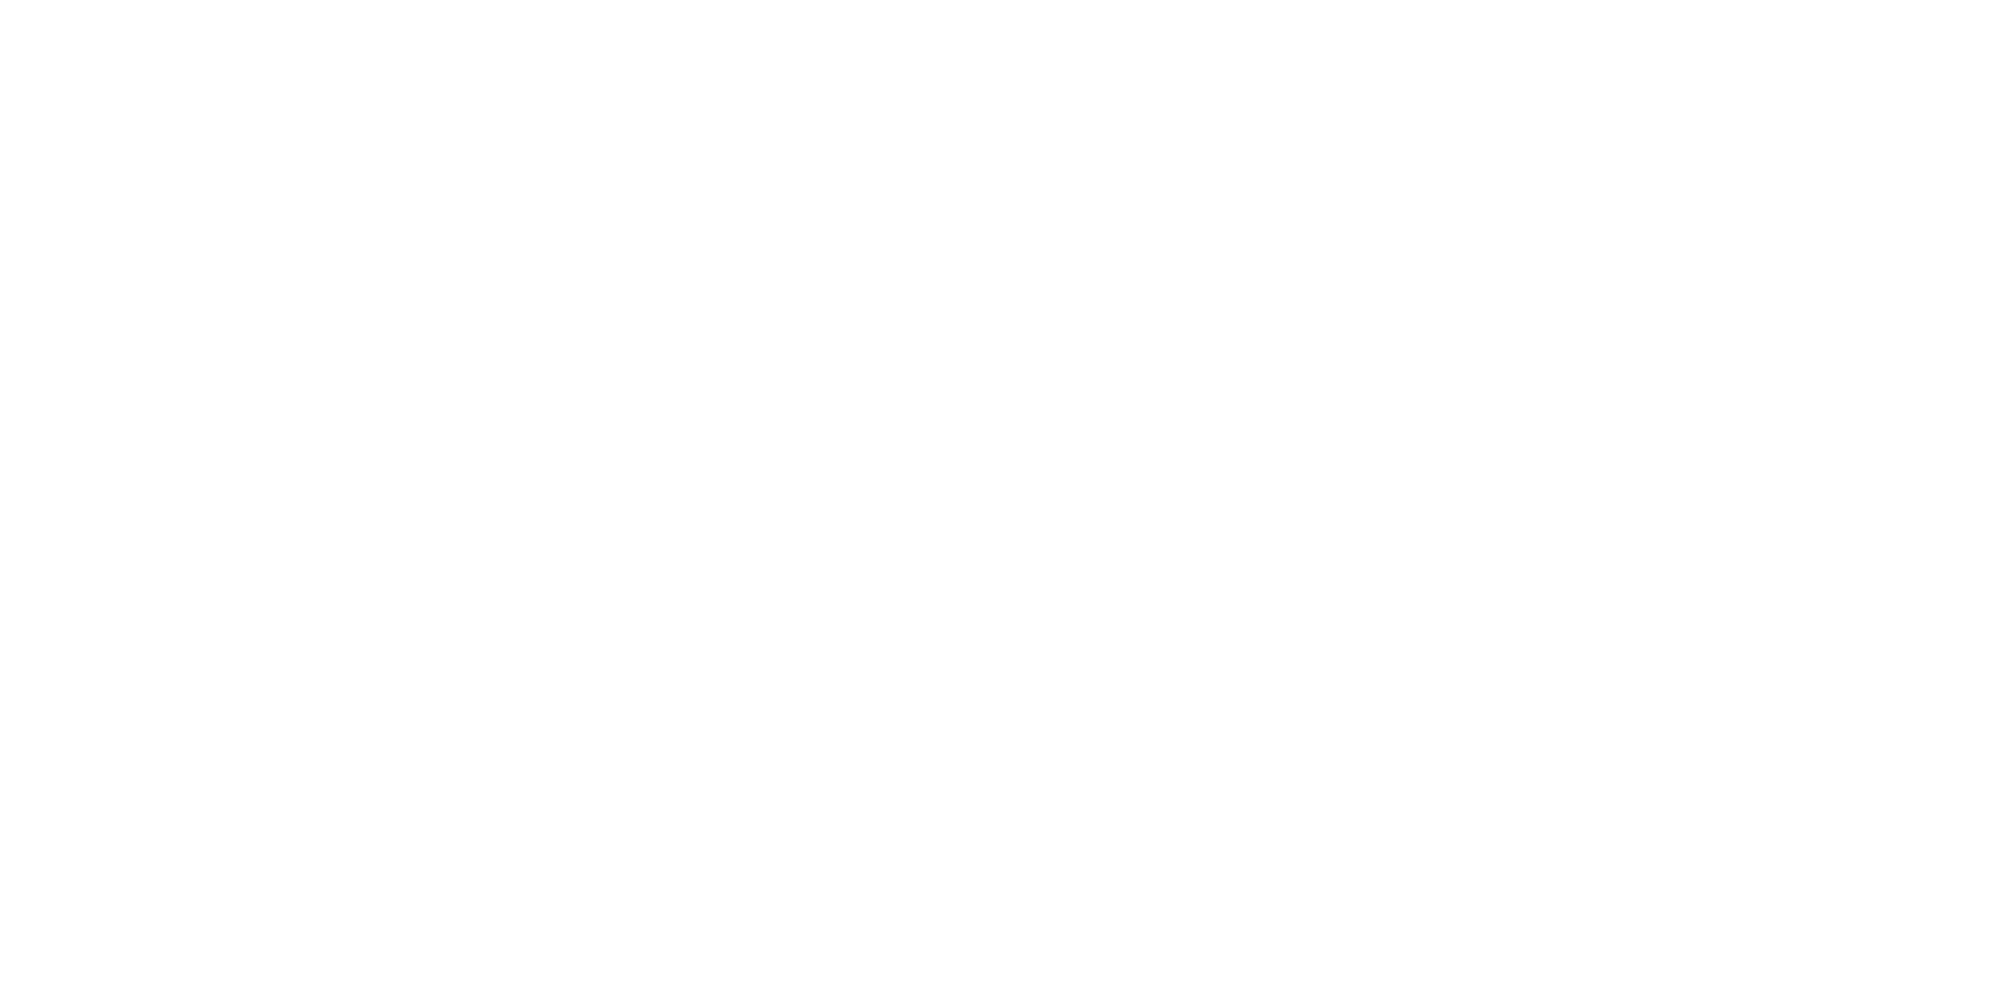

<IPython.core.display.Javascript object>


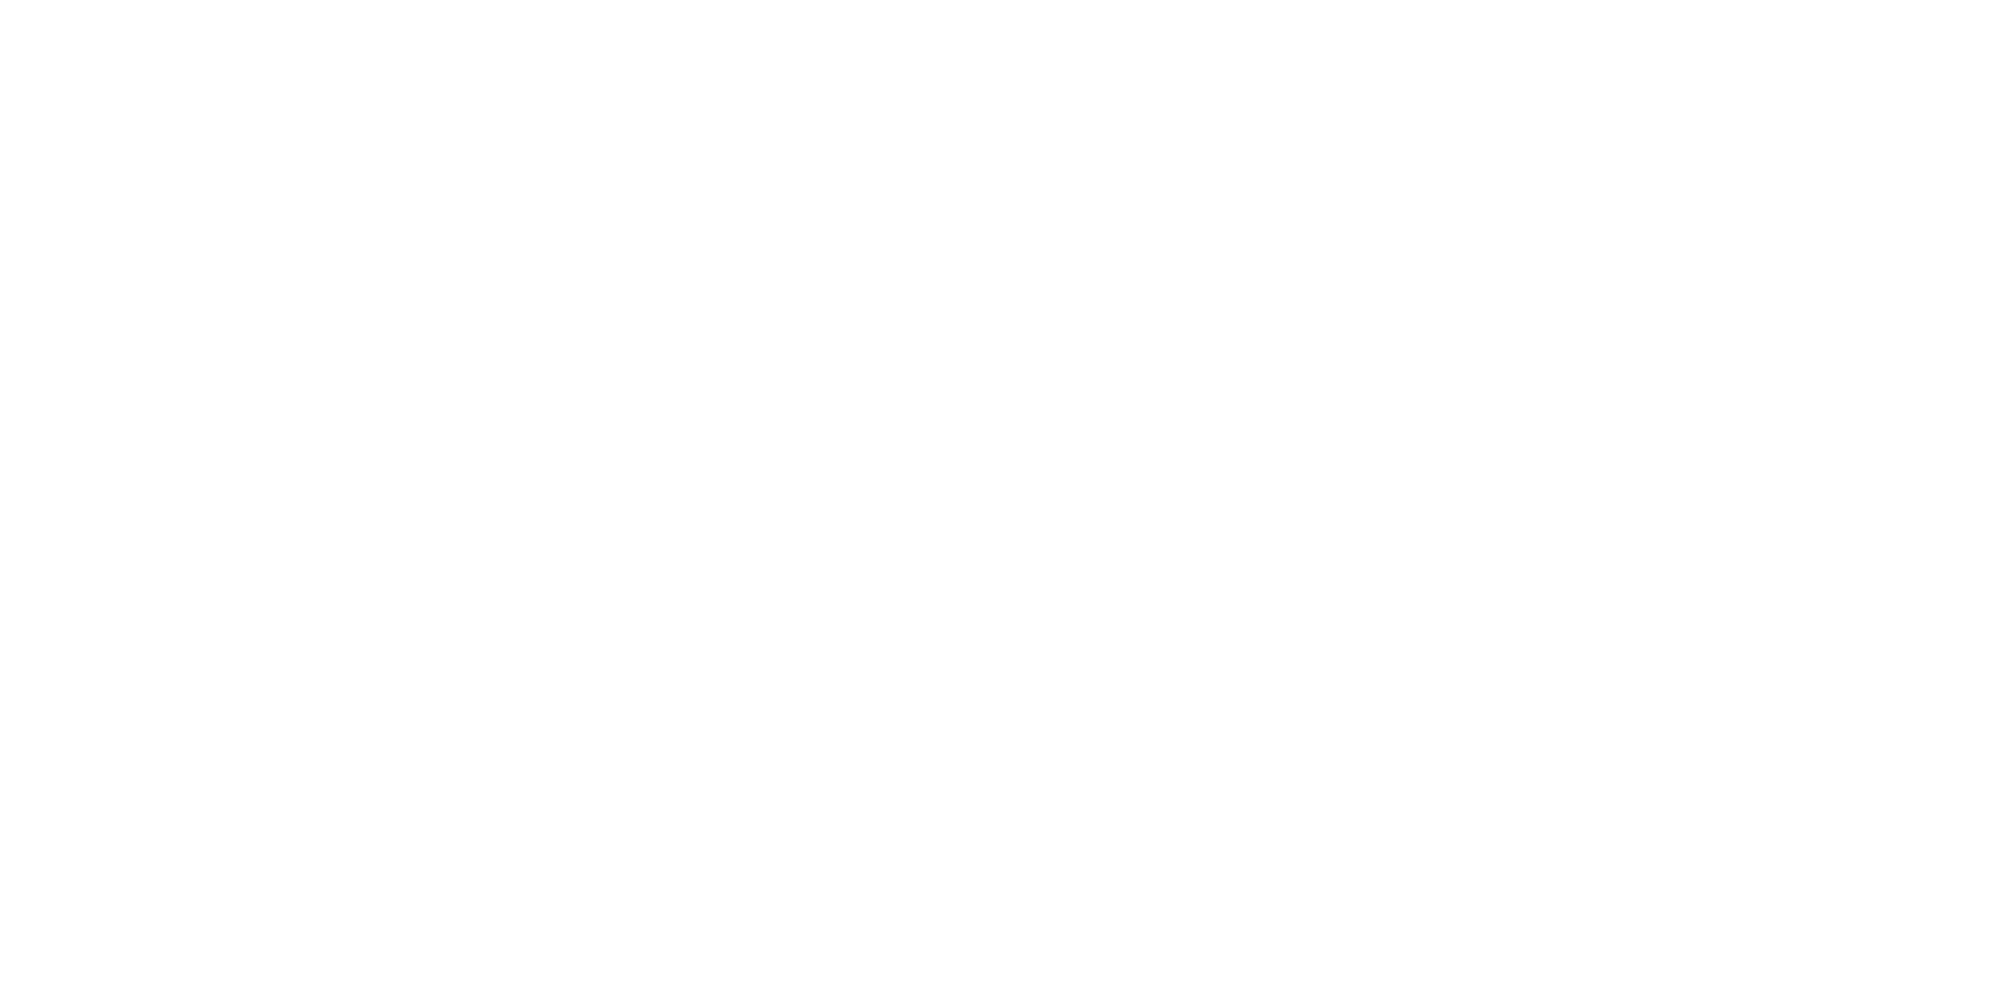

<IPython.core.display.Javascript object>


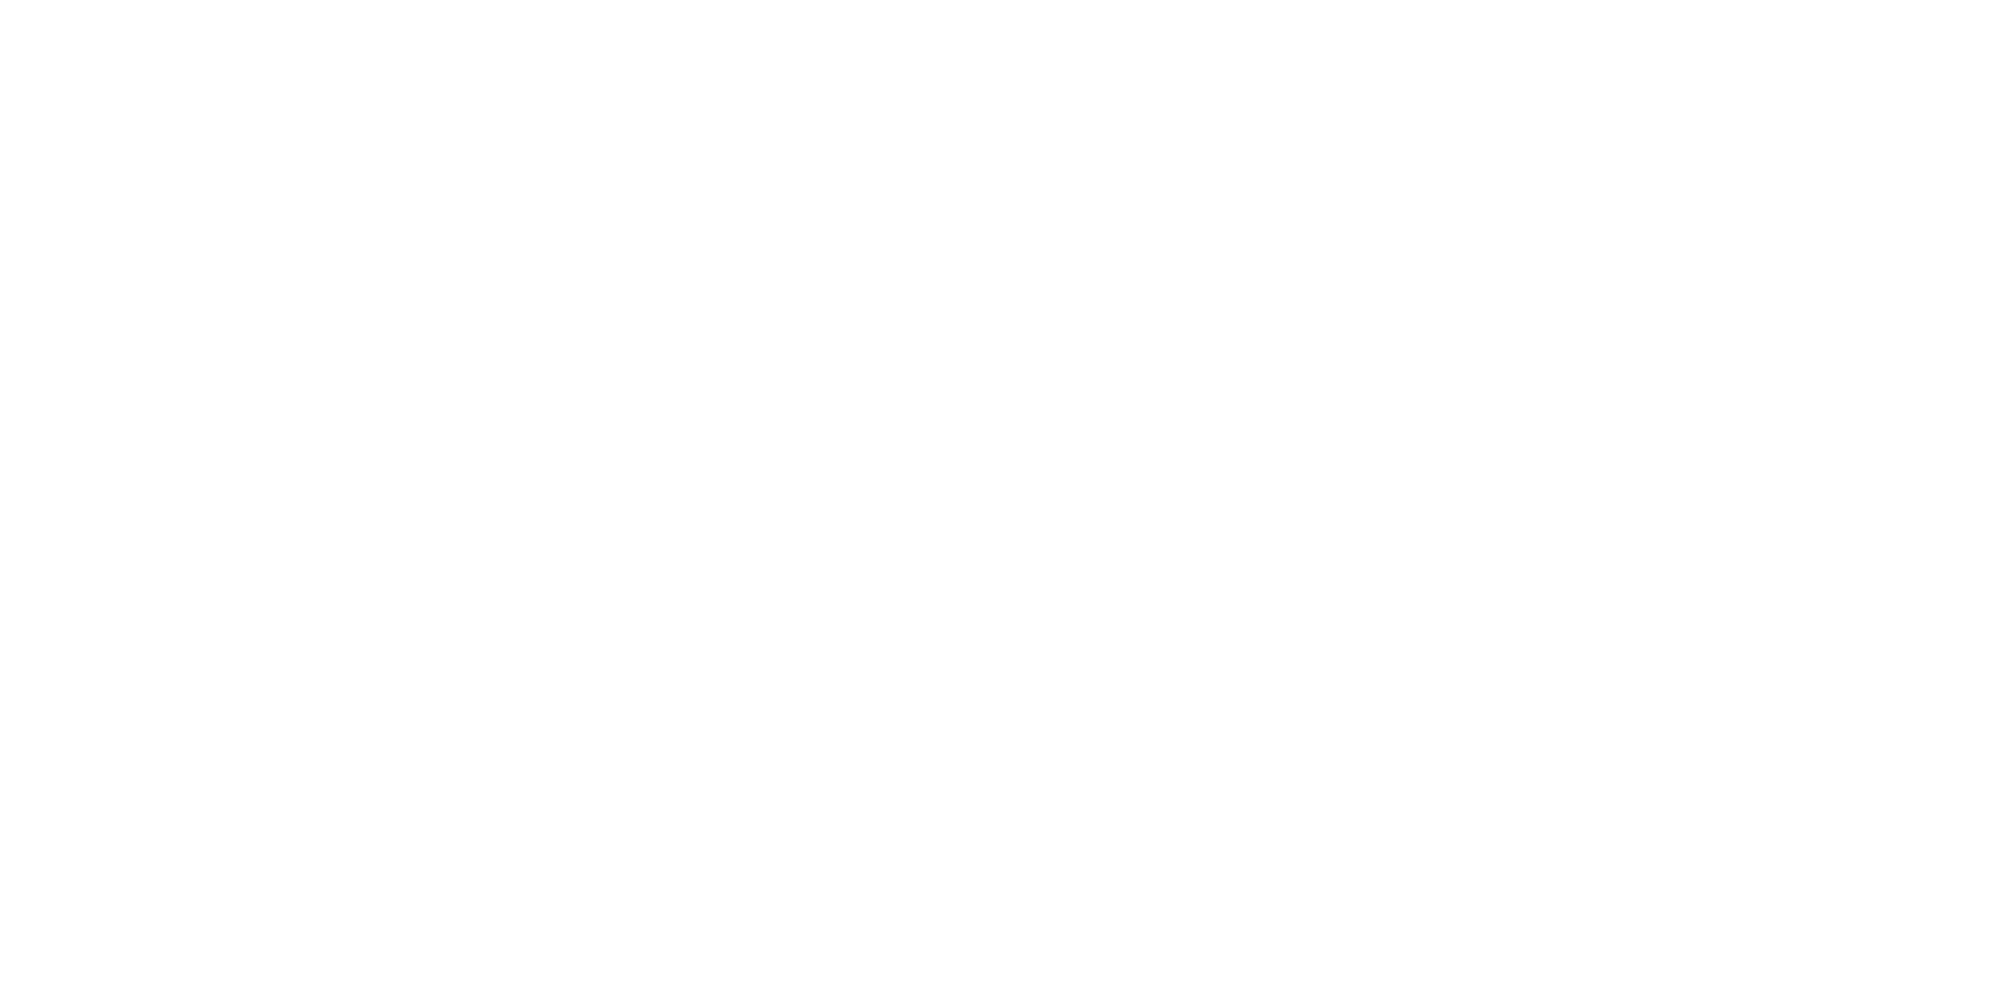

<IPython.core.display.Javascript object>


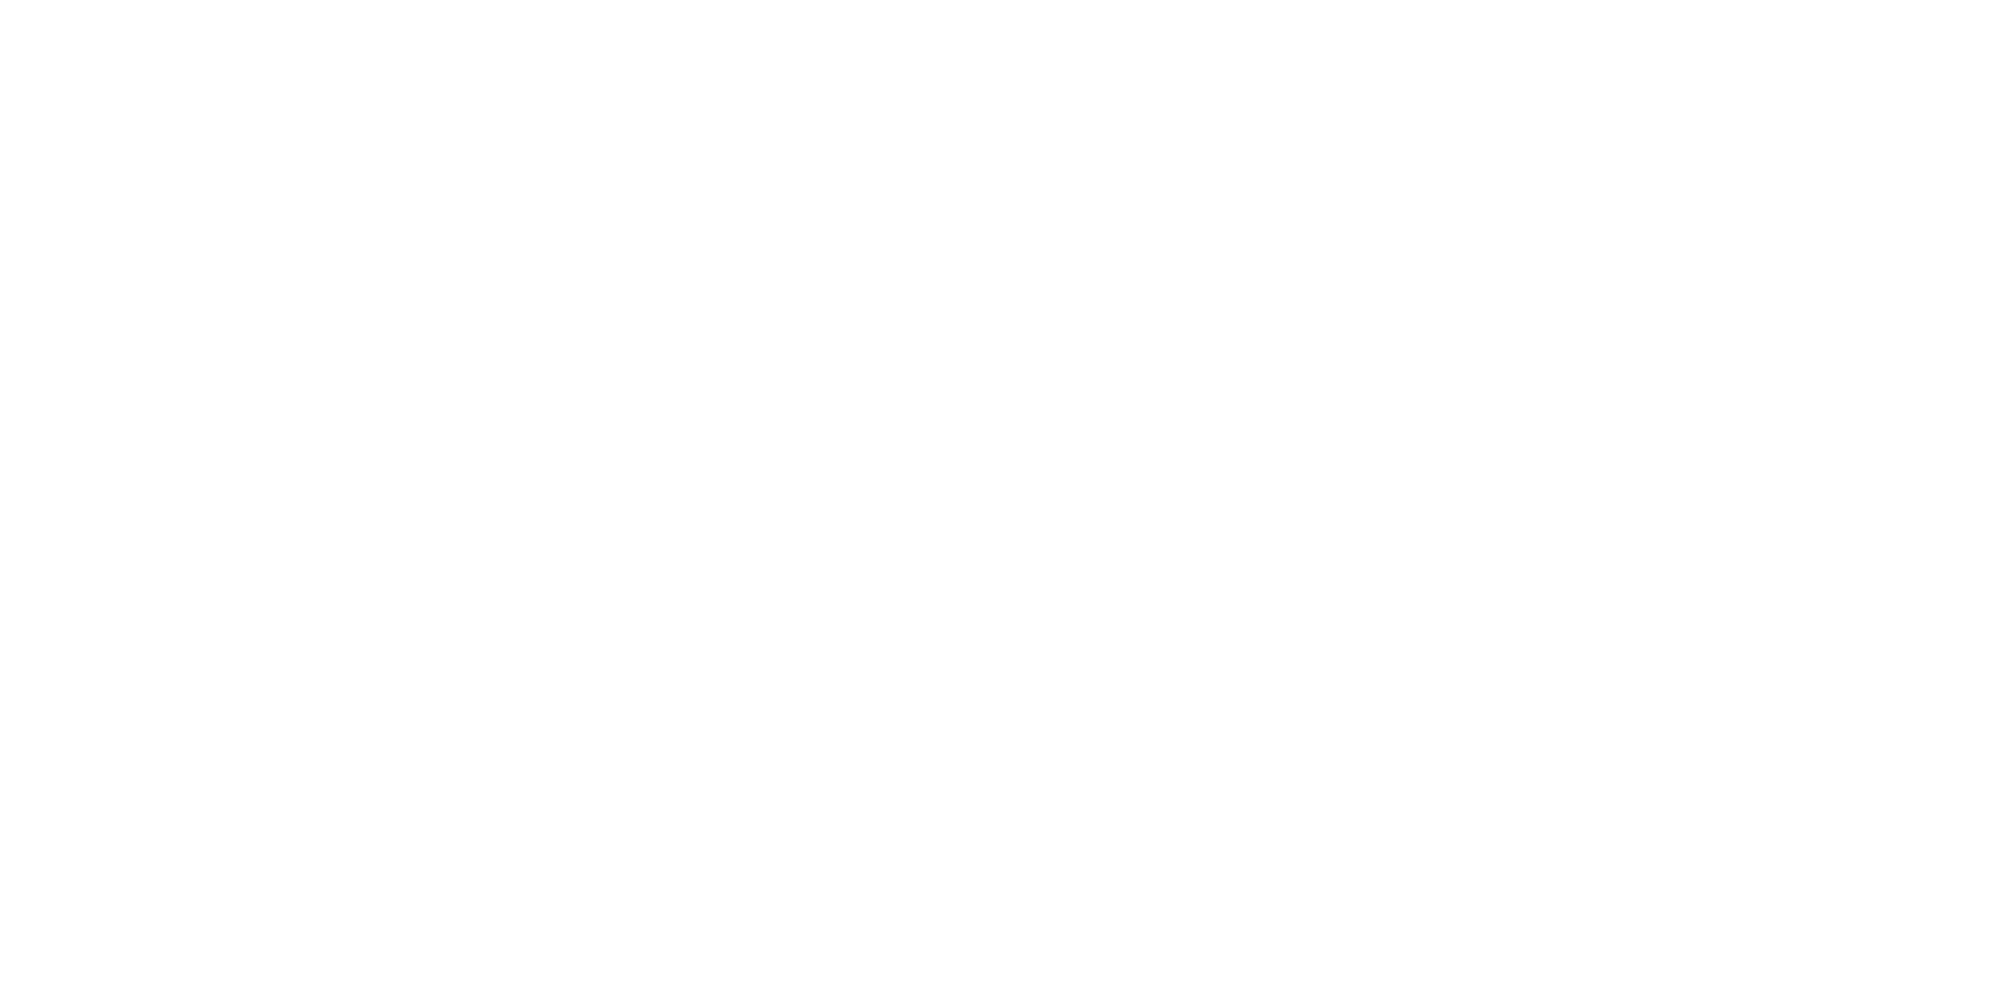

<IPython.core.display.Javascript object>


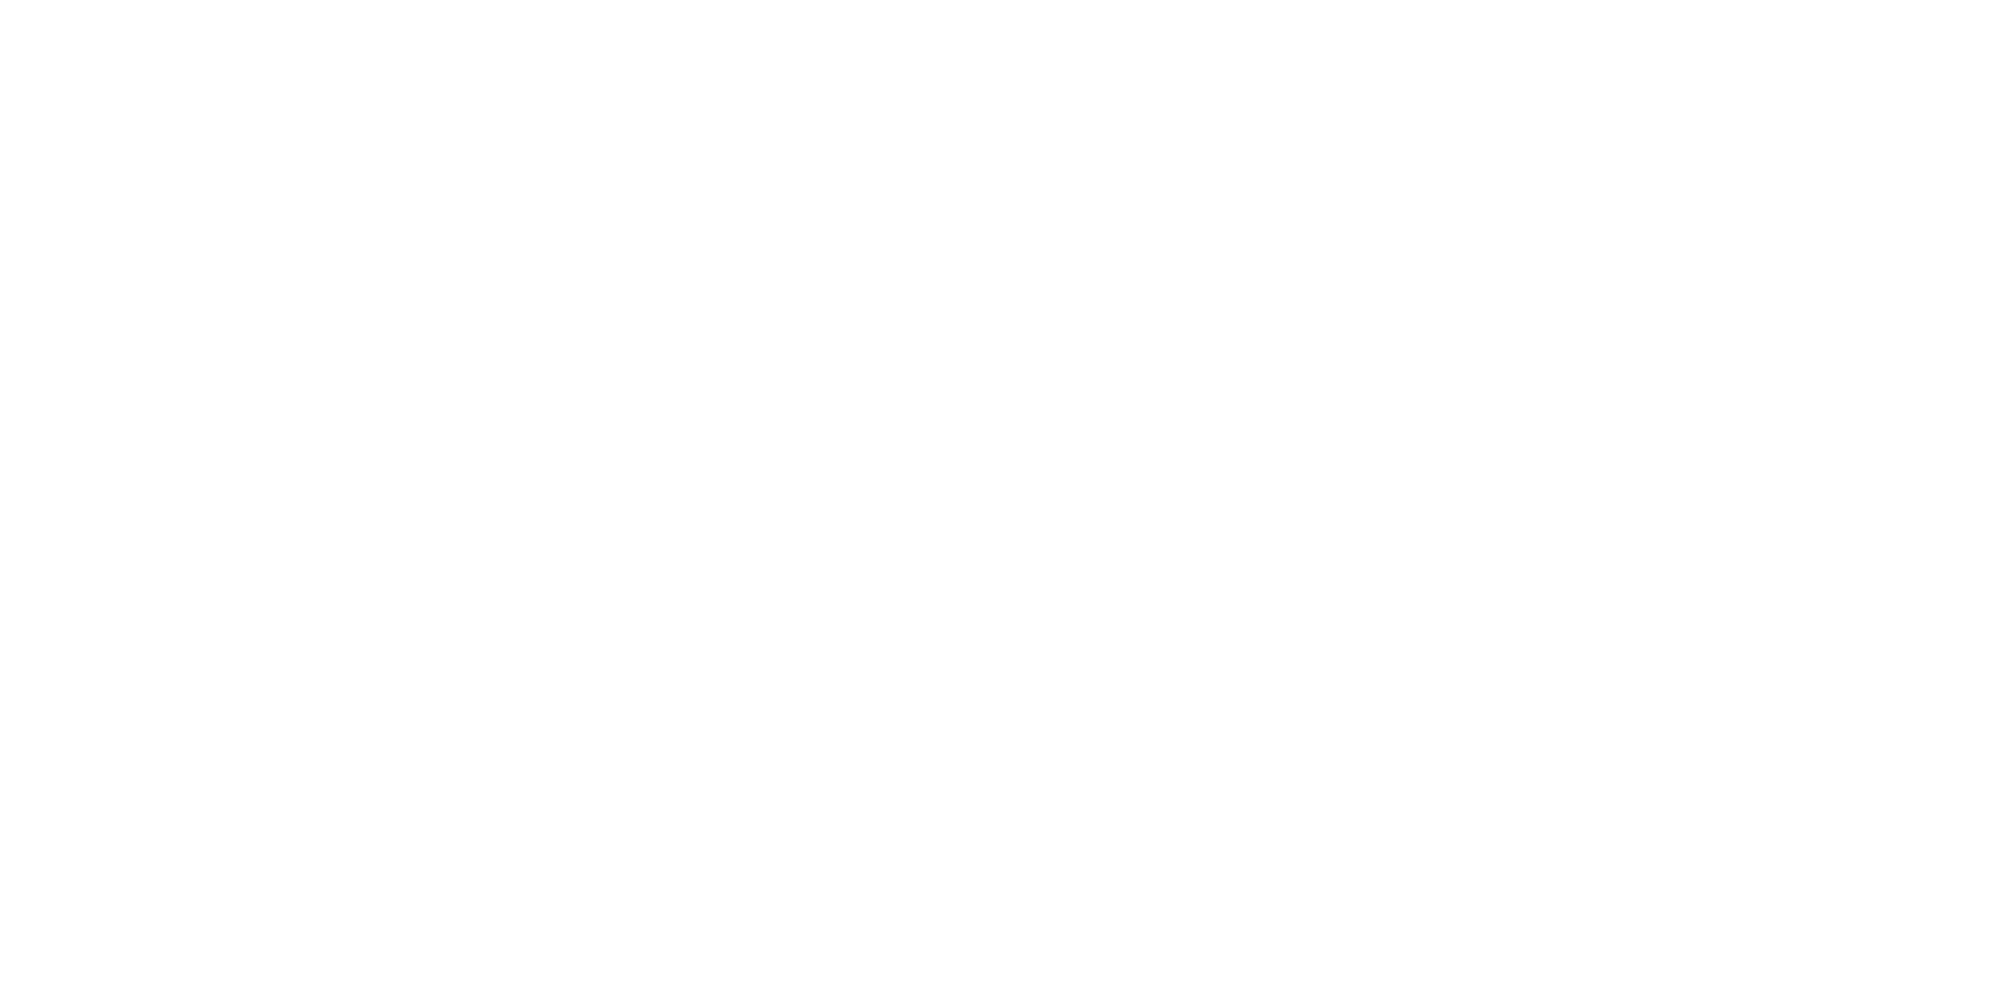

<IPython.core.display.Javascript object>


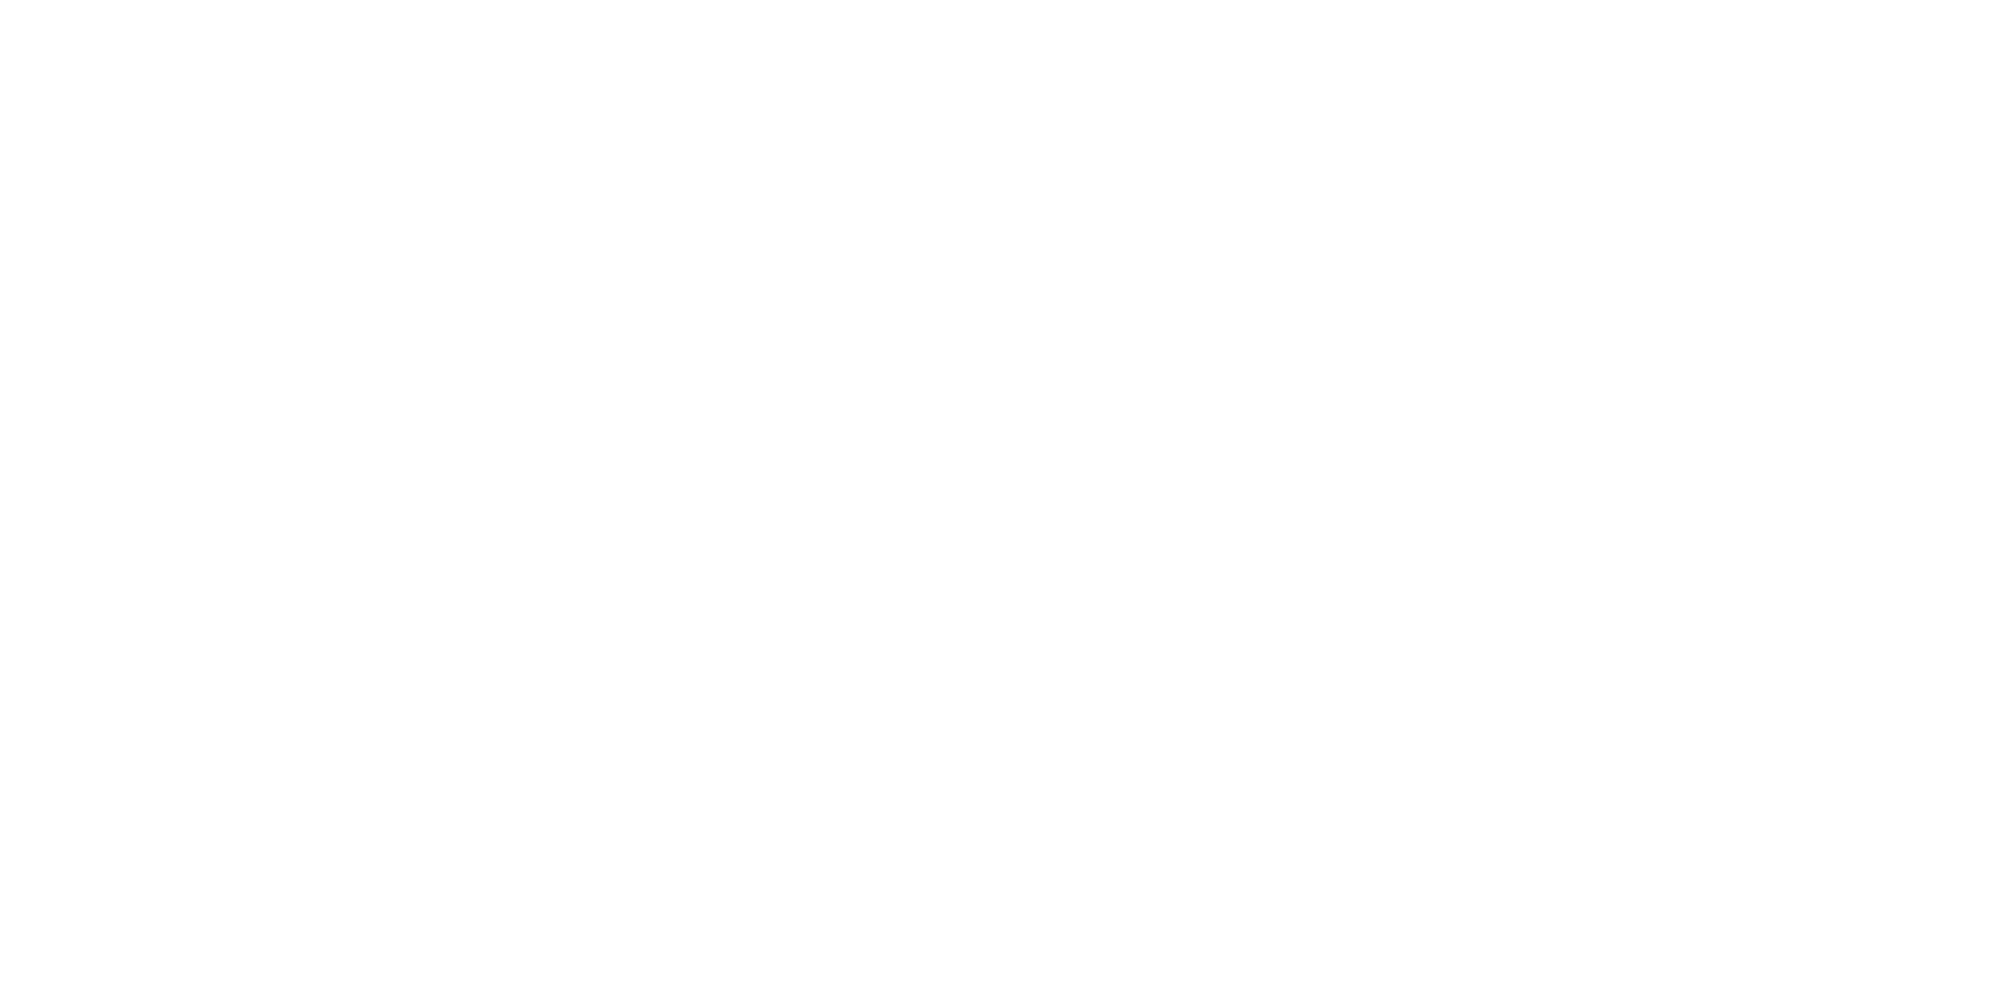

<IPython.core.display.Javascript object>


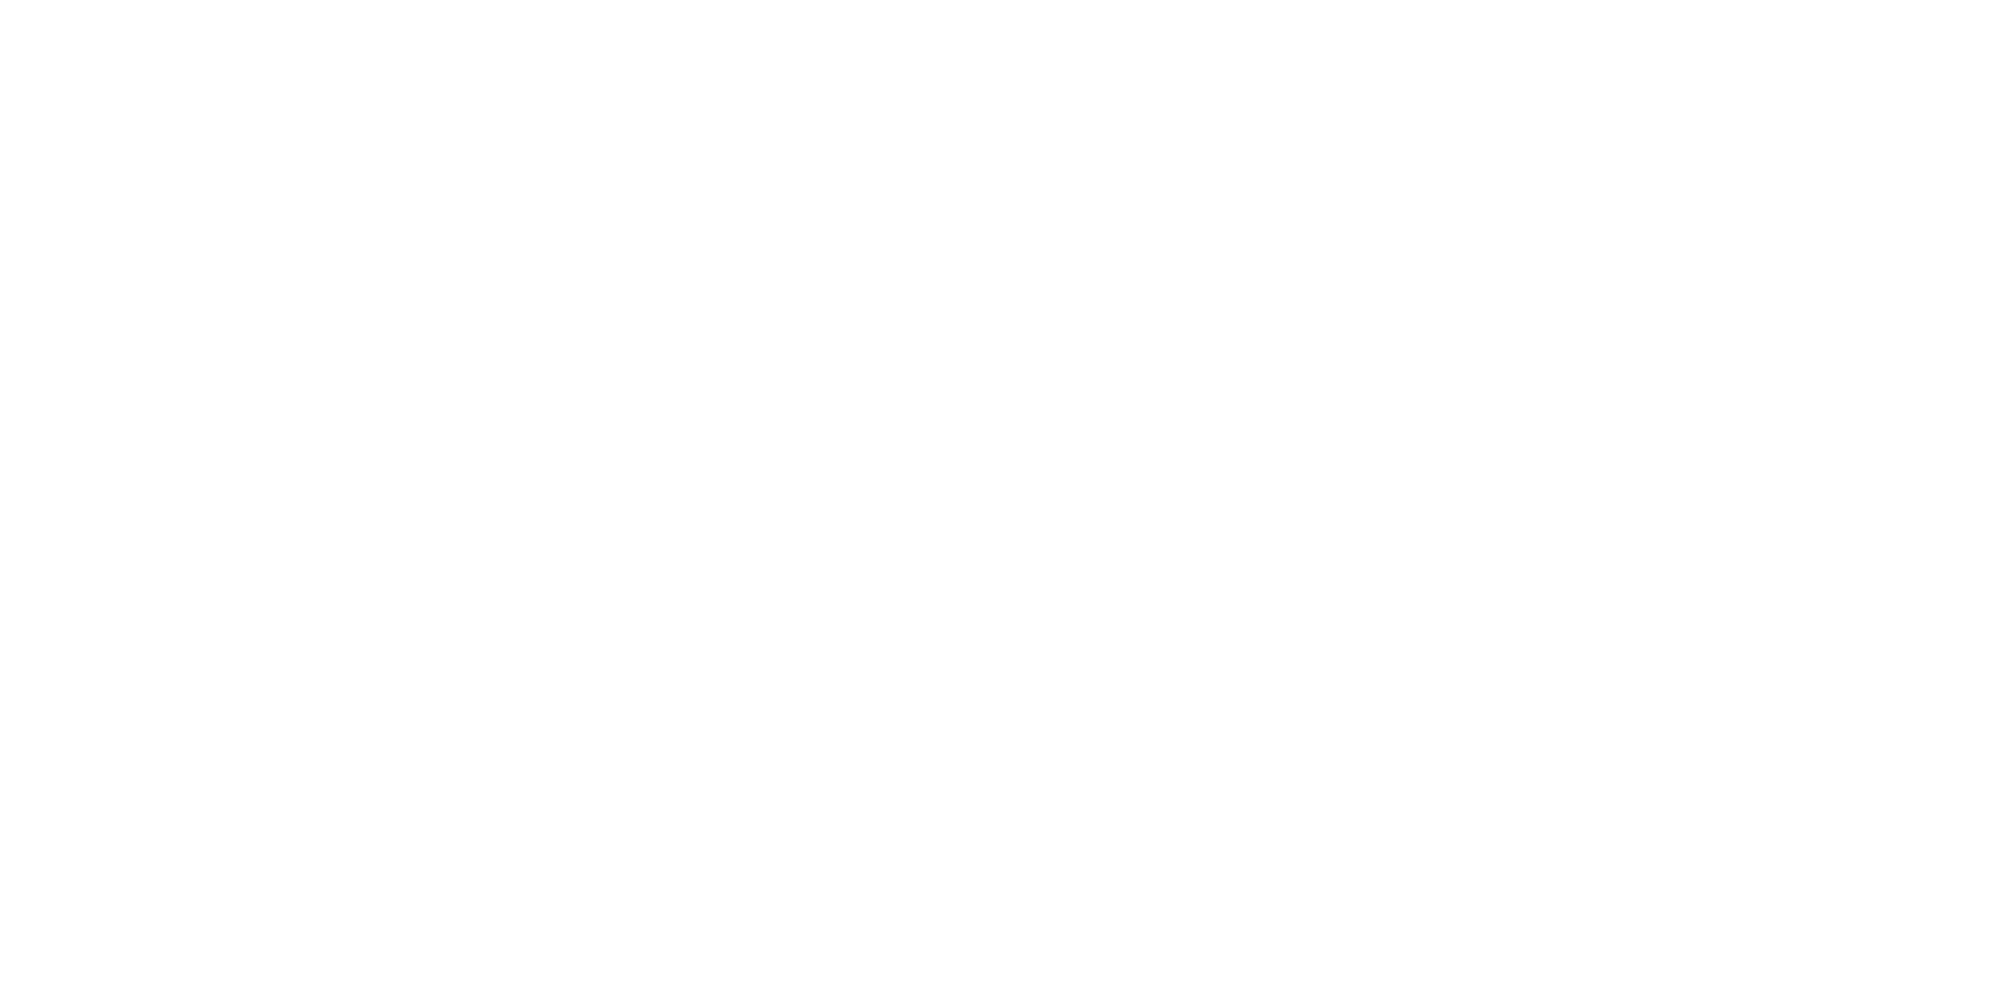

<IPython.core.display.Javascript object>


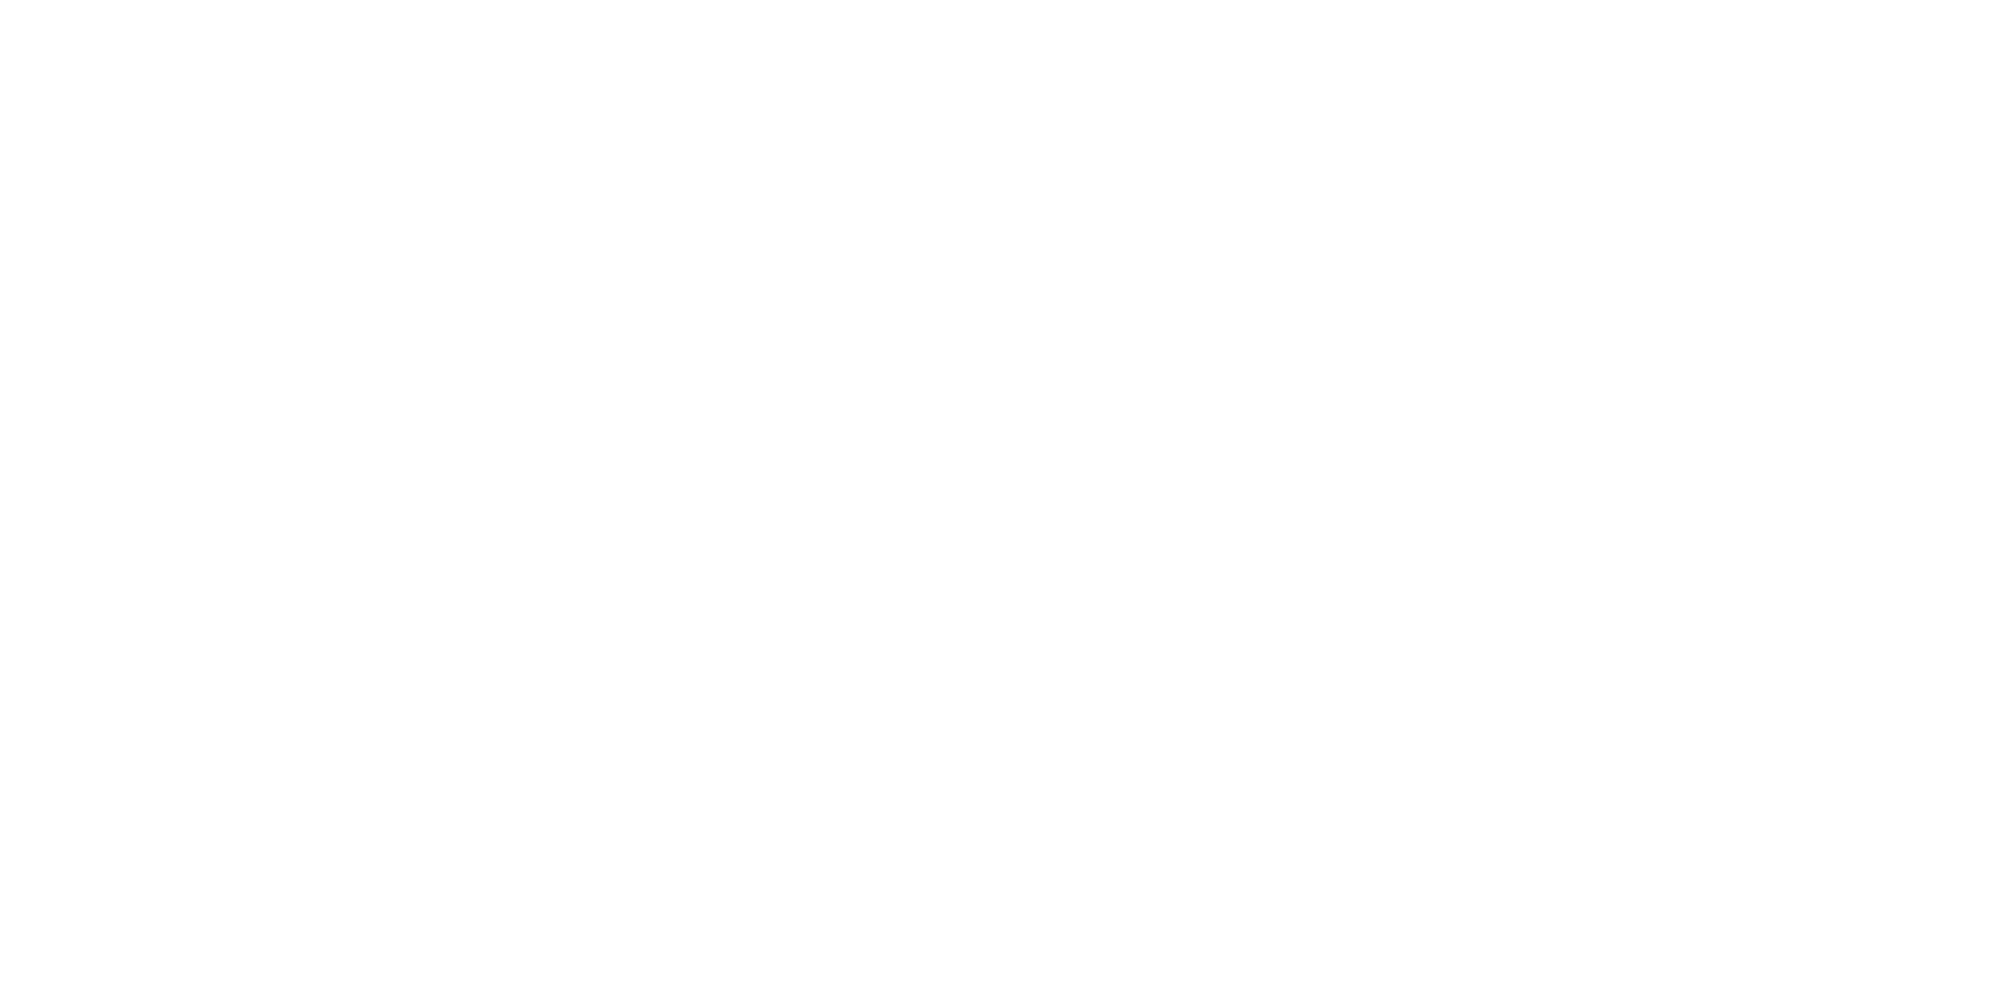

<IPython.core.display.Javascript object>


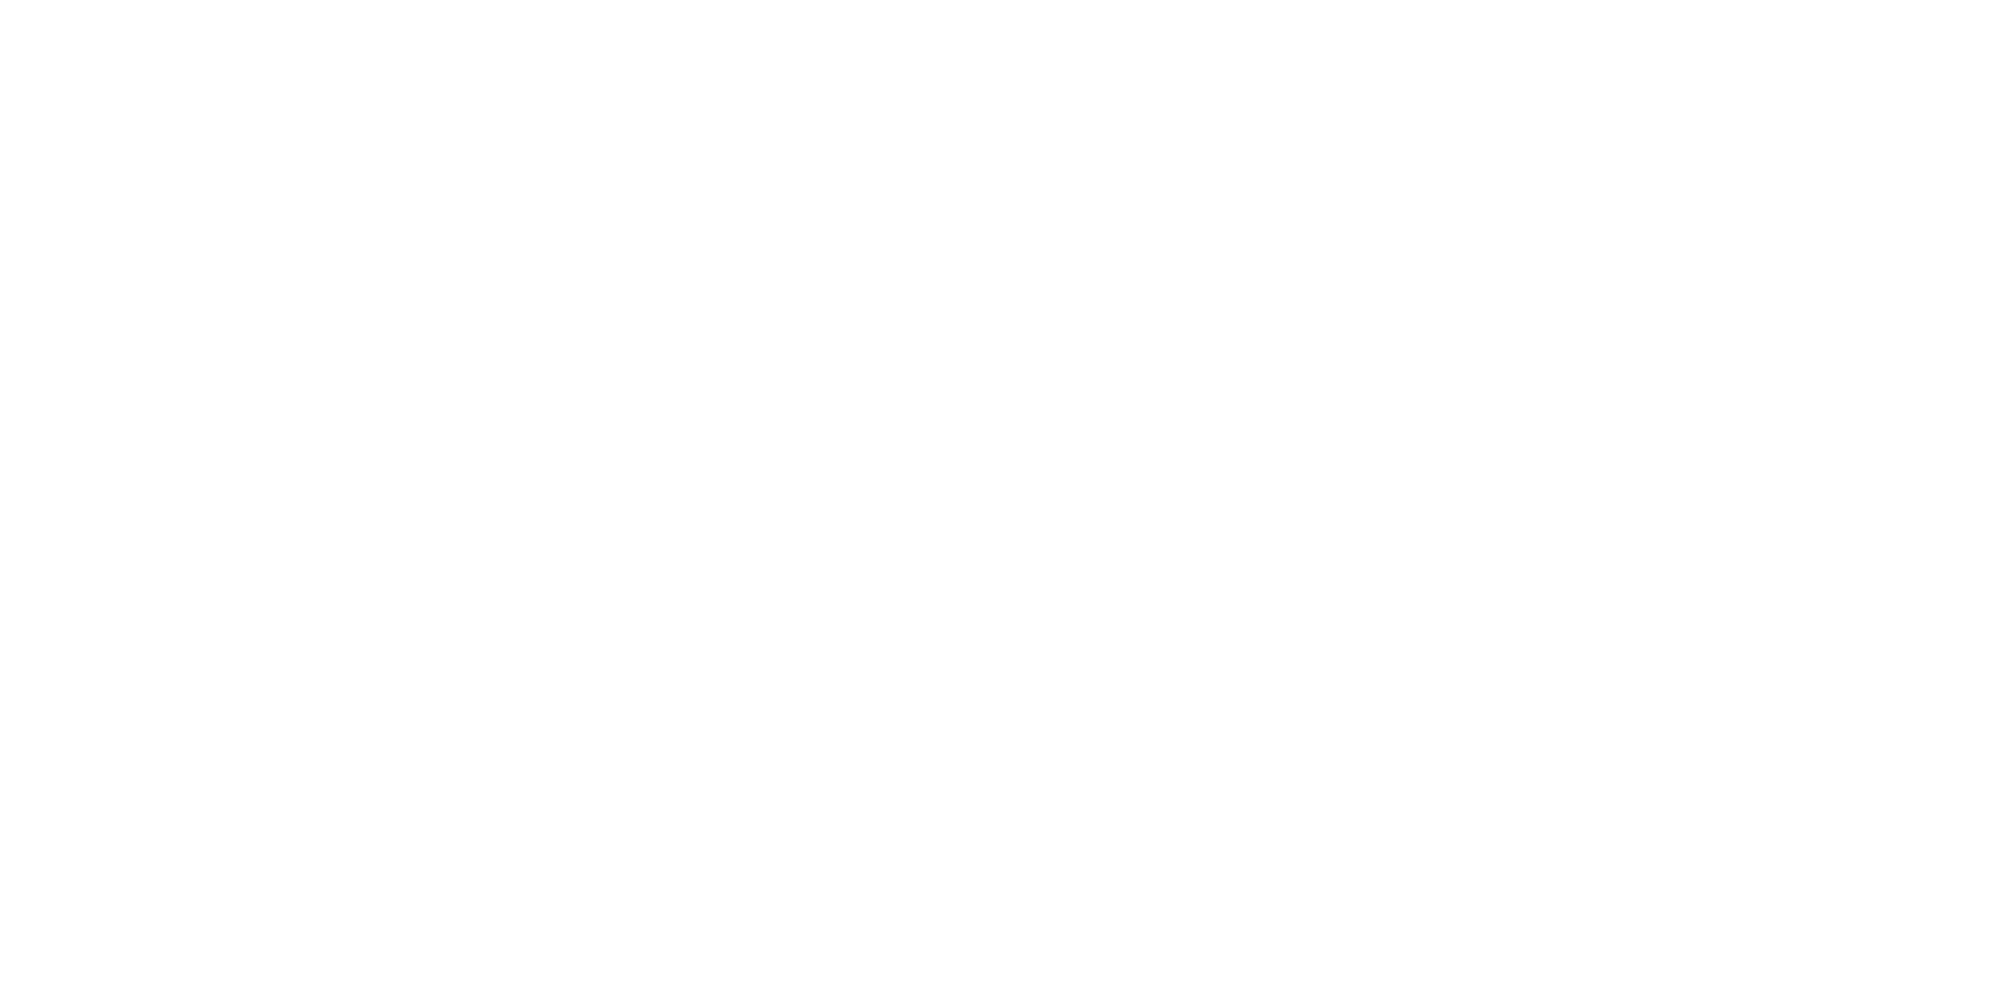

<IPython.core.display.Javascript object>


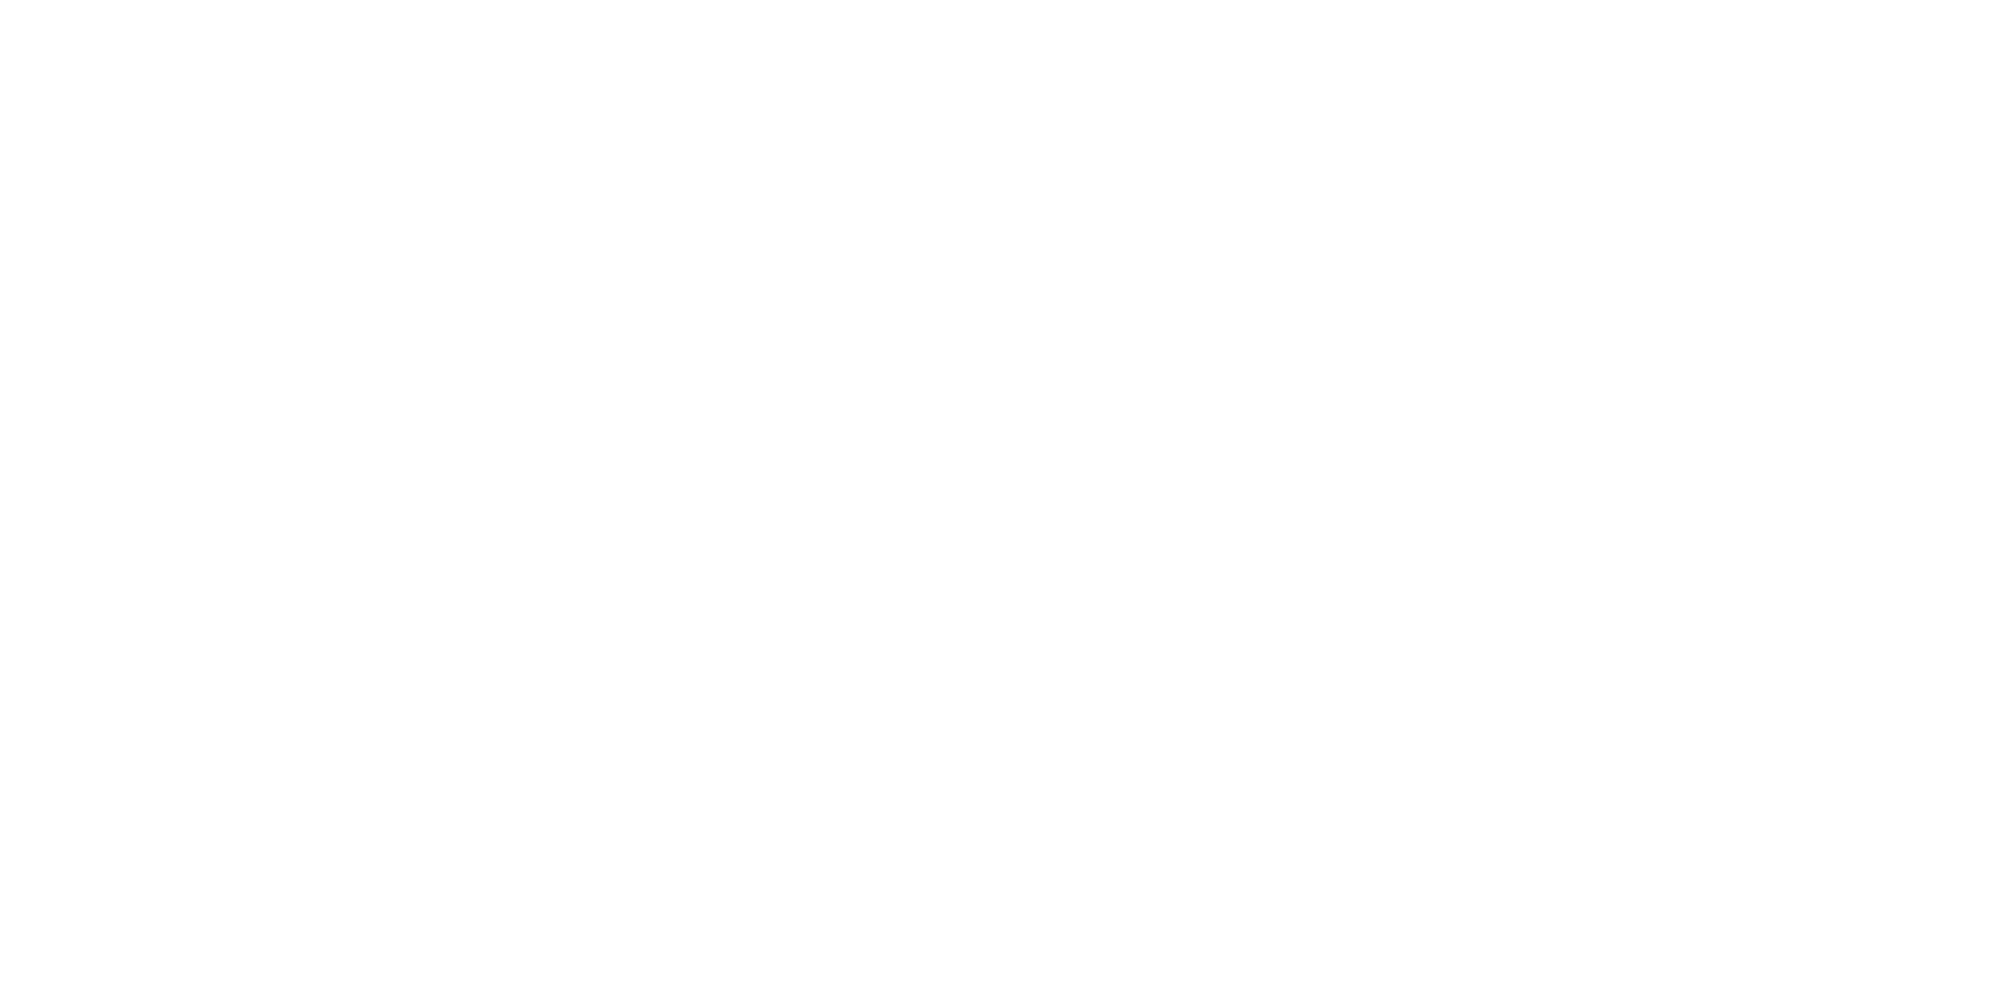

<IPython.core.display.Javascript object>


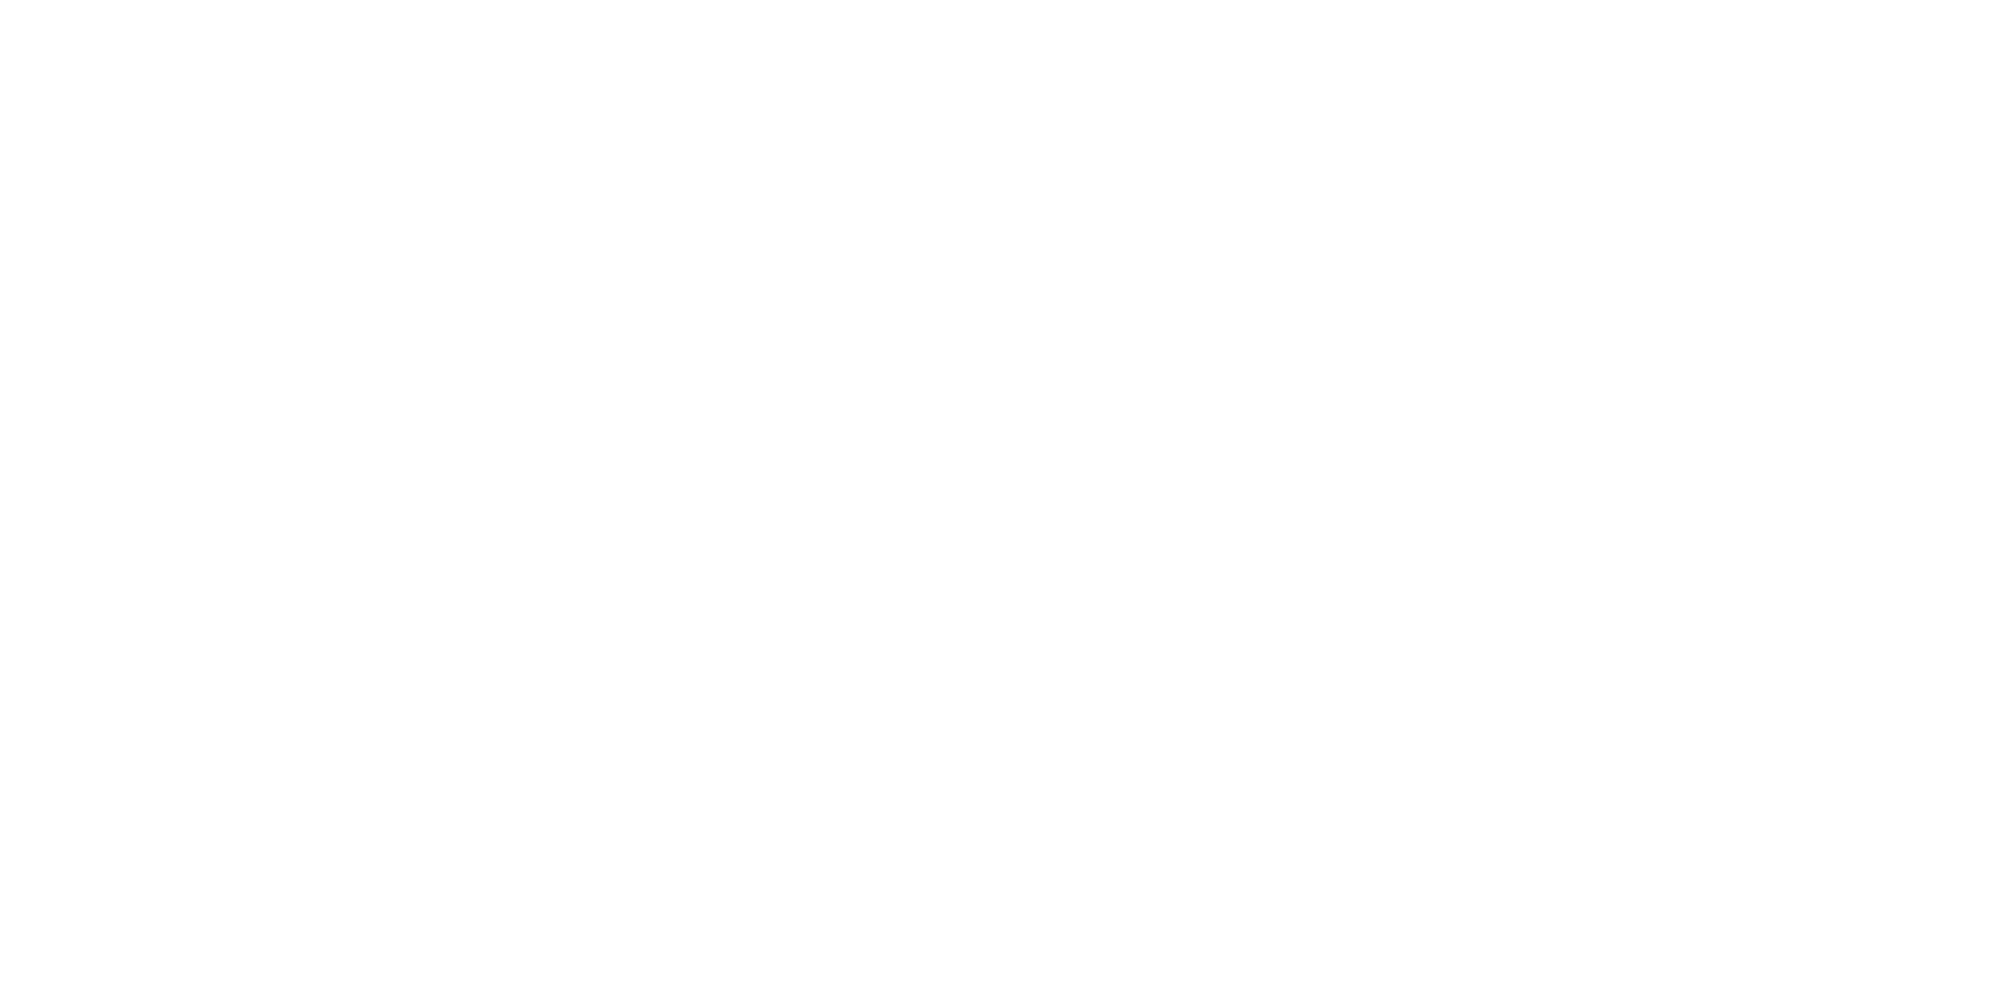

<IPython.core.display.Javascript object>


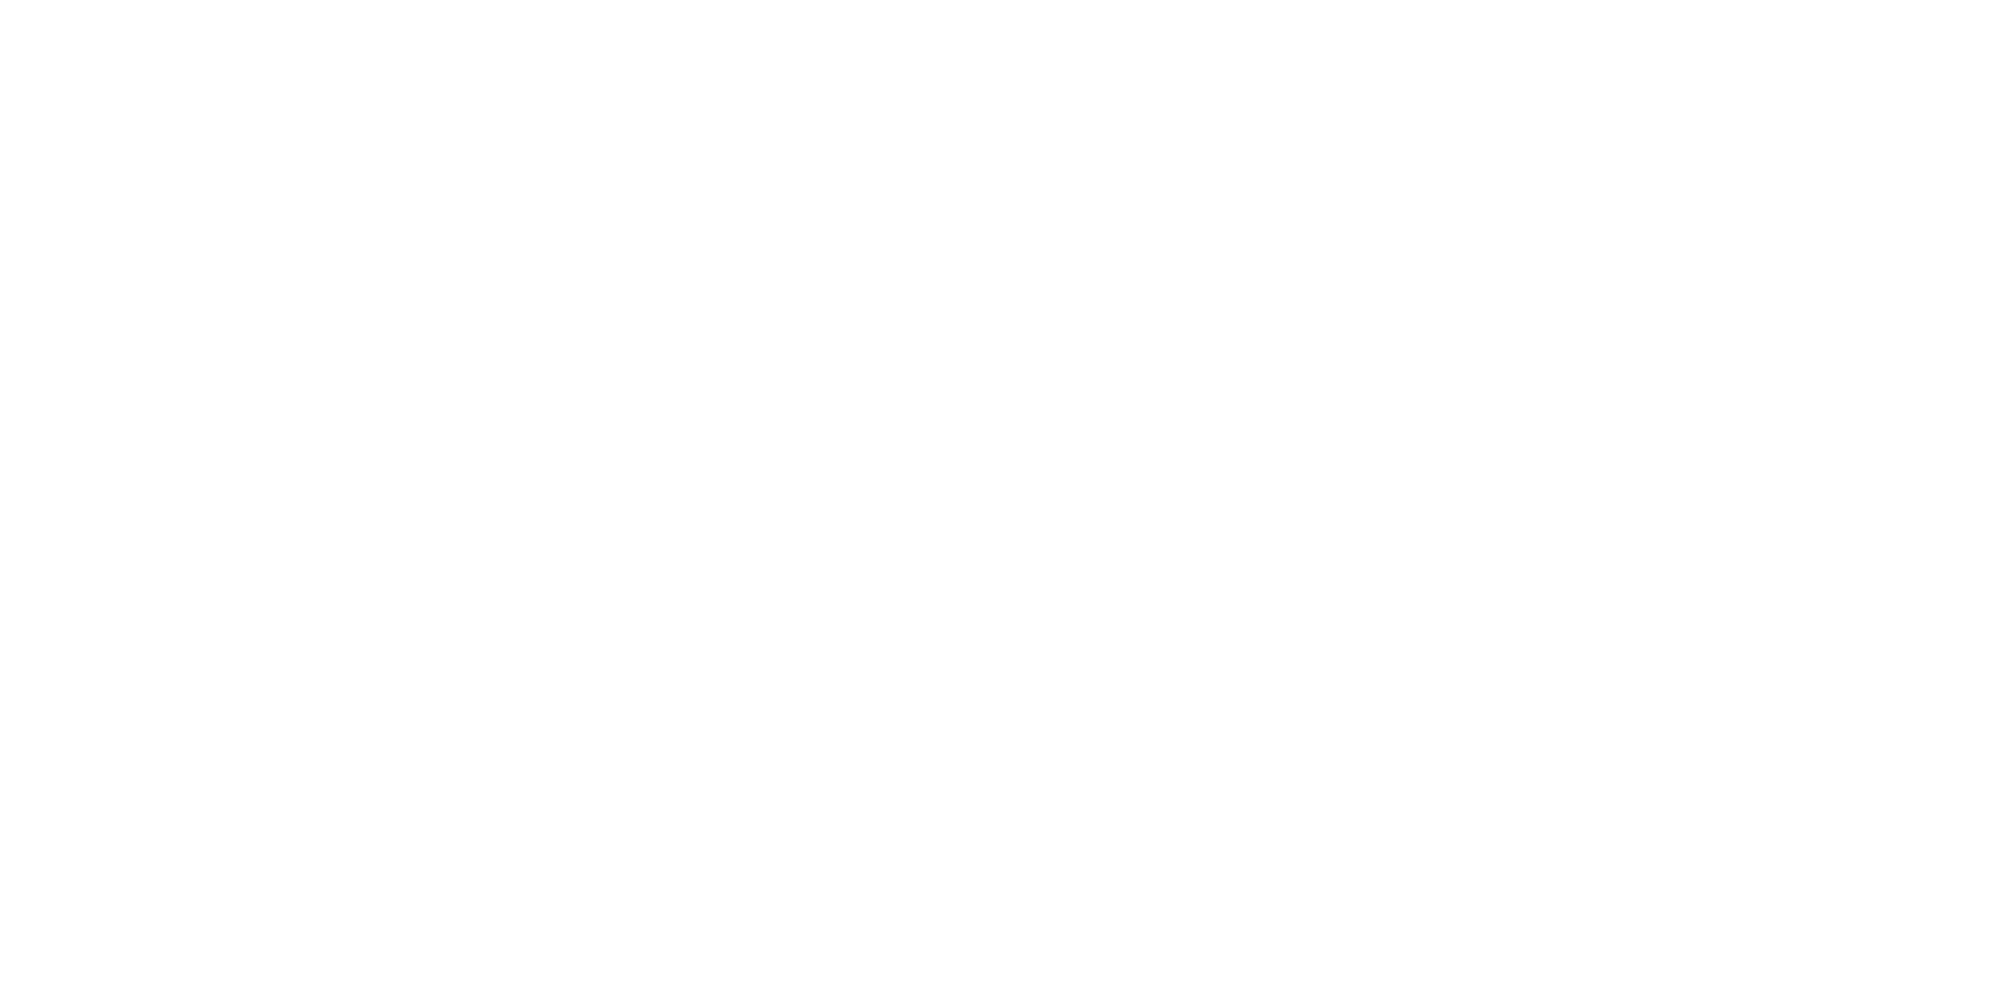

<IPython.core.display.Javascript object>


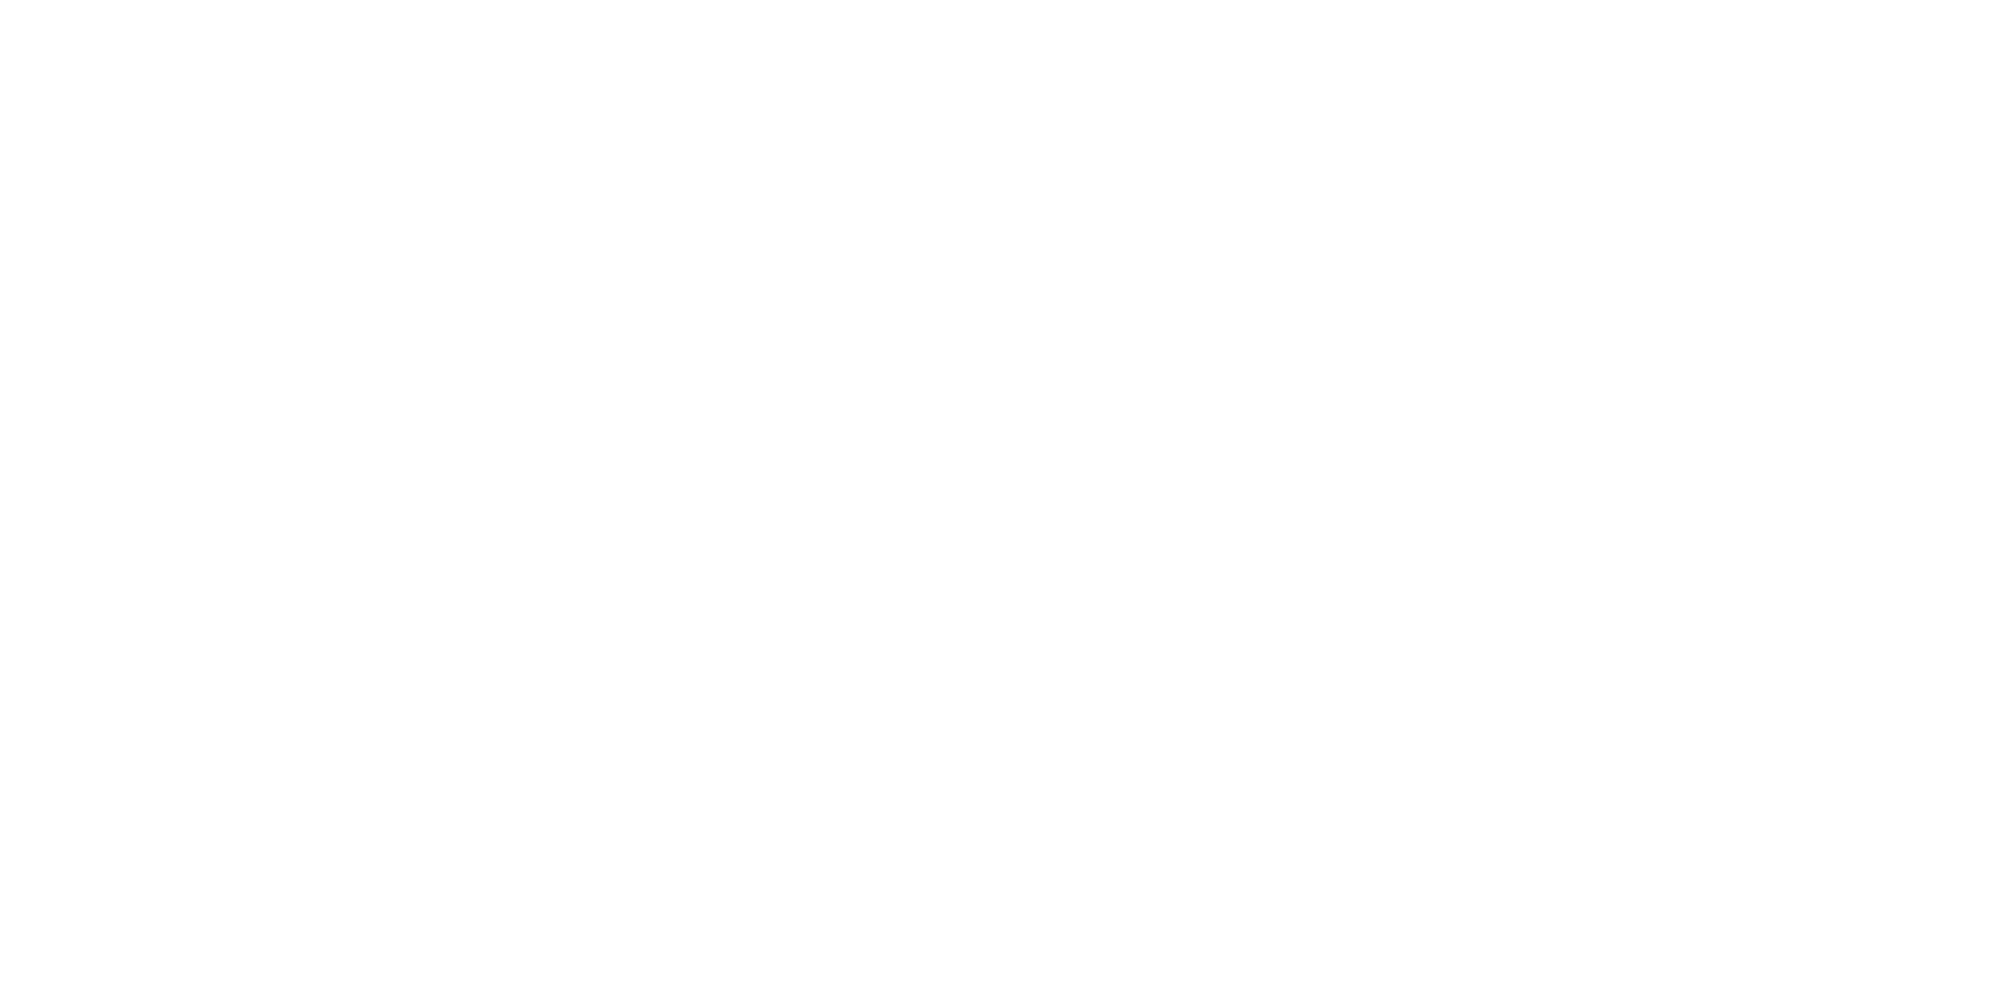

<IPython.core.display.Javascript object>


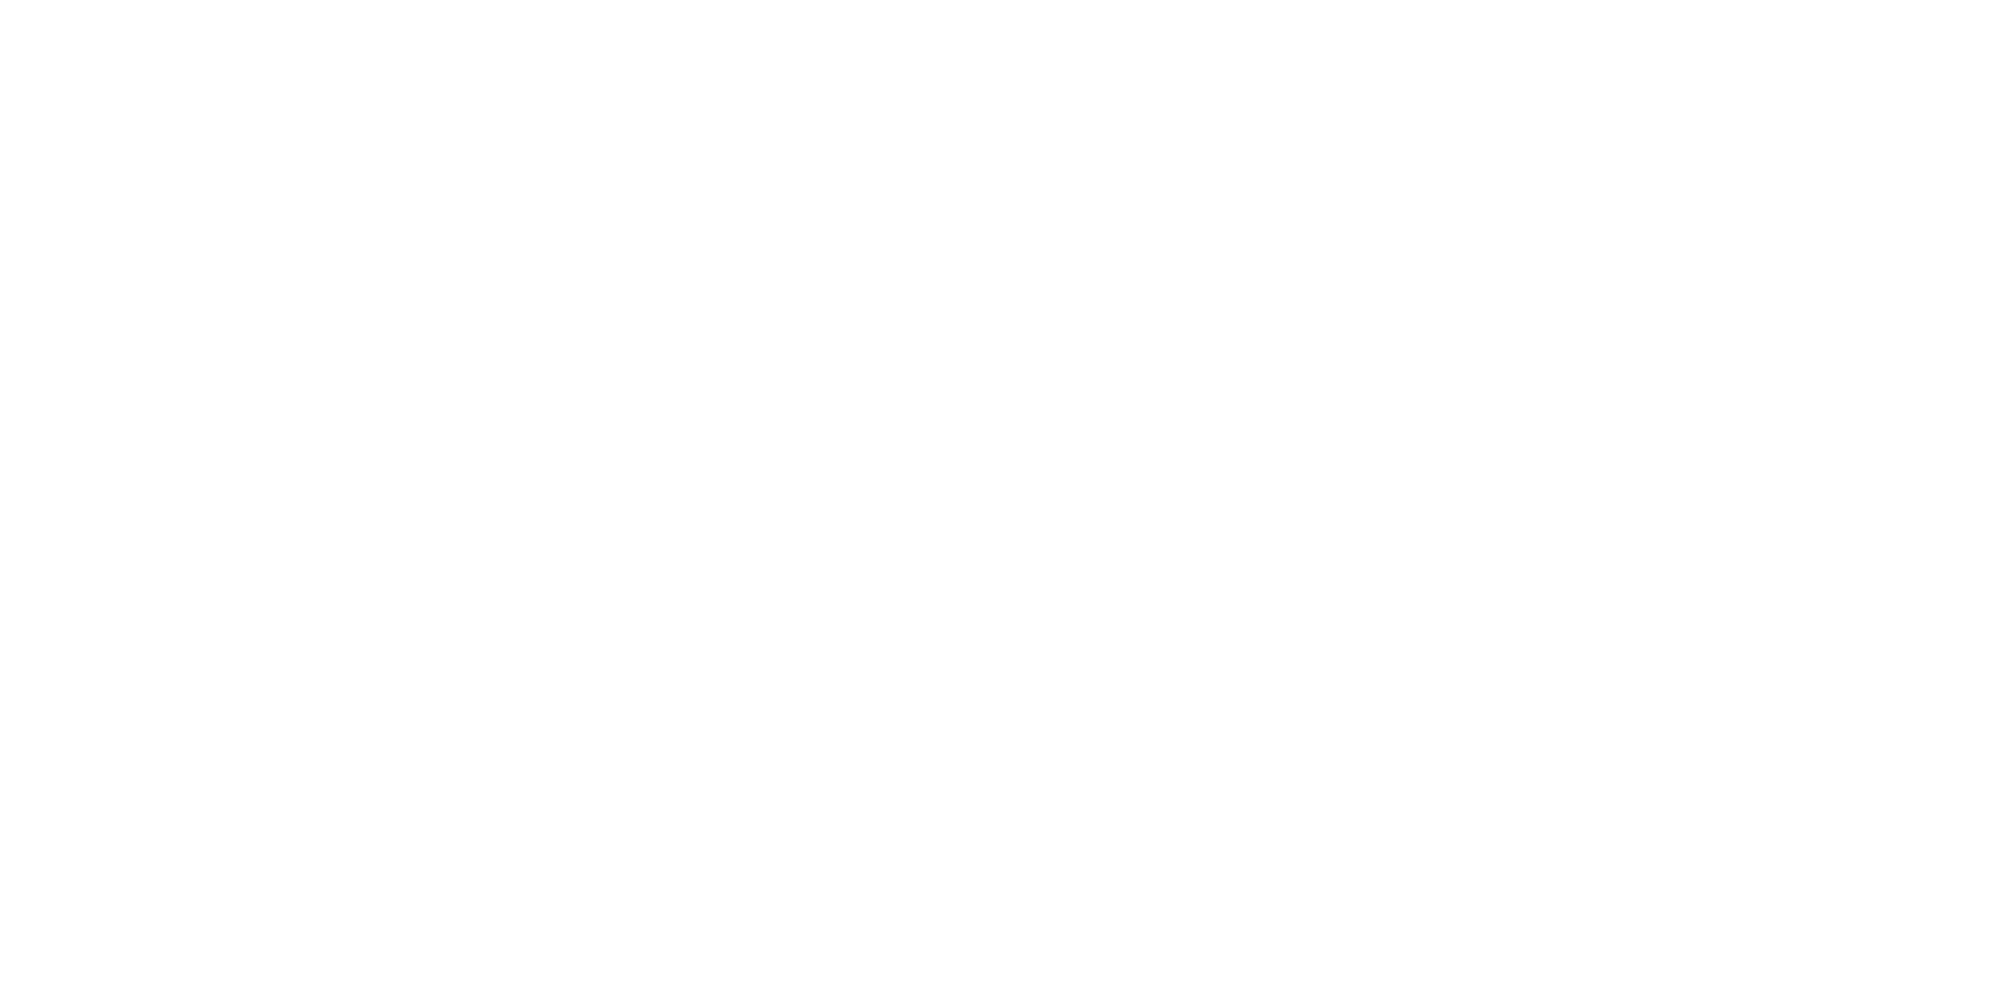

<IPython.core.display.Javascript object>


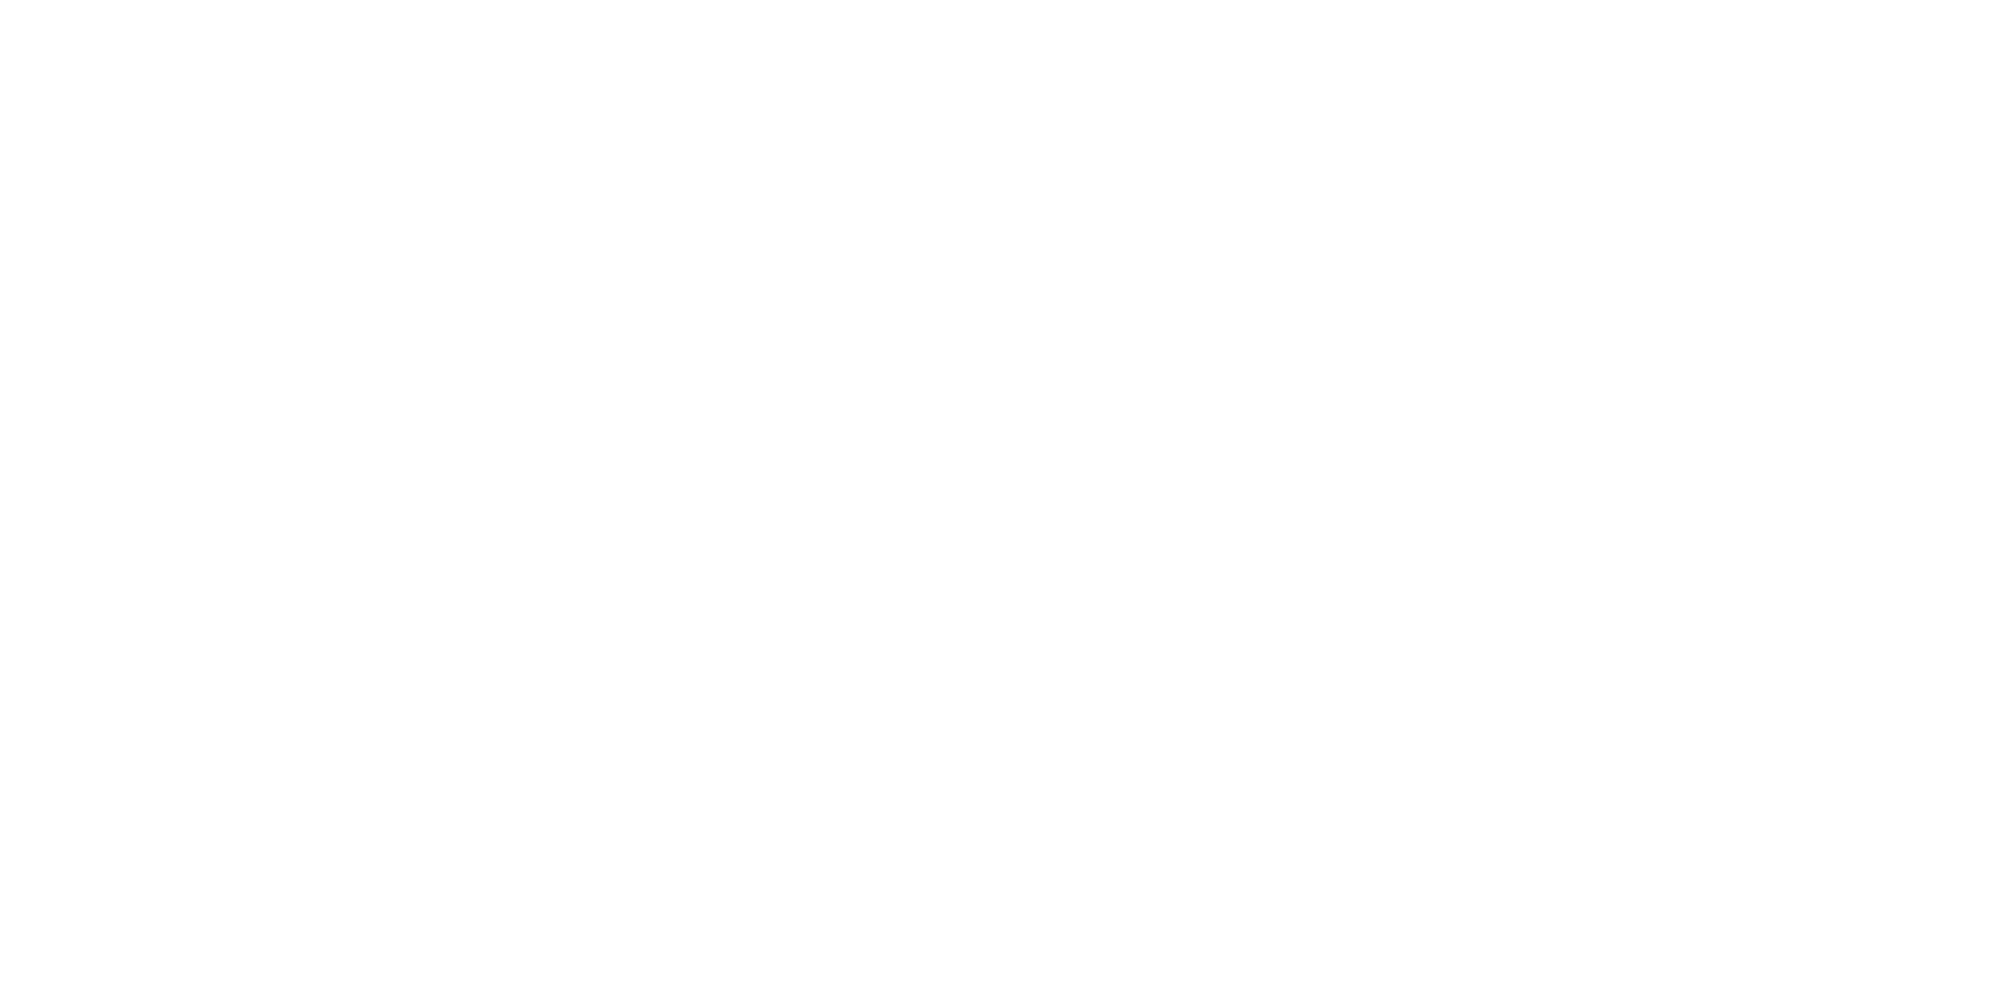

<IPython.core.display.Javascript object>


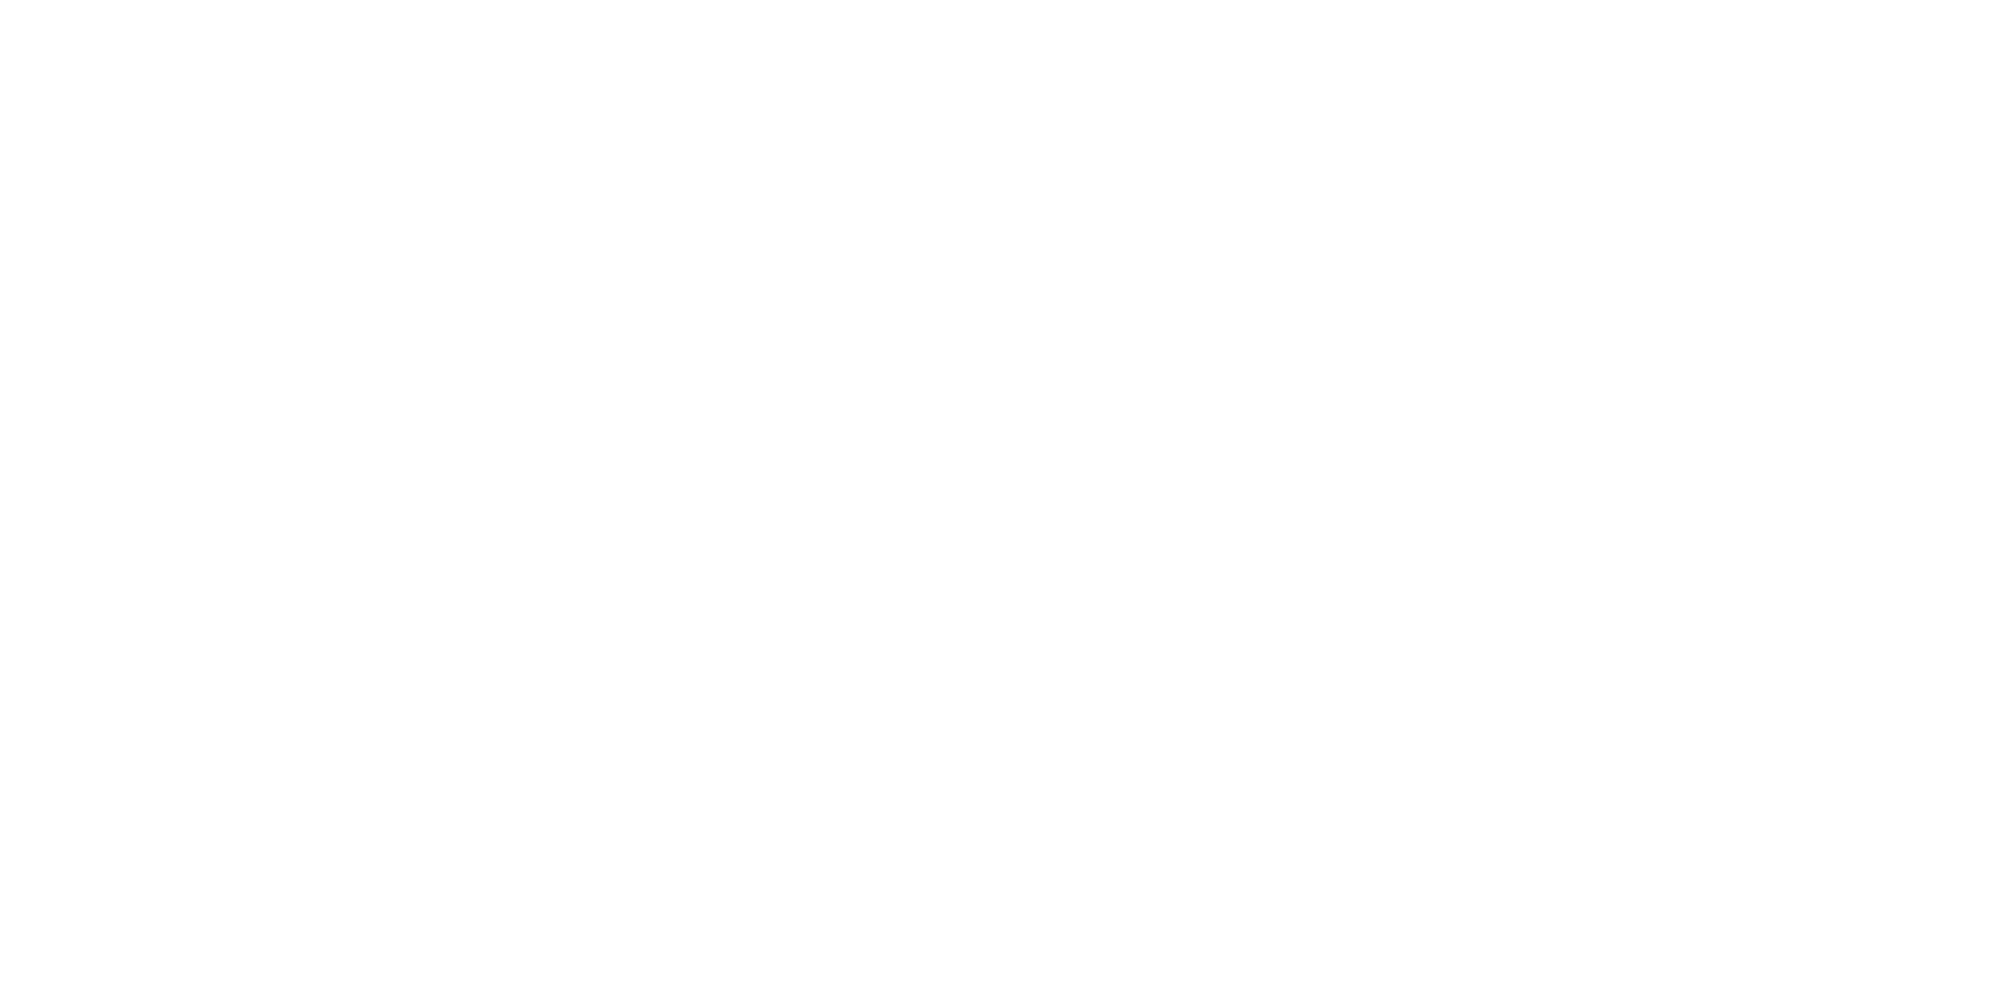

<IPython.core.display.Javascript object>


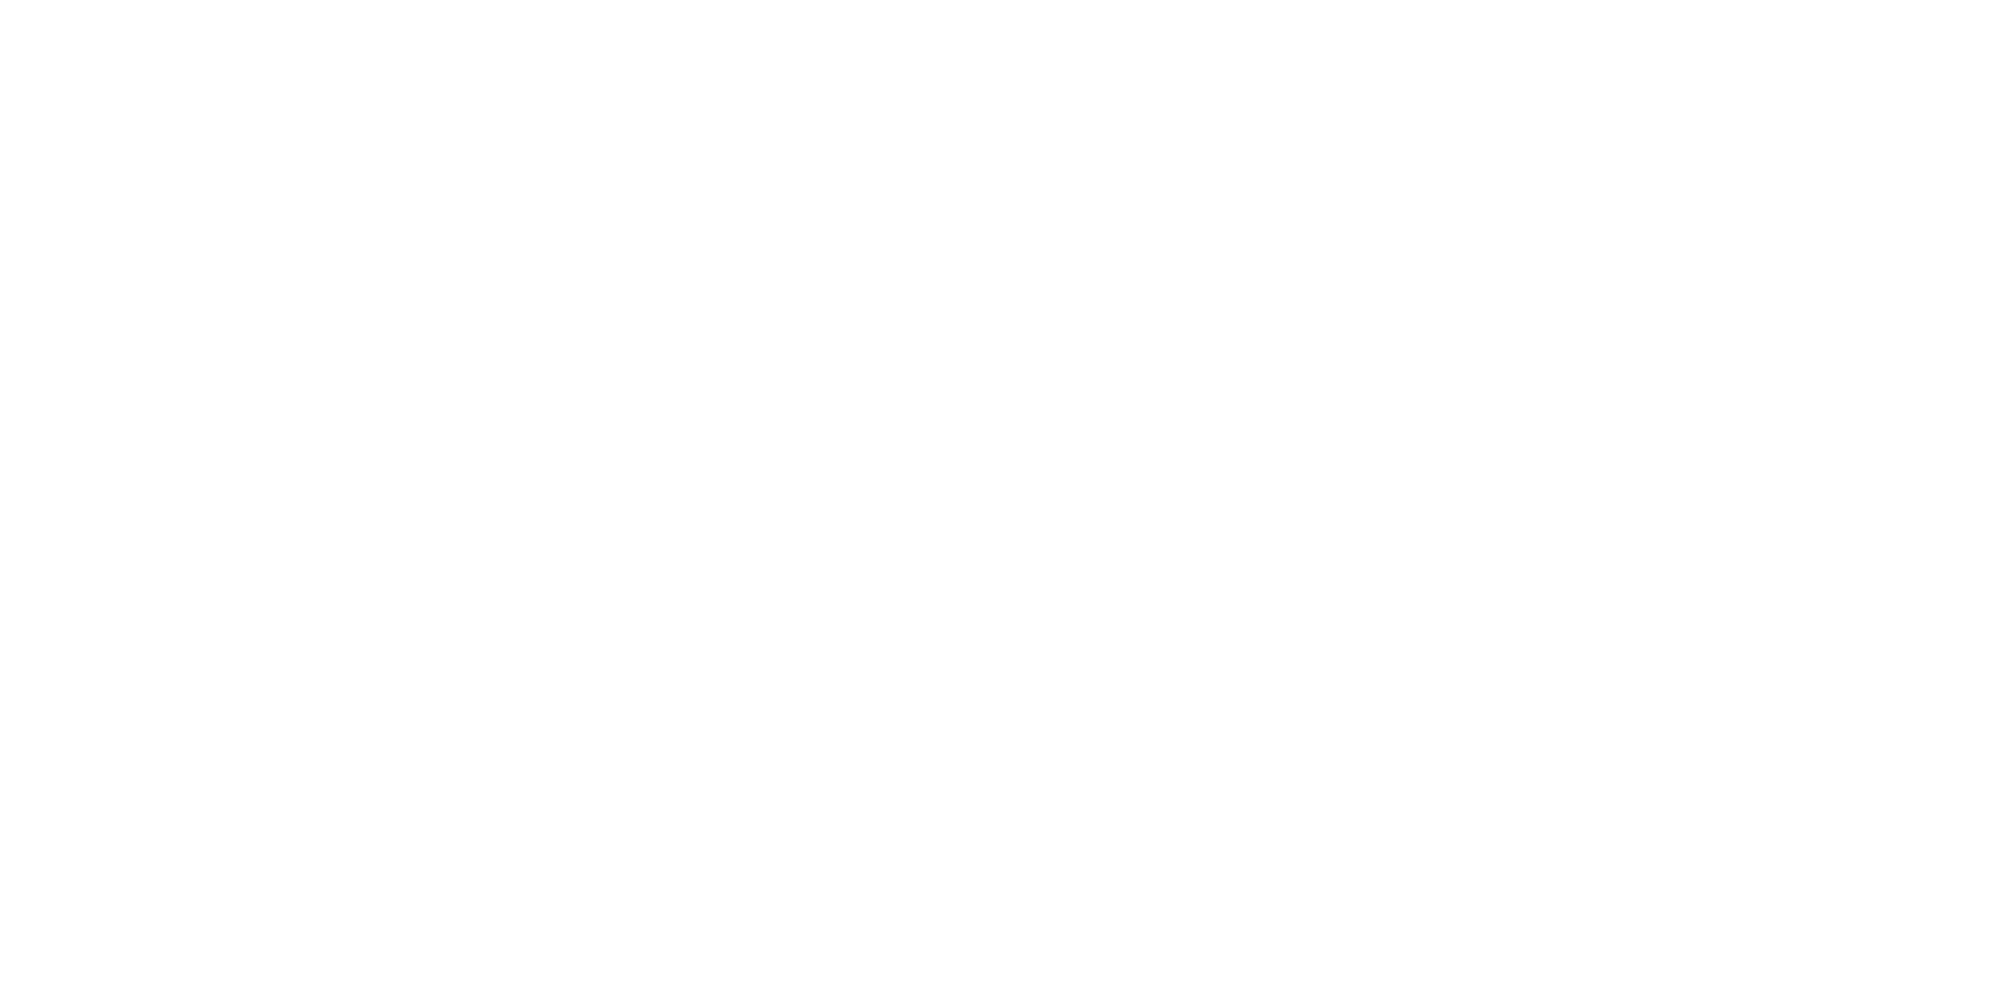

<IPython.core.display.Javascript object>


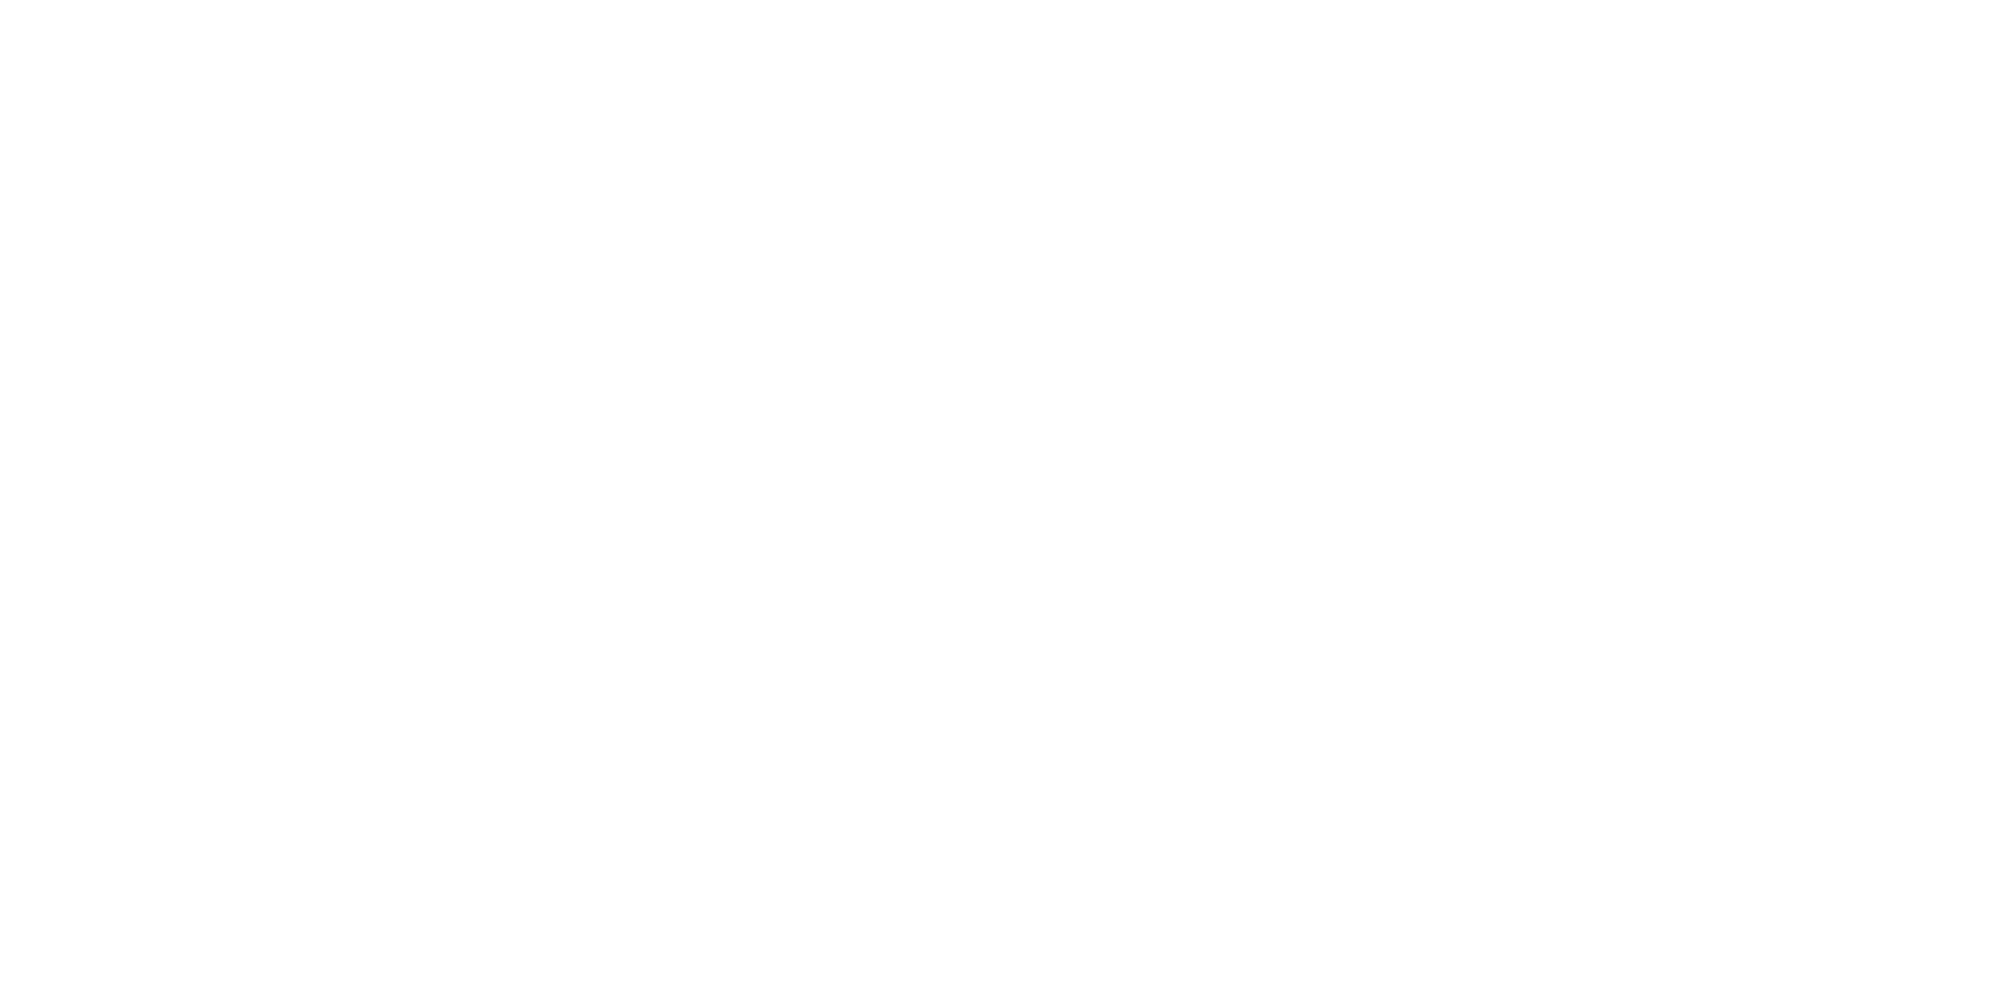

<IPython.core.display.Javascript object>


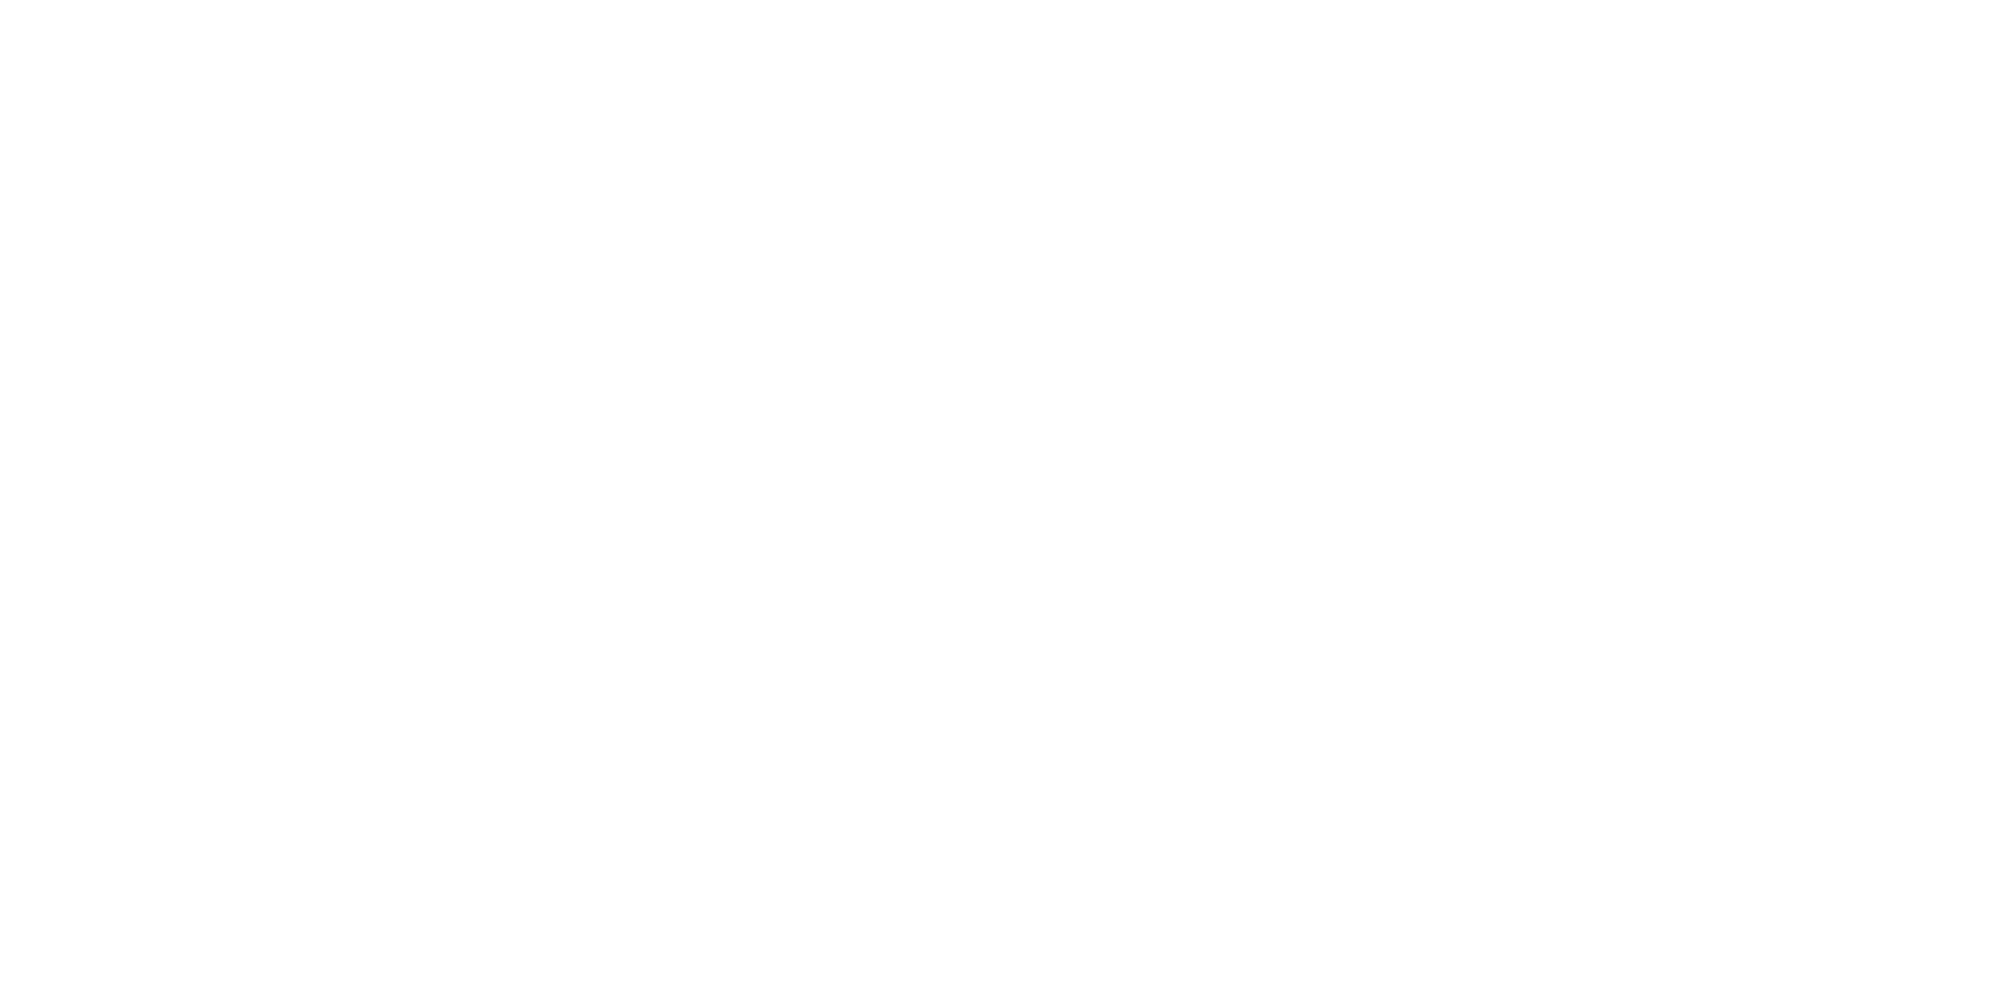

<IPython.core.display.Javascript object>


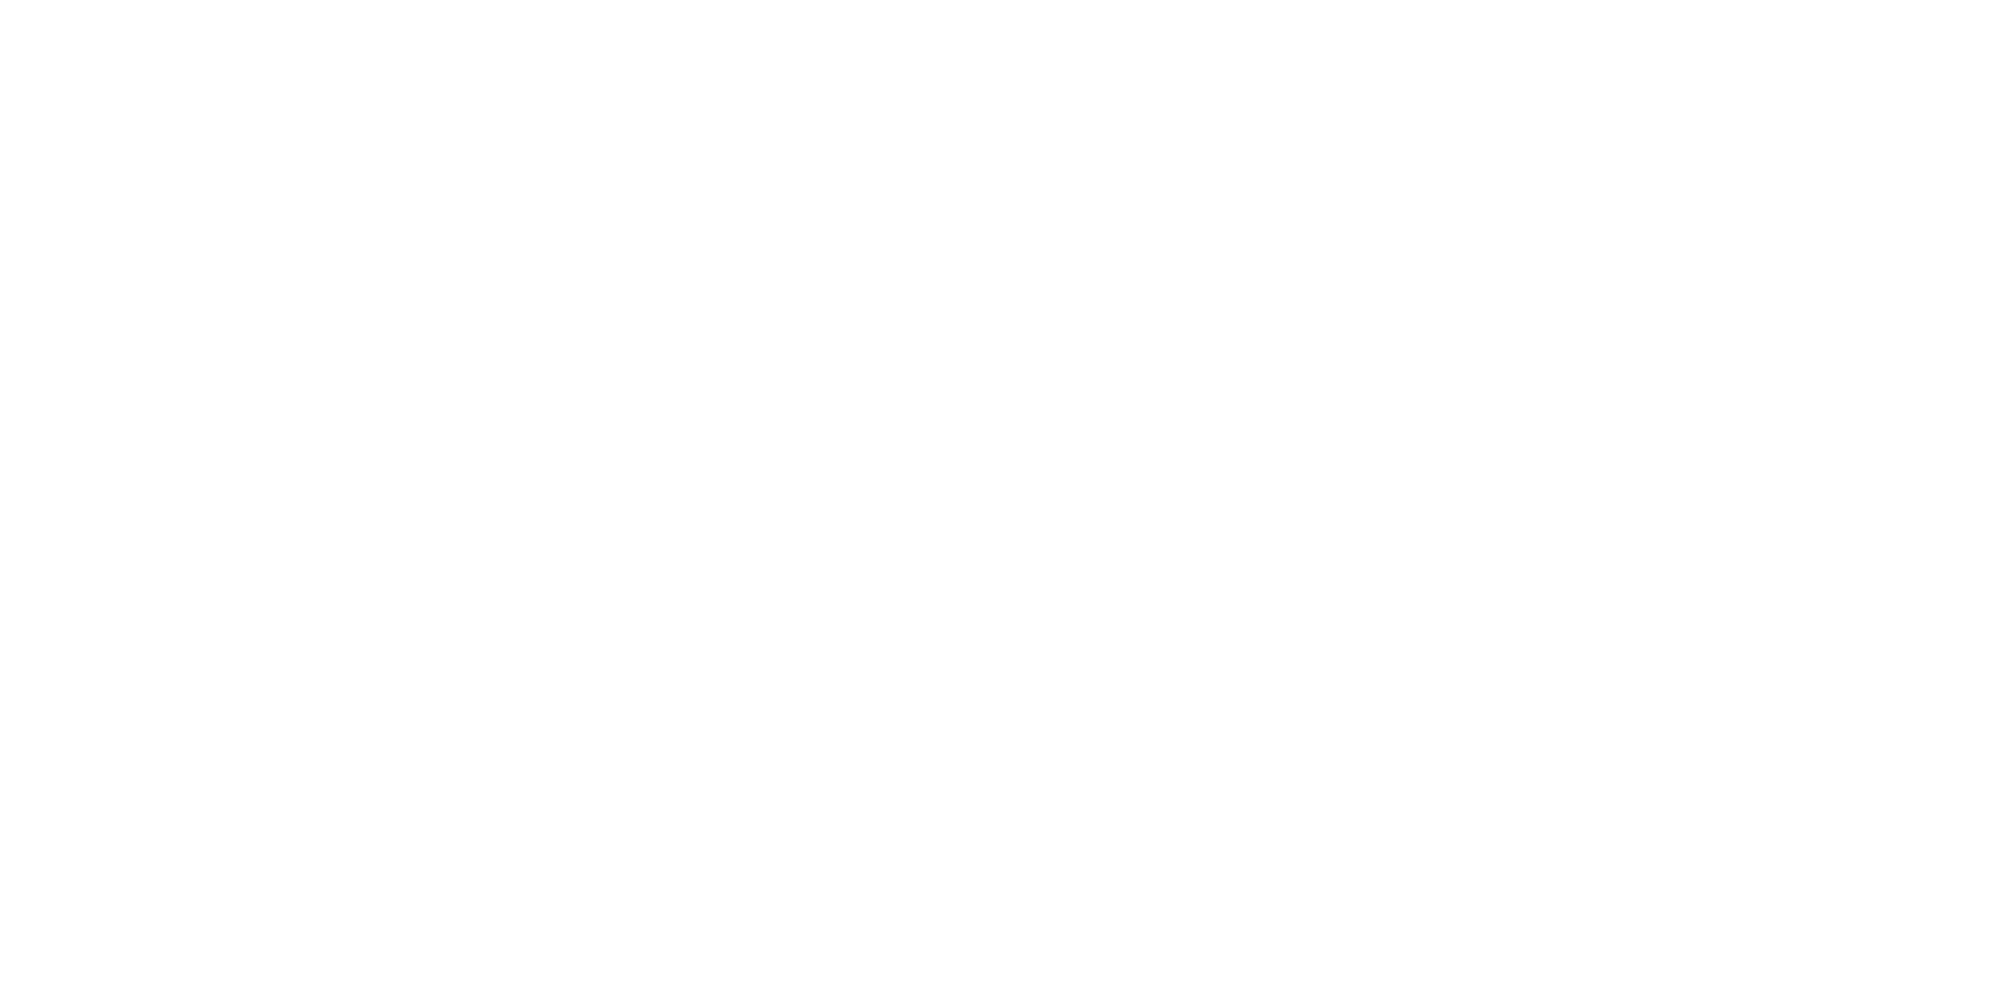

Done


In [28]:

#waxs
flag_save = True

for j, dat in enumerate(all_da):          
        alphai = np.deg2rad(0)
        waxs_angle = [np.deg2rad(0)]
        
        if len(dat)==1:# and 'q_map_waxs_%s%s.png'%(sam[j], sam1[j]) not in os.listdir(ResDir):

        
            #This part is to stitch the data
            SMI_waxs = SMI_beamline.SMI_geometry(geometry = geometry,
                                                 detector = detector_waxs,
                                                 sdd = sdd_waxs,
                                                 wav = wav,
                                                 alphai = alphai,
                                                 center = center_waxs,
                                                 bs_pos = bs_pos_waxs,
                                                 det_angles = waxs_angle,
                                                 bs_kind = bs_kind)

            SMI_waxs.open_data(path, [dat[0]])
            
            for i, da in enumerate(dat):
                if i!=0:
                    img=fabio.open(os.path.join(path, da)).data
                    SMI_waxs.imgs[0]+=img

            SMI_waxs.masks[0][560:, 475:482]=True
            SMI_waxs.masks[0][954:, 767:769]=True
        
            SMI_waxs.stitching_data(interp_factor=3)

            plt.figure()
            plt.imshow(SMI_waxs.img_st,
                       extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]], 
                       vmin=0,
                       vmax=np.percentile(SMI_waxs.img_st, 99.5))    
            plt.title('waxs_%s%s'%(sam[j], sam1[j]))
            plt.xlabel('$q_{par}(A^{-1})$')
            plt.ylabel('$q_{ver}(A^{-1})$')
            plt.colorbar()
            plt.show()

            SMI_waxs.radial_averaging(radial_range = [0, 0.21], azimuth_range=[-30, 30], npt = 2000)
            q0, I0 = SMI_waxs.q_rad, SMI_waxs.I_rad
            
            SMI_waxs.radial_averaging(radial_range = [0, 0.21], azimuth_range=[-120, -60], npt = 2000)
            q1, I1 = SMI_waxs.q_rad, SMI_waxs.I_rad
            
            SMI_waxs.radial_averaging(radial_range = [0, 0.21], azimuth_range=[-179, 179], npt = 2000)
            q2, I2 = SMI_waxs.q_rad, SMI_waxs.I_rad
            
            
            if flag_save:
                #Save the plot as a png
                plt.savefig(os.path.join(ResDir, 'q_map_waxs_%s%s.png'%(sam[j], sam1[j])))

                np.savetxt(os.path.join(ResDir, 'Radint_hor_%s%s.txt'%(sam[j], sam1[j])), np.vstack((q0, I0)).T)
                np.savetxt(os.path.join(ResDir, 'Radint_ver_%s%s.txt'%(sam[j], sam1[j])), np.vstack((q1, I1)).T)
                np.savetxt(os.path.join(ResDir, 'Radint_tot_%s%s.txt'%(sam[j], sam1[j])), np.vstack((q2, I2)).T)

            plt.close() 
            
        else:
            print('already done')
print('Done')